# House Prices: Advanced Regression Techniques

**Name**: AI 0014
**Submission Date**: 12.1.2018

**INTRODUCTION**
---
There are several factors that affect the overall price of the house. Some of the factors are more tangible as the quality of the house and other factors are more intrinsic such as the performance of the economy. This assignment is based on a dataset that provides a number of features with a possible effect on the sale price of the house. There is a train and a test dataset, the train dataset provides a number of examples with the features along with the sale price. On the otherhand, the test dataset consists of a number of examples with features without the sale price. 

The main task of this assignment is to develop a predictive neural network which predicts the sale price of the test dataset. In order to develop the model, the software used is "JUPYTER NOTEBOOK" of "ANACONDA". In other words, python programming is used.


**IMPORTING REQUIRED LIBRARIES**

---

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
from scipy.stats.stats import pearsonr



**EXTRACTING CSV FILE**

---



In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
train_id = '1aya_qZNy8iaG_FsX3pukrk7E2Jjem3T0'
train_file = drive.CreateFile({'id': train_id})
test_id = '14_7beoMaM4YZhV-l1zRZzKKmqfp12K21'
test_file = drive.CreateFile({'id': test_id})
train_file.GetContentFile('train.csv', mimetype='text/csv')
test_file.GetContentFile('test.csv', mimetype='text/csv')


In [0]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


**OVERALL VIEW OF THE DATASET**

---



**Sale Price**

In [12]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Missing data in both train and test dataset**

In [13]:
missing=pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['train', 'test'])
missing[missing.sum(axis=1) > 0]

train    test
Alley          1369  1352.0
BsmtCond         37    45.0
BsmtExposure     38    44.0
BsmtFinSF1        0     1.0
BsmtFinSF2        0     1.0
BsmtFinType1     37    42.0
BsmtFinType2     38    42.0
BsmtFullBath      0     2.0
BsmtHalfBath      0     2.0
BsmtQual         37    44.0
BsmtUnfSF         0     1.0
Electrical        1     0.0
Exterior1st       0     1.0
Exterior2nd       0     1.0
Fence          1179  1169.0
FireplaceQu     690   730.0
Functional        0     2.0
GarageArea        0     1.0
GarageCars        0     1.0
GarageCond       81    78.0
GarageFinish     81    78.0
GarageQual       81    78.0
GarageType       81    76.0
GarageYrBlt      81    78.0
KitchenQual       0     1.0
LotFrontage     259   227.0
MSZoning          0     4.0
MasVnrArea        8    15.0
MasVnrType        8    16.0
MiscFeature    1406  1408.0
PoolQC         1453  1456.0
SaleType          0     1.0
TotalBsmtSF       0     1.0
Utilities         0     2.0

**Train Set**

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [15]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

**CORRELATION MATRIX OF TRAIN SET**

---
This gives an overall idea of the relationship between the features and the sale price

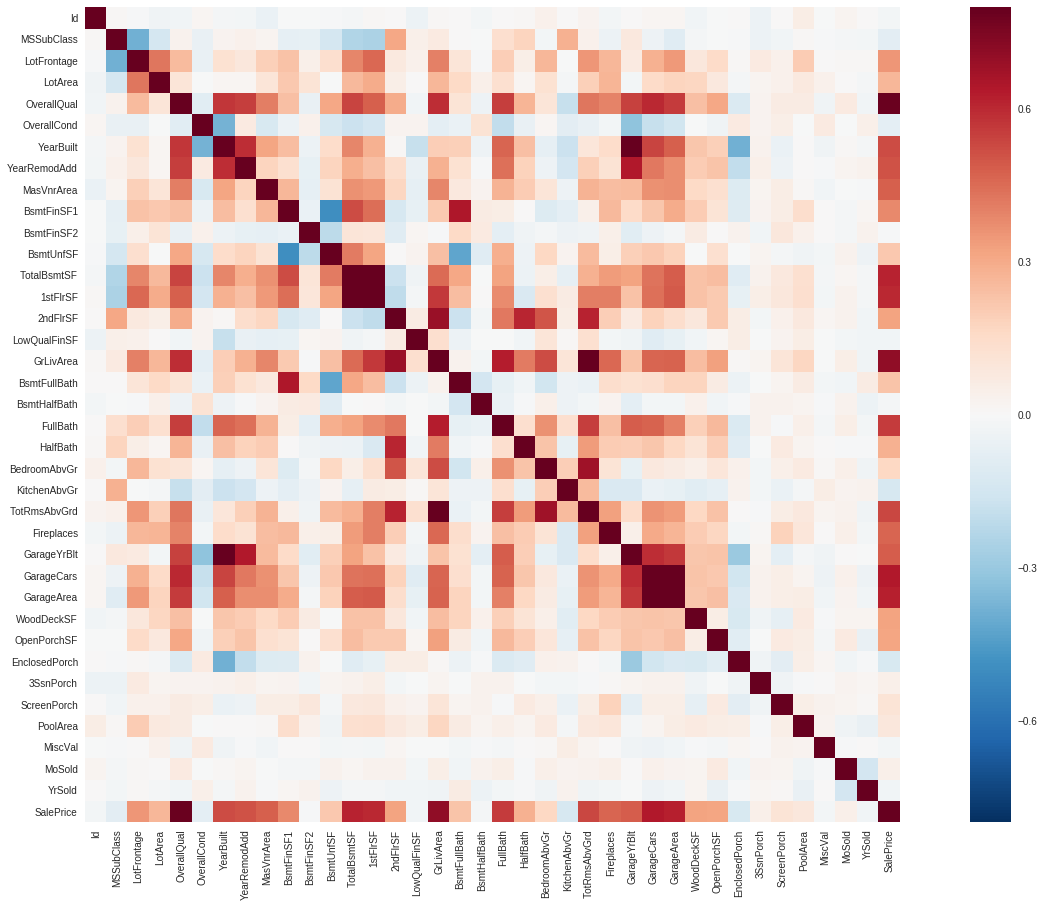

In [16]:
corrMat=train.corr()
f, ax = plt.subplots(figsize=(25,15))
fig1=sns.heatmap(corrMat,vmin=-0.8, vmax=0.8, square=True)
sns.set(font_scale=1)
plt.show(fig1)

**Relationship between the saleprice and the features**

[In descending order]


In [17]:
k=len(train.columns)
cols=corrMat.nlargest(k,"SalePrice")['SalePrice'].index
cm=np.corrcoef(train[cols].values.T)
print(cols)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')


**DATA ANALYSIS**
---
In this segment, the main focus is to have a better understanding of the featrues involved in the data.


**SPLITTING THE DATA IN DIFFERENT CATEGORIES**

---



In [0]:
#Surrounding environment
outsidesurr_df = train[['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'PavedDrive', 
                    'Street', 'Alley', 'LandContour', 'LandSlope', 'LotConfig', 'MoSold', 'YrSold', 'SaleType', 'LotShape', 
                     'SaleCondition', 'SalePrice']]

#Building
building_df = train[['Id', 'MSSubClass', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Functional', 
                    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SaleType',
                    'SaleCondition', 'SalePrice']]

#Utilities
utilities_df = train[['Id', 'Utilities', 'Heating', 'CentralAir', 'Electrical', 'Fireplaces', 'PoolArea', 'MiscVal', 'MoSold',
                     'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

#Ratings
ratings_df = train[['Id', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                   'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
                   'GarageCond', 'GarageQual', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

#Rooms
rooms_df = train[['Id', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','TotRmsAbvGrd', 
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SaleType',
                 'SaleCondition', 'SalePrice']]

# Set Id as index of the dataframe.
outsidesurr_df = outsidesurr_df.set_index('Id')
building_df = building_df.set_index('Id')
utilities_df = utilities_df.set_index('Id')
ratings_df = ratings_df.set_index('Id')
rooms_df = rooms_df.set_index('Id')

# Move SalePrice to the first column (Our Label)
sp0 = outsidesurr_df['SalePrice']
outsidesurr_df.drop(labels=['SalePrice'], axis=1, inplace=True)
outsidesurr_df.insert(0, 'SalePrice', sp0)

sp1 = building_df['SalePrice']
building_df.drop(labels=['SalePrice'], axis=1, inplace=True)
building_df.insert(0, 'SalePrice', sp1)

sp2 = utilities_df['SalePrice']
utilities_df.drop(labels=['SalePrice'], axis=1, inplace=True)
utilities_df.insert(0, 'SalePrice', sp2)

sp3 = ratings_df['SalePrice']
ratings_df.drop(labels=['SalePrice'], axis=1, inplace=True)
ratings_df.insert(0, 'SalePrice', sp3)

sp4 = rooms_df['SalePrice']
rooms_df.drop(labels=['SalePrice'], axis=1, inplace=True)
rooms_df.insert(0, 'SalePrice', sp4)


**BASIC INSIGHT OF THE DATA**

---



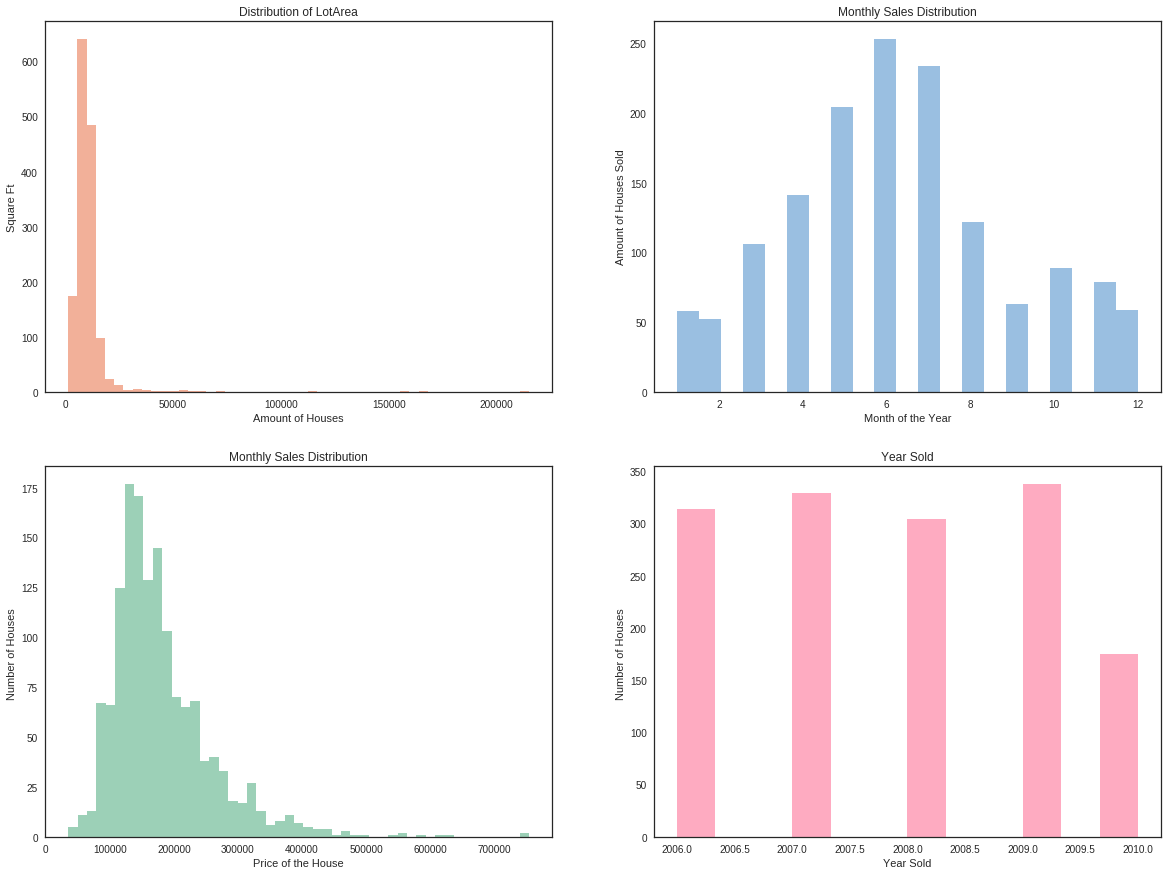

In [19]:
sns.set_style('white')

f, axes = plt.subplots(ncols=2,nrows=2, figsize=(20,15))

# Lot Area: In Square Feet
sns.distplot(train['LotArea'], kde=False, color="#DF3A01", ax=axes[0,0]).set_title("Distribution of LotArea")
axes[0,0].set_ylabel("Square Ft")
axes[0,0].set_xlabel("Amount of Houses")

# MoSold: Year of the Month sold
sns.distplot(train['MoSold'], kde=False, color="#045FB4", ax=axes[0,1]).set_title("Monthly Sales Distribution")
axes[0,1].set_ylabel("Amount of Houses Sold")
axes[0,1].set_xlabel("Month of the Year")

# House Value
sns.distplot(train['SalePrice'], kde=False, color="#088A4B", ax=axes[1,0]).set_title("Monthly Sales Distribution")
axes[1,0].set_ylabel("Number of Houses ")
axes[1,0].set_xlabel("Price of the House")

# YrSold: Year the house was sold.
sns.distplot(train['YrSold'], kde=False, color="#FE2E64", ax=axes[1,1]).set_title("Year Sold")
axes[1,1].set_ylabel("Number of Houses ")
axes[1,1].set_xlabel("Year Sold")

plt.show()

**RIGHT SKEWED DISTRIBUTION OF SALEPRICE**

---

A right skew or positive skew means the mean of the data at most of the times is on the right of the median. This can be converted in a normal distribution by using LOG TRANSFORMATION.

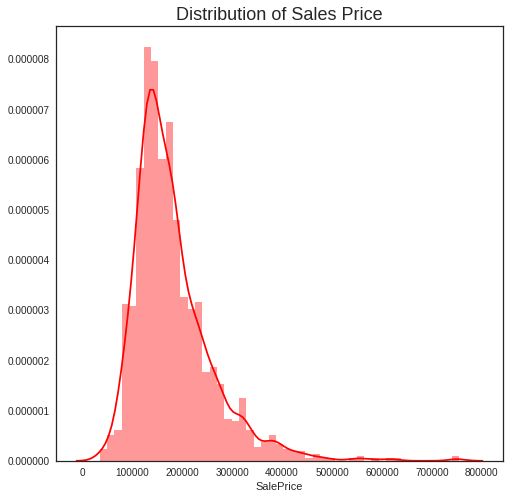

In [20]:
plt.figure(figsize=(8,8))
sns.distplot(train['SalePrice'], color='r')
plt.title('Distribution of Sales Price', fontsize=18)

plt.show()

**LEVEL OF SUPPLY AND DEMAND**

---
Visualizing how the housing market performed during those years 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


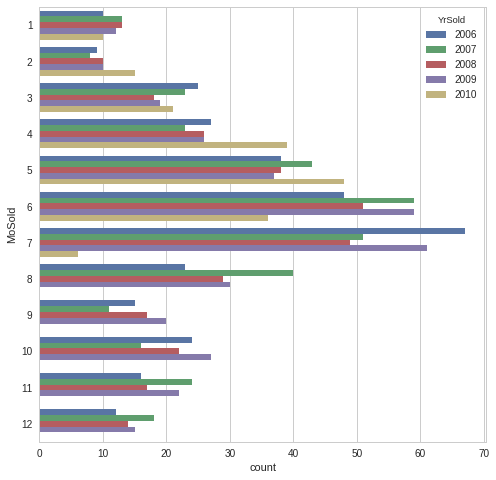

In [21]:
# Houses sold per month each year
sns.set(style="whitegrid")
plt.figure(figsize=(8,8))
sns.countplot(y="MoSold", hue="YrSold", data=train)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'Houses Sold per Year')

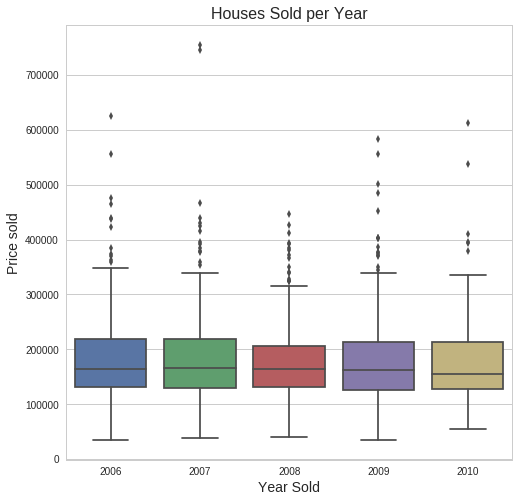

In [22]:
#Houses sold per year
plt.figure(figsize=(8,8))
sns.boxplot(x='YrSold', y='SalePrice', data=train)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Price sold', fontsize=14)
plt.title('Houses Sold per Year', fontsize=16)

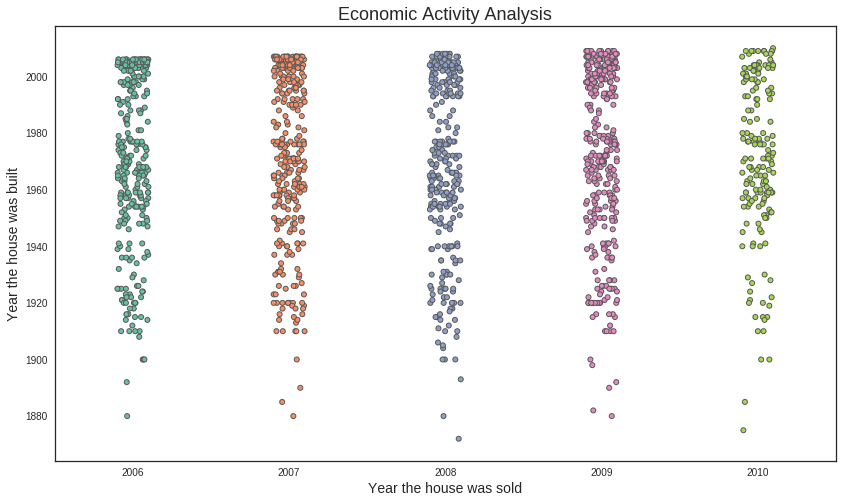

In [23]:
#Year built versus year sold
plt.figure(figsize=(14,8))
plt.style.use('seaborn-white')
sns.stripplot(x='YrSold', y='YearBuilt', data=train, jitter=True, palette="Set2", linewidth=1)
plt.title('Economic Activity Analysis', fontsize=18)
plt.xlabel('Year the house was sold', fontsize=14)
plt.ylabel('Year the house was built', rotation=90, fontsize=14)
plt.show()

**SURROUNDING FEATURES**

---

An in-depth analysis of how the outside surrounding affect the price

In [24]:
outsidesurr_df.describe()

SalePrice  LotFrontage        LotArea       MoSold       YrSold
count    1460.000000  1201.000000    1460.000000  1460.000000  1460.000000
mean   180921.195890    70.049958   10516.828082     6.321918  2007.815753
std     79442.502883    24.284752    9981.264932     2.703626     1.328095
min     34900.000000    21.000000    1300.000000     1.000000  2006.000000
25%    129975.000000    59.000000    7553.500000     5.000000  2007.000000
50%    163000.000000    69.000000    9478.500000     6.000000  2008.000000
75%    214000.000000    80.000000   11601.500000     8.000000  2009.000000
max    755000.000000   313.000000  215245.000000    12.000000  2010.000000

In [25]:
outsidesurr_df.columns

Index(['SalePrice', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood',
       'Condition1', 'Condition2', 'PavedDrive', 'Street', 'Alley',
       'LandContour', 'LandSlope', 'LotConfig', 'MoSold', 'YrSold', 'SaleType',
       'LotShape', 'SaleCondition'],
      dtype='object')

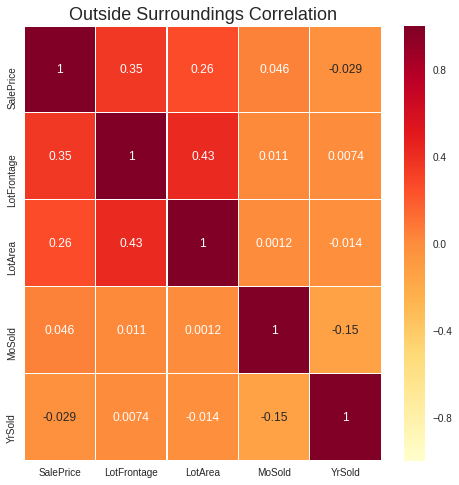

In [26]:
#Correlation matrix of the outside surroundings with the sale price
plt.style.use('seaborn-white')
corr = outsidesurr_df.corr()

sns.heatmap(corr,annot=True,cmap='YlOrRd',linewidths=0.2,annot_kws={'size':12})
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title("Outside Surroundings Correlation", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**TYPE OF ZONING**

---

Effect of the different zones on the sales and the revenue earned

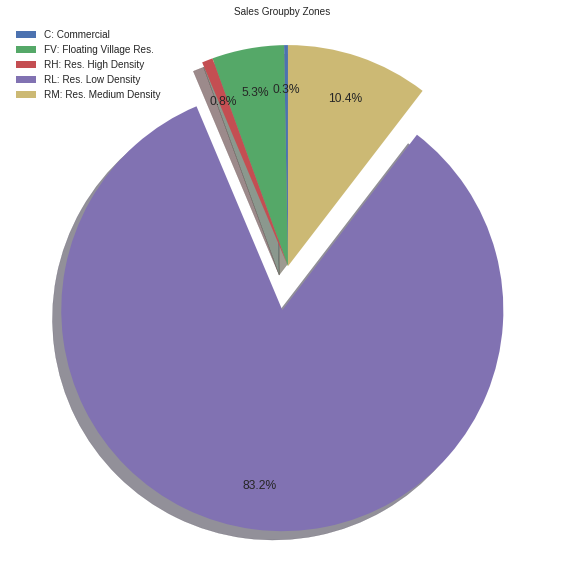

In [27]:
#Zone wise sales
plt.style.use('seaborn-white')
zoning_value = train.groupby(by=['MSZoning'], as_index=False)['SalePrice'].sum()
zoning = zoning_value['MSZoning'].values.tolist()

labels = ['C: Commercial', 'FV: Floating Village Res.', 'RH: Res. High Density', 'RL: Res. Low Density', 
          'RM: Res. Medium Density']
total_sales = zoning_value['SalePrice'].values.tolist()
explode = (0, 0, 0, 0.1, 0)

fig, ax1 = plt.subplots(figsize=(8,8))
texts = ax1.pie(total_sales, explode=explode, autopct='%.1f%%', shadow=True, startangle=90, pctdistance=0.8,
       radius=0.5)

ax1.axis('equal')
plt.title('Sales Groupby Zones', fontsize=10)
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

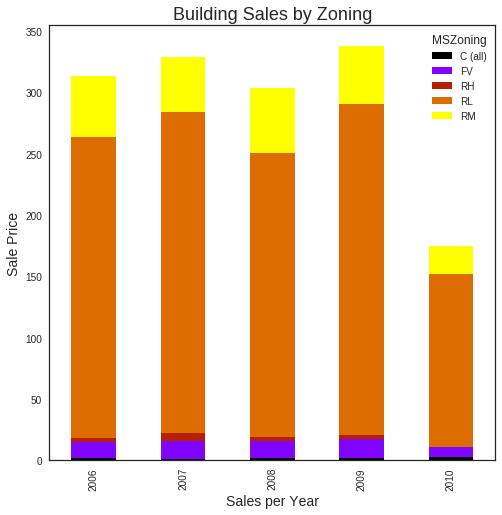

In [28]:
#Zone wise sale price each year
plt.style.use('seaborn-white')
SalesbyZone = train.groupby(['YrSold','MSZoning']).SalePrice.count()
SalesbyZone.unstack().plot(kind='bar',stacked=True, colormap= 'gnuplot',  
                           grid=False,  figsize=(8,8))
plt.title('Building Sales by Zoning', fontsize=18)
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Sales per Year', fontsize=14)
plt.show()

**NEIGHBORHOODS**

---

Sales in each neighborhood and which neighborhood is expensive

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


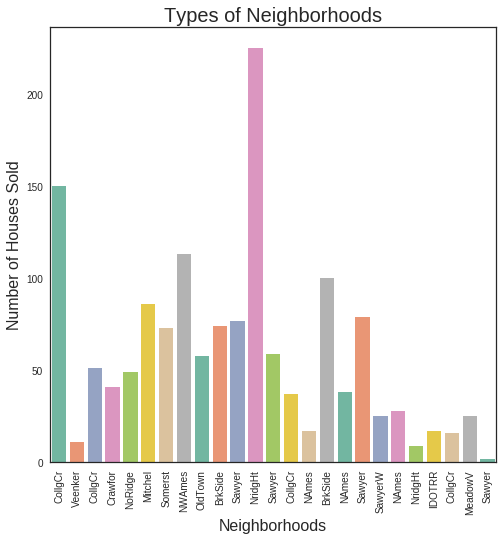

In [29]:
#Number of houses sold in each neighborhood
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Neighborhood", data=train, palette="Set2")
ax.set_title("Types of Neighborhoods", fontsize=20)
ax.set_xlabel("Neighborhoods", fontsize=16)
ax.set_ylabel("Number of Houses Sold", fontsize=16)
ax.set_xticklabels(labels=train['Neighborhood'] ,rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


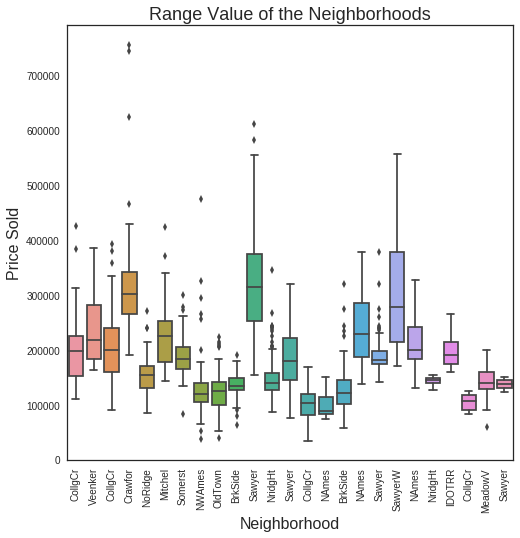

In [30]:
#Expense of each neighborhood
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=train)
ax.set_title("Range Value of the Neighborhoods", fontsize=18)
ax.set_ylabel('Price Sold', fontsize=16)
ax.set_xlabel('Neighborhood', fontsize=16)
ax.set_xticklabels(labels=train['Neighborhood'] , rotation=90)
plt.show()

**INFLUENCE OF SPACE**

---
How does the space affect the sale price

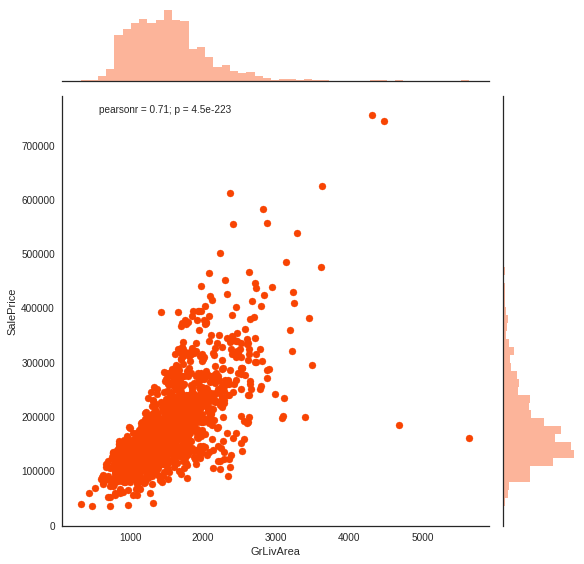

In [31]:
#Effect of living area
sns.jointplot(x='GrLivArea',y='SalePrice',data=train,
              cmap= 'CMRmap', size=8, color='#F84403')

plt.show()

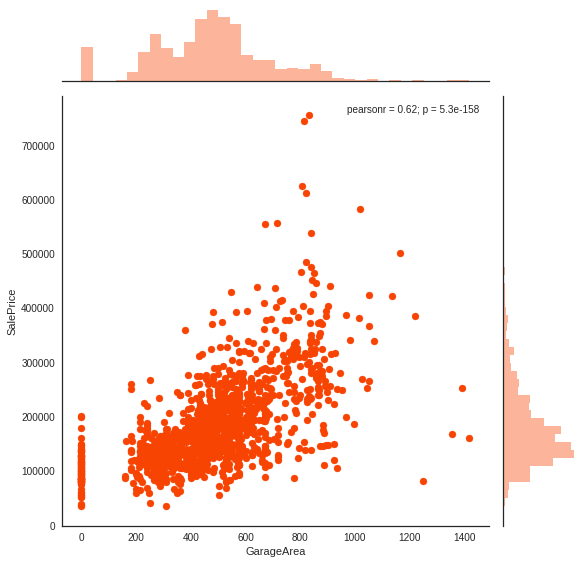

In [32]:
#Effect of Garage area
sns.jointplot(x='GarageArea',y='SalePrice',data=train,
              cmap= 'CMRmap', size=8, color='#F84403')

plt.show()

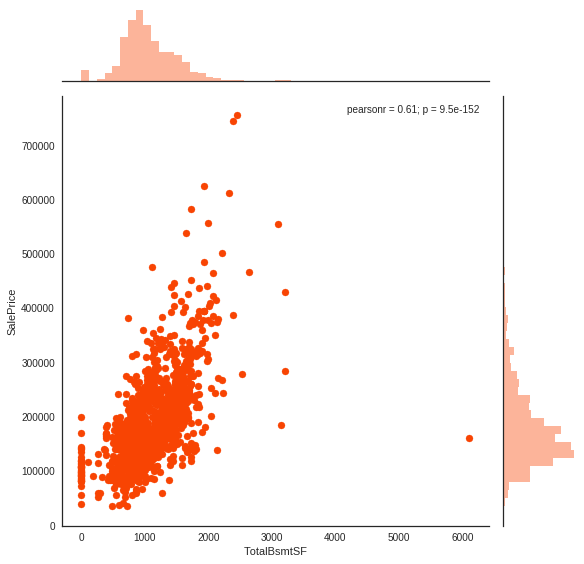

In [33]:
#Effect of basement area
sns.jointplot(x='TotalBsmtSF',y='SalePrice',data=train,
              cmap= 'CMRmap', size=8, color='#F84403')

plt.show()

Text(0.5,1,'Lot Area vs Sale Price')

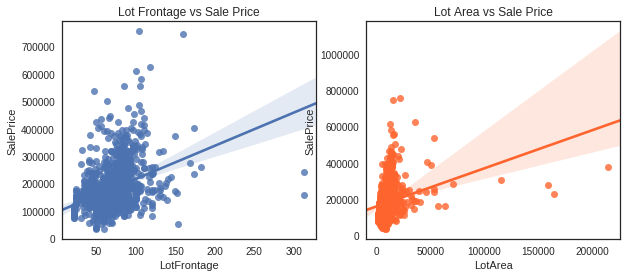

In [34]:
#Effect of Lot area and Lot frontage
plt.figure(figsize=(10,4))
plt.subplot(121)
ax = sns.regplot(x="LotFrontage", y="SalePrice", data=train)
ax.set_title("Lot Frontage vs Sale Price", fontsize=12)

plt.subplot(122)
ax1 = sns.regplot(x="LotArea", y="SalePrice", data=train, color='#FE642E')
ax1.set_title("Lot Area vs Sale Price", fontsize=12)


**BUILDING CHARACTERISTICS**

---



In [35]:
building_df.head()

SalePrice  MSSubClass BldgType HouseStyle  YearBuilt  YearRemodAdd  \
Id                                                                       
1      208500          60     1Fam     2Story       2003          2003   
2      181500          20     1Fam     1Story       1976          1976   
3      223500          60     1Fam     2Story       2001          2002   
4      140000          70     1Fam     2Story       1915          1970   
5      250000          60     1Fam     2Story       2000          2000   

   RoofStyle RoofMatl Exterior1st Exterior2nd      ...       Functional  \
Id                                                 ...                    
1      Gable  CompShg     VinylSd     VinylSd      ...              Typ   
2      Gable  CompShg     MetalSd     MetalSd      ...              Typ   
3      Gable  CompShg     VinylSd     VinylSd      ...              Typ   
4      Gable  CompShg     Wd Sdng     Wd Shng      ...              Typ   
5      Gable  CompShg     VinylSd     VinylSd      ...              Typ   

    GarageType GarageYrBlt GarageFinish GarageCars  GarageArea MoSold  YrSold  \
Id                                                                              
1       Attchd      2003.0          RFn          2         548      2    2008   
2       Attchd      1976.0          RFn          2         460      5    2007   
3       Attchd      2001.0          RFn          2         608      9    2008   
4       Detchd      1998.0          Unf          3         642      2    2006   
5       Attchd      2000.0          RFn          3         836     12    2008   

    SaleType  SaleCondition  
Id                           
1         WD         Normal  
2         WD         Normal  
3         WD         Normal  
4         WD        Abnorml  
5         WD         Normal  

[5 rows x 23 columns]

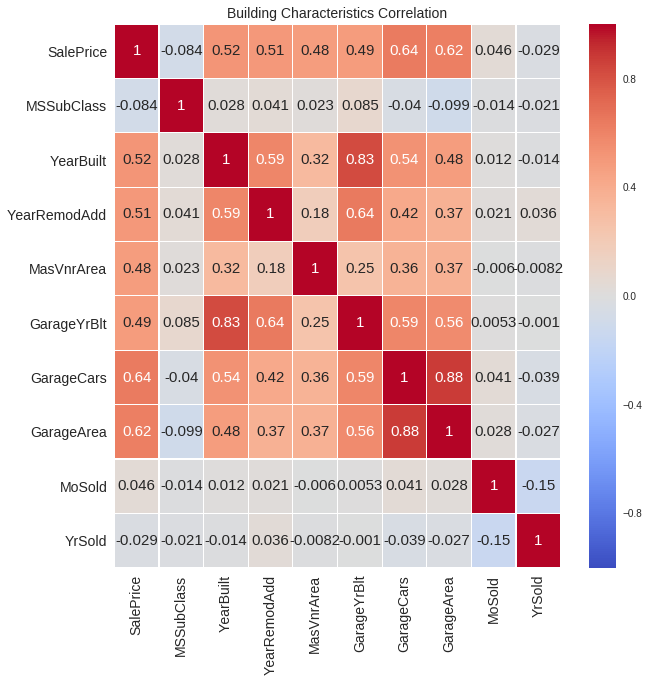

In [36]:
# Correlation map of building characteristics
corr = building_df.corr()
g = sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.2,annot_kws={'size':15})
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("Building Characteristics Correlation", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [37]:
# Dividing the data into different price ranges
train['Price_Range'] = np.nan
lst = [train]
for column in lst:
    column.loc[column['SalePrice'] < 150000, 'Price_Range'] = 'Low'
    column.loc[(column['SalePrice'] >= 150000) & (column['SalePrice'] <= 300000), 'Price_Range'] = 'Medium'
    column.loc[column['SalePrice'] > 300000, 'Price_Range'] = 'High'
    
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities     ...      PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub     ...         NaN   NaN         NaN       0      2   
1         Lvl    AllPub     ...         NaN   NaN         NaN       0      5   
2         Lvl    AllPub     ...         NaN   NaN         NaN       0      9   
3         Lvl    AllPub     ...         NaN   NaN         NaN       0      2   
4         Lvl    AllPub     ...         NaN   NaN         NaN       0     12   

  YrSold SaleType  SaleCondition  SalePrice  Price_Range  
0   2008       WD         Normal     208500       Medium  
1   2007       WD         Normal     181500       Medium  
2   2008       WD         Normal     223500       Medium  
3   2006       WD        Abnorml     140000          Low  
4   2008       WD         Normal     250000       Medium  

[5 rows x 82 columns]

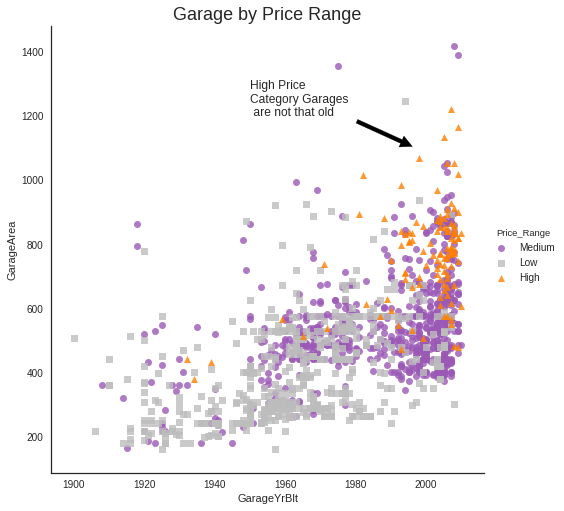

In [38]:
palette = ["#9b59b6", "#BDBDBD", "#FF8000"]
sns.lmplot('GarageYrBlt', 'GarageArea', data=train, hue='Price_Range', fit_reg=False, size=7, palette=palette,
          markers=["o", "s", "^"])
plt.title('Garage by Price Range', fontsize=18)
plt.annotate('High Price \nCategory Garages \n are not that old', xy=(1997, 1100), xytext=(1950, 1200), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

**MISCELLANEOUS AND UTILITIES**

---



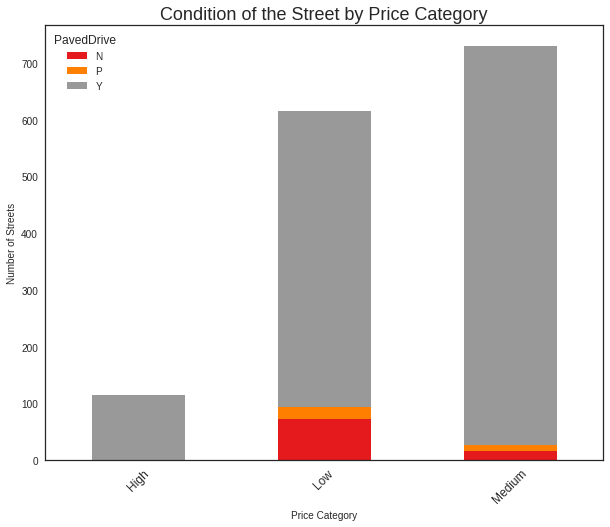

In [39]:
plt.style.use('seaborn-white')
types_foundations = train.groupby(['Price_Range', 'PavedDrive']).size()
types_foundations.unstack().plot(kind='bar', stacked=True, colormap='Set1', figsize=(10,8), grid=False)
plt.ylabel('Number of Streets', fontsize=10)
plt.xlabel('Price Category', fontsize=10)
plt.xticks(rotation=45, fontsize=12)
plt.title('Condition of the Street by Price Category', fontsize=18)
plt.show()

**FEATURE ENGINEERING**
---

In this section, the missing data and the categorical features are remodelled for the requirement of the neural network

**COMBINING TEST AND TRAIN DATA**

---



In [0]:
target=train["SalePrice"]
test1=test
data=train
data=data.drop(["Id","SalePrice"],axis=1)
test1=test1.drop(["Id"],axis=1)
data=pd.concat([data,test1])

**DEALING WITH MISSING DATA **

---

In [41]:
#Checking the missing data 
totalMissing=data.isnull().sum().sort_values(ascending=False)
percentMissing=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missingData=pd.concat([totalMissing,percentMissing],axis=1,keys=["total","percentage"])

missingData.head(10)


total  percentage
PoolQC         2909    0.996574
MiscFeature    2814    0.964029
Alley          2721    0.932169
Fence          2348    0.804385
Price_Range    1459    0.499829
FireplaceQu    1420    0.486468
LotFrontage     486    0.166495
GarageQual      159    0.054471
GarageYrBlt     159    0.054471
GarageFinish    159    0.054471

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


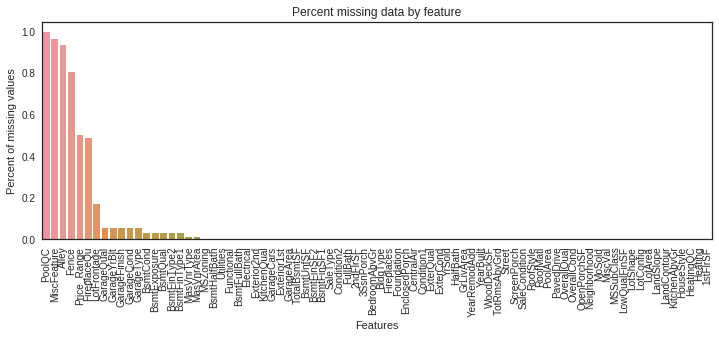

In [42]:
#Visualizing the missing data
f, ax = plt.subplots(figsize=(12,4))
plt.xticks(rotation='90')
sns.barplot(x=missingData.index, y=missingData["percentage"])
plt.xlabel('Features')
plt.ylabel('Percent of missing values')
plt.title('Percent missing data by feature')
plt.show()

In [0]:
#For the following columns, the missing data indicates that the feature isn't available
#Hence categorical features are replaced by "None" and the numerical data are replaced by 0
for col in ("PoolQC","MiscFeature","Alley","Fence","FireplaceQu","MasVnrType","MasVnrArea"):
    data[col] = data[col].fillna('None')
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] =data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)


#For the following features, the missing data is replaced by the most occuring feature element  
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data["Functional"] =data["Functional"].fillna("Typ")
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st'] =data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MSSubClass'] = data['MSSubClass'].fillna("None")
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


#All records of utilities are "AllPub", except for one "NoSeWa" and 2 NA 
#Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling.
#Price range was included for statistical visualization, it can be ignored for futher processes 
data = data.drop(['Utilities'], axis=1)
data = data.drop(['Price_Range'], axis=1)

In [44]:
#Rechecking for any missing data
totalMissing=data.isnull().sum().sort_values(ascending=False)
percentMissing=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missingData=pd.concat([totalMissing,percentMissing],axis=1,keys=["total","percentage"])
missingData.head(5)

total  percentage
YrSold           0         0.0
Foundation       0         0.0
ExterCond        0         0.0
ExterQual        0         0.0
Exterior1st      0         0.0

**SKEWED DISTRIBUTION MADE INTO NORMAL DISTRIBUTION**

---

[For GrLivArea and 1stFlrSF]

In [0]:
def plots(pd):
    sns.distplot(pd,fit=norm)
    plt.figure()
    prob=stats.probplot(pd,plot=plt)
    plt.show()  
    

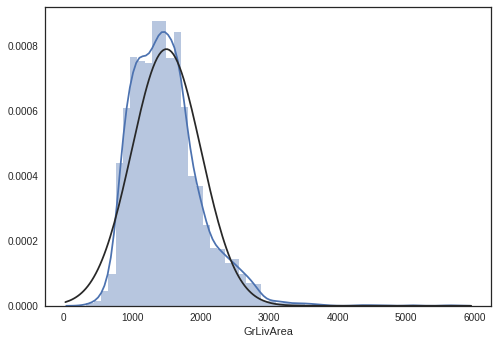

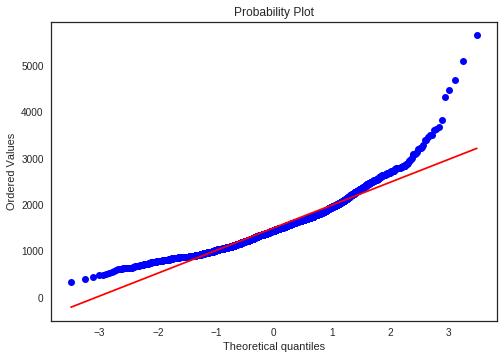

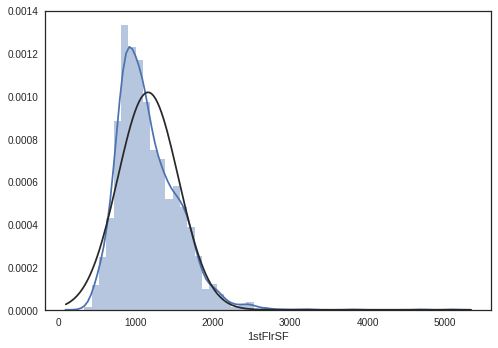

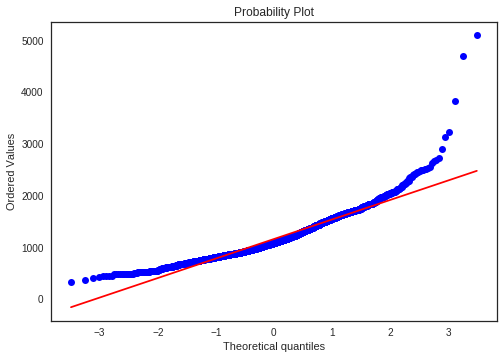

In [46]:
#Actual condition
plots(data["GrLivArea"])
plots(data["1stFlrSF"])

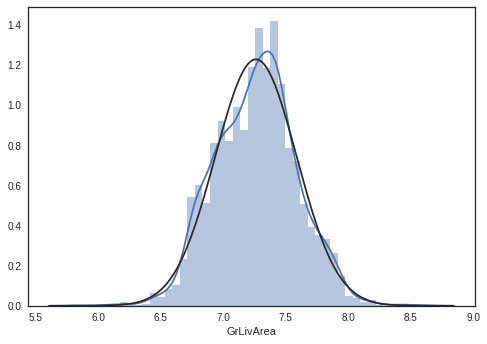

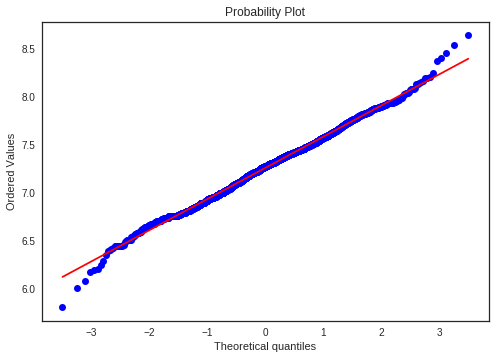

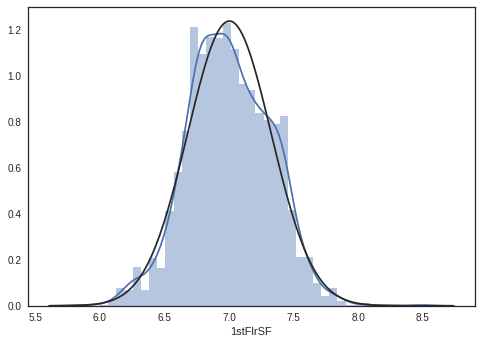

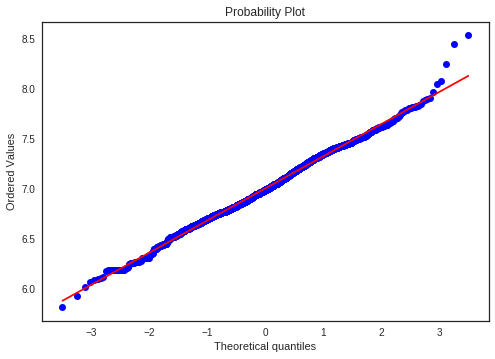

In [47]:
#Converted to normal distribution
data["GrLivArea"]=np.log(data["GrLivArea"])
plots(data["GrLivArea"])
data["1stFlrSF"]=np.log(data["1stFlrSF"])
plots(data["1stFlrSF"])


**CONVERT CATEGORICAL DATA TO NUMERICAL DATA**

---

In [0]:
from sklearn.preprocessing import LabelEncoder
cols=data.columns
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

**NEURAL NETWORK MODEL**
---



**INSTALLING KERAS**

---



In [49]:
!pip install -q keras
import keras

Using TensorFlow backend.


**IMPORTING REQUIRED LIBRARIES**

---



In [0]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout,BatchNormalization
from keras.optimizers import SGD,Adagrad
from keras.metrics import categorical_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.constraints import maxnorm



**TOUCH UPS BEFORE MODEL DESIGN**

---



In [0]:
#Converting the dataframe into numpy array for keras
trainSet=data[0:len(train)]
testSet=data[len(train):len(data)]
x=np.array(trainSet)
y=np.array(target)
testSet1=np.array(testSet)

#Defining error function
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [54]:
x.shape

(1460, 78)

**DESIGNING KERAS MODEL**

---

A model was built based on trial and error as a starting point for further improvements

***MODEL 1***

---



In [71]:
# With 1 layer of dropout
i=1200
j=0.90
model=Sequential()
model.add(Dense(i,input_dim=78,activation="relu"))
model.add(Dense(i,activation='relu'))
model.add(Dropout(j))

model.add( Dense(1,activation="relu"))
model.compile(loss="mse",optimizer="adam",metrics=[coeff_determination])
model.fit(x,y,batch_size=90,validation_split=0.2,epochs=500,verbose=2)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
 - 0s - loss: 37233336702.2466 - coeff_determination: -5.2074e+00 - val_loss: 34721193072.2192 - val_coeff_determination: -4.6660e+00
Epoch 2/500
 - 0s - loss: 26246256706.6301 - coeff_determination: -3.5707e+00 - val_loss: 15233376543.5616 - val_coeff_determination: -1.4365e+00
Epoch 3/500
 - 0s - loss: 6659727098.3014 - coeff_determination: -1.8566e-01 - val_loss: 4314087196.0548 - val_coeff_determination: 0.3087
Epoch 4/500
 - 0s - loss: 4096672058.7397 - coeff_determination: 0.2736 - val_loss: 2821196200.3288 - val_coeff_determination: 0.5810
Epoch 5/500
 - 0s - loss: 3106006117.6986 - coeff_determination: 0.4880 - val_loss: 2925412549.2603 - val_coeff_determination: 0.5701
Epoch 6/500
 - 0s - loss: 2850004156.0548 - coeff_determination: 0.5061 - val_loss: 2724673513.2055 - val_coeff_determination: 0.5897
Epoch 7/500
 - 0s - loss: 2804446104.9863 - coeff_determination: 0.5083 - val_loss: 2591225069.5890 - val_coeff_determin

Epoch 82/500
 - 0s - loss: 1762109915.6164 - coeff_determination: 0.7106 - val_loss: 1889637412.3836 - val_coeff_determination: 0.7250
Epoch 83/500
 - 0s - loss: 1714601617.7534 - coeff_determination: 0.7136 - val_loss: 1881611080.7671 - val_coeff_determination: 0.7256
Epoch 84/500
 - 0s - loss: 1780411635.6164 - coeff_determination: 0.7123 - val_loss: 1900578918.5753 - val_coeff_determination: 0.7251
Epoch 85/500
 - 0s - loss: 1867324410.1918 - coeff_determination: 0.6970 - val_loss: 1844545918.6849 - val_coeff_determination: 0.7304
Epoch 86/500
 - 0s - loss: 1834844391.0137 - coeff_determination: 0.7022 - val_loss: 1876028684.2740 - val_coeff_determination: 0.7198
Epoch 87/500
 - 0s - loss: 1903482064.1096 - coeff_determination: 0.6932 - val_loss: 1870121248.0000 - val_coeff_determination: 0.7232
Epoch 88/500
 - 0s - loss: 1881582288.8767 - coeff_determination: 0.6882 - val_loss: 2004280450.1918 - val_coeff_determination: 0.7100
Epoch 89/500
 - 0s - loss: 1896206821.6986 - coeff_dete

Epoch 163/500
 - 0s - loss: 1487572489.9726 - coeff_determination: 0.7624 - val_loss: 1763022971.6164 - val_coeff_determination: 0.7400
Epoch 164/500
 - 0s - loss: 1370817099.7260 - coeff_determination: 0.7727 - val_loss: 1645542393.4247 - val_coeff_determination: 0.7563
Epoch 165/500
 - 0s - loss: 1348722125.1507 - coeff_determination: 0.7715 - val_loss: 1674331037.3699 - val_coeff_determination: 0.7537
Epoch 166/500
 - 0s - loss: 1439157732.3836 - coeff_determination: 0.7535 - val_loss: 1860535818.0822 - val_coeff_determination: 0.7262
Epoch 167/500
 - 0s - loss: 1380721469.1507 - coeff_determination: 0.7705 - val_loss: 1632560399.3425 - val_coeff_determination: 0.7577
Epoch 168/500
 - 0s - loss: 1623896699.8356 - coeff_determination: 0.7334 - val_loss: 1629482271.3425 - val_coeff_determination: 0.7549
Epoch 169/500
 - 0s - loss: 1636674184.1096 - coeff_determination: 0.7365 - val_loss: 1633622878.2466 - val_coeff_determination: 0.7486
Epoch 170/500
 - 0s - loss: 1506484253.1507 - co

 - 0s - loss: 1208829269.1507 - coeff_determination: 0.7956 - val_loss: 1484961176.7671 - val_coeff_determination: 0.7760
Epoch 245/500
 - 0s - loss: 1361270704.1096 - coeff_determination: 0.7649 - val_loss: 1526767907.0685 - val_coeff_determination: 0.7709
Epoch 246/500
 - 0s - loss: 1340450271.4521 - coeff_determination: 0.7741 - val_loss: 1506066753.5342 - val_coeff_determination: 0.7742
Epoch 247/500
 - 0s - loss: 1262712970.5205 - coeff_determination: 0.7875 - val_loss: 1482170679.2329 - val_coeff_determination: 0.7707
Epoch 248/500
 - 0s - loss: 1266092314.5205 - coeff_determination: 0.7921 - val_loss: 1532008011.3973 - val_coeff_determination: 0.7695
Epoch 249/500
 - 0s - loss: 1249265506.0822 - coeff_determination: 0.7958 - val_loss: 1494823288.7671 - val_coeff_determination: 0.7742
Epoch 250/500
 - 0s - loss: 1274573763.2877 - coeff_determination: 0.7902 - val_loss: 1477853008.0000 - val_coeff_determination: 0.7751
Epoch 251/500
 - 0s - loss: 1165103358.1370 - coeff_determinat

Epoch 325/500
 - 0s - loss: 1205268518.1370 - coeff_determination: 0.8002 - val_loss: 1432926341.6986 - val_coeff_determination: 0.7840
Epoch 326/500
 - 0s - loss: 1280068550.5753 - coeff_determination: 0.7954 - val_loss: 1430863260.7123 - val_coeff_determination: 0.7798
Epoch 327/500
 - 0s - loss: 1352256621.1507 - coeff_determination: 0.7796 - val_loss: 1426038585.2055 - val_coeff_determination: 0.7834
Epoch 328/500
 - 0s - loss: 1070654624.3288 - coeff_determination: 0.8170 - val_loss: 1553177304.7671 - val_coeff_determination: 0.7653
Epoch 329/500
 - 0s - loss: 1301422421.9178 - coeff_determination: 0.7764 - val_loss: 1436857330.4110 - val_coeff_determination: 0.7826
Epoch 330/500
 - 0s - loss: 1153502190.3562 - coeff_determination: 0.8022 - val_loss: 1409130442.0822 - val_coeff_determination: 0.7846
Epoch 331/500
 - 0s - loss: 1175216297.7534 - coeff_determination: 0.7923 - val_loss: 1455626122.0822 - val_coeff_determination: 0.7708
Epoch 332/500
 - 0s - loss: 1250138355.3973 - co

Epoch 407/500
 - 0s - loss: 1101415461.6986 - coeff_determination: 0.8141 - val_loss: 1376549108.1644 - val_coeff_determination: 0.7892
Epoch 408/500
 - 0s - loss: 1276429425.4247 - coeff_determination: 0.7941 - val_loss: 1336032200.1096 - val_coeff_determination: 0.7927
Epoch 409/500
 - 0s - loss: 1034524200.0000 - coeff_determination: 0.8210 - val_loss: 1312952926.2466 - val_coeff_determination: 0.7905
Epoch 410/500
 - 0s - loss: 1045808698.9589 - coeff_determination: 0.8244 - val_loss: 1328890915.2877 - val_coeff_determination: 0.7905
Epoch 411/500
 - 0s - loss: 1096811236.1644 - coeff_determination: 0.8178 - val_loss: 1357882228.8219 - val_coeff_determination: 0.7774
Epoch 412/500
 - 0s - loss: 1130910845.9178 - coeff_determination: 0.8040 - val_loss: 1451680910.0274 - val_coeff_determination: 0.7621
Epoch 413/500
 - 0s - loss: 1188985256.8767 - coeff_determination: 0.7933 - val_loss: 1420607753.8630 - val_coeff_determination: 0.7705
Epoch 414/500
 - 0s - loss: 1149128691.0685 - co

Epoch 488/500
 - 0s - loss: 1080253846.7945 - coeff_determination: 0.8174 - val_loss: 1289384563.5068 - val_coeff_determination: 0.7981
Epoch 489/500
 - 0s - loss: 1002945133.8082 - coeff_determination: 0.8313 - val_loss: 1361692666.0822 - val_coeff_determination: 0.7866
Epoch 490/500
 - 0s - loss: 1101163477.8082 - coeff_determination: 0.8163 - val_loss: 1335784533.6986 - val_coeff_determination: 0.7901
Epoch 491/500
 - 0s - loss: 1056135721.6438 - coeff_determination: 0.8246 - val_loss: 1277631345.7534 - val_coeff_determination: 0.8005
Epoch 492/500
 - 0s - loss: 1156326225.4247 - coeff_determination: 0.8055 - val_loss: 1340429526.3562 - val_coeff_determination: 0.7814
Epoch 493/500
 - 0s - loss: 1175032266.7397 - coeff_determination: 0.7909 - val_loss: 1281525973.6986 - val_coeff_determination: 0.7967
Epoch 494/500
 - 0s - loss: 1233868831.6712 - coeff_determination: 0.8018 - val_loss: 1561996785.5342 - val_coeff_determination: 0.7655
Epoch 495/500
 - 0s - loss: 1158199715.9452 - co

**PREDICTION FOR TEST SET**

---



In [0]:
prediction=model.predict(testSet1)
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)
predictedTest.to_csv("House-price.csv",index=False)

In [0]:
from google.colab import files
files.download('House-price.csv')

**KAGGLE SCORE**

---
The kaggle score obtained for this model is 0.14416.



***MODEL 2***

---



In [68]:
# With 5 dropouts
i=1200
j=0.40
model=Sequential()
model.add(Dense(i,input_dim=78,activation="relu"))
model.add(Dense(i,activation='relu'))
model.add(Dropout(j))
model.add(Dropout(j))
model.add(Dropout(j))
model.add(Dropout(j))
model.add(Dropout(j))
model.add( Dense(1,activation="relu"))
model.compile(loss="mse",optimizer="adam",metrics=[coeff_determination])
model.fit(x,y,batch_size=90,validation_split=0.2,epochs=500,verbose=2)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
 - 0s - loss: 37046560641.7534 - coeff_determination: -5.4647e+00 - val_loss: 34164485470.6849 - val_coeff_determination: -4.5727e+00
Epoch 2/500
 - 0s - loss: 25790556230.1370 - coeff_determination: -3.3346e+00 - val_loss: 14443705196.7123 - val_coeff_determination: -1.3050e+00
Epoch 3/500
 - 0s - loss: 6669514185.6438 - coeff_determination: -9.6074e-02 - val_loss: 4632476689.5342 - val_coeff_determination: 0.2530
Epoch 4/500
 - 0s - loss: 4294229010.4110 - coeff_determination: 0.2790 - val_loss: 2858245268.1644 - val_coeff_determination: 0.5770
Epoch 5/500
 - 0s - loss: 3027718755.9452 - coeff_determination: 0.4999 - val_loss: 2845428364.2740 - val_coeff_determination: 0.5815
Epoch 6/500
 - 0s - loss: 3049568628.1644 - coeff_determination: 0.4978 - val_loss: 2678662128.2192 - val_coeff_determination: 0.6008
Epoch 7/500
 - 0s - loss: 2987365703.0137 - coeff_determination: 0.5148 - val_loss: 2611227446.3562 - val_coeff_determin

Epoch 81/500
 - 0s - loss: 2035393372.4932 - coeff_determination: 0.6614 - val_loss: 1895896906.0822 - val_coeff_determination: 0.7254
Epoch 82/500
 - 0s - loss: 2048883010.6301 - coeff_determination: 0.6409 - val_loss: 1888525091.0685 - val_coeff_determination: 0.7234
Epoch 83/500
 - 0s - loss: 2073833648.0000 - coeff_determination: 0.6665 - val_loss: 1894893629.3699 - val_coeff_determination: 0.7259
Epoch 84/500
 - 0s - loss: 1951660862.2466 - coeff_determination: 0.6649 - val_loss: 1884624653.1507 - val_coeff_determination: 0.7259
Epoch 85/500
 - 0s - loss: 1961775556.9315 - coeff_determination: 0.6848 - val_loss: 1877013580.2740 - val_coeff_determination: 0.7269
Epoch 86/500
 - 0s - loss: 1950079841.9726 - coeff_determination: 0.6682 - val_loss: 2113645553.0959 - val_coeff_determination: 0.6965
Epoch 87/500
 - 0s - loss: 2116713017.4247 - coeff_determination: 0.6550 - val_loss: 1955916568.1096 - val_coeff_determination: 0.7182
Epoch 88/500
 - 0s - loss: 2124887910.1370 - coeff_dete

Epoch 162/500
 - 0s - loss: 1715332392.0000 - coeff_determination: 0.7197 - val_loss: 1709733888.8767 - val_coeff_determination: 0.7460
Epoch 163/500
 - 0s - loss: 1786289635.6164 - coeff_determination: 0.6953 - val_loss: 1655149312.0000 - val_coeff_determination: 0.7545
Epoch 164/500
 - 0s - loss: 1829451051.8356 - coeff_determination: 0.7107 - val_loss: 1681978395.1781 - val_coeff_determination: 0.7504
Epoch 165/500
 - 0s - loss: 1730710512.9863 - coeff_determination: 0.7034 - val_loss: 1743016197.2603 - val_coeff_determination: 0.7414
Epoch 166/500
 - 0s - loss: 1691094576.9863 - coeff_determination: 0.7094 - val_loss: 1669087144.1096 - val_coeff_determination: 0.7524
Epoch 167/500
 - 0s - loss: 1735426930.4110 - coeff_determination: 0.7082 - val_loss: 1632889264.6575 - val_coeff_determination: 0.7527
Epoch 168/500
 - 0s - loss: 1646221880.7671 - coeff_determination: 0.7211 - val_loss: 1637502814.2466 - val_coeff_determination: 0.7553
Epoch 169/500
 - 0s - loss: 1721396035.1781 - co

Epoch 243/500
 - 0s - loss: 1601709334.4658 - coeff_determination: 0.7370 - val_loss: 1507142528.6575 - val_coeff_determination: 0.7696
Epoch 244/500
 - 0s - loss: 1492171390.1370 - coeff_determination: 0.7477 - val_loss: 1490957330.6301 - val_coeff_determination: 0.7685
Epoch 245/500
 - 0s - loss: 1443435159.4521 - coeff_determination: 0.7592 - val_loss: 1495981267.2877 - val_coeff_determination: 0.7688
Epoch 246/500
 - 0s - loss: 1520724437.1507 - coeff_determination: 0.7267 - val_loss: 1528249069.8082 - val_coeff_determination: 0.7715
Epoch 247/500
 - 0s - loss: 1510406714.6301 - coeff_determination: 0.7503 - val_loss: 1489905263.5616 - val_coeff_determination: 0.7744
Epoch 248/500
 - 0s - loss: 1469601333.9178 - coeff_determination: 0.7528 - val_loss: 1498582702.9041 - val_coeff_determination: 0.7703
Epoch 249/500
 - 0s - loss: 1580225392.9863 - coeff_determination: 0.7378 - val_loss: 1501530902.7945 - val_coeff_determination: 0.7717
Epoch 250/500
 - 0s - loss: 1632954028.0548 - co

Epoch 324/500
 - 0s - loss: 1486312528.6575 - coeff_determination: 0.7524 - val_loss: 1435435081.6438 - val_coeff_determination: 0.7814
Epoch 325/500
 - 0s - loss: 1495659930.7397 - coeff_determination: 0.7524 - val_loss: 1429033964.2740 - val_coeff_determination: 0.7788
Epoch 326/500
 - 0s - loss: 1573399512.4384 - coeff_determination: 0.7398 - val_loss: 1432731483.6164 - val_coeff_determination: 0.7752
Epoch 327/500
 - 0s - loss: 1483525391.2329 - coeff_determination: 0.7498 - val_loss: 1430891221.2603 - val_coeff_determination: 0.7812
Epoch 328/500
 - 0s - loss: 1531195444.1644 - coeff_determination: 0.7416 - val_loss: 1448144820.6027 - val_coeff_determination: 0.7707
Epoch 329/500
 - 0s - loss: 1515047157.9178 - coeff_determination: 0.7496 - val_loss: 1428848337.0959 - val_coeff_determination: 0.7800
Epoch 330/500
 - 0s - loss: 1314019254.6849 - coeff_determination: 0.7766 - val_loss: 1428757882.9589 - val_coeff_determination: 0.7831
Epoch 331/500
 - 0s - loss: 1346926654.9041 - co

Epoch 405/500
 - 0s - loss: 1232558070.2466 - coeff_determination: 0.7889 - val_loss: 1364074870.1370 - val_coeff_determination: 0.7864
Epoch 406/500
 - 0s - loss: 1292055625.8630 - coeff_determination: 0.7813 - val_loss: 1365398683.6164 - val_coeff_determination: 0.7896
Epoch 407/500
 - 0s - loss: 1398708877.4795 - coeff_determination: 0.7719 - val_loss: 1395942189.8082 - val_coeff_determination: 0.7764
Epoch 408/500
 - 0s - loss: 1451338555.1781 - coeff_determination: 0.7403 - val_loss: 1355368418.8493 - val_coeff_determination: 0.7864
Epoch 409/500
 - 0s - loss: 1468784756.1644 - coeff_determination: 0.7548 - val_loss: 1360334940.2740 - val_coeff_determination: 0.7862
Epoch 410/500
 - 0s - loss: 1367515744.8767 - coeff_determination: 0.7743 - val_loss: 1419724903.2329 - val_coeff_determination: 0.7827
Epoch 411/500
 - 0s - loss: 1361149778.3014 - coeff_determination: 0.7602 - val_loss: 1461747267.7260 - val_coeff_determination: 0.7813
Epoch 412/500
 - 0s - loss: 1385000801.2055 - co

Epoch 486/500
 - 0s - loss: 1279011794.0822 - coeff_determination: 0.7736 - val_loss: 1322676779.6164 - val_coeff_determination: 0.7874
Epoch 487/500
 - 0s - loss: 1306988049.0959 - coeff_determination: 0.7778 - val_loss: 1356447019.3973 - val_coeff_determination: 0.7815
Epoch 488/500
 - 0s - loss: 1288801072.1096 - coeff_determination: 0.7811 - val_loss: 1342583358.6849 - val_coeff_determination: 0.7848
Epoch 489/500
 - 0s - loss: 1326753907.9452 - coeff_determination: 0.7791 - val_loss: 1390162698.3014 - val_coeff_determination: 0.7667
Epoch 490/500
 - 0s - loss: 1344973272.2192 - coeff_determination: 0.7679 - val_loss: 1349473846.7945 - val_coeff_determination: 0.7815
Epoch 491/500
 - 0s - loss: 1386734885.1507 - coeff_determination: 0.7730 - val_loss: 1329314740.6027 - val_coeff_determination: 0.7855
Epoch 492/500
 - 0s - loss: 1324841338.9589 - coeff_determination: 0.7764 - val_loss: 1417927265.0959 - val_coeff_determination: 0.7666
Epoch 493/500
 - 0s - loss: 1268145519.7808 - co

**PREDICTION FOR TEST SET**

---



In [0]:
prediction=model.predict(testSet1)
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)
predictedTest.to_csv("House-price.csv",index=False)

In [0]:
from google.colab import files
files.download('House-price.csv')

**KAGGLE SCORE**

---

The kaggle score obtained for this model is  0.14122 

**TUNING THE MODEL**
---
Using GRIDSEARCH, each parameter of the model is tuned


**MODEL FUNCTION**

---



In [0]:
def create_model(optimizer,activation,dropout):
    model=Sequential()
    i=1200
    model.add(Dense(i,input_dim=78,activation=activation))
    model.add(Dense(i,activation=activation))
    model.add(Dropout(dropout))
    model.add( Dense(1,activation=activation))
    model.compile(loss="mse",optimizer=optimizer,metrics=["accuracy"])
    return model

**TUNING OPTIMIZER**

---



In [73]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model1 = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
activation=[ 'relu']
dropout=[0.90]
optimizer= ['SGD', 'RMSprop', 'Adagrad', 'Adam']
batch_size = [70]
epochs = [200]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  optimizer=optimizer,
                  activation=activation,
                  dropout=dropout)
grid = GridSearchCV(estimator=model1,
                    param_grid=param_grid,
                    n_jobs=1,
                    verbose=0)
grid_result = grid.fit(x,y)



Epoch 1/200
973/973 [==============================] - 0s 274us/step - loss: 899110480231265382432768.0000 - acc: 0.0010
Epoch 2/200
973/973 [==============================] - 0s 76us/step - loss: 73415.0771 - acc: 0.0010
Epoch 3/200
973/973 [==============================] - 0s 77us/step - loss: 73415.0773 - acc: 0.0010
Epoch 4/200
973/973 [==============================] - 0s 77us/step - loss: 73415.0769 - acc: 0.0010
Epoch 5/200
973/973 [==============================] - 0s 73us/step - loss: 73415.0779 - acc: 0.0010
Epoch 6/200
973/973 [==============================] - 0s 72us/step - loss: 73415.0768 - acc: 0.0010
Epoch 7/200
973/973 [==============================] - 0s 74us/step - loss: 73415.0781 - acc: 0.0010
Epoch 8/200
973/973 [==============================] - 0s 78us/step - loss: 73415.0764 - acc: 0.0010
Epoch 9/200
973/973 [==============================] - 0s 78us/step - loss: 73415.0781 - acc: 0.0010
Epoch 10/200
973/973 [==============================] - 0s 77us/step - 

Epoch 100/200
973/973 [==============================] - 0s 78us/step - loss: 73415.0775 - acc: 0.0010
Epoch 101/200
973/973 [==============================] - 0s 83us/step - loss: 73415.0765 - acc: 0.0010
Epoch 102/200
973/973 [==============================] - 0s 78us/step - loss: 73415.0773 - acc: 0.0010
Epoch 103/200
973/973 [==============================] - 0s 82us/step - loss: 73415.0763 - acc: 0.0010
Epoch 104/200
973/973 [==============================] - 0s 92us/step - loss: 73415.0780 - acc: 0.0010
Epoch 105/200
973/973 [==============================] - 0s 79us/step - loss: 73415.0777 - acc: 0.0010
Epoch 106/200
973/973 [==============================] - 0s 84us/step - loss: 73415.0773 - acc: 0.0010
Epoch 107/200
973/973 [==============================] - 0s 77us/step - loss: 73415.0775 - acc: 0.0010
Epoch 108/200
973/973 [==============================] - 0s 84us/step - loss: 73415.0766 - acc: 0.0010
Epoch 109/200
973/973 [==============================] - 0s 76us/step - l

Epoch 198/200
973/973 [==============================] - 0s 79us/step - loss: 73415.0781 - acc: 0.0010
Epoch 199/200
973/973 [==============================] - 0s 81us/step - loss: 73415.0773 - acc: 0.0010
Epoch 200/200
973/973 [==============================] - 0s 39us/step
Epoch 1/200
973/973 [==============================] - 0s 284us/step - loss: 771537973922661734023168.0000 - acc: 0.0031
Epoch 2/200
973/973 [==============================] - 0s 79us/step - loss: 70504.3926 - acc: 0.0010
Epoch 3/200
973/973 [==============================] - 0s 80us/step - loss: 70504.3921 - acc: 0.0010
Epoch 4/200
973/973 [==============================] - 0s 83us/step - loss: 70504.3928 - acc: 0.0010
Epoch 5/200
973/973 [==============================] - 0s 75us/step - loss: 70504.3919 - acc: 0.0010
Epoch 6/200
973/973 [==============================] - 0s 82us/step - loss: 70504.3930 - acc: 0.0010
Epoch 7/200
973/973 [==============================] - 0s 78us/step - loss: 70504.3928 - acc: 0.00

Epoch 96/200
973/973 [==============================] - 0s 81us/step - loss: 70504.3933 - acc: 0.0010
Epoch 97/200
973/973 [==============================] - 0s 78us/step - loss: 70504.3920 - acc: 0.0010
Epoch 98/200
973/973 [==============================] - 0s 76us/step - loss: 70504.3926 - acc: 0.0010
Epoch 99/200
973/973 [==============================] - 0s 78us/step - loss: 70504.3924 - acc: 0.0010
Epoch 100/200
973/973 [==============================] - 0s 78us/step - loss: 70504.3929 - acc: 0.0010
Epoch 101/200
973/973 [==============================] - 0s 84us/step - loss: 70504.3930 - acc: 0.0010
Epoch 102/200
973/973 [==============================] - 0s 80us/step - loss: 70504.3918 - acc: 0.0010
Epoch 103/200
973/973 [==============================] - 0s 79us/step - loss: 70504.3919 - acc: 0.0010
Epoch 104/200
973/973 [==============================] - 0s 79us/step - loss: 70504.3928 - acc: 0.0010
Epoch 105/200
973/973 [==============================] - 0s 78us/step - loss:

Epoch 194/200
973/973 [==============================] - 0s 80us/step - loss: 70504.3927 - acc: 0.0010
Epoch 195/200
973/973 [==============================] - 0s 81us/step - loss: 70504.3925 - acc: 0.0010
Epoch 196/200
973/973 [==============================] - 0s 78us/step - loss: 70504.3922 - acc: 0.0010
Epoch 197/200
973/973 [==============================] - 0s 85us/step - loss: 70504.3923 - acc: 0.0010
Epoch 198/200
973/973 [==============================] - 0s 84us/step - loss: 70504.3922 - acc: 0.0010
Epoch 199/200
973/973 [==============================] - 0s 82us/step - loss: 70504.3928 - acc: 0.0010
Epoch 200/200
973/973 [==============================] - 0s 31us/step
Epoch 1/200
974/974 [==============================] - 0s 314us/step - loss: 357243298622386460426240.0000 - acc: 0.0010
Epoch 2/200
974/974 [==============================] - 0s 80us/step - loss: 74806.9517 - acc: 0.0010
Epoch 3/200
974/974 [==============================] - 0s 80us/step - loss: 74806.9521 - a

Epoch 92/200
974/974 [==============================] - 0s 80us/step - loss: 74806.9519 - acc: 0.0010
Epoch 93/200
974/974 [==============================] - 0s 79us/step - loss: 74806.9524 - acc: 0.0010
Epoch 94/200
974/974 [==============================] - 0s 77us/step - loss: 74806.9516 - acc: 0.0010
Epoch 95/200
974/974 [==============================] - 0s 80us/step - loss: 74806.9522 - acc: 0.0010
Epoch 96/200
974/974 [==============================] - 0s 82us/step - loss: 74806.9516 - acc: 0.0010
Epoch 97/200
974/974 [==============================] - 0s 81us/step - loss: 74806.9518 - acc: 0.0010
Epoch 98/200
974/974 [==============================] - 0s 81us/step - loss: 74806.9510 - acc: 0.0010
Epoch 99/200
974/974 [==============================] - 0s 82us/step - loss: 74806.9525 - acc: 0.0010
Epoch 100/200
974/974 [==============================] - 0s 82us/step - loss: 74806.9510 - acc: 0.0010
Epoch 101/200
974/974 [==============================] - 0s 81us/step - loss: 748

 70/974 [=>............................] - ETA: 0s - loss: 80191.7734 - acc: 0.0000e+00974/974 [==============================] - 0s 81us/step - loss: 74806.9524 - acc: 0.0010
Epoch 189/200
974/974 [==============================] - 0s 86us/step - loss: 74806.9526 - acc: 0.0010
Epoch 190/200
974/974 [==============================] - 0s 78us/step - loss: 74806.9516 - acc: 0.0010
Epoch 191/200
974/974 [==============================] - 0s 81us/step - loss: 74806.9516 - acc: 0.0010
Epoch 192/200
974/974 [==============================] - 0s 85us/step - loss: 74806.9514 - acc: 0.0010
Epoch 193/200
974/974 [==============================] - 0s 81us/step - loss: 74806.9523 - acc: 0.0010
Epoch 194/200
974/974 [==============================] - 0s 86us/step - loss: 74806.9520 - acc: 0.0010
Epoch 195/200
974/974 [==============================] - 0s 81us/step - loss: 74806.9516 - acc: 0.0010
Epoch 196/200
974/974 [==============================] - 0s 80us/step - loss: 74806.9515 - acc: 0.0010


973/973 [==============================] - 0s 98us/step - loss: 3759.8657 - acc: 0.0062
Epoch 78/200
973/973 [==============================] - 0s 94us/step - loss: 3415.9386 - acc: 0.0092
Epoch 79/200
973/973 [==============================] - 0s 100us/step - loss: 4219.2038 - acc: 0.0041
Epoch 80/200
973/973 [==============================] - 0s 96us/step - loss: 3093.4150 - acc: 0.0092
Epoch 81/200
973/973 [==============================] - 0s 97us/step - loss: 3335.7119 - acc: 0.0134
Epoch 82/200
973/973 [==============================] - 0s 96us/step - loss: 3554.3556 - acc: 0.0072
Epoch 83/200
973/973 [==============================] - 0s 100us/step - loss: 3413.5912 - acc: 0.0051
Epoch 84/200
973/973 [==============================] - 0s 96us/step - loss: 3149.5646 - acc: 0.0082
Epoch 85/200
973/973 [==============================] - 0s 97us/step - loss: 4013.8021 - acc: 0.0041
Epoch 86/200
973/973 [==============================] - 0s 98us/step - loss: 2813.7461 - acc: 0.0092
E

Epoch 163/200
973/973 [==============================] - 0s 95us/step - loss: 2717.0526 - acc: 0.0123
Epoch 164/200
973/973 [==============================] - 0s 95us/step - loss: 2557.6417 - acc: 0.0134
Epoch 165/200
973/973 [==============================] - 0s 99us/step - loss: 2599.3494 - acc: 0.0134
Epoch 166/200
973/973 [==============================] - 0s 104us/step - loss: 2505.6385 - acc: 0.0134
Epoch 167/200
973/973 [==============================] - 0s 97us/step - loss: 2468.4940 - acc: 0.0082
Epoch 168/200
973/973 [==============================] - 0s 98us/step - loss: 2524.0672 - acc: 0.0103
Epoch 169/200
973/973 [==============================] - 0s 101us/step - loss: 2564.2111 - acc: 0.0144
Epoch 170/200
973/973 [==============================] - 0s 98us/step - loss: 2994.5142 - acc: 0.0113
Epoch 171/200
973/973 [==============================] - 0s 99us/step - loss: 2312.3165 - acc: 0.0123
Epoch 172/200
973/973 [==============================] - 0s 95us/step - loss: 31

Epoch 51/200
973/973 [==============================] - 0s 96us/step - loss: 3714.3479 - acc: 0.0092
Epoch 52/200
973/973 [==============================] - 0s 95us/step - loss: 3300.1182 - acc: 0.0134
Epoch 53/200
973/973 [==============================] - 0s 106us/step - loss: 3761.4824 - acc: 0.0134
Epoch 54/200
973/973 [==============================] - 0s 100us/step - loss: 4325.0650 - acc: 0.0092
Epoch 55/200
973/973 [==============================] - 0s 95us/step - loss: 3606.1005 - acc: 0.0103
Epoch 56/200
973/973 [==============================] - 0s 96us/step - loss: 3641.5602 - acc: 0.0072
Epoch 57/200
973/973 [==============================] - 0s 100us/step - loss: 3458.9341 - acc: 0.0092
Epoch 58/200
973/973 [==============================] - 0s 97us/step - loss: 3836.6731 - acc: 0.0051
Epoch 59/200
973/973 [==============================] - 0s 101us/step - loss: 3643.4756 - acc: 0.0113
Epoch 60/200
973/973 [==============================] - 0s 103us/step - loss: 3383.5574

973/973 [==============================] - 0s 99us/step - loss: 2908.5847 - acc: 0.0082
Epoch 135/200
973/973 [==============================] - 0s 96us/step - loss: 2358.8921 - acc: 0.0134
Epoch 136/200
973/973 [==============================] - 0s 101us/step - loss: 2689.8320 - acc: 0.0144
Epoch 137/200
973/973 [==============================] - 0s 100us/step - loss: 2084.3598 - acc: 0.0134
Epoch 138/200
973/973 [==============================] - 0s 96us/step - loss: 2452.8221 - acc: 0.0123
Epoch 139/200
973/973 [==============================] - 0s 95us/step - loss: 2314.0583 - acc: 0.0072
Epoch 140/200
973/973 [==============================] - 0s 97us/step - loss: 3010.8187 - acc: 0.0072
Epoch 141/200
973/973 [==============================] - 0s 100us/step - loss: 2421.4588 - acc: 0.0175
Epoch 142/200
973/973 [==============================] - 0s 99us/step - loss: 2301.3760 - acc: 0.0113
Epoch 143/200
973/973 [==============================] - 0s 101us/step - loss: 2532.6529 - ac

700/974 [====================>.........] - ETA: 0s - loss: 6300.6319 - acc: 0.0029    974/974 [==============================] - 0s 92us/step - loss: 5824.9919 - acc: 0.0021
Epoch 24/200
974/974 [==============================] - 0s 93us/step - loss: 5890.6075 - acc: 0.0051
Epoch 25/200
974/974 [==============================] - 0s 93us/step - loss: 5656.7206 - acc: 0.0062
Epoch 26/200
974/974 [==============================] - 0s 108us/step - loss: 6046.5499 - acc: 0.0072
Epoch 27/200
974/974 [==============================] - 0s 96us/step - loss: 5470.6073 - acc: 0.0113
Epoch 28/200
974/974 [==============================] - 0s 96us/step - loss: 5203.3461 - acc: 0.0113
Epoch 29/200
974/974 [==============================] - 0s 102us/step - loss: 4877.7236 - acc: 0.0092
Epoch 30/200
974/974 [==============================] - 0s 97us/step - loss: 5895.1972 - acc: 0.0092
Epoch 31/200
974/974 [==============================] - 0s 97us/step - loss: 5191.3440 - acc: 0.0113
Epoch 32/200
974

 70/974 [=>............................] - ETA: 0s - loss: 3320.6179 - acc: 0.0000e+00974/974 [==============================] - 0s 97us/step - loss: 2632.1607 - acc: 0.0051
Epoch 110/200
974/974 [==============================] - 0s 98us/step - loss: 2875.1143 - acc: 0.0144
Epoch 111/200
974/974 [==============================] - 0s 97us/step - loss: 3274.1483 - acc: 0.0092
Epoch 112/200
974/974 [==============================] - 0s 102us/step - loss: 2965.2487 - acc: 0.0144
Epoch 113/200
974/974 [==============================] - 0s 98us/step - loss: 2733.1710 - acc: 0.0103
Epoch 114/200
974/974 [==============================] - 0s 97us/step - loss: 3061.8218 - acc: 0.0082
Epoch 115/200
974/974 [==============================] - 0s 98us/step - loss: 3138.4897 - acc: 0.0082
Epoch 116/200
974/974 [==============================] - 0s 102us/step - loss: 3291.4403 - acc: 0.0051
Epoch 117/200
974/974 [==============================] - 0s 96us/step - loss: 2889.4853 - acc: 0.0103
Epoch 11

560/974 [================>.............] - ETA: 0s - loss: 2325.3811 - acc: 0.0107    974/974 [==============================] - 0s 100us/step - loss: 2314.4279 - acc: 0.0113
Epoch 198/200
974/974 [==============================] - 0s 92us/step - loss: 2391.5952 - acc: 0.0113
Epoch 199/200
974/974 [==============================] - 0s 96us/step - loss: 2516.1513 - acc: 0.0103
Epoch 200/200
974/974 [==============================] - 0s 32us/step
Epoch 1/200
973/973 [==============================] - 0s 397us/step - loss: 1630141.8057 - acc: 0.0010
Epoch 2/200
973/973 [==============================] - 0s 91us/step - loss: 73415.0780 - acc: 0.0010
Epoch 3/200
973/973 [==============================] - 0s 94us/step - loss: 73415.0759 - acc: 0.0010
Epoch 4/200
973/973 [==============================] - 0s 99us/step - loss: 73415.0775 - acc: 0.0010
Epoch 5/200
973/973 [==============================] - 0s 92us/step - loss: 73415.0783 - acc: 0.0010
Epoch 6/200
973/973 [======================

973/973 [==============================] - 0s 96us/step - loss: 6428.8289 - acc: 0.0062
Epoch 91/200
973/973 [==============================] - 0s 104us/step - loss: 5998.7957 - acc: 0.0072
Epoch 92/200
973/973 [==============================] - 0s 95us/step - loss: 6570.4368 - acc: 0.0051
Epoch 93/200
973/973 [==============================] - 0s 93us/step - loss: 6276.8801 - acc: 0.0062
Epoch 94/200
973/973 [==============================] - 0s 94us/step - loss: 6115.0362 - acc: 0.0031
Epoch 95/200
973/973 [==============================] - 0s 96us/step - loss: 6027.0449 - acc: 0.0092
Epoch 96/200
973/973 [==============================] - 0s 91us/step - loss: 5815.1620 - acc: 0.0082
Epoch 97/200
973/973 [==============================] - 0s 88us/step - loss: 6321.1870 - acc: 0.0062
Epoch 98/200
973/973 [==============================] - 0s 92us/step - loss: 6201.4186 - acc: 0.0092
Epoch 99/200
973/973 [==============================] - 0s 92us/step - loss: 6177.5590 - acc: 0.0062
Ep

Epoch 184/200
973/973 [==============================] - 0s 97us/step - loss: 4716.8761 - acc: 0.0062
Epoch 185/200
973/973 [==============================] - 0s 97us/step - loss: 5266.7701 - acc: 0.0103
Epoch 186/200
973/973 [==============================] - 0s 92us/step - loss: 5256.3157 - acc: 0.0092
Epoch 187/200
973/973 [==============================] - 0s 90us/step - loss: 5118.3515 - acc: 0.0051
Epoch 188/200
973/973 [==============================] - 0s 91us/step - loss: 4800.0369 - acc: 0.0082
Epoch 189/200
973/973 [==============================] - 0s 94us/step - loss: 5070.9984 - acc: 0.0062
Epoch 190/200
973/973 [==============================] - 0s 96us/step - loss: 4736.9993 - acc: 0.0051
Epoch 191/200
973/973 [==============================] - 0s 102us/step - loss: 4740.2350 - acc: 0.0072
Epoch 192/200
973/973 [==============================] - 0s 94us/step - loss: 5282.4924 - acc: 0.0092
Epoch 193/200
973/973 [==============================] - 0s 92us/step - loss: 492

700/973 [====================>.........] - ETA: 0s - loss: 70326.2715 - acc: 0.0014    973/973 [==============================] - 0s 91us/step - loss: 70504.3933 - acc: 0.0010
Epoch 77/200
973/973 [==============================] - 0s 93us/step - loss: 70504.3920 - acc: 0.0010
Epoch 78/200
973/973 [==============================] - 0s 92us/step - loss: 70504.3932 - acc: 0.0010
Epoch 79/200
973/973 [==============================] - 0s 103us/step - loss: 70504.3919 - acc: 0.0010
Epoch 80/200
973/973 [==============================] - 0s 91us/step - loss: 70504.3926 - acc: 0.0010
Epoch 81/200
973/973 [==============================] - 0s 92us/step - loss: 70504.3923 - acc: 0.0010
Epoch 82/200
973/973 [==============================] - 0s 95us/step - loss: 70504.3929 - acc: 0.0010
Epoch 83/200
973/973 [==============================] - 0s 101us/step - loss: 70504.3933 - acc: 0.0010
Epoch 84/200
973/973 [==============================] - 0s 96us/step - loss: 70504.3919 - acc: 0.0010
Epoch 

 70/973 [=>............................] - ETA: 0s - loss: 80773.2891 - acc: 0.0143973/973 [==============================] - 0s 93us/step - loss: 70586.7524 - acc: 0.0010
Epoch 171/200
973/973 [==============================] - 0s 93us/step - loss: 70251.5035 - acc: 0.0010
Epoch 172/200
973/973 [==============================] - 0s 98us/step - loss: 70715.2267 - acc: 0.0010
Epoch 173/200
973/973 [==============================] - 0s 93us/step - loss: 69198.4893 - acc: 0.0010
Epoch 174/200
973/973 [==============================] - 0s 96us/step - loss: 69639.9216 - acc: 0.0010
Epoch 175/200
973/973 [==============================] - 0s 92us/step - loss: 69591.8396 - acc: 0.0010
Epoch 176/200
973/973 [==============================] - 0s 92us/step - loss: 68794.5176 - acc: 0.0010
Epoch 177/200
973/973 [==============================] - 0s 100us/step - loss: 68390.1919 - acc: 0.0010
Epoch 178/200
973/973 [==============================] - 0s 95us/step - loss: 68864.7296 - acc: 0.0010
Epo

Epoch 58/200
974/974 [==============================] - 0s 96us/step - loss: 5534.5326 - acc: 0.0062
Epoch 59/200
974/974 [==============================] - 0s 93us/step - loss: 5127.4334 - acc: 0.0144
Epoch 60/200
974/974 [==============================] - 0s 93us/step - loss: 5059.9569 - acc: 0.0113
Epoch 61/200
974/974 [==============================] - 0s 109us/step - loss: 5569.1828 - acc: 0.0092
Epoch 62/200
974/974 [==============================] - 0s 93us/step - loss: 5602.3037 - acc: 0.0041
Epoch 63/200
974/974 [==============================] - 0s 91us/step - loss: 5348.9367 - acc: 0.0062
Epoch 64/200
974/974 [==============================] - 0s 97us/step - loss: 4814.8396 - acc: 0.0051
Epoch 65/200
974/974 [==============================] - 0s 95us/step - loss: 5457.5285 - acc: 0.0103
Epoch 66/200
974/974 [==============================] - 0s 95us/step - loss: 5674.0242 - acc: 0.0041
Epoch 67/200
974/974 [==============================] - 0s 93us/step - loss: 5587.2426 - a

Epoch 152/200
974/974 [==============================] - 0s 89us/step - loss: 4345.1023 - acc: 0.0092
Epoch 153/200
974/974 [==============================] - 0s 98us/step - loss: 3774.5173 - acc: 0.0082
Epoch 154/200
974/974 [==============================] - 0s 97us/step - loss: 4177.6943 - acc: 0.0133
Epoch 155/200
974/974 [==============================] - 0s 93us/step - loss: 4187.4557 - acc: 0.0144
Epoch 156/200
974/974 [==============================] - 0s 93us/step - loss: 4114.8344 - acc: 0.0062
Epoch 157/200
974/974 [==============================] - 0s 95us/step - loss: 4267.1454 - acc: 0.0092
Epoch 158/200
974/974 [==============================] - 0s 96us/step - loss: 4117.6862 - acc: 0.0082
Epoch 159/200
974/974 [==============================] - 0s 95us/step - loss: 3966.5357 - acc: 0.0051
Epoch 160/200
974/974 [==============================] - 0s 100us/step - loss: 4210.0072 - acc: 0.0092
Epoch 161/200
974/974 [==============================] - 0s 95us/step - loss: 429

Epoch 46/200
973/973 [==============================] - 0s 108us/step - loss: 4490.2639 - acc: 0.0092
Epoch 47/200
973/973 [==============================] - 0s 108us/step - loss: 4642.9272 - acc: 0.0031
Epoch 48/200
973/973 [==============================] - 0s 111us/step - loss: 4482.2292 - acc: 0.0051
Epoch 49/200
973/973 [==============================] - 0s 105us/step - loss: 4507.7077 - acc: 0.0051
Epoch 50/200
973/973 [==============================] - 0s 110us/step - loss: 4812.8175 - acc: 0.0031
Epoch 51/200
973/973 [==============================] - 0s 109us/step - loss: 4629.7781 - acc: 0.0072
Epoch 52/200
973/973 [==============================] - 0s 106us/step - loss: 4894.6663 - acc: 0.0051
Epoch 53/200
973/973 [==============================] - 0s 111us/step - loss: 4149.5361 - acc: 0.0072
Epoch 54/200
973/973 [==============================] - 0s 113us/step - loss: 4231.0326 - acc: 0.0103
Epoch 55/200
973/973 [==============================] - 0s 107us/step - loss: 4295

560/973 [================>.............] - ETA: 0s - loss: 2636.5797 - acc: 0.0196973/973 [==============================] - 0s 111us/step - loss: 2712.4670 - acc: 0.0164
Epoch 146/200
973/973 [==============================] - 0s 108us/step - loss: 2621.0561 - acc: 0.0144
Epoch 147/200
973/973 [==============================] - 0s 108us/step - loss: 2476.5285 - acc: 0.0051
Epoch 148/200
973/973 [==============================] - 0s 114us/step - loss: 2364.7443 - acc: 0.0113
Epoch 149/200
973/973 [==============================] - 0s 109us/step - loss: 2685.7760 - acc: 0.0123
Epoch 150/200
973/973 [==============================] - 0s 108us/step - loss: 2555.4565 - acc: 0.0092
Epoch 151/200
973/973 [==============================] - 0s 108us/step - loss: 2364.7893 - acc: 0.0134
Epoch 152/200
973/973 [==============================] - 0s 113us/step - loss: 2794.0386 - acc: 0.0113
Epoch 153/200
973/973 [==============================] - 0s 108us/step - loss: 2730.4391 - acc: 0.0123
Epoch

Epoch 42/200
973/973 [==============================] - 0s 106us/step - loss: 4860.5658 - acc: 0.0072
Epoch 43/200
973/973 [==============================] - 0s 105us/step - loss: 4314.0042 - acc: 0.0031
Epoch 44/200
973/973 [==============================] - 0s 112us/step - loss: 4629.0743 - acc: 0.0062
Epoch 45/200
973/973 [==============================] - 0s 111us/step - loss: 4794.0238 - acc: 0.0031
Epoch 46/200
973/973 [==============================] - 0s 108us/step - loss: 4146.9044 - acc: 0.0021
Epoch 47/200
973/973 [==============================] - 0s 114us/step - loss: 5009.4307 - acc: 0.0103
Epoch 48/200
973/973 [==============================] - 0s 118us/step - loss: 4574.8033 - acc: 0.0062
Epoch 49/200
973/973 [==============================] - 0s 109us/step - loss: 4034.7786 - acc: 0.0072
Epoch 50/200
973/973 [==============================] - 0s 109us/step - loss: 3692.3553 - acc: 0.0134
Epoch 51/200
973/973 [==============================] - 0s 105us/step - loss: 4361

560/973 [================>.............] - ETA: 0s - loss: 2429.4605 - acc: 0.0054    973/973 [==============================] - 0s 111us/step - loss: 2706.9889 - acc: 0.0072
Epoch 142/200
973/973 [==============================] - 0s 108us/step - loss: 2546.9487 - acc: 0.0195
Epoch 143/200
973/973 [==============================] - 0s 111us/step - loss: 2464.3298 - acc: 0.0041
Epoch 144/200
973/973 [==============================] - 0s 119us/step - loss: 2565.2032 - acc: 0.0134
Epoch 145/200
973/973 [==============================] - 0s 110us/step - loss: 2545.3686 - acc: 0.0154
Epoch 146/200
973/973 [==============================] - 0s 112us/step - loss: 2529.5421 - acc: 0.0072
Epoch 147/200
973/973 [==============================] - 0s 110us/step - loss: 2632.1943 - acc: 0.0185
Epoch 148/200
973/973 [==============================] - 0s 112us/step - loss: 2279.6254 - acc: 0.0092
Epoch 149/200
973/973 [==============================] - 0s 115us/step - loss: 2248.8476 - acc: 0.0103
E

Epoch 38/200
974/974 [==============================] - 0s 108us/step - loss: 4753.5935 - acc: 0.0041
Epoch 39/200
974/974 [==============================] - 0s 111us/step - loss: 4542.2849 - acc: 0.0123
Epoch 40/200
974/974 [==============================] - 0s 105us/step - loss: 4561.1138 - acc: 0.0103
Epoch 41/200
974/974 [==============================] - 0s 107us/step - loss: 4731.5664 - acc: 0.0092
Epoch 42/200
974/974 [==============================] - 0s 112us/step - loss: 4531.6605 - acc: 0.0082
Epoch 43/200
974/974 [==============================] - 0s 103us/step - loss: 4736.1903 - acc: 0.0062
Epoch 44/200
974/974 [==============================] - 0s 108us/step - loss: 4822.5187 - acc: 0.0062
Epoch 45/200
974/974 [==============================] - 0s 109us/step - loss: 4436.8248 - acc: 0.0113
Epoch 46/200
974/974 [==============================] - 0s 115us/step - loss: 5282.0025 - acc: 0.0092
Epoch 47/200
974/974 [==============================] - 0s 109us/step - loss: 4871

560/974 [================>.............] - ETA: 0s - loss: 2804.7949 - acc: 0.0125    974/974 [==============================] - 0s 107us/step - loss: 2824.4423 - acc: 0.0133
Epoch 138/200
974/974 [==============================] - 0s 111us/step - loss: 3039.3629 - acc: 0.0103
Epoch 139/200
974/974 [==============================] - 0s 105us/step - loss: 2848.0712 - acc: 0.0072
Epoch 140/200
974/974 [==============================] - 0s 111us/step - loss: 2744.6585 - acc: 0.0092
Epoch 141/200
974/974 [==============================] - 0s 110us/step - loss: 2733.1674 - acc: 0.0133
Epoch 142/200
974/974 [==============================] - 0s 112us/step - loss: 2593.8369 - acc: 0.0092
Epoch 143/200
974/974 [==============================] - 0s 107us/step - loss: 2469.0162 - acc: 0.0113
Epoch 144/200
974/974 [==============================] - 0s 106us/step - loss: 2686.7555 - acc: 0.0103
Epoch 145/200
974/974 [==============================] - 0s 109us/step - loss: 2766.1216 - acc: 0.0062
E

 630/1460 [===========>..................] - ETA: 0s - loss: 7279.3177 - acc: 0.0032    1460/1460 [==============================] - 0s 106us/step - loss: 7452.1973 - acc: 0.0055
Epoch 29/200
1460/1460 [==============================] - 0s 108us/step - loss: 7498.0561 - acc: 0.0041
Epoch 30/200
1460/1460 [==============================] - 0s 106us/step - loss: 6703.3303 - acc: 0.0062
Epoch 31/200
1460/1460 [==============================] - 0s 110us/step - loss: 6887.0538 - acc: 0.0068
Epoch 32/200
1460/1460 [==============================] - 0s 108us/step - loss: 7418.8121 - acc: 0.0048
Epoch 33/200
1460/1460 [==============================] - 0s 107us/step - loss: 7173.8147 - acc: 0.0055
Epoch 34/200
1460/1460 [==============================] - 0s 109us/step - loss: 6927.7210 - acc: 0.0048
Epoch 35/200
1460/1460 [==============================] - 0s 109us/step - loss: 7155.4521 - acc: 0.0062
Epoch 36/200
1460/1460 [==============================] - 0s 115us/step - loss: 6728.4542 - a

  70/1460 [>.............................] - ETA: 0s - loss: 4176.6890 - acc: 0.0000e+001460/1460 [==============================] - 0s 110us/step - loss: 4378.3043 - acc: 0.0171
Epoch 113/200
1460/1460 [==============================] - 0s 107us/step - loss: 4348.1637 - acc: 0.0103
Epoch 114/200
1460/1460 [==============================] - 0s 109us/step - loss: 4237.4914 - acc: 0.0062
Epoch 115/200
1460/1460 [==============================] - 0s 111us/step - loss: 4155.6228 - acc: 0.0062
Epoch 116/200
1460/1460 [==============================] - 0s 109us/step - loss: 4069.9687 - acc: 0.0075
Epoch 117/200
1460/1460 [==============================] - 0s 111us/step - loss: 3632.6767 - acc: 0.0041
Epoch 118/200
1460/1460 [==============================] - 0s 116us/step - loss: 4455.3883 - acc: 0.0110
Epoch 119/200
1460/1460 [==============================] - 0s 109us/step - loss: 4555.0721 - acc: 0.0082
Epoch 120/200
1460/1460 [==============================] - 0s 111us/step - loss: 4224.

  70/1460 [>.............................] - ETA: 0s - loss: 2239.7227 - acc: 0.01431460/1460 [==============================] - 0s 108us/step - loss: 3206.9780 - acc: 0.0116
Epoch 197/200
1460/1460 [==============================] - 0s 115us/step - loss: 3197.4286 - acc: 0.0096
Epoch 198/200
1460/1460 [==============================] - 0s 108us/step - loss: 3431.6591 - acc: 0.0082
Epoch 199/200
1460/1460 [==============================] - 0s 107us/step - loss: 3352.9138 - acc: 0.0048
Epoch 200/200
1460/1460 [==============================] - 0s 112us/step - loss: 3177.7995 - acc: 0.0103


**BEST OPTIMIZER**

---


In [74]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.015068 using {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.002740 (0.003873) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'SGD'}
0.012329 (0.005817) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'RMSprop'}
0.004110 (0.000004) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adagrad'}
0.015068 (0.004211) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}


In this particular grid search, the only varying hyperparameter is the OPTIMIZER. The best optimizer obtained for this model is "Adam"

**TUNING ACTIVATION**

---



In [76]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model2 = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
activation=[ 'softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
dropout=[0.90]
optimizer= ["Adam"]
batch_size = [70]
epochs = [200]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  optimizer=optimizer,
                  activation=activation,
                  dropout=dropout)
grid = GridSearchCV(estimator=model2,
                    param_grid=param_grid,
                    n_jobs=1,
                    verbose=0)
grid_result = grid.fit(x,y)



Epoch 1/200
973/973 [==============================] - 1s 962us/step - loss: 72946.5768 - acc: 0.0010
Epoch 2/200
973/973 [==============================] - 0s 109us/step - loss: 72946.5766 - acc: 0.0010
Epoch 3/200
973/973 [==============================] - 0s 112us/step - loss: 72946.5767 - acc: 0.0010
Epoch 4/200
973/973 [==============================] - 0s 117us/step - loss: 72946.5759 - acc: 0.0010
Epoch 5/200
973/973 [==============================] - 0s 112us/step - loss: 72946.5768 - acc: 0.0010
Epoch 6/200
973/973 [==============================] - 0s 114us/step - loss: 72946.5765 - acc: 0.0010
Epoch 7/200
973/973 [==============================] - 0s 117us/step - loss: 72946.5768 - acc: 0.0010
Epoch 8/200
973/973 [==============================] - 0s 115us/step - loss: 72946.5767 - acc: 0.0010
Epoch 9/200
973/973 [==============================] - 0s 111us/step - loss: 72946.5768 - acc: 0.0010
Epoch 10/200
973/973 [==============================] - 0s 128us/step - loss: 7294

Epoch 99/200
973/973 [==============================] - 0s 111us/step - loss: 72946.5770 - acc: 0.0010
Epoch 100/200
973/973 [==============================] - 0s 110us/step - loss: 72946.5771 - acc: 0.0010
Epoch 101/200
973/973 [==============================] - 0s 108us/step - loss: 72946.5762 - acc: 0.0010
Epoch 102/200
973/973 [==============================] - 0s 120us/step - loss: 72946.5763 - acc: 0.0010
Epoch 103/200
973/973 [==============================] - 0s 120us/step - loss: 72946.5771 - acc: 0.0010
Epoch 104/200
973/973 [==============================] - 0s 114us/step - loss: 72946.5769 - acc: 0.0010
Epoch 105/200
973/973 [==============================] - 0s 114us/step - loss: 72946.5767 - acc: 0.0010
Epoch 106/200
973/973 [==============================] - 0s 111us/step - loss: 72946.5771 - acc: 0.0010
Epoch 107/200
973/973 [==============================] - 0s 115us/step - loss: 72946.5767 - acc: 0.0010
Epoch 108/200
973/973 [==============================] - 0s 116us

560/973 [================>.............] - ETA: 0s - loss: 71515.0371 - acc: 0.0018973/973 [==============================] - 0s 122us/step - loss: 72946.5763 - acc: 0.0010
Epoch 196/200
973/973 [==============================] - 0s 111us/step - loss: 72946.5773 - acc: 0.0010
Epoch 197/200
973/973 [==============================] - 0s 111us/step - loss: 72946.5757 - acc: 0.0010
Epoch 198/200
973/973 [==============================] - 0s 113us/step - loss: 72946.5762 - acc: 0.0010
Epoch 199/200
973/973 [==============================] - 0s 113us/step - loss: 72946.5765 - acc: 0.0010
Epoch 200/200
973/973 [==============================] - 0s 38us/step
Epoch 1/200
973/973 [==============================] - 1s 1ms/step - loss: 70045.1751 - acc: 0.0010
Epoch 2/200
973/973 [==============================] - 0s 110us/step - loss: 70045.1747 - acc: 0.0010
Epoch 3/200
973/973 [==============================] - 0s 114us/step - loss: 70045.1743 - acc: 0.0010
Epoch 4/200
973/973 [================

Epoch 92/200
973/973 [==============================] - 0s 114us/step - loss: 70045.1756 - acc: 0.0010
Epoch 93/200
973/973 [==============================] - 0s 120us/step - loss: 70045.1747 - acc: 0.0010
Epoch 94/200
973/973 [==============================] - 0s 115us/step - loss: 70045.1749 - acc: 0.0010
Epoch 95/200
973/973 [==============================] - 0s 113us/step - loss: 70045.1750 - acc: 0.0010
Epoch 96/200
973/973 [==============================] - 0s 120us/step - loss: 70045.1752 - acc: 0.0010
Epoch 97/200
973/973 [==============================] - 0s 114us/step - loss: 70045.1749 - acc: 0.0010
Epoch 98/200
973/973 [==============================] - 0s 114us/step - loss: 70045.1761 - acc: 0.0010
Epoch 99/200
973/973 [==============================] - 0s 117us/step - loss: 70045.1744 - acc: 0.0010
Epoch 100/200
973/973 [==============================] - 0s 112us/step - loss: 70045.1749 - acc: 0.0010
Epoch 101/200
973/973 [==============================] - 0s 113us/step -

560/973 [================>.............] - ETA: 0s - loss: 66984.6968 - acc: 0.0018    973/973 [==============================] - 0s 118us/step - loss: 70045.1751 - acc: 0.0010
Epoch 189/200
973/973 [==============================] - 0s 117us/step - loss: 70045.1743 - acc: 0.0010
Epoch 190/200
973/973 [==============================] - 0s 114us/step - loss: 70045.1743 - acc: 0.0010
Epoch 191/200
973/973 [==============================] - 0s 112us/step - loss: 70045.1747 - acc: 0.0010
Epoch 192/200
973/973 [==============================] - 0s 118us/step - loss: 70045.1738 - acc: 0.0010
Epoch 193/200
973/973 [==============================] - 0s 112us/step - loss: 70045.1746 - acc: 0.0010
Epoch 194/200
973/973 [==============================] - 0s 117us/step - loss: 70045.1753 - acc: 0.0010
Epoch 195/200
973/973 [==============================] - 0s 121us/step - loss: 70045.1745 - acc: 0.0010
Epoch 196/200
973/973 [==============================] - 0s 112us/step - loss: 70045.1751 - acc

Epoch 85/200
974/974 [==============================] - 0s 114us/step - loss: 74333.5716 - acc: 0.0010
Epoch 86/200
974/974 [==============================] - 0s 111us/step - loss: 74333.5716 - acc: 0.0010
Epoch 87/200
974/974 [==============================] - 0s 122us/step - loss: 74333.5723 - acc: 0.0010
Epoch 88/200
974/974 [==============================] - 0s 114us/step - loss: 74333.5709 - acc: 0.0010
Epoch 89/200
974/974 [==============================] - 0s 117us/step - loss: 74333.5717 - acc: 0.0010
Epoch 90/200
974/974 [==============================] - 0s 131us/step - loss: 74333.5721 - acc: 0.0010
Epoch 91/200
974/974 [==============================] - 0s 111us/step - loss: 74333.5723 - acc: 0.0010
Epoch 92/200
974/974 [==============================] - 0s 111us/step - loss: 74333.5715 - acc: 0.0010
Epoch 93/200
974/974 [==============================] - 0s 116us/step - loss: 74333.5721 - acc: 0.0010
Epoch 94/200
974/974 [==============================] - 0s 118us/step - l

560/974 [================>.............] - ETA: 0s - loss: 77718.5293 - acc: 0.0000e+00974/974 [==============================] - 0s 112us/step - loss: 74333.5721 - acc: 0.0010
Epoch 182/200
974/974 [==============================] - 0s 115us/step - loss: 74333.5717 - acc: 0.0010
Epoch 183/200
974/974 [==============================] - 0s 118us/step - loss: 74333.5713 - acc: 0.0010
Epoch 184/200
974/974 [==============================] - 0s 119us/step - loss: 74333.5723 - acc: 0.0010
Epoch 185/200
974/974 [==============================] - 0s 110us/step - loss: 74333.5717 - acc: 0.0010
Epoch 186/200
974/974 [==============================] - 0s 112us/step - loss: 74333.5713 - acc: 0.0010
Epoch 187/200
974/974 [==============================] - 0s 117us/step - loss: 74333.5727 - acc: 0.0010
Epoch 188/200
974/974 [==============================] - 0s 116us/step - loss: 74333.5720 - acc: 0.0010
Epoch 189/200
974/974 [==============================] - 0s 114us/step - loss: 74333.5728 - acc

Epoch 78/200
973/973 [==============================] - 0s 113us/step - loss: 3417.9237 - acc: 0.0134
Epoch 79/200
973/973 [==============================] - 0s 113us/step - loss: 3391.7149 - acc: 0.0113
Epoch 80/200
973/973 [==============================] - 0s 111us/step - loss: 3308.2825 - acc: 0.0144
Epoch 81/200
973/973 [==============================] - 0s 111us/step - loss: 3085.6620 - acc: 0.0072
Epoch 82/200
973/973 [==============================] - 0s 115us/step - loss: 3208.5790 - acc: 0.0082
Epoch 83/200
973/973 [==============================] - 0s 114us/step - loss: 3154.1950 - acc: 0.0134
Epoch 84/200
973/973 [==============================] - 0s 113us/step - loss: 2972.1244 - acc: 0.0113
Epoch 85/200
973/973 [==============================] - 0s 112us/step - loss: 2764.3822 - acc: 0.0092
Epoch 86/200
973/973 [==============================] - 0s 117us/step - loss: 2926.8796 - acc: 0.0062
Epoch 87/200
973/973 [==============================] - 0s 113us/step - loss: 2859

560/973 [================>.............] - ETA: 0s - loss: 2405.6984 - acc: 0.0143973/973 [==============================] - 0s 112us/step - loss: 2273.6240 - acc: 0.0154
Epoch 177/200
973/973 [==============================] - 0s 110us/step - loss: 1950.3417 - acc: 0.0206
Epoch 178/200
973/973 [==============================] - 0s 111us/step - loss: 2339.4115 - acc: 0.0164
Epoch 179/200
973/973 [==============================] - 0s 117us/step - loss: 1966.7303 - acc: 0.0123
Epoch 180/200
973/973 [==============================] - 0s 111us/step - loss: 2216.5360 - acc: 0.0164
Epoch 181/200
973/973 [==============================] - 0s 110us/step - loss: 1956.9616 - acc: 0.0185
Epoch 182/200
973/973 [==============================] - 0s 113us/step - loss: 2033.5754 - acc: 0.0072
Epoch 183/200
973/973 [==============================] - 0s 113us/step - loss: 2086.0709 - acc: 0.0154
Epoch 184/200
973/973 [==============================] - 0s 112us/step - loss: 2088.6453 - acc: 0.0226
Epoch

Epoch 74/200
973/973 [==============================] - 0s 115us/step - loss: 3300.9763 - acc: 0.0103
Epoch 75/200
973/973 [==============================] - 0s 107us/step - loss: 2911.5505 - acc: 0.0092
Epoch 76/200
973/973 [==============================] - 0s 115us/step - loss: 3197.3389 - acc: 0.0113
Epoch 77/200
973/973 [==============================] - 0s 112us/step - loss: 2885.9749 - acc: 0.0092
Epoch 78/200
973/973 [==============================] - 0s 111us/step - loss: 3210.3521 - acc: 0.0062
Epoch 79/200
973/973 [==============================] - 0s 112us/step - loss: 2836.1262 - acc: 0.0062
Epoch 80/200
973/973 [==============================] - 0s 118us/step - loss: 3192.5416 - acc: 0.0134
Epoch 81/200
973/973 [==============================] - 0s 112us/step - loss: 2821.3937 - acc: 0.0082
Epoch 82/200
973/973 [==============================] - 0s 116us/step - loss: 2965.9234 - acc: 0.0062
Epoch 83/200
973/973 [==============================] - 0s 107us/step - loss: 3121

560/973 [================>.............] - ETA: 0s - loss: 2250.1189 - acc: 0.0107973/973 [==============================] - 0s 110us/step - loss: 2077.0371 - acc: 0.0123
Epoch 173/200
973/973 [==============================] - 0s 112us/step - loss: 1938.2611 - acc: 0.0123
Epoch 174/200
973/973 [==============================] - 0s 113us/step - loss: 1955.5961 - acc: 0.0144
Epoch 175/200
973/973 [==============================] - 0s 125us/step - loss: 2059.7337 - acc: 0.0113
Epoch 176/200
973/973 [==============================] - 0s 115us/step - loss: 1993.2783 - acc: 0.0175
Epoch 177/200
973/973 [==============================] - 0s 112us/step - loss: 2068.8716 - acc: 0.0103
Epoch 178/200
973/973 [==============================] - 0s 111us/step - loss: 1881.6906 - acc: 0.0154
Epoch 179/200
973/973 [==============================] - 0s 117us/step - loss: 1956.2567 - acc: 0.0144
Epoch 180/200
973/973 [==============================] - 0s 120us/step - loss: 2231.5099 - acc: 0.0113
Epoch

Epoch 70/200
974/974 [==============================] - 0s 110us/step - loss: 3459.0991 - acc: 0.0072
Epoch 71/200
974/974 [==============================] - 0s 111us/step - loss: 3688.1540 - acc: 0.0072
Epoch 72/200
974/974 [==============================] - 0s 112us/step - loss: 3716.5404 - acc: 0.0092
Epoch 73/200
974/974 [==============================] - 0s 110us/step - loss: 3577.5805 - acc: 0.0051
Epoch 74/200
974/974 [==============================] - 0s 113us/step - loss: 3411.0732 - acc: 0.0072
Epoch 75/200
974/974 [==============================] - 0s 118us/step - loss: 3492.6662 - acc: 0.0062
Epoch 76/200
974/974 [==============================] - 0s 112us/step - loss: 3499.1320 - acc: 0.0062
Epoch 77/200
974/974 [==============================] - 0s 109us/step - loss: 3554.6033 - acc: 0.0103
Epoch 78/200
974/974 [==============================] - 0s 112us/step - loss: 3391.3716 - acc: 0.0092
Epoch 79/200
974/974 [==============================] - 0s 114us/step - loss: 3102

Epoch 169/200
974/974 [==============================] - 0s 110us/step - loss: 2363.0998 - acc: 0.0123
Epoch 170/200
974/974 [==============================] - 0s 115us/step - loss: 2637.3422 - acc: 0.0103
Epoch 171/200
974/974 [==============================] - 0s 112us/step - loss: 2403.6582 - acc: 0.0082
Epoch 172/200
974/974 [==============================] - 0s 115us/step - loss: 2252.4960 - acc: 0.0195
Epoch 173/200
974/974 [==============================] - 0s 109us/step - loss: 2061.2754 - acc: 0.0154
Epoch 174/200
974/974 [==============================] - 0s 109us/step - loss: 2255.5486 - acc: 0.0144
Epoch 175/200
974/974 [==============================] - 0s 115us/step - loss: 2383.2570 - acc: 0.0133
Epoch 176/200
974/974 [==============================] - 0s 109us/step - loss: 2088.5161 - acc: 0.0133
Epoch 177/200
974/974 [==============================] - 0s 109us/step - loss: 2324.8451 - acc: 0.0164
Epoch 178/200
974/974 [==============================] - 0s 115us/step - 

560/973 [================>.............] - ETA: 0s - loss: 71703.3467 - acc: 0.0018973/973 [==============================] - 0s 112us/step - loss: 72950.1338 - acc: 0.0010
Epoch 66/200
973/973 [==============================] - 0s 114us/step - loss: 72950.1164 - acc: 0.0010
Epoch 67/200
973/973 [==============================] - 0s 122us/step - loss: 72950.1143 - acc: 0.0010
Epoch 68/200
973/973 [==============================] - 0s 114us/step - loss: 72950.0321 - acc: 0.0010
Epoch 69/200
973/973 [==============================] - 0s 112us/step - loss: 72950.0169 - acc: 0.0010
Epoch 70/200
973/973 [==============================] - 0s 114us/step - loss: 72950.0034 - acc: 0.0010
Epoch 71/200
973/973 [==============================] - 0s 120us/step - loss: 72949.9580 - acc: 0.0010
Epoch 72/200
973/973 [==============================] - 0s 113us/step - loss: 72949.9300 - acc: 0.0010
Epoch 73/200
973/973 [==============================] - 0s 119us/step - loss: 72949.9388 - acc: 0.0010
Epo

560/973 [================>.............] - ETA: 0s - loss: 71167.4380 - acc: 0.0000e+00973/973 [==============================] - 0s 112us/step - loss: 72948.6313 - acc: 0.0010
Epoch 163/200
973/973 [==============================] - 0s 111us/step - loss: 72948.6389 - acc: 0.0010
Epoch 164/200
973/973 [==============================] - 0s 113us/step - loss: 72948.6371 - acc: 0.0010
Epoch 165/200
973/973 [==============================] - 0s 112us/step - loss: 72948.6096 - acc: 0.0010
Epoch 166/200
973/973 [==============================] - 0s 112us/step - loss: 72948.6127 - acc: 0.0010
Epoch 167/200
973/973 [==============================] - 0s 119us/step - loss: 72948.6081 - acc: 0.0010
Epoch 168/200
973/973 [==============================] - 0s 116us/step - loss: 72948.5988 - acc: 0.0010
Epoch 169/200
973/973 [==============================] - 0s 114us/step - loss: 72948.5940 - acc: 0.0010
Epoch 170/200
973/973 [==============================] - 0s 113us/step - loss: 72948.5940 - acc

560/973 [================>.............] - ETA: 0s - loss: 71865.5420 - acc: 0.0000e+00973/973 [==============================] - 0s 116us/step - loss: 70049.0909 - acc: 0.0010
Epoch 59/200
973/973 [==============================] - 0s 110us/step - loss: 70049.0573 - acc: 0.0010
Epoch 60/200
973/973 [==============================] - 0s 112us/step - loss: 70049.0271 - acc: 0.0010
Epoch 61/200
973/973 [==============================] - 0s 111us/step - loss: 70048.9931 - acc: 0.0010
Epoch 62/200
973/973 [==============================] - 0s 111us/step - loss: 70048.9599 - acc: 0.0010
Epoch 63/200
973/973 [==============================] - 0s 112us/step - loss: 70048.9482 - acc: 0.0010
Epoch 64/200
973/973 [==============================] - 0s 112us/step - loss: 70048.8908 - acc: 0.0010
Epoch 65/200
973/973 [==============================] - 0s 112us/step - loss: 70048.8796 - acc: 0.0010
Epoch 66/200
973/973 [==============================] - 0s 118us/step - loss: 70048.8326 - acc: 0.0010

560/973 [================>.............] - ETA: 0s - loss: 70622.5249 - acc: 0.0000e+00973/973 [==============================] - 0s 107us/step - loss: 70047.3795 - acc: 0.0010
Epoch 156/200
973/973 [==============================] - 0s 113us/step - loss: 70047.3564 - acc: 0.0010
Epoch 157/200
973/973 [==============================] - 0s 109us/step - loss: 70047.3799 - acc: 0.0010
Epoch 158/200
973/973 [==============================] - 0s 109us/step - loss: 70047.3603 - acc: 0.0010
Epoch 159/200
973/973 [==============================] - 0s 116us/step - loss: 70047.3327 - acc: 0.0010
Epoch 160/200
973/973 [==============================] - 0s 110us/step - loss: 70047.3303 - acc: 0.0010
Epoch 161/200
973/973 [==============================] - 0s 110us/step - loss: 70047.3493 - acc: 0.0010
Epoch 162/200
973/973 [==============================] - 0s 117us/step - loss: 70047.2940 - acc: 0.0010
Epoch 163/200
973/973 [==============================] - 0s 110us/step - loss: 70047.3159 - acc

560/974 [================>.............] - ETA: 0s - loss: 74003.9883 - acc: 0.0000e+00974/974 [==============================] - 0s 112us/step - loss: 74337.8860 - acc: 0.0010
Epoch 52/200
974/974 [==============================] - 0s 110us/step - loss: 74337.8392 - acc: 0.0010
Epoch 53/200
974/974 [==============================] - 0s 113us/step - loss: 74337.7637 - acc: 0.0010
Epoch 54/200
974/974 [==============================] - 0s 110us/step - loss: 74337.7698 - acc: 0.0010
Epoch 55/200
974/974 [==============================] - 0s 111us/step - loss: 74337.7507 - acc: 0.0010
Epoch 56/200
974/974 [==============================] - 0s 110us/step - loss: 74337.6570 - acc: 0.0010
Epoch 57/200
974/974 [==============================] - 0s 110us/step - loss: 74337.6264 - acc: 0.0010
Epoch 58/200
974/974 [==============================] - 0s 108us/step - loss: 74337.5956 - acc: 0.0010
Epoch 59/200
974/974 [==============================] - 0s 111us/step - loss: 74337.5389 - acc: 0.0010

560/974 [================>.............] - ETA: 0s - loss: 81307.5518 - acc: 0.0018    974/974 [==============================] - 0s 110us/step - loss: 74335.9228 - acc: 0.0010
Epoch 149/200
974/974 [==============================] - 0s 112us/step - loss: 74335.9068 - acc: 0.0010
Epoch 150/200
974/974 [==============================] - 0s 112us/step - loss: 74335.8772 - acc: 0.0010
Epoch 151/200
974/974 [==============================] - 0s 107us/step - loss: 74335.8727 - acc: 0.0010
Epoch 152/200
974/974 [==============================] - 0s 109us/step - loss: 74335.9040 - acc: 0.0010
Epoch 153/200
974/974 [==============================] - 0s 116us/step - loss: 74335.8622 - acc: 0.0010
Epoch 154/200
974/974 [==============================] - 0s 110us/step - loss: 74335.8603 - acc: 0.0010
Epoch 155/200
974/974 [==============================] - 0s 115us/step - loss: 74335.8551 - acc: 0.0010
Epoch 156/200
974/974 [==============================] - 0s 113us/step - loss: 74335.8245 - acc

Epoch 44/200
973/973 [==============================] - 0s 110us/step - loss: 4952.4359 - acc: 0.0072
Epoch 45/200
973/973 [==============================] - 0s 114us/step - loss: 4485.0283 - acc: 0.0051
Epoch 46/200
973/973 [==============================] - 0s 109us/step - loss: 4709.7032 - acc: 0.0113
Epoch 47/200
973/973 [==============================] - 0s 112us/step - loss: 4531.1868 - acc: 0.0062
Epoch 48/200
973/973 [==============================] - 0s 112us/step - loss: 4585.7816 - acc: 0.0113
Epoch 49/200
973/973 [==============================] - 0s 111us/step - loss: 4678.4377 - acc: 0.0082
Epoch 50/200
973/973 [==============================] - 0s 119us/step - loss: 4943.5372 - acc: 0.0082
Epoch 51/200
973/973 [==============================] - 0s 116us/step - loss: 4447.6678 - acc: 0.0103
Epoch 52/200
973/973 [==============================] - 0s 117us/step - loss: 4563.9896 - acc: 0.0072
Epoch 53/200
973/973 [==============================] - 0s 111us/step - loss: 4197

560/973 [================>.............] - ETA: 0s - loss: 3096.9588 - acc: 0.0125973/973 [==============================] - 0s 116us/step - loss: 2837.3190 - acc: 0.0123
Epoch 143/200
973/973 [==============================] - 0s 112us/step - loss: 2683.4917 - acc: 0.0092
Epoch 144/200
973/973 [==============================] - 0s 114us/step - loss: 2684.1388 - acc: 0.0134
Epoch 145/200
973/973 [==============================] - 0s 118us/step - loss: 2841.3093 - acc: 0.0134
Epoch 146/200
973/973 [==============================] - 0s 114us/step - loss: 2734.3251 - acc: 0.0072
Epoch 147/200
973/973 [==============================] - 0s 114us/step - loss: 2673.9999 - acc: 0.0144
Epoch 148/200
973/973 [==============================] - 0s 118us/step - loss: 2415.5143 - acc: 0.0092
Epoch 149/200
973/973 [==============================] - 0s 112us/step - loss: 2863.7133 - acc: 0.0134
Epoch 150/200
973/973 [==============================] - 0s 112us/step - loss: 2711.3797 - acc: 0.0134
Epoch

Epoch 39/200
973/973 [==============================] - 0s 114us/step - loss: 4565.1943 - acc: 0.0051
Epoch 40/200
973/973 [==============================] - 0s 114us/step - loss: 4408.5527 - acc: 0.0092
Epoch 41/200
973/973 [==============================] - 0s 111us/step - loss: 4413.1064 - acc: 0.0041
Epoch 42/200
973/973 [==============================] - 0s 114us/step - loss: 4882.6427 - acc: 0.0103
Epoch 43/200
973/973 [==============================] - 0s 111us/step - loss: 4387.2561 - acc: 0.0062
Epoch 44/200
973/973 [==============================] - 0s 111us/step - loss: 4386.9233 - acc: 0.0072
Epoch 45/200
973/973 [==============================] - 0s 122us/step - loss: 4744.2254 - acc: 0.0072
Epoch 46/200
973/973 [==============================] - 0s 109us/step - loss: 4017.1376 - acc: 0.0113
Epoch 47/200
973/973 [==============================] - 0s 110us/step - loss: 4790.9624 - acc: 0.0051
Epoch 48/200
973/973 [==============================] - 0s 110us/step - loss: 4498

560/973 [================>.............] - ETA: 0s - loss: 2457.3658 - acc: 0.0125    973/973 [==============================] - 0s 112us/step - loss: 2428.5553 - acc: 0.0113
Epoch 138/200
973/973 [==============================] - 0s 111us/step - loss: 2667.9299 - acc: 0.0134
Epoch 139/200
973/973 [==============================] - 0s 116us/step - loss: 2641.1194 - acc: 0.0051
Epoch 140/200
973/973 [==============================] - 0s 112us/step - loss: 2518.1501 - acc: 0.0103
Epoch 141/200
973/973 [==============================] - 0s 108us/step - loss: 2508.1134 - acc: 0.0247
Epoch 142/200
973/973 [==============================] - 0s 108us/step - loss: 2502.9317 - acc: 0.0092
Epoch 143/200
973/973 [==============================] - 0s 114us/step - loss: 2693.4385 - acc: 0.0092
Epoch 144/200
973/973 [==============================] - 0s 109us/step - loss: 2783.5618 - acc: 0.0092
Epoch 145/200
973/973 [==============================] - 0s 123us/step - loss: 2858.4849 - acc: 0.0072
E

Epoch 34/200
974/974 [==============================] - 0s 113us/step - loss: 5590.7218 - acc: 0.0051
Epoch 35/200
974/974 [==============================] - 0s 114us/step - loss: 4765.9647 - acc: 0.0062
Epoch 36/200
974/974 [==============================] - 0s 111us/step - loss: 4620.4831 - acc: 0.0062
Epoch 37/200
974/974 [==============================] - 0s 115us/step - loss: 5001.6764 - acc: 0.0092
Epoch 38/200
974/974 [==============================] - 0s 115us/step - loss: 5438.5146 - acc: 0.0072
Epoch 39/200
974/974 [==============================] - 0s 111us/step - loss: 4696.0919 - acc: 0.0041
Epoch 40/200
974/974 [==============================] - 0s 113us/step - loss: 5314.6044 - acc: 0.0082
Epoch 41/200
974/974 [==============================] - 0s 112us/step - loss: 4530.0767 - acc: 0.0113
Epoch 42/200
974/974 [==============================] - 0s 114us/step - loss: 5182.7633 - acc: 0.0092
Epoch 43/200
974/974 [==============================] - 0s 109us/step - loss: 4870

560/974 [================>.............] - ETA: 0s - loss: 3123.4833 - acc: 0.0179974/974 [==============================] - 0s 110us/step - loss: 2889.5623 - acc: 0.0123
Epoch 134/200
974/974 [==============================] - 0s 110us/step - loss: 3014.4270 - acc: 0.0113
Epoch 135/200
974/974 [==============================] - 0s 115us/step - loss: 2743.3748 - acc: 0.0082
Epoch 136/200
974/974 [==============================] - 0s 116us/step - loss: 2775.0064 - acc: 0.0133
Epoch 137/200
974/974 [==============================] - 0s 115us/step - loss: 2795.9670 - acc: 0.0092
Epoch 138/200
974/974 [==============================] - 0s 113us/step - loss: 3118.3799 - acc: 0.0164
Epoch 139/200
974/974 [==============================] - 0s 116us/step - loss: 2883.8677 - acc: 0.0123
Epoch 140/200
974/974 [==============================] - 0s 111us/step - loss: 3041.0487 - acc: 0.0092
Epoch 141/200
974/974 [==============================] - 0s 114us/step - loss: 2803.8189 - acc: 0.0133
Epoch

Epoch 30/200
973/973 [==============================] - 0s 111us/step - loss: 72946.5760 - acc: 0.0010
Epoch 31/200
973/973 [==============================] - 0s 109us/step - loss: 72946.5763 - acc: 0.0010
Epoch 32/200
973/973 [==============================] - 0s 135us/step - loss: 72946.5760 - acc: 0.0010
Epoch 33/200
973/973 [==============================] - 0s 108us/step - loss: 72946.5772 - acc: 0.0010
Epoch 34/200
973/973 [==============================] - 0s 112us/step - loss: 72946.5764 - acc: 0.0010
Epoch 35/200
973/973 [==============================] - 0s 112us/step - loss: 72946.5768 - acc: 0.0010
Epoch 36/200
973/973 [==============================] - 0s 118us/step - loss: 72946.5764 - acc: 0.0010
Epoch 37/200
973/973 [==============================] - 0s 114us/step - loss: 72946.5754 - acc: 0.0010
Epoch 38/200
973/973 [==============================] - 0s 111us/step - loss: 72946.5771 - acc: 0.0010
Epoch 39/200
973/973 [==============================] - 0s 116us/step - l

560/973 [================>.............] - ETA: 0s - loss: 73633.5864 - acc: 0.0000e+00973/973 [==============================] - 0s 119us/step - loss: 72946.5772 - acc: 0.0010
Epoch 128/200
973/973 [==============================] - 0s 115us/step - loss: 72946.5767 - acc: 0.0010
Epoch 129/200
973/973 [==============================] - 0s 124us/step - loss: 72946.5764 - acc: 0.0010
Epoch 130/200
973/973 [==============================] - 0s 110us/step - loss: 72946.5766 - acc: 0.0010
Epoch 131/200
973/973 [==============================] - 0s 119us/step - loss: 72946.5767 - acc: 0.0010
Epoch 132/200
973/973 [==============================] - 0s 114us/step - loss: 72946.5761 - acc: 0.0010
Epoch 133/200
973/973 [==============================] - 0s 110us/step - loss: 72946.5764 - acc: 0.0010
Epoch 134/200
973/973 [==============================] - 0s 111us/step - loss: 72946.5779 - acc: 0.0010
Epoch 135/200
973/973 [==============================] - 0s 108us/step - loss: 72946.5774 - acc

560/973 [================>.............] - ETA: 0s - loss: 67319.5684 - acc: 0.0000e+00973/973 [==============================] - 0s 115us/step - loss: 70045.1751 - acc: 0.0010
Epoch 23/200
973/973 [==============================] - 0s 111us/step - loss: 70045.1748 - acc: 0.0010
Epoch 24/200
973/973 [==============================] - 0s 110us/step - loss: 70045.1740 - acc: 0.0010
Epoch 25/200
973/973 [==============================] - 0s 113us/step - loss: 70045.1742 - acc: 0.0010
Epoch 26/200
973/973 [==============================] - 0s 114us/step - loss: 70045.1750 - acc: 0.0010
Epoch 27/200
973/973 [==============================] - 0s 122us/step - loss: 70045.1740 - acc: 0.0010
Epoch 28/200
973/973 [==============================] - 0s 115us/step - loss: 70045.1754 - acc: 0.0010
Epoch 29/200
973/973 [==============================] - 0s 114us/step - loss: 70045.1742 - acc: 0.0010
Epoch 30/200
973/973 [==============================] - 0s 113us/step - loss: 70045.1746 - acc: 0.0010

490/973 [==============>...............] - ETA: 0s - loss: 68714.0675 - acc: 0.0020    973/973 [==============================] - 0s 116us/step - loss: 70045.1748 - acc: 0.0010
Epoch 121/200
973/973 [==============================] - 0s 111us/step - loss: 70045.1740 - acc: 0.0010
Epoch 122/200
973/973 [==============================] - 0s 112us/step - loss: 70045.1749 - acc: 0.0010
Epoch 123/200
973/973 [==============================] - 0s 115us/step - loss: 70045.1749 - acc: 0.0010
Epoch 124/200
973/973 [==============================] - 0s 112us/step - loss: 70045.1736 - acc: 0.0010
Epoch 125/200
973/973 [==============================] - 0s 115us/step - loss: 70045.1744 - acc: 0.0010
Epoch 126/200
973/973 [==============================] - 0s 115us/step - loss: 70045.1751 - acc: 0.0010
Epoch 127/200
973/973 [==============================] - 0s 114us/step - loss: 70045.1751 - acc: 0.0010
Epoch 128/200
973/973 [==============================] - 0s 118us/step - loss: 70045.1742 - acc

560/974 [================>.............] - ETA: 0s - loss: 75908.4971 - acc: 0.0000e+00974/974 [==============================] - 0s 120us/step - loss: 74333.5721 - acc: 0.0010
Epoch 16/200
974/974 [==============================] - 0s 112us/step - loss: 74333.5713 - acc: 0.0010
Epoch 17/200
974/974 [==============================] - 0s 117us/step - loss: 74333.5719 - acc: 0.0010
Epoch 18/200
974/974 [==============================] - 0s 112us/step - loss: 74333.5720 - acc: 0.0010
Epoch 19/200
974/974 [==============================] - 0s 112us/step - loss: 74333.5722 - acc: 0.0010
Epoch 20/200
974/974 [==============================] - 0s 113us/step - loss: 74333.5723 - acc: 0.0010
Epoch 21/200
974/974 [==============================] - 0s 116us/step - loss: 74333.5720 - acc: 0.0010
Epoch 22/200
974/974 [==============================] - 0s 111us/step - loss: 74333.5721 - acc: 0.0010
Epoch 23/200
974/974 [==============================] - 0s 110us/step - loss: 74333.5718 - acc: 0.0010

560/974 [================>.............] - ETA: 0s - loss: 74960.8955 - acc: 0.0000e+00974/974 [==============================] - 0s 116us/step - loss: 74333.5711 - acc: 0.0010
Epoch 113/200
974/974 [==============================] - 0s 112us/step - loss: 74333.5724 - acc: 0.0010
Epoch 114/200
974/974 [==============================] - 0s 110us/step - loss: 74333.5713 - acc: 0.0010
Epoch 115/200
974/974 [==============================] - 0s 118us/step - loss: 74333.5717 - acc: 0.0010
Epoch 116/200
974/974 [==============================] - 0s 111us/step - loss: 74333.5720 - acc: 0.0010
Epoch 117/200
974/974 [==============================] - 0s 114us/step - loss: 74333.5715 - acc: 0.0010
Epoch 118/200
974/974 [==============================] - 0s 114us/step - loss: 74333.5710 - acc: 0.0010
Epoch 119/200
974/974 [==============================] - 0s 112us/step - loss: 74333.5715 - acc: 0.0010
Epoch 120/200
974/974 [==============================] - 0s 112us/step - loss: 74333.5725 - acc

 70/973 [=>............................] - ETA: 0s - loss: 67039.9453 - acc: 0.0000e+00973/973 [==============================] - 0s 113us/step - loss: 72946.5773 - acc: 0.0010
Epoch 8/200
973/973 [==============================] - 0s 112us/step - loss: 72946.5762 - acc: 0.0010
Epoch 9/200
973/973 [==============================] - 0s 111us/step - loss: 72946.5770 - acc: 0.0010
Epoch 10/200
973/973 [==============================] - 0s 111us/step - loss: 72946.5769 - acc: 0.0010
Epoch 11/200
973/973 [==============================] - 0s 112us/step - loss: 72946.5772 - acc: 0.0010
Epoch 12/200
973/973 [==============================] - 0s 113us/step - loss: 72946.5769 - acc: 0.0010
Epoch 13/200
973/973 [==============================] - 0s 114us/step - loss: 72946.5764 - acc: 0.0010
Epoch 14/200
973/973 [==============================] - 0s 116us/step - loss: 72946.5770 - acc: 0.0010
Epoch 15/200
973/973 [==============================] - 0s 113us/step - loss: 72946.5769 - acc: 0.0010
E

490/973 [==============>...............] - ETA: 0s - loss: 72764.5435 - acc: 0.0000e+00973/973 [==============================] - 0s 122us/step - loss: 72946.5770 - acc: 0.0010
Epoch 106/200
973/973 [==============================] - 0s 109us/step - loss: 72946.5772 - acc: 0.0010
Epoch 107/200
973/973 [==============================] - 0s 109us/step - loss: 72946.5755 - acc: 0.0010
Epoch 108/200
973/973 [==============================] - 0s 115us/step - loss: 72946.5767 - acc: 0.0010
Epoch 109/200
973/973 [==============================] - 0s 114us/step - loss: 72946.5774 - acc: 0.0010
Epoch 110/200
973/973 [==============================] - 0s 114us/step - loss: 72946.5762 - acc: 0.0010
Epoch 111/200
973/973 [==============================] - 0s 116us/step - loss: 72946.5749 - acc: 0.0010
Epoch 112/200
973/973 [==============================] - 0s 115us/step - loss: 72946.5751 - acc: 0.0010
Epoch 113/200
973/973 [==============================] - 0s 110us/step - loss: 72946.5766 - acc

973/973 [==============================] - 0s 36us/step
Epoch 1/200
973/973 [==============================] - 2s 2ms/step - loss: 70067.0957 - acc: 0.0010
Epoch 2/200
973/973 [==============================] - 0s 112us/step - loss: 70045.1748 - acc: 0.0010
Epoch 3/200
973/973 [==============================] - 0s 115us/step - loss: 70045.1763 - acc: 0.0010
Epoch 4/200
973/973 [==============================] - 0s 118us/step - loss: 70045.1750 - acc: 0.0010
Epoch 5/200
973/973 [==============================] - 0s 111us/step - loss: 70045.1748 - acc: 0.0010
Epoch 6/200
973/973 [==============================] - 0s 113us/step - loss: 70045.1745 - acc: 0.0010
Epoch 7/200
973/973 [==============================] - 0s 115us/step - loss: 70045.1742 - acc: 0.0010
Epoch 8/200
973/973 [==============================] - 0s 112us/step - loss: 70045.1755 - acc: 0.0010
Epoch 9/200
973/973 [==============================] - 0s 115us/step - loss: 70045.1761 - acc: 0.0010
Epoch 10/200
973/973 [======

490/973 [==============>...............] - ETA: 0s - loss: 71563.0352 - acc: 0.0000e+00973/973 [==============================] - 0s 117us/step - loss: 70045.1747 - acc: 0.0010
Epoch 99/200
973/973 [==============================] - 0s 111us/step - loss: 70045.1742 - acc: 0.0010
Epoch 100/200
973/973 [==============================] - 0s 114us/step - loss: 70045.1747 - acc: 0.0010
Epoch 101/200
973/973 [==============================] - 0s 116us/step - loss: 70045.1748 - acc: 0.0010
Epoch 102/200
973/973 [==============================] - 0s 118us/step - loss: 70045.1747 - acc: 0.0010
Epoch 103/200
973/973 [==============================] - 0s 118us/step - loss: 70045.1754 - acc: 0.0010
Epoch 104/200
973/973 [==============================] - 0s 118us/step - loss: 70045.1746 - acc: 0.0010
Epoch 105/200
973/973 [==============================] - 0s 113us/step - loss: 70045.1754 - acc: 0.0010
Epoch 106/200
973/973 [==============================] - 0s 113us/step - loss: 70045.1742 - acc:

560/973 [================>.............] - ETA: 0s - loss: 72017.5479 - acc: 0.0018    973/973 [==============================] - 0s 113us/step - loss: 70045.1743 - acc: 0.0010
Epoch 195/200
973/973 [==============================] - 0s 112us/step - loss: 70045.1761 - acc: 0.0010
Epoch 196/200
973/973 [==============================] - 0s 116us/step - loss: 70045.1751 - acc: 0.0010
Epoch 197/200
973/973 [==============================] - 0s 116us/step - loss: 70045.1747 - acc: 0.0010
Epoch 198/200
973/973 [==============================] - 0s 118us/step - loss: 70045.1748 - acc: 0.0010
Epoch 199/200
973/973 [==============================] - 0s 116us/step - loss: 70045.1748 - acc: 0.0010
Epoch 200/200
973/973 [==============================] - 0s 37us/step
Epoch 1/200
974/974 [==============================] - 2s 2ms/step - loss: 74356.6219 - acc: 0.0000e+00
Epoch 2/200
974/974 [==============================] - 0s 115us/step - loss: 74333.5718 - acc: 0.0010
Epoch 3/200
974/974 [======

Epoch 91/200
974/974 [==============================] - 0s 114us/step - loss: 74333.5725 - acc: 0.0010
Epoch 92/200
974/974 [==============================] - 0s 111us/step - loss: 74333.5726 - acc: 0.0010
Epoch 93/200
974/974 [==============================] - 0s 114us/step - loss: 74333.5723 - acc: 0.0010
Epoch 94/200
974/974 [==============================] - 0s 108us/step - loss: 74333.5723 - acc: 0.0010
Epoch 95/200
974/974 [==============================] - 0s 111us/step - loss: 74333.5721 - acc: 0.0010
Epoch 96/200
974/974 [==============================] - 0s 119us/step - loss: 74333.5709 - acc: 0.0010
Epoch 97/200
974/974 [==============================] - 0s 118us/step - loss: 74333.5716 - acc: 0.0010
Epoch 98/200
974/974 [==============================] - 0s 115us/step - loss: 74333.5723 - acc: 0.0010
Epoch 99/200
974/974 [==============================] - 0s 114us/step - loss: 74333.5726 - acc: 0.0010
Epoch 100/200
974/974 [==============================] - 0s 123us/step - 

560/974 [================>.............] - ETA: 0s - loss: 76572.3975 - acc: 0.0018    974/974 [==============================] - 0s 111us/step - loss: 74333.5717 - acc: 0.0010
Epoch 188/200
974/974 [==============================] - 0s 112us/step - loss: 74333.5717 - acc: 0.0010
Epoch 189/200
974/974 [==============================] - 0s 119us/step - loss: 74333.5723 - acc: 0.0010
Epoch 190/200
974/974 [==============================] - 0s 114us/step - loss: 74333.5723 - acc: 0.0010
Epoch 191/200
974/974 [==============================] - 0s 112us/step - loss: 74333.5719 - acc: 0.0010
Epoch 192/200
974/974 [==============================] - 0s 118us/step - loss: 74333.5718 - acc: 0.0010
Epoch 193/200
974/974 [==============================] - 0s 124us/step - loss: 74333.5718 - acc: 0.0010
Epoch 194/200
974/974 [==============================] - 0s 112us/step - loss: 74333.5720 - acc: 0.0010
Epoch 195/200
974/974 [==============================] - 0s 114us/step - loss: 74333.5719 - acc

560/973 [================>.............] - ETA: 0s - loss: 74071.0425 - acc: 0.0018    973/973 [==============================] - 0s 119us/step - loss: 72946.5767 - acc: 0.0010
Epoch 83/200
973/973 [==============================] - 0s 116us/step - loss: 72946.5765 - acc: 0.0010
Epoch 84/200
973/973 [==============================] - 0s 119us/step - loss: 72946.5763 - acc: 0.0010
Epoch 85/200
973/973 [==============================] - 0s 118us/step - loss: 72946.5760 - acc: 0.0010
Epoch 86/200
973/973 [==============================] - 0s 116us/step - loss: 72946.5758 - acc: 0.0010
Epoch 87/200
973/973 [==============================] - 0s 114us/step - loss: 72946.5757 - acc: 0.0010
Epoch 88/200
973/973 [==============================] - 0s 118us/step - loss: 72946.5762 - acc: 0.0010
Epoch 89/200
973/973 [==============================] - 0s 118us/step - loss: 72946.5761 - acc: 0.0010
Epoch 90/200
973/973 [==============================] - 0s 120us/step - loss: 72946.5766 - acc: 0.0010

560/973 [================>.............] - ETA: 0s - loss: 71743.9780 - acc: 0.0000e+00973/973 [==============================] - 0s 118us/step - loss: 72946.5762 - acc: 0.0010
Epoch 180/200
973/973 [==============================] - 0s 121us/step - loss: 72946.5766 - acc: 0.0010
Epoch 181/200
973/973 [==============================] - 0s 121us/step - loss: 72946.5758 - acc: 0.0010
Epoch 182/200
973/973 [==============================] - 0s 130us/step - loss: 72946.5763 - acc: 0.0010
Epoch 183/200
973/973 [==============================] - 0s 120us/step - loss: 72946.5764 - acc: 0.0010
Epoch 184/200
973/973 [==============================] - 0s 116us/step - loss: 72946.5766 - acc: 0.0010
Epoch 185/200
973/973 [==============================] - 0s 120us/step - loss: 72946.5761 - acc: 0.0010
Epoch 186/200
973/973 [==============================] - 0s 127us/step - loss: 72946.5764 - acc: 0.0010
Epoch 187/200
973/973 [==============================] - 0s 119us/step - loss: 72946.5768 - acc

560/973 [================>.............] - ETA: 0s - loss: 72373.9009 - acc: 0.0018    973/973 [==============================] - 0s 118us/step - loss: 70045.1752 - acc: 0.0010
Epoch 74/200
973/973 [==============================] - 0s 122us/step - loss: 70045.1746 - acc: 0.0010
Epoch 75/200
973/973 [==============================] - 0s 117us/step - loss: 70045.1738 - acc: 0.0010
Epoch 76/200
973/973 [==============================] - 0s 119us/step - loss: 70045.1747 - acc: 0.0010
Epoch 77/200
973/973 [==============================] - 0s 122us/step - loss: 70045.1748 - acc: 0.0010
Epoch 78/200
973/973 [==============================] - 0s 121us/step - loss: 70045.1740 - acc: 0.0010
Epoch 79/200
973/973 [==============================] - 0s 120us/step - loss: 70045.1748 - acc: 0.0010
Epoch 80/200
973/973 [==============================] - 0s 127us/step - loss: 70045.1749 - acc: 0.0010
Epoch 81/200
973/973 [==============================] - 0s 115us/step - loss: 70045.1752 - acc: 0.0010

 70/973 [=>............................] - ETA: 0s - loss: 69186.3750 - acc: 0.0000e+00973/973 [==============================] - 0s 118us/step - loss: 70045.1748 - acc: 0.0010
Epoch 169/200
973/973 [==============================] - 0s 120us/step - loss: 70045.1750 - acc: 0.0010
Epoch 170/200
973/973 [==============================] - 0s 113us/step - loss: 70045.1744 - acc: 0.0010
Epoch 171/200
973/973 [==============================] - 0s 118us/step - loss: 70045.1749 - acc: 0.0010
Epoch 172/200
973/973 [==============================] - 0s 126us/step - loss: 70045.1753 - acc: 0.0010
Epoch 173/200
973/973 [==============================] - 0s 118us/step - loss: 70045.1755 - acc: 0.0010
Epoch 174/200
973/973 [==============================] - 0s 116us/step - loss: 70045.1745 - acc: 0.0010
Epoch 175/200
973/973 [==============================] - 0s 121us/step - loss: 70045.1757 - acc: 0.0010
Epoch 176/200
973/973 [==============================] - 0s 122us/step - loss: 70045.1744 - acc

910/974 [===========================>..] - ETA: 0s - loss: 75067.5198 - acc: 0.0011    974/974 [==============================] - 0s 127us/step - loss: 74333.5729 - acc: 0.0010
Epoch 61/200
974/974 [==============================] - 0s 126us/step - loss: 74333.5716 - acc: 0.0010
Epoch 62/200
974/974 [==============================] - 0s 137us/step - loss: 74333.5720 - acc: 0.0010
Epoch 63/200
974/974 [==============================] - 0s 121us/step - loss: 74333.5717 - acc: 0.0010
Epoch 64/200
974/974 [==============================] - 0s 123us/step - loss: 74333.5712 - acc: 0.0010
Epoch 65/200
974/974 [==============================] - 0s 117us/step - loss: 74333.5727 - acc: 0.0010
Epoch 66/200
974/974 [==============================] - 0s 126us/step - loss: 74333.5723 - acc: 0.0010
Epoch 67/200
974/974 [==============================] - 0s 125us/step - loss: 74333.5718 - acc: 0.0010
Epoch 68/200
974/974 [==============================] - 0s 117us/step - loss: 74333.5720 - acc: 0.0010

 70/974 [=>............................] - ETA: 0s - loss: 70782.5391 - acc: 0.0000e+00974/974 [==============================] - 0s 125us/step - loss: 74333.5715 - acc: 0.0010
Epoch 157/200
974/974 [==============================] - 0s 118us/step - loss: 74333.5722 - acc: 0.0010
Epoch 158/200
974/974 [==============================] - 0s 117us/step - loss: 74333.5715 - acc: 0.0010
Epoch 159/200
974/974 [==============================] - 0s 118us/step - loss: 74333.5716 - acc: 0.0010
Epoch 160/200
974/974 [==============================] - 0s 120us/step - loss: 74333.5718 - acc: 0.0010
Epoch 161/200
974/974 [==============================] - 0s 120us/step - loss: 74333.5721 - acc: 0.0010
Epoch 162/200
974/974 [==============================] - 0s 117us/step - loss: 74333.5715 - acc: 0.0010
Epoch 163/200
974/974 [==============================] - 0s 119us/step - loss: 74333.5716 - acc: 0.0010
Epoch 164/200
974/974 [==============================] - 0s 119us/step - loss: 74333.5728 - acc

Epoch 52/200
973/973 [==============================] - 0s 111us/step - loss: 5981.8890 - acc: 0.0062
Epoch 53/200
973/973 [==============================] - 0s 111us/step - loss: 6201.7376 - acc: 0.0062
Epoch 54/200
973/973 [==============================] - 0s 115us/step - loss: 6413.2348 - acc: 0.0062
Epoch 55/200
973/973 [==============================] - 0s 111us/step - loss: 5459.7310 - acc: 0.0092
Epoch 56/200
973/973 [==============================] - 0s 112us/step - loss: 6178.3166 - acc: 0.0031
Epoch 57/200
973/973 [==============================] - 0s 114us/step - loss: 5878.6302 - acc: 0.0041
Epoch 58/200
973/973 [==============================] - 0s 115us/step - loss: 5908.6012 - acc: 0.0062
Epoch 59/200
973/973 [==============================] - 0s 120us/step - loss: 6196.8106 - acc: 0.0051
Epoch 60/200
973/973 [==============================] - 0s 112us/step - loss: 6092.8730 - acc: 0.0041
Epoch 61/200
973/973 [==============================] - 0s 113us/step - loss: 6242

Epoch 151/200
973/973 [==============================] - 0s 112us/step - loss: 3633.8323 - acc: 0.0021
Epoch 152/200
973/973 [==============================] - 0s 118us/step - loss: 3770.1204 - acc: 0.0041
Epoch 153/200
973/973 [==============================] - 0s 121us/step - loss: 3857.6811 - acc: 0.0144
Epoch 154/200
973/973 [==============================] - 0s 111us/step - loss: 3519.7658 - acc: 0.0062
Epoch 155/200
973/973 [==============================] - 0s 112us/step - loss: 3713.8386 - acc: 0.0092
Epoch 156/200
973/973 [==============================] - 0s 115us/step - loss: 3855.7686 - acc: 0.0051
Epoch 157/200
973/973 [==============================] - 0s 111us/step - loss: 3885.2612 - acc: 0.0103
Epoch 158/200
973/973 [==============================] - 0s 115us/step - loss: 3906.8027 - acc: 0.0092
Epoch 159/200
973/973 [==============================] - 0s 136us/step - loss: 3799.9042 - acc: 0.0062
Epoch 160/200
973/973 [==============================] - 0s 114us/step - 

Epoch 48/200
973/973 [==============================] - 0s 111us/step - loss: 5738.9790 - acc: 0.0062
Epoch 49/200
973/973 [==============================] - 0s 108us/step - loss: 5862.3928 - acc: 0.0051
Epoch 50/200
973/973 [==============================] - 0s 112us/step - loss: 6092.4064 - acc: 0.0092
Epoch 51/200
973/973 [==============================] - 0s 118us/step - loss: 5967.8858 - acc: 0.0072
Epoch 52/200
973/973 [==============================] - 0s 108us/step - loss: 5787.3622 - acc: 0.0062
Epoch 53/200
973/973 [==============================] - 0s 113us/step - loss: 5454.2109 - acc: 0.0000e+00
Epoch 54/200
973/973 [==============================] - 0s 110us/step - loss: 6157.0819 - acc: 0.0092
Epoch 55/200
973/973 [==============================] - 0s 118us/step - loss: 5643.7651 - acc: 0.0051
Epoch 56/200
973/973 [==============================] - 0s 113us/step - loss: 5939.0141 - acc: 0.0062
Epoch 57/200
973/973 [==============================] - 0s 113us/step - loss: 

Epoch 147/200
973/973 [==============================] - 0s 114us/step - loss: 3670.0096 - acc: 0.0092
Epoch 148/200
973/973 [==============================] - 0s 115us/step - loss: 3340.4396 - acc: 0.0031
Epoch 149/200
973/973 [==============================] - 0s 110us/step - loss: 3311.2659 - acc: 0.0062
Epoch 150/200
973/973 [==============================] - 0s 109us/step - loss: 3483.1413 - acc: 0.0113
Epoch 151/200
973/973 [==============================] - 0s 118us/step - loss: 3400.6324 - acc: 0.0092
Epoch 152/200
973/973 [==============================] - 0s 109us/step - loss: 3274.4973 - acc: 0.0082
Epoch 153/200
973/973 [==============================] - 0s 114us/step - loss: 3545.3109 - acc: 0.0051
Epoch 154/200
973/973 [==============================] - 0s 108us/step - loss: 3533.2999 - acc: 0.0072
Epoch 155/200
973/973 [==============================] - 0s 109us/step - loss: 3421.1833 - acc: 0.0134
Epoch 156/200
973/973 [==============================] - 0s 108us/step - 

Epoch 44/200
974/974 [==============================] - 0s 111us/step - loss: 6292.4149 - acc: 0.0092
Epoch 45/200
974/974 [==============================] - 0s 111us/step - loss: 5864.6868 - acc: 0.0021
Epoch 46/200
974/974 [==============================] - 0s 111us/step - loss: 5701.9423 - acc: 0.0031
Epoch 47/200
974/974 [==============================] - 0s 112us/step - loss: 5796.8791 - acc: 0.0062
Epoch 48/200
974/974 [==============================] - 0s 117us/step - loss: 6411.6901 - acc: 0.0062
Epoch 49/200
974/974 [==============================] - 0s 107us/step - loss: 6243.0357 - acc: 0.0092
Epoch 50/200
974/974 [==============================] - 0s 112us/step - loss: 5499.1785 - acc: 0.0051
Epoch 51/200
974/974 [==============================] - 0s 113us/step - loss: 5580.2217 - acc: 0.0051
Epoch 52/200
974/974 [==============================] - 0s 111us/step - loss: 5681.8660 - acc: 0.0051
Epoch 53/200
974/974 [==============================] - 0s 114us/step - loss: 5334

560/974 [================>.............] - ETA: 0s - loss: 3549.6490 - acc: 0.0089974/974 [==============================] - 0s 112us/step - loss: 3446.2350 - acc: 0.0062
Epoch 144/200
974/974 [==============================] - 0s 118us/step - loss: 3484.0741 - acc: 0.0092
Epoch 145/200
974/974 [==============================] - 0s 113us/step - loss: 3679.5362 - acc: 0.0072
Epoch 146/200
974/974 [==============================] - 0s 121us/step - loss: 3616.4504 - acc: 0.0103
Epoch 147/200
974/974 [==============================] - 0s 112us/step - loss: 3498.4398 - acc: 0.0092
Epoch 148/200
974/974 [==============================] - 0s 113us/step - loss: 3614.1839 - acc: 0.0041
Epoch 149/200
974/974 [==============================] - 0s 120us/step - loss: 3420.1529 - acc: 0.0092
Epoch 150/200
974/974 [==============================] - 0s 111us/step - loss: 3469.4744 - acc: 0.0082
Epoch 151/200
974/974 [==============================] - 0s 115us/step - loss: 3579.2330 - acc: 0.0092
Epoch

 560/1460 [==========>...................] - ETA: 0s - loss: 6352.1763 - acc: 0.00891460/1460 [==============================] - 0s 114us/step - loss: 7066.6474 - acc: 0.0062
Epoch 34/200
1460/1460 [==============================] - 0s 117us/step - loss: 7751.3865 - acc: 0.0021
Epoch 35/200
1460/1460 [==============================] - 0s 122us/step - loss: 7286.0785 - acc: 0.0055
Epoch 36/200
1460/1460 [==============================] - 0s 117us/step - loss: 7064.2633 - acc: 0.0055
Epoch 37/200
1460/1460 [==============================] - 0s 118us/step - loss: 7479.9036 - acc: 0.0048
Epoch 38/200
1460/1460 [==============================] - 0s 116us/step - loss: 6604.4969 - acc: 0.0014
Epoch 39/200
1460/1460 [==============================] - 0s 117us/step - loss: 6136.0538 - acc: 0.0068
Epoch 40/200
1460/1460 [==============================] - 0s 113us/step - loss: 6121.0148 - acc: 0.0068
Epoch 41/200
1460/1460 [==============================] - 0s 118us/step - loss: 6549.5197 - acc: 

Epoch 117/200
1460/1460 [==============================] - 0s 116us/step - loss: 3976.5936 - acc: 0.0062
Epoch 118/200
1460/1460 [==============================] - 0s 117us/step - loss: 4181.5559 - acc: 0.0123
Epoch 119/200
1460/1460 [==============================] - 0s 112us/step - loss: 4033.1958 - acc: 0.0089
Epoch 120/200
1460/1460 [==============================] - 0s 115us/step - loss: 4262.5396 - acc: 0.0068
Epoch 121/200
1460/1460 [==============================] - 0s 124us/step - loss: 4404.7940 - acc: 0.0110
Epoch 122/200
1460/1460 [==============================] - 0s 116us/step - loss: 4102.0305 - acc: 0.0096
Epoch 123/200
1460/1460 [==============================] - 0s 117us/step - loss: 4248.2885 - acc: 0.0089
Epoch 124/200
1460/1460 [==============================] - 0s 115us/step - loss: 4262.7829 - acc: 0.0055
Epoch 125/200
1460/1460 [==============================] - 0s 116us/step - loss: 4058.2831 - acc: 0.0068
Epoch 126/200
1460/1460 [==============================

**BEST ACTIVATION**

---


In [77]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.015068 using {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.000685 (0.000968) with: {'activation': 'softmax', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.008904 (0.005132) with: {'activation': 'softplus', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.000685 (0.000968) with: {'activation': 'softsign', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.015068 (0.005409) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.000685 (0.000968) with: {'activation': 'tanh', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.000685 (0.000968) with: {'activation': 'sigmoid', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.000685 (0.000968) with: {'activation': 'hard_sigmoid', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.013699 (0.000956) with: {'act

In this particular grid search, the only varying hyperparameter is the ACTIVATION FUNCTION. The best activation function obtained for this model is "relu"

**TUNING EPOCH**

---



In [78]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model3 = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
activation=[ 'relu']
dropout=[0.90]
optimizer=['Adam']
batch_size = [70]
epochs = [e for e in range(100,500,100)]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  optimizer=optimizer,
                  activation=activation,
                  dropout=dropout)
grid = GridSearchCV(estimator=model3,
                    param_grid=param_grid,
                    n_jobs=1,
                    verbose=0)
grid_result = grid.fit(x,y)



Epoch 1/100
973/973 [==============================] - 2s 2ms/step - loss: 32657.4171 - acc: 0.0041
Epoch 2/100
973/973 [==============================] - 0s 106us/step - loss: 22893.4616 - acc: 0.0031
Epoch 3/100
973/973 [==============================] - 0s 104us/step - loss: 12561.3230 - acc: 0.0062
Epoch 4/100
973/973 [==============================] - 0s 106us/step - loss: 10611.3801 - acc: 0.0072
Epoch 5/100
973/973 [==============================] - 0s 106us/step - loss: 9797.6163 - acc: 0.0051
Epoch 6/100
973/973 [==============================] - 0s 115us/step - loss: 9459.0438 - acc: 0.0062
Epoch 7/100
973/973 [==============================] - 0s 122us/step - loss: 9045.0957 - acc: 0.0062
Epoch 8/100
973/973 [==============================] - 0s 114us/step - loss: 10435.1954 - acc: 0.0072
Epoch 9/100
973/973 [==============================] - 0s 117us/step - loss: 8967.4662 - acc: 0.0041
Epoch 10/100
973/973 [==============================] - 0s 124us/step - loss: 7966.0439 

Epoch 100/100
973/973 [==============================] - 0s 42us/step
Epoch 1/100
973/973 [==============================] - 2s 2ms/step - loss: 42500.9261 - acc: 0.0010
Epoch 2/100
973/973 [==============================] - 0s 117us/step - loss: 26368.8631 - acc: 0.0051
Epoch 3/100
973/973 [==============================] - 0s 117us/step - loss: 12192.7724 - acc: 0.0082
Epoch 4/100
973/973 [==============================] - 0s 116us/step - loss: 9007.3606 - acc: 0.0041
Epoch 5/100
973/973 [==============================] - 0s 116us/step - loss: 8338.2807 - acc: 0.0031
Epoch 6/100
973/973 [==============================] - 0s 117us/step - loss: 8017.5385 - acc: 0.0062
Epoch 7/100
973/973 [==============================] - 0s 120us/step - loss: 7838.8967 - acc: 0.0041
Epoch 8/100
973/973 [==============================] - 0s 115us/step - loss: 7727.7624 - acc: 0.0082
Epoch 9/100
973/973 [==============================] - 0s 118us/step - loss: 7344.4225 - acc: 0.0062
Epoch 10/100
973/973

Epoch 99/100
973/973 [==============================] - 0s 117us/step - loss: 2659.7690 - acc: 0.0164
Epoch 100/100
973/973 [==============================] - 0s 36us/step
Epoch 1/100
974/974 [==============================] - 2s 2ms/step - loss: 32404.0278 - acc: 0.0021
Epoch 2/100
974/974 [==============================] - 0s 114us/step - loss: 18137.6715 - acc: 0.0031
Epoch 3/100
974/974 [==============================] - 0s 114us/step - loss: 10640.5905 - acc: 0.0051
Epoch 4/100
974/974 [==============================] - 0s 131us/step - loss: 8685.7784 - acc: 0.0021
Epoch 5/100
974/974 [==============================] - 0s 115us/step - loss: 8552.9670 - acc: 0.0082
Epoch 6/100
974/974 [==============================] - 0s 111us/step - loss: 8676.5731 - acc: 0.0072
Epoch 7/100
974/974 [==============================] - 0s 110us/step - loss: 8182.8245 - acc: 0.0051
Epoch 8/100
974/974 [==============================] - 0s 119us/step - loss: 8618.0656 - acc: 0.0051
Epoch 9/100
974/974

Epoch 97/100
974/974 [==============================] - 0s 119us/step - loss: 3388.5293 - acc: 0.0072
Epoch 98/100
974/974 [==============================] - 0s 119us/step - loss: 3074.2910 - acc: 0.0113
Epoch 99/100
974/974 [==============================] - 0s 124us/step - loss: 3167.1252 - acc: 0.0072
Epoch 100/100
974/974 [==============================] - 0s 37us/step
Epoch 1/200
973/973 [==============================] - 2s 2ms/step - loss: 43171.1494 - acc: 0.0041
Epoch 2/200
973/973 [==============================] - 0s 114us/step - loss: 19871.1722 - acc: 0.0041
Epoch 3/200
973/973 [==============================] - 0s 116us/step - loss: 14135.6213 - acc: 0.0051
Epoch 4/200
973/973 [==============================] - 0s 119us/step - loss: 10602.5732 - acc: 0.0062
Epoch 5/200
973/973 [==============================] - 0s 115us/step - loss: 8556.1010 - acc: 0.0041
Epoch 6/200
973/973 [==============================] - 0s 115us/step - loss: 9810.9470 - acc: 0.0051
Epoch 7/200
973/

Epoch 94/200
973/973 [==============================] - 0s 124us/step - loss: 3624.7239 - acc: 0.0051
Epoch 95/200
973/973 [==============================] - 0s 111us/step - loss: 3551.0689 - acc: 0.0062
Epoch 96/200
973/973 [==============================] - 0s 112us/step - loss: 3356.3267 - acc: 0.0072
Epoch 97/200
973/973 [==============================] - 0s 114us/step - loss: 3054.4901 - acc: 0.0103
Epoch 98/200
973/973 [==============================] - 0s 121us/step - loss: 3310.7396 - acc: 0.0164
Epoch 99/200
973/973 [==============================] - 0s 120us/step - loss: 3165.4957 - acc: 0.0103
Epoch 100/200
973/973 [==============================] - 0s 116us/step - loss: 3224.5535 - acc: 0.0144
Epoch 101/200
973/973 [==============================] - 0s 114us/step - loss: 3159.9533 - acc: 0.0051
Epoch 102/200
973/973 [==============================] - 0s 119us/step - loss: 3249.0024 - acc: 0.0123
Epoch 103/200
973/973 [==============================] - 0s 114us/step - loss: 

560/973 [================>.............] - ETA: 0s - loss: 2128.8526 - acc: 0.0071    973/973 [==============================] - 0s 114us/step - loss: 2588.5045 - acc: 0.0082
Epoch 193/200
973/973 [==============================] - 0s 115us/step - loss: 2347.4500 - acc: 0.0113
Epoch 194/200
973/973 [==============================] - 0s 116us/step - loss: 2199.0945 - acc: 0.0164
Epoch 195/200
973/973 [==============================] - 0s 117us/step - loss: 2204.6492 - acc: 0.0113
Epoch 196/200
973/973 [==============================] - 0s 116us/step - loss: 2158.1405 - acc: 0.0123
Epoch 197/200
973/973 [==============================] - 0s 132us/step - loss: 2645.9178 - acc: 0.0113
Epoch 198/200
973/973 [==============================] - 0s 112us/step - loss: 2398.9926 - acc: 0.0134
Epoch 199/200
973/973 [==============================] - 0s 115us/step - loss: 2153.6960 - acc: 0.0113
Epoch 200/200
973/973 [==============================] - 0s 41us/step
Epoch 1/200
973/973 [=============

Epoch 90/200
973/973 [==============================] - 0s 113us/step - loss: 2959.6870 - acc: 0.0123
Epoch 91/200
973/973 [==============================] - 0s 115us/step - loss: 2958.7330 - acc: 0.0072
Epoch 92/200
973/973 [==============================] - 0s 117us/step - loss: 2891.5689 - acc: 0.0103
Epoch 93/200
973/973 [==============================] - 0s 111us/step - loss: 2800.5731 - acc: 0.0092
Epoch 94/200
973/973 [==============================] - 0s 121us/step - loss: 2844.7430 - acc: 0.0123
Epoch 95/200
973/973 [==============================] - 0s 113us/step - loss: 3206.6466 - acc: 0.0123
Epoch 96/200
973/973 [==============================] - 0s 117us/step - loss: 2719.4273 - acc: 0.0062
Epoch 97/200
973/973 [==============================] - 0s 115us/step - loss: 2581.1613 - acc: 0.0103
Epoch 98/200
973/973 [==============================] - 0s 115us/step - loss: 2992.4448 - acc: 0.0103
Epoch 99/200
973/973 [==============================] - 0s 117us/step - loss: 3034

560/973 [================>.............] - ETA: 0s - loss: 1991.5465 - acc: 0.0161    973/973 [==============================] - 0s 116us/step - loss: 2244.8347 - acc: 0.0144
Epoch 188/200
973/973 [==============================] - 0s 111us/step - loss: 1960.9390 - acc: 0.0113
Epoch 189/200
973/973 [==============================] - 0s 118us/step - loss: 2362.2134 - acc: 0.0113
Epoch 190/200
973/973 [==============================] - 0s 117us/step - loss: 2026.5269 - acc: 0.0113
Epoch 191/200
973/973 [==============================] - 0s 117us/step - loss: 2122.2688 - acc: 0.0113
Epoch 192/200
973/973 [==============================] - 0s 114us/step - loss: 2101.4063 - acc: 0.0113
Epoch 193/200
973/973 [==============================] - 0s 127us/step - loss: 2136.3804 - acc: 0.0113
Epoch 194/200
973/973 [==============================] - 0s 114us/step - loss: 1947.9698 - acc: 0.0154
Epoch 195/200
973/973 [==============================] - 0s 113us/step - loss: 2119.8050 - acc: 0.0103
E

 70/974 [=>............................] - ETA: 0s - loss: 3498.9185 - acc: 0.0000e+00974/974 [==============================] - 0s 116us/step - loss: 3363.6675 - acc: 0.0123
Epoch 85/200
974/974 [==============================] - 0s 124us/step - loss: 3488.3309 - acc: 0.0103
Epoch 86/200
974/974 [==============================] - 0s 117us/step - loss: 3798.4968 - acc: 0.0072
Epoch 87/200
974/974 [==============================] - 0s 115us/step - loss: 3432.1545 - acc: 0.0062
Epoch 88/200
974/974 [==============================] - 0s 128us/step - loss: 3597.8121 - acc: 0.0103
Epoch 89/200
974/974 [==============================] - 0s 113us/step - loss: 3488.7264 - acc: 0.0082
Epoch 90/200
974/974 [==============================] - 0s 112us/step - loss: 3663.2038 - acc: 0.0144
Epoch 91/200
974/974 [==============================] - 0s 125us/step - loss: 3338.4450 - acc: 0.0103
Epoch 92/200
974/974 [==============================] - 0s 120us/step - loss: 3226.6134 - acc: 0.0133
Epoch 93/

560/974 [================>.............] - ETA: 0s - loss: 2287.7586 - acc: 0.0143974/974 [==============================] - 0s 119us/step - loss: 2324.2260 - acc: 0.0154
Epoch 181/200
974/974 [==============================] - 0s 118us/step - loss: 2297.8180 - acc: 0.0144
Epoch 182/200
974/974 [==============================] - 0s 120us/step - loss: 2675.5457 - acc: 0.0062
Epoch 183/200
974/974 [==============================] - 0s 122us/step - loss: 2400.8240 - acc: 0.0062
Epoch 184/200
974/974 [==============================] - 0s 119us/step - loss: 2216.0025 - acc: 0.0041
Epoch 185/200
974/974 [==============================] - 0s 121us/step - loss: 2152.3489 - acc: 0.0123
Epoch 186/200
974/974 [==============================] - 0s 114us/step - loss: 2426.3516 - acc: 0.0092
Epoch 187/200
974/974 [==============================] - 0s 128us/step - loss: 2252.7393 - acc: 0.0041
Epoch 188/200
974/974 [==============================] - 0s 121us/step - loss: 2386.2434 - acc: 0.0103
Epoch

560/973 [================>.............] - ETA: 0s - loss: 3715.0887 - acc: 0.0071    973/973 [==============================] - 0s 114us/step - loss: 3855.4688 - acc: 0.0062
Epoch 78/300
973/973 [==============================] - 0s 117us/step - loss: 3956.4890 - acc: 0.0062
Epoch 79/300
973/973 [==============================] - 0s 117us/step - loss: 3541.4013 - acc: 0.0082
Epoch 80/300
973/973 [==============================] - 0s 117us/step - loss: 3674.2414 - acc: 0.0092
Epoch 81/300
973/973 [==============================] - 0s 118us/step - loss: 3735.5350 - acc: 0.0041
Epoch 82/300
973/973 [==============================] - 0s 117us/step - loss: 3797.1357 - acc: 0.0062
Epoch 83/300
973/973 [==============================] - 0s 115us/step - loss: 3531.7132 - acc: 0.0062
Epoch 84/300
973/973 [==============================] - 0s 122us/step - loss: 3369.7973 - acc: 0.0062
Epoch 85/300
973/973 [==============================] - 0s 115us/step - loss: 3599.0904 - acc: 0.0082
Epoch 86/

Epoch 175/300
973/973 [==============================] - 0s 119us/step - loss: 2616.8277 - acc: 0.0134
Epoch 176/300
973/973 [==============================] - 0s 114us/step - loss: 2524.0831 - acc: 0.0113
Epoch 177/300
973/973 [==============================] - 0s 117us/step - loss: 2255.9644 - acc: 0.0164
Epoch 178/300
973/973 [==============================] - 0s 121us/step - loss: 2400.9658 - acc: 0.0103
Epoch 179/300
973/973 [==============================] - 0s 117us/step - loss: 2473.8693 - acc: 0.0134
Epoch 180/300
973/973 [==============================] - 0s 121us/step - loss: 2278.7202 - acc: 0.0103
Epoch 181/300
973/973 [==============================] - 0s 119us/step - loss: 2212.9131 - acc: 0.0144
Epoch 182/300
973/973 [==============================] - 0s 116us/step - loss: 2098.2283 - acc: 0.0123
Epoch 183/300
973/973 [==============================] - 0s 120us/step - loss: 2191.7716 - acc: 0.0123
Epoch 184/300
973/973 [==============================] - 0s 118us/step - 

560/973 [================>.............] - ETA: 0s - loss: 2019.4153 - acc: 0.0125973/973 [==============================] - 0s 115us/step - loss: 2011.2353 - acc: 0.0092
Epoch 273/300
973/973 [==============================] - 0s 117us/step - loss: 2005.0241 - acc: 0.0154
Epoch 274/300
973/973 [==============================] - 0s 122us/step - loss: 1989.2555 - acc: 0.0144
Epoch 275/300
973/973 [==============================] - 0s 113us/step - loss: 1803.4504 - acc: 0.0185
Epoch 276/300
973/973 [==============================] - 0s 117us/step - loss: 1914.2695 - acc: 0.0164
Epoch 277/300
973/973 [==============================] - 0s 121us/step - loss: 2098.8287 - acc: 0.0113
Epoch 278/300
973/973 [==============================] - 0s 114us/step - loss: 1912.3936 - acc: 0.0185
Epoch 279/300
973/973 [==============================] - 0s 117us/step - loss: 1942.1300 - acc: 0.0113
Epoch 280/300
973/973 [==============================] - 0s 117us/step - loss: 1922.3734 - acc: 0.0144
Epoch

Epoch 70/300
973/973 [==============================] - 0s 120us/step - loss: 3432.3526 - acc: 0.0113
Epoch 71/300
973/973 [==============================] - 0s 116us/step - loss: 3250.6779 - acc: 0.0103
Epoch 72/300
973/973 [==============================] - 0s 118us/step - loss: 3635.6193 - acc: 0.0123
Epoch 73/300
973/973 [==============================] - 0s 116us/step - loss: 3643.1240 - acc: 0.0103
Epoch 74/300
973/973 [==============================] - 0s 116us/step - loss: 3398.3427 - acc: 0.0041
Epoch 75/300
973/973 [==============================] - 0s 122us/step - loss: 3441.4805 - acc: 0.0113
Epoch 76/300
973/973 [==============================] - 0s 120us/step - loss: 3434.1451 - acc: 0.0051
Epoch 77/300
973/973 [==============================] - 0s 117us/step - loss: 3087.4724 - acc: 0.0103
Epoch 78/300
973/973 [==============================] - 0s 123us/step - loss: 3417.0775 - acc: 0.0092
Epoch 79/300
973/973 [==============================] - 0s 119us/step - loss: 2862

Epoch 168/300
973/973 [==============================] - 0s 120us/step - loss: 2221.8667 - acc: 0.0103
Epoch 169/300
973/973 [==============================] - 0s 114us/step - loss: 2437.0208 - acc: 0.0113
Epoch 170/300
973/973 [==============================] - 0s 116us/step - loss: 3151.7755 - acc: 0.0154
Epoch 171/300
973/973 [==============================] - 0s 121us/step - loss: 2511.6963 - acc: 0.0092
Epoch 172/300
973/973 [==============================] - 0s 116us/step - loss: 2549.2796 - acc: 0.0164
Epoch 173/300
973/973 [==============================] - 0s 114us/step - loss: 2172.5664 - acc: 0.0134
Epoch 174/300
973/973 [==============================] - 0s 115us/step - loss: 2354.9795 - acc: 0.0092
Epoch 175/300
973/973 [==============================] - 0s 120us/step - loss: 2249.9605 - acc: 0.0113
Epoch 176/300
973/973 [==============================] - 0s 118us/step - loss: 2168.4579 - acc: 0.0082
Epoch 177/300
973/973 [==============================] - 0s 118us/step - 

560/973 [================>.............] - ETA: 0s - loss: 1780.6137 - acc: 0.0089    973/973 [==============================] - 0s 117us/step - loss: 1909.9189 - acc: 0.0113
Epoch 266/300
973/973 [==============================] - 0s 119us/step - loss: 1865.1932 - acc: 0.0185
Epoch 267/300
973/973 [==============================] - 0s 118us/step - loss: 2289.0512 - acc: 0.0103
Epoch 268/300
973/973 [==============================] - 0s 115us/step - loss: 2159.0382 - acc: 0.0082
Epoch 269/300
973/973 [==============================] - 0s 128us/step - loss: 2032.8737 - acc: 0.0092
Epoch 270/300
973/973 [==============================] - 0s 121us/step - loss: 1826.1202 - acc: 0.0164
Epoch 271/300
973/973 [==============================] - 0s 119us/step - loss: 1711.6673 - acc: 0.0103
Epoch 272/300
973/973 [==============================] - 0s 117us/step - loss: 1669.1949 - acc: 0.0154
Epoch 273/300
973/973 [==============================] - 0s 118us/step - loss: 1854.3265 - acc: 0.0062
E

Epoch 62/300
974/974 [==============================] - 0s 113us/step - loss: 4130.8921 - acc: 0.0062
Epoch 63/300
974/974 [==============================] - 0s 115us/step - loss: 3817.4830 - acc: 0.0031
Epoch 64/300
974/974 [==============================] - 0s 119us/step - loss: 3785.7504 - acc: 0.0113
Epoch 65/300
974/974 [==============================] - 0s 115us/step - loss: 3733.2265 - acc: 0.0113
Epoch 66/300
974/974 [==============================] - 0s 113us/step - loss: 3860.8613 - acc: 0.0164
Epoch 67/300
974/974 [==============================] - 0s 120us/step - loss: 3339.5930 - acc: 0.0062
Epoch 68/300
974/974 [==============================] - 0s 112us/step - loss: 3690.6382 - acc: 0.0072
Epoch 69/300
974/974 [==============================] - 0s 115us/step - loss: 3763.6427 - acc: 0.0051
Epoch 70/300
974/974 [==============================] - 0s 117us/step - loss: 4165.5404 - acc: 0.0103
Epoch 71/300
974/974 [==============================] - 0s 111us/step - loss: 3866

Epoch 161/300
974/974 [==============================] - 0s 118us/step - loss: 2769.7875 - acc: 0.0103
Epoch 162/300
974/974 [==============================] - 0s 117us/step - loss: 3091.2192 - acc: 0.0072
Epoch 163/300
974/974 [==============================] - 0s 118us/step - loss: 2656.0451 - acc: 0.0123
Epoch 164/300
974/974 [==============================] - 0s 124us/step - loss: 2593.6042 - acc: 0.0133
Epoch 165/300
974/974 [==============================] - 0s 116us/step - loss: 2576.3936 - acc: 0.0082
Epoch 166/300
974/974 [==============================] - 0s 114us/step - loss: 2499.0463 - acc: 0.0123
Epoch 167/300
974/974 [==============================] - 0s 116us/step - loss: 2602.6057 - acc: 0.0092
Epoch 168/300
974/974 [==============================] - 0s 114us/step - loss: 2871.9407 - acc: 0.0072
Epoch 169/300
974/974 [==============================] - 0s 109us/step - loss: 2534.9828 - acc: 0.0133
Epoch 170/300
974/974 [==============================] - 0s 116us/step - 

560/974 [================>.............] - ETA: 0s - loss: 2403.4421 - acc: 0.0143    974/974 [==============================] - 0s 119us/step - loss: 2193.8135 - acc: 0.0164
Epoch 259/300
974/974 [==============================] - 0s 119us/step - loss: 2090.7133 - acc: 0.0185
Epoch 260/300
974/974 [==============================] - 0s 122us/step - loss: 1992.6240 - acc: 0.0154
Epoch 261/300
974/974 [==============================] - 0s 113us/step - loss: 2233.6922 - acc: 0.0123
Epoch 262/300
974/974 [==============================] - 0s 115us/step - loss: 2431.3900 - acc: 0.0113
Epoch 263/300
974/974 [==============================] - 0s 121us/step - loss: 2066.2765 - acc: 0.0185
Epoch 264/300
974/974 [==============================] - 0s 113us/step - loss: 2137.4453 - acc: 0.0123
Epoch 265/300
974/974 [==============================] - 0s 115us/step - loss: 2005.0633 - acc: 0.0216
Epoch 266/300
974/974 [==============================] - 0s 133us/step - loss: 1984.7176 - acc: 0.0185
E

Epoch 56/400
973/973 [==============================] - 0s 114us/step - loss: 4922.2997 - acc: 0.0062
Epoch 57/400
973/973 [==============================] - 0s 121us/step - loss: 4232.8294 - acc: 0.0134
Epoch 58/400
973/973 [==============================] - 0s 120us/step - loss: 3831.2619 - acc: 0.0103
Epoch 59/400
973/973 [==============================] - 0s 116us/step - loss: 4486.9940 - acc: 0.0072
Epoch 60/400
973/973 [==============================] - 0s 115us/step - loss: 4016.5268 - acc: 0.0062
Epoch 61/400
973/973 [==============================] - 0s 120us/step - loss: 3784.8462 - acc: 0.0051
Epoch 62/400
973/973 [==============================] - 0s 116us/step - loss: 3971.9244 - acc: 0.0062
Epoch 63/400
973/973 [==============================] - 0s 116us/step - loss: 4063.9332 - acc: 0.0062
Epoch 64/400
973/973 [==============================] - 0s 119us/step - loss: 3799.9215 - acc: 0.0062
Epoch 65/400
973/973 [==============================] - 0s 120us/step - loss: 3867

Epoch 154/400
973/973 [==============================] - 0s 115us/step - loss: 2733.6430 - acc: 0.0092
Epoch 155/400
973/973 [==============================] - 0s 119us/step - loss: 2661.9452 - acc: 0.0123
Epoch 156/400
973/973 [==============================] - 0s 119us/step - loss: 2641.6277 - acc: 0.0103
Epoch 157/400
973/973 [==============================] - 0s 114us/step - loss: 2952.9649 - acc: 0.0175
Epoch 158/400
973/973 [==============================] - 0s 120us/step - loss: 2606.1494 - acc: 0.0185
Epoch 159/400
973/973 [==============================] - 0s 115us/step - loss: 2673.7308 - acc: 0.0123
Epoch 160/400
973/973 [==============================] - 0s 119us/step - loss: 2602.2074 - acc: 0.0113
Epoch 161/400
973/973 [==============================] - 0s 115us/step - loss: 2482.1922 - acc: 0.0092
Epoch 162/400
973/973 [==============================] - 0s 116us/step - loss: 2676.1894 - acc: 0.0051
Epoch 163/400
973/973 [==============================] - 0s 116us/step - 

 70/973 [=>............................] - ETA: 0s - loss: 2797.1558 - acc: 0.0286973/973 [==============================] - 0s 116us/step - loss: 1998.7534 - acc: 0.0144
Epoch 252/400
973/973 [==============================] - 0s 113us/step - loss: 2139.3040 - acc: 0.0123
Epoch 253/400
973/973 [==============================] - 0s 117us/step - loss: 2036.8524 - acc: 0.0103
Epoch 254/400
973/973 [==============================] - 0s 114us/step - loss: 2100.5679 - acc: 0.0082
Epoch 255/400
973/973 [==============================] - 0s 116us/step - loss: 1994.1796 - acc: 0.0123
Epoch 256/400
973/973 [==============================] - 0s 126us/step - loss: 1954.4669 - acc: 0.0123
Epoch 257/400
973/973 [==============================] - 0s 111us/step - loss: 1937.4578 - acc: 0.0144
Epoch 258/400
973/973 [==============================] - 0s 119us/step - loss: 1985.0922 - acc: 0.0092
Epoch 259/400
973/973 [==============================] - 0s 115us/step - loss: 1990.4233 - acc: 0.0092
Epoch

560/973 [================>.............] - ETA: 0s - loss: 1969.2137 - acc: 0.0179    973/973 [==============================] - 0s 115us/step - loss: 1914.4890 - acc: 0.0144
Epoch 350/400
973/973 [==============================] - 0s 119us/step - loss: 1785.9785 - acc: 0.0113
Epoch 351/400
973/973 [==============================] - 0s 115us/step - loss: 1904.6784 - acc: 0.0123
Epoch 352/400
973/973 [==============================] - 0s 121us/step - loss: 1980.2117 - acc: 0.0195
Epoch 353/400
973/973 [==============================] - 0s 117us/step - loss: 1749.7070 - acc: 0.0092
Epoch 354/400
973/973 [==============================] - 0s 117us/step - loss: 1825.1986 - acc: 0.0092
Epoch 355/400
973/973 [==============================] - 0s 120us/step - loss: 1739.0576 - acc: 0.0123
Epoch 356/400
973/973 [==============================] - 0s 114us/step - loss: 2070.2405 - acc: 0.0103
Epoch 357/400
973/973 [==============================] - 0s 116us/step - loss: 1951.9125 - acc: 0.0164
E

Epoch 46/400
973/973 [==============================] - 0s 115us/step - loss: 4393.0687 - acc: 0.0103
Epoch 47/400
973/973 [==============================] - 0s 115us/step - loss: 4243.5500 - acc: 0.0082
Epoch 48/400
973/973 [==============================] - 0s 114us/step - loss: 4337.7187 - acc: 0.0082
Epoch 49/400
973/973 [==============================] - 0s 121us/step - loss: 4266.7942 - acc: 0.0051
Epoch 50/400
973/973 [==============================] - 0s 118us/step - loss: 4352.3001 - acc: 0.0082
Epoch 51/400
973/973 [==============================] - 0s 114us/step - loss: 4221.5602 - acc: 0.0103
Epoch 52/400
973/973 [==============================] - 0s 121us/step - loss: 4040.3771 - acc: 0.0103
Epoch 53/400
973/973 [==============================] - 0s 128us/step - loss: 4524.7827 - acc: 0.0082
Epoch 54/400
973/973 [==============================] - 0s 115us/step - loss: 3981.7854 - acc: 0.0103
Epoch 55/400
973/973 [==============================] - 0s 128us/step - loss: 4133

490/973 [==============>...............] - ETA: 0s - loss: 2868.9926 - acc: 0.0102973/973 [==============================] - 0s 117us/step - loss: 2793.4191 - acc: 0.0113
Epoch 145/400
973/973 [==============================] - 0s 117us/step - loss: 2612.5960 - acc: 0.0113
Epoch 146/400
973/973 [==============================] - 0s 125us/step - loss: 2418.1587 - acc: 0.0134
Epoch 147/400
973/973 [==============================] - 0s 121us/step - loss: 2472.8994 - acc: 0.0123
Epoch 148/400
973/973 [==============================] - 0s 116us/step - loss: 2570.8945 - acc: 0.0041
Epoch 149/400
973/973 [==============================] - 0s 119us/step - loss: 2380.5412 - acc: 0.0134
Epoch 150/400
973/973 [==============================] - 0s 121us/step - loss: 2512.1155 - acc: 0.0113
Epoch 151/400
973/973 [==============================] - 0s 116us/step - loss: 2424.5554 - acc: 0.0144
Epoch 152/400
973/973 [==============================] - 0s 115us/step - loss: 2636.0908 - acc: 0.0103
Epoch

Epoch 241/400
973/973 [==============================] - 0s 116us/step - loss: 2262.8219 - acc: 0.0134
Epoch 242/400
973/973 [==============================] - 0s 119us/step - loss: 2122.5145 - acc: 0.0103
Epoch 243/400
973/973 [==============================] - 0s 113us/step - loss: 2074.8595 - acc: 0.0103
Epoch 244/400
973/973 [==============================] - 0s 114us/step - loss: 2054.5131 - acc: 0.0123
Epoch 245/400
973/973 [==============================] - 0s 115us/step - loss: 1913.6726 - acc: 0.0103
Epoch 246/400
973/973 [==============================] - 0s 116us/step - loss: 2075.7463 - acc: 0.0072
Epoch 247/400
973/973 [==============================] - 0s 114us/step - loss: 1955.9468 - acc: 0.0123
Epoch 248/400
973/973 [==============================] - 0s 118us/step - loss: 2120.0489 - acc: 0.0123
Epoch 249/400
973/973 [==============================] - 0s 114us/step - loss: 1901.1071 - acc: 0.0123
Epoch 250/400
973/973 [==============================] - 0s 119us/step - 

Epoch 338/400
973/973 [==============================] - 0s 119us/step - loss: 1772.3522 - acc: 0.0123
Epoch 339/400
973/973 [==============================] - 0s 124us/step - loss: 1858.6818 - acc: 0.0144
Epoch 340/400
973/973 [==============================] - 0s 115us/step - loss: 1893.1210 - acc: 0.0134
Epoch 341/400
973/973 [==============================] - 0s 120us/step - loss: 1986.5860 - acc: 0.0113
Epoch 342/400
973/973 [==============================] - 0s 117us/step - loss: 1817.2369 - acc: 0.0113
Epoch 343/400
973/973 [==============================] - 0s 118us/step - loss: 1886.9797 - acc: 0.0092
Epoch 344/400
973/973 [==============================] - 0s 119us/step - loss: 2004.9279 - acc: 0.0154
Epoch 345/400
973/973 [==============================] - 0s 117us/step - loss: 1854.9582 - acc: 0.0164
Epoch 346/400
973/973 [==============================] - 0s 122us/step - loss: 1799.4572 - acc: 0.0123
Epoch 347/400
973/973 [==============================] - 0s 114us/step - 

490/974 [==============>...............] - ETA: 0s - loss: 4904.9116 - acc: 0.0163974/974 [==============================] - 0s 123us/step - loss: 5200.9794 - acc: 0.0082
Epoch 34/400
974/974 [==============================] - 0s 115us/step - loss: 4634.2780 - acc: 0.0062
Epoch 35/400
974/974 [==============================] - 0s 118us/step - loss: 5206.7760 - acc: 0.0123
Epoch 36/400
974/974 [==============================] - 0s 116us/step - loss: 5236.8515 - acc: 0.0051
Epoch 37/400
974/974 [==============================] - 0s 117us/step - loss: 4492.3234 - acc: 0.0072
Epoch 38/400
974/974 [==============================] - 0s 120us/step - loss: 4856.2876 - acc: 0.0092
Epoch 39/400
974/974 [==============================] - 0s 120us/step - loss: 5155.1245 - acc: 0.0082
Epoch 40/400
974/974 [==============================] - 0s 118us/step - loss: 4572.5101 - acc: 0.0062
Epoch 41/400
974/974 [==============================] - 0s 127us/step - loss: 4565.5658 - acc: 0.0031
Epoch 42/400


560/974 [================>.............] - ETA: 0s - loss: 2925.5405 - acc: 0.0054974/974 [==============================] - 0s 112us/step - loss: 2800.9510 - acc: 0.0092
Epoch 132/400
974/974 [==============================] - 0s 124us/step - loss: 2815.3550 - acc: 0.0072
Epoch 133/400
974/974 [==============================] - 0s 120us/step - loss: 2799.0185 - acc: 0.0205
Epoch 134/400
974/974 [==============================] - 0s 116us/step - loss: 2639.3222 - acc: 0.0144
Epoch 135/400
974/974 [==============================] - 0s 116us/step - loss: 2694.4664 - acc: 0.0072
Epoch 136/400
974/974 [==============================] - 0s 121us/step - loss: 2702.2957 - acc: 0.0092
Epoch 137/400
974/974 [==============================] - 0s 115us/step - loss: 2848.7860 - acc: 0.0103
Epoch 138/400
974/974 [==============================] - 0s 118us/step - loss: 2785.0412 - acc: 0.0103
Epoch 139/400
974/974 [==============================] - 0s 120us/step - loss: 2760.5243 - acc: 0.0062
Epoch

Epoch 228/400
974/974 [==============================] - 0s 117us/step - loss: 2343.4117 - acc: 0.0205
Epoch 229/400
974/974 [==============================] - 0s 117us/step - loss: 2176.2538 - acc: 0.0103
Epoch 230/400
974/974 [==============================] - 0s 117us/step - loss: 2274.1174 - acc: 0.0123
Epoch 231/400
974/974 [==============================] - 0s 126us/step - loss: 2335.6399 - acc: 0.0133
Epoch 232/400
974/974 [==============================] - 0s 122us/step - loss: 2378.4608 - acc: 0.0123
Epoch 233/400
974/974 [==============================] - 0s 123us/step - loss: 2131.1065 - acc: 0.0144
Epoch 234/400
974/974 [==============================] - 0s 117us/step - loss: 2107.2124 - acc: 0.0133
Epoch 235/400
974/974 [==============================] - 0s 117us/step - loss: 2495.3995 - acc: 0.0072
Epoch 236/400
974/974 [==============================] - 0s 118us/step - loss: 2328.5352 - acc: 0.0144
Epoch 237/400
974/974 [==============================] - 0s 118us/step - 

910/974 [===========================>..] - ETA: 0s - loss: 1985.3769 - acc: 0.0154974/974 [==============================] - 0s 128us/step - loss: 2012.5053 - acc: 0.0154
Epoch 325/400
974/974 [==============================] - 0s 121us/step - loss: 1911.2005 - acc: 0.0123
Epoch 326/400
974/974 [==============================] - 0s 117us/step - loss: 1989.8899 - acc: 0.0154
Epoch 327/400
974/974 [==============================] - 0s 114us/step - loss: 1991.6760 - acc: 0.0041
Epoch 328/400
974/974 [==============================] - 0s 118us/step - loss: 1936.3214 - acc: 0.0103
Epoch 329/400
974/974 [==============================] - 0s 115us/step - loss: 1939.7967 - acc: 0.0175
Epoch 330/400
974/974 [==============================] - 0s 118us/step - loss: 1909.9881 - acc: 0.0175
Epoch 331/400
974/974 [==============================] - 0s 121us/step - loss: 2084.5450 - acc: 0.0144
Epoch 332/400
974/974 [==============================] - 0s 122us/step - loss: 2002.4261 - acc: 0.0103
Epoch

1050/1460 [====================>.........] - ETA: 0s - loss: 9239.7126 - acc: 0.00671460/1460 [==============================] - 0s 117us/step - loss: 9058.7739 - acc: 0.0055
Epoch 17/400
1460/1460 [==============================] - 0s 118us/step - loss: 8518.5063 - acc: 0.0068
Epoch 18/400
1460/1460 [==============================] - 0s 115us/step - loss: 8570.6885 - acc: 0.0075
Epoch 19/400
1460/1460 [==============================] - 0s 121us/step - loss: 7735.1140 - acc: 0.0055
Epoch 20/400
1460/1460 [==============================] - 0s 118us/step - loss: 8760.2034 - acc: 0.0055
Epoch 21/400
1460/1460 [==============================] - 0s 123us/step - loss: 8235.9737 - acc: 0.0055
Epoch 22/400
1460/1460 [==============================] - 0s 115us/step - loss: 8005.5569 - acc: 0.0055
Epoch 23/400
1460/1460 [==============================] - 0s 121us/step - loss: 8252.1230 - acc: 0.0062
Epoch 24/400
1460/1460 [==============================] - 0s 117us/step - loss: 7496.7505 - acc: 

  70/1460 [>.............................] - ETA: 0s - loss: 6066.2173 - acc: 0.0000e+001460/1460 [==============================] - 0s 116us/step - loss: 4756.0899 - acc: 0.0096
Epoch 99/400
1460/1460 [==============================] - 0s 114us/step - loss: 4288.1706 - acc: 0.0068
Epoch 100/400
1460/1460 [==============================] - 0s 119us/step - loss: 4453.2529 - acc: 0.0075
Epoch 101/400
1460/1460 [==============================] - 0s 117us/step - loss: 4696.0813 - acc: 0.0075
Epoch 102/400
1460/1460 [==============================] - 0s 115us/step - loss: 4675.1297 - acc: 0.0075
Epoch 103/400
1460/1460 [==============================] - 0s 121us/step - loss: 5056.7707 - acc: 0.0062
Epoch 104/400
1460/1460 [==============================] - 0s 118us/step - loss: 4898.7855 - acc: 0.0068
Epoch 105/400
1460/1460 [==============================] - 0s 118us/step - loss: 4276.1819 - acc: 0.0062
Epoch 106/400
1460/1460 [==============================] - 0s 116us/step - loss: 4372.4

1050/1460 [====================>.........] - ETA: 0s - loss: 3582.7263 - acc: 0.00481460/1460 [==============================] - 0s 117us/step - loss: 3519.4029 - acc: 0.0075
Epoch 182/400
1460/1460 [==============================] - 0s 119us/step - loss: 3861.1025 - acc: 0.0068
Epoch 183/400
1460/1460 [==============================] - 0s 117us/step - loss: 4074.9513 - acc: 0.0096
Epoch 184/400
1460/1460 [==============================] - 0s 130us/step - loss: 3688.6376 - acc: 0.0082
Epoch 185/400
1460/1460 [==============================] - 0s 118us/step - loss: 3991.4675 - acc: 0.0062
Epoch 186/400
1460/1460 [==============================] - 0s 123us/step - loss: 3757.5300 - acc: 0.0103
Epoch 187/400
1460/1460 [==============================] - 0s 119us/step - loss: 4101.1544 - acc: 0.0110
Epoch 188/400
1460/1460 [==============================] - 0s 117us/step - loss: 3801.9956 - acc: 0.0116
Epoch 189/400
1460/1460 [==============================] - 0s 117us/step - loss: 3385.1203

Epoch 264/400
1460/1460 [==============================] - 0s 115us/step - loss: 2966.2672 - acc: 0.0082
Epoch 265/400
1460/1460 [==============================] - 0s 124us/step - loss: 3195.9457 - acc: 0.0130
Epoch 266/400
1460/1460 [==============================] - 0s 117us/step - loss: 3254.8070 - acc: 0.0123
Epoch 267/400
1460/1460 [==============================] - 0s 116us/step - loss: 3091.6725 - acc: 0.0116
Epoch 268/400
1460/1460 [==============================] - 0s 117us/step - loss: 3096.3009 - acc: 0.0089
Epoch 269/400
1460/1460 [==============================] - 0s 122us/step - loss: 3114.6760 - acc: 0.0075
Epoch 270/400
1460/1460 [==============================] - 0s 117us/step - loss: 2919.6930 - acc: 0.0096
Epoch 271/400
1460/1460 [==============================] - 0s 117us/step - loss: 2961.7658 - acc: 0.0089
Epoch 272/400
1460/1460 [==============================] - 0s 117us/step - loss: 3080.0587 - acc: 0.0110
Epoch 273/400
1460/1460 [==============================

Epoch 348/400
1460/1460 [==============================] - 0s 116us/step - loss: 2631.5332 - acc: 0.0110
Epoch 349/400
1460/1460 [==============================] - 0s 117us/step - loss: 2774.4952 - acc: 0.0089
Epoch 350/400
1460/1460 [==============================] - 0s 119us/step - loss: 2539.4169 - acc: 0.0144
Epoch 351/400
1460/1460 [==============================] - 0s 117us/step - loss: 2744.5089 - acc: 0.0103
Epoch 352/400
1460/1460 [==============================] - 0s 114us/step - loss: 2703.6207 - acc: 0.0110
Epoch 353/400
1460/1460 [==============================] - 0s 123us/step - loss: 2676.3295 - acc: 0.0041
Epoch 354/400
1460/1460 [==============================] - 0s 117us/step - loss: 2782.1788 - acc: 0.0158
Epoch 355/400
1460/1460 [==============================] - 0s 121us/step - loss: 2604.3348 - acc: 0.0089
Epoch 356/400
1460/1460 [==============================] - 0s 118us/step - loss: 2582.3215 - acc: 0.0116
Epoch 357/400
1460/1460 [==============================

**BEST EPOCH**

---


In [79]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.016438 using {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 400, 'optimizer': 'Adam'}
0.008219 (0.005807) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 100, 'optimizer': 'Adam'}
0.005479 (0.002567) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 200, 'optimizer': 'Adam'}
0.005479 (0.001934) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 300, 'optimizer': 'Adam'}
0.016438 (0.001664) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 400, 'optimizer': 'Adam'}


In this particular grid search, the only varying hyperparameter is the EPOCH. The best epoch value obtained for this model is "400"

**TUNING BATCH SIZE**

---



In [81]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model4 = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
activation=[ 'relu']
dropout=[0.90]
optimizer=['Adam']
batch_size = [b for b in range(10,110,10)]
epochs = [400]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  optimizer=optimizer,
                  activation=activation,
                  dropout=dropout)
grid = GridSearchCV(estimator=model4,
                    param_grid=param_grid,
                    n_jobs=1,
                    verbose=0)
grid_result = grid.fit(x,y)



Epoch 1/400
973/973 [==============================] - 3s 3ms/step - loss: 52067.6918 - acc: 0.0021
Epoch 2/400
973/973 [==============================] - 1s 784us/step - loss: 17854.6017 - acc: 0.0031
Epoch 3/400
973/973 [==============================] - 1s 782us/step - loss: 10773.4026 - acc: 0.0031
Epoch 4/400
973/973 [==============================] - 1s 785us/step - loss: 8501.0897 - acc: 0.0021
Epoch 5/400
973/973 [==============================] - 1s 760us/step - loss: 7893.7596 - acc: 0.0041
Epoch 6/400
973/973 [==============================] - 1s 778us/step - loss: 7317.5240 - acc: 0.0051
Epoch 7/400
973/973 [==============================] - 1s 776us/step - loss: 6892.3636 - acc: 0.0051
Epoch 8/400
973/973 [==============================] - 1s 768us/step - loss: 7098.0284 - acc: 0.0062
Epoch 9/400
973/973 [==============================] - 1s 788us/step - loss: 6597.4410 - acc: 0.0092
Epoch 10/400
973/973 [==============================] - 1s 780us/step - loss: 6053.9053 - 

760/973 [======================>.......] - ETA: 0s - loss: 2922.5697 - acc: 0.0039973/973 [==============================] - 1s 796us/step - loss: 2969.2545 - acc: 0.0051
Epoch 86/400
973/973 [==============================] - 1s 780us/step - loss: 2753.5742 - acc: 0.0082
Epoch 87/400
973/973 [==============================] - 1s 785us/step - loss: 2796.6886 - acc: 0.0123
Epoch 88/400
973/973 [==============================] - 1s 775us/step - loss: 3159.4396 - acc: 0.0103
Epoch 89/400
973/973 [==============================] - 1s 776us/step - loss: 3601.1936 - acc: 0.0113
Epoch 90/400
973/973 [==============================] - 1s 789us/step - loss: 3550.3206 - acc: 0.0113
Epoch 91/400
973/973 [==============================] - 1s 786us/step - loss: 2801.0304 - acc: 0.0113
Epoch 92/400
973/973 [==============================] - 1s 760us/step - loss: 3187.7447 - acc: 0.0082
Epoch 93/400
973/973 [==============================] - 1s 788us/step - loss: 3029.4046 - acc: 0.0062
Epoch 94/400


830/973 [========================>.....] - ETA: 0s - loss: 2455.0826 - acc: 0.0120973/973 [==============================] - 1s 786us/step - loss: 2777.1331 - acc: 0.0113
Epoch 167/400
973/973 [==============================] - 1s 771us/step - loss: 2544.0569 - acc: 0.0092
Epoch 168/400
973/973 [==============================] - 1s 779us/step - loss: 2690.7122 - acc: 0.0113
Epoch 169/400
973/973 [==============================] - 1s 790us/step - loss: 2678.3433 - acc: 0.0103
Epoch 170/400
973/973 [==============================] - 1s 797us/step - loss: 2894.0201 - acc: 0.0031
Epoch 171/400
973/973 [==============================] - 1s 800us/step - loss: 2601.0178 - acc: 0.0092
Epoch 172/400
973/973 [==============================] - 1s 781us/step - loss: 2156.4885 - acc: 0.0144
Epoch 173/400
973/973 [==============================] - 1s 772us/step - loss: 2523.8087 - acc: 0.0134
Epoch 174/400
973/973 [==============================] - 1s 768us/step - loss: 2380.6362 - acc: 0.0154
Epoch

 10/973 [..............................] - ETA: 0s - loss: 2341.0786 - acc: 0.0000e+00973/973 [==============================] - 1s 774us/step - loss: 2321.7934 - acc: 0.0072
Epoch 250/400
973/973 [==============================] - 1s 775us/step - loss: 2432.8264 - acc: 0.0134
Epoch 251/400
973/973 [==============================] - 1s 785us/step - loss: 2506.9008 - acc: 0.0092
Epoch 252/400
973/973 [==============================] - 1s 806us/step - loss: 2456.7354 - acc: 0.0154
Epoch 253/400
973/973 [==============================] - 1s 779us/step - loss: 2557.0348 - acc: 0.0123
Epoch 254/400
973/973 [==============================] - 1s 782us/step - loss: 2153.2399 - acc: 0.0123
Epoch 255/400
973/973 [==============================] - 1s 778us/step - loss: 2441.8116 - acc: 0.0072
Epoch 256/400
973/973 [==============================] - 1s 776us/step - loss: 2386.2869 - acc: 0.0103
Epoch 257/400
973/973 [==============================] - 1s 782us/step - loss: 2643.6576 - acc: 0.0113
E

830/973 [========================>.....] - ETA: 0s - loss: 2190.7082 - acc: 0.0108973/973 [==============================] - 1s 797us/step - loss: 2148.1299 - acc: 0.0092
Epoch 332/400
973/973 [==============================] - 1s 791us/step - loss: 2139.7626 - acc: 0.0082
Epoch 333/400
973/973 [==============================] - 1s 791us/step - loss: 2433.3459 - acc: 0.0092
Epoch 334/400
973/973 [==============================] - 1s 779us/step - loss: 2239.4813 - acc: 0.0113
Epoch 335/400
973/973 [==============================] - 1s 789us/step - loss: 2104.5364 - acc: 0.0175
Epoch 336/400
973/973 [==============================] - 1s 798us/step - loss: 2276.5508 - acc: 0.0113
Epoch 337/400
973/973 [==============================] - 1s 804us/step - loss: 2263.0665 - acc: 0.0103
Epoch 338/400
973/973 [==============================] - 1s 784us/step - loss: 2494.7743 - acc: 0.0082
Epoch 339/400
973/973 [==============================] - 1s 787us/step - loss: 2267.1818 - acc: 0.0092
Epoch

 10/973 [..............................] - ETA: 0s - loss: 15637.0342 - acc: 0.0000e+00973/973 [==============================] - 1s 775us/step - loss: 5102.0351 - acc: 0.0103
Epoch 14/400
973/973 [==============================] - 1s 779us/step - loss: 4978.7136 - acc: 0.0092
Epoch 15/400
973/973 [==============================] - 1s 795us/step - loss: 4981.0630 - acc: 0.0041
Epoch 16/400
973/973 [==============================] - 1s 773us/step - loss: 5261.8884 - acc: 0.0041
Epoch 17/400
973/973 [==============================] - 1s 784us/step - loss: 4991.5597 - acc: 0.0031
Epoch 18/400
973/973 [==============================] - 1s 796us/step - loss: 5059.0052 - acc: 0.0072
Epoch 19/400
973/973 [==============================] - 1s 784us/step - loss: 4761.0440 - acc: 0.0082
Epoch 20/400
973/973 [==============================] - 1s 783us/step - loss: 4403.4616 - acc: 0.0051
Epoch 21/400
973/973 [==============================] - 1s 791us/step - loss: 4274.9602 - acc: 0.0082
Epoch 22

 10/973 [..............................] - ETA: 0s - loss: 1066.3555 - acc: 0.0000e+00973/973 [==============================] - 1s 769us/step - loss: 3237.5362 - acc: 0.0103
Epoch 98/400
973/973 [==============================] - 1s 796us/step - loss: 2523.3817 - acc: 0.0082
Epoch 99/400
973/973 [==============================] - 1s 789us/step - loss: 3138.2218 - acc: 0.0092
Epoch 100/400
973/973 [==============================] - 1s 778us/step - loss: 2738.2231 - acc: 0.0103
Epoch 101/400
973/973 [==============================] - 1s 799us/step - loss: 2900.6234 - acc: 0.0103
Epoch 102/400
973/973 [==============================] - 1s 787us/step - loss: 2471.7978 - acc: 0.0092
Epoch 103/400
973/973 [==============================] - 1s 781us/step - loss: 2749.4473 - acc: 0.0164
Epoch 104/400
973/973 [==============================] - 1s 774us/step - loss: 2648.0181 - acc: 0.0103
Epoch 105/400
973/973 [==============================] - 1s 786us/step - loss: 2887.8647 - acc: 0.0123
Epo

840/973 [========================>.....] - ETA: 0s - loss: 2374.9492 - acc: 0.0107973/973 [==============================] - 1s 779us/step - loss: 2409.1740 - acc: 0.0113
Epoch 180/400
973/973 [==============================] - 1s 775us/step - loss: 2304.7996 - acc: 0.0134
Epoch 181/400
973/973 [==============================] - 1s 773us/step - loss: 2149.8850 - acc: 0.0175
Epoch 182/400
973/973 [==============================] - 1s 785us/step - loss: 2157.6356 - acc: 0.0103
Epoch 183/400
973/973 [==============================] - 1s 799us/step - loss: 2071.2440 - acc: 0.0072
Epoch 184/400
973/973 [==============================] - 1s 784us/step - loss: 2303.7473 - acc: 0.0082
Epoch 185/400
973/973 [==============================] - 1s 788us/step - loss: 2514.6781 - acc: 0.0082
Epoch 186/400
973/973 [==============================] - 1s 784us/step - loss: 2358.1915 - acc: 0.0154
Epoch 187/400
973/973 [==============================] - 1s 774us/step - loss: 2340.3515 - acc: 0.0123
Epoch

910/973 [===========================>..] - ETA: 0s - loss: 2558.5274 - acc: 0.0132973/973 [==============================] - 1s 786us/step - loss: 2538.1635 - acc: 0.0123
Epoch 263/400
973/973 [==============================] - 1s 797us/step - loss: 2722.0696 - acc: 0.0154
Epoch 264/400
973/973 [==============================] - 1s 780us/step - loss: 2105.0683 - acc: 0.0144
Epoch 265/400
973/973 [==============================] - 1s 797us/step - loss: 2116.6171 - acc: 0.0113
Epoch 266/400
973/973 [==============================] - 1s 775us/step - loss: 2183.0731 - acc: 0.0092
Epoch 267/400
973/973 [==============================] - 1s 765us/step - loss: 2110.0491 - acc: 0.0113
Epoch 268/400
973/973 [==============================] - 1s 779us/step - loss: 2258.2932 - acc: 0.0206
Epoch 269/400
973/973 [==============================] - 1s 776us/step - loss: 2068.0275 - acc: 0.0195
Epoch 270/400
973/973 [==============================] - 1s 782us/step - loss: 1983.9131 - acc: 0.0103
Epoch

840/973 [========================>.....] - ETA: 0s - loss: 2012.3274 - acc: 0.0179973/973 [==============================] - 1s 783us/step - loss: 1955.7385 - acc: 0.0195
Epoch 345/400
973/973 [==============================] - 1s 771us/step - loss: 2355.0476 - acc: 0.0103
Epoch 346/400
973/973 [==============================] - 1s 791us/step - loss: 2298.9259 - acc: 0.0062
Epoch 347/400
973/973 [==============================] - 1s 764us/step - loss: 2163.3201 - acc: 0.0113
Epoch 348/400
973/973 [==============================] - 1s 788us/step - loss: 2245.2097 - acc: 0.0195
Epoch 349/400
973/973 [==============================] - 1s 798us/step - loss: 2350.9213 - acc: 0.0113
Epoch 350/400
973/973 [==============================] - 1s 763us/step - loss: 1997.8571 - acc: 0.0072
Epoch 351/400
973/973 [==============================] - 1s 778us/step - loss: 1902.5175 - acc: 0.0092
Epoch 352/400
973/973 [==============================] - 1s 768us/step - loss: 2093.1545 - acc: 0.0216
Epoch

970/974 [============================>.] - ETA: 0s - loss: 4314.5135 - acc: 0.0072974/974 [==============================] - 1s 784us/step - loss: 4303.5881 - acc: 0.0072
Epoch 26/400
974/974 [==============================] - 1s 784us/step - loss: 4587.9134 - acc: 0.0103
Epoch 27/400
974/974 [==============================] - 1s 790us/step - loss: 3741.5504 - acc: 0.0072
Epoch 28/400
974/974 [==============================] - 1s 787us/step - loss: 4445.7451 - acc: 0.0041
Epoch 29/400
974/974 [==============================] - 1s 781us/step - loss: 4370.9551 - acc: 0.0103
Epoch 30/400
974/974 [==============================] - 1s 779us/step - loss: 4095.0867 - acc: 0.0082
Epoch 31/400
974/974 [==============================] - 1s 790us/step - loss: 3924.7519 - acc: 0.0144
Epoch 32/400
974/974 [==============================] - 1s 792us/step - loss: 3985.8820 - acc: 0.0092
Epoch 33/400
974/974 [==============================] - 1s 787us/step - loss: 4002.6134 - acc: 0.0041
Epoch 34/400


910/974 [===========================>..] - ETA: 0s - loss: 2692.8982 - acc: 0.0121974/974 [==============================] - 1s 782us/step - loss: 2688.9099 - acc: 0.0113
Epoch 109/400
974/974 [==============================] - 1s 778us/step - loss: 2804.6087 - acc: 0.0082
Epoch 110/400
974/974 [==============================] - 1s 780us/step - loss: 2782.2003 - acc: 0.0113
Epoch 111/400
974/974 [==============================] - 1s 784us/step - loss: 2315.2094 - acc: 0.0123
Epoch 112/400
974/974 [==============================] - 1s 786us/step - loss: 2435.7708 - acc: 0.0103
Epoch 113/400
974/974 [==============================] - 1s 789us/step - loss: 2552.6790 - acc: 0.0154
Epoch 114/400
974/974 [==============================] - 1s 798us/step - loss: 2602.6159 - acc: 0.0113
Epoch 115/400
974/974 [==============================] - 1s 789us/step - loss: 2418.2514 - acc: 0.0154
Epoch 116/400
974/974 [==============================] - 1s 787us/step - loss: 2413.6147 - acc: 0.0092
Epoch

690/974 [====================>.........] - ETA: 0s - loss: 2248.2436 - acc: 0.0130974/974 [==============================] - 1s 802us/step - loss: 2328.5738 - acc: 0.0113
Epoch 190/400
974/974 [==============================] - 1s 773us/step - loss: 2350.2017 - acc: 0.0082
Epoch 191/400
974/974 [==============================] - 1s 793us/step - loss: 2371.2486 - acc: 0.0082
Epoch 192/400
974/974 [==============================] - 1s 802us/step - loss: 2158.6355 - acc: 0.0123
Epoch 193/400
974/974 [==============================] - 1s 782us/step - loss: 2356.7168 - acc: 0.0113
Epoch 194/400
974/974 [==============================] - 1s 786us/step - loss: 2648.4657 - acc: 0.0123
Epoch 195/400
974/974 [==============================] - 1s 796us/step - loss: 2479.2549 - acc: 0.0133
Epoch 196/400
974/974 [==============================] - 1s 788us/step - loss: 2300.1028 - acc: 0.0154
Epoch 197/400
974/974 [==============================] - 1s 800us/step - loss: 2313.8358 - acc: 0.0113
Epoch

Epoch 271/400
974/974 [==============================] - 1s 796us/step - loss: 2223.8965 - acc: 0.0154
Epoch 272/400
974/974 [==============================] - 1s 789us/step - loss: 2166.6562 - acc: 0.0082
Epoch 273/400
974/974 [==============================] - 1s 777us/step - loss: 2228.2623 - acc: 0.0072
Epoch 274/400
974/974 [==============================] - 1s 801us/step - loss: 2383.6725 - acc: 0.0062
Epoch 275/400
974/974 [==============================] - 1s 784us/step - loss: 2235.5160 - acc: 0.0072
Epoch 276/400
974/974 [==============================] - 1s 782us/step - loss: 2390.9316 - acc: 0.0103
Epoch 277/400
974/974 [==============================] - 1s 785us/step - loss: 2212.6766 - acc: 0.0164
Epoch 278/400
974/974 [==============================] - 1s 783us/step - loss: 2161.4568 - acc: 0.0175
Epoch 279/400
974/974 [==============================] - 1s 790us/step - loss: 2192.3656 - acc: 0.0082
Epoch 280/400
974/974 [==============================] - 1s 783us/step - 

900/974 [==========================>...] - ETA: 0s - loss: 2039.7855 - acc: 0.0189974/974 [==============================] - 1s 796us/step - loss: 2039.7414 - acc: 0.0175
Epoch 354/400
974/974 [==============================] - 1s 796us/step - loss: 2186.3554 - acc: 0.0113
Epoch 355/400
974/974 [==============================] - 1s 791us/step - loss: 2357.9646 - acc: 0.0144
Epoch 356/400
974/974 [==============================] - 1s 792us/step - loss: 2135.8207 - acc: 0.0082
Epoch 357/400
974/974 [==============================] - 1s 784us/step - loss: 2149.1887 - acc: 0.0092
Epoch 358/400
974/974 [==============================] - 1s 796us/step - loss: 2240.5141 - acc: 0.0154
Epoch 359/400
974/974 [==============================] - 1s 795us/step - loss: 2417.9061 - acc: 0.0144
Epoch 360/400
974/974 [==============================] - 1s 798us/step - loss: 2139.7701 - acc: 0.0154
Epoch 361/400
974/974 [==============================] - 1s 807us/step - loss: 2407.4877 - acc: 0.0123
Epoch

 20/973 [..............................] - ETA: 0s - loss: 6658.6367 - acc: 0.0000e+00973/973 [==============================] - 0s 398us/step - loss: 4539.2825 - acc: 0.0072
Epoch 37/400
973/973 [==============================] - 0s 396us/step - loss: 4838.0599 - acc: 0.0092
Epoch 38/400
973/973 [==============================] - 0s 391us/step - loss: 4453.0498 - acc: 0.0010
Epoch 39/400
973/973 [==============================] - 0s 399us/step - loss: 4271.0412 - acc: 0.0072
Epoch 40/400
973/973 [==============================] - 0s 399us/step - loss: 4174.2808 - acc: 0.0062
Epoch 41/400
973/973 [==============================] - 0s 403us/step - loss: 4533.3541 - acc: 0.0041
Epoch 42/400
973/973 [==============================] - 0s 393us/step - loss: 3785.5905 - acc: 0.0072
Epoch 43/400
973/973 [==============================] - 0s 392us/step - loss: 3983.1148 - acc: 0.0082
Epoch 44/400
973/973 [==============================] - 0s 415us/step - loss: 3659.4905 - acc: 0.0103
Epoch 45/

 20/973 [..............................] - ETA: 0s - loss: 1808.6309 - acc: 0.0000e+00973/973 [==============================] - 0s 397us/step - loss: 2409.4571 - acc: 0.0092
Epoch 126/400
973/973 [==============================] - 0s 411us/step - loss: 2823.7214 - acc: 0.0134
Epoch 127/400
973/973 [==============================] - 0s 396us/step - loss: 2620.1499 - acc: 0.0072
Epoch 128/400
973/973 [==============================] - 0s 404us/step - loss: 2509.9144 - acc: 0.0082
Epoch 129/400
973/973 [==============================] - 0s 397us/step - loss: 2576.8285 - acc: 0.0113
Epoch 130/400
973/973 [==============================] - 0s 408us/step - loss: 2543.7924 - acc: 0.0103
Epoch 131/400
973/973 [==============================] - 0s 396us/step - loss: 2540.3714 - acc: 0.0113
Epoch 132/400
973/973 [==============================] - 0s 400us/step - loss: 2664.2828 - acc: 0.0123
Epoch 133/400
973/973 [==============================] - 0s 405us/step - loss: 2525.7476 - acc: 0.0134
E

Epoch 214/400
973/973 [==============================] - 0s 399us/step - loss: 2235.9889 - acc: 0.0154
Epoch 215/400
973/973 [==============================] - 0s 395us/step - loss: 2147.5560 - acc: 0.0134
Epoch 216/400
973/973 [==============================] - 0s 394us/step - loss: 2081.4317 - acc: 0.0113
Epoch 217/400
973/973 [==============================] - 0s 398us/step - loss: 2219.9614 - acc: 0.0144
Epoch 218/400
973/973 [==============================] - 0s 402us/step - loss: 2283.9603 - acc: 0.0134
Epoch 219/400
973/973 [==============================] - 0s 399us/step - loss: 2070.6208 - acc: 0.0113
Epoch 220/400
973/973 [==============================] - 0s 408us/step - loss: 2206.8572 - acc: 0.0144
Epoch 221/400
973/973 [==============================] - 0s 400us/step - loss: 2225.5461 - acc: 0.0103
Epoch 222/400
973/973 [==============================] - 0s 398us/step - loss: 2150.4113 - acc: 0.0082
Epoch 223/400
973/973 [==============================] - 0s 392us/step - 

 20/973 [..............................] - ETA: 0s - loss: 2078.3723 - acc: 0.0000e+00973/973 [==============================] - 0s 395us/step - loss: 1841.7945 - acc: 0.0134
Epoch 304/400
973/973 [==============================] - 0s 393us/step - loss: 2326.5859 - acc: 0.0123
Epoch 305/400
973/973 [==============================] - 0s 393us/step - loss: 2164.2804 - acc: 0.0134
Epoch 306/400
973/973 [==============================] - 0s 397us/step - loss: 2014.1411 - acc: 0.0144
Epoch 307/400
973/973 [==============================] - 0s 386us/step - loss: 2091.5737 - acc: 0.0134
Epoch 308/400
973/973 [==============================] - 0s 394us/step - loss: 2100.5115 - acc: 0.0175
Epoch 309/400
973/973 [==============================] - 0s 392us/step - loss: 2202.1864 - acc: 0.0072
Epoch 310/400
973/973 [==============================] - 0s 391us/step - loss: 2075.2776 - acc: 0.0175
Epoch 311/400
973/973 [==============================] - 0s 391us/step - loss: 1880.5657 - acc: 0.0144
E

840/973 [========================>.....] - ETA: 0s - loss: 1797.8848 - acc: 0.0119973/973 [==============================] - 0s 400us/step - loss: 1762.4475 - acc: 0.0134
Epoch 393/400
973/973 [==============================] - 0s 401us/step - loss: 1862.6416 - acc: 0.0082
Epoch 394/400
973/973 [==============================] - 0s 391us/step - loss: 1937.6264 - acc: 0.0134
Epoch 395/400
973/973 [==============================] - 0s 399us/step - loss: 1668.5579 - acc: 0.0113
Epoch 396/400
973/973 [==============================] - 0s 404us/step - loss: 1783.2853 - acc: 0.0185
Epoch 397/400
973/973 [==============================] - 0s 398us/step - loss: 1580.6575 - acc: 0.0154
Epoch 398/400
973/973 [==============================] - 0s 402us/step - loss: 1880.7633 - acc: 0.0144
Epoch 399/400
973/973 [==============================] - 0s 398us/step - loss: 2044.7115 - acc: 0.0206
Epoch 400/400
973/973 [==============================] - 0s 120us/step
Epoch 1/400
973/973 [================

Epoch 81/400
973/973 [==============================] - 0s 397us/step - loss: 3411.2943 - acc: 0.0072
Epoch 82/400
973/973 [==============================] - 0s 395us/step - loss: 3681.1345 - acc: 0.0092
Epoch 83/400
973/973 [==============================] - 0s 398us/step - loss: 2849.3437 - acc: 0.0092
Epoch 84/400
973/973 [==============================] - 0s 395us/step - loss: 2905.4996 - acc: 0.0072
Epoch 85/400
973/973 [==============================] - 0s 395us/step - loss: 2947.7956 - acc: 0.0092
Epoch 86/400
973/973 [==============================] - 0s 398us/step - loss: 2583.9469 - acc: 0.0123
Epoch 87/400
973/973 [==============================] - 0s 391us/step - loss: 3000.8075 - acc: 0.0082
Epoch 88/400
973/973 [==============================] - 0s 403us/step - loss: 2509.6363 - acc: 0.0154
Epoch 89/400
973/973 [==============================] - 0s 401us/step - loss: 3071.5377 - acc: 0.0144
Epoch 90/400
973/973 [==============================] - 0s 388us/step - loss: 2754

960/973 [============================>.] - ETA: 0s - loss: 2182.9505 - acc: 0.0167973/973 [==============================] - 0s 409us/step - loss: 2176.6266 - acc: 0.0164
Epoch 170/400
973/973 [==============================] - 0s 388us/step - loss: 2321.3074 - acc: 0.0092
Epoch 171/400
973/973 [==============================] - 0s 395us/step - loss: 2338.9459 - acc: 0.0185
Epoch 172/400
973/973 [==============================] - 0s 389us/step - loss: 2334.0860 - acc: 0.0082
Epoch 173/400
973/973 [==============================] - 0s 393us/step - loss: 2098.7280 - acc: 0.0092
Epoch 174/400
973/973 [==============================] - 0s 400us/step - loss: 2135.1624 - acc: 0.0175
Epoch 175/400
973/973 [==============================] - 0s 413us/step - loss: 2410.8604 - acc: 0.0195
Epoch 176/400
973/973 [==============================] - 0s 393us/step - loss: 2237.9403 - acc: 0.0134
Epoch 177/400
973/973 [==============================] - 0s 400us/step - loss: 2504.6516 - acc: 0.0072
Epoch

720/973 [=====================>........] - ETA: 0s - loss: 1991.8589 - acc: 0.0097973/973 [==============================] - 0s 395us/step - loss: 2058.9379 - acc: 0.0092
Epoch 259/400
973/973 [==============================] - 0s 389us/step - loss: 1949.9343 - acc: 0.0175
Epoch 260/400
973/973 [==============================] - 0s 395us/step - loss: 2035.3234 - acc: 0.0144
Epoch 261/400
973/973 [==============================] - 0s 398us/step - loss: 1917.2687 - acc: 0.0175
Epoch 262/400
973/973 [==============================] - 0s 394us/step - loss: 2159.0411 - acc: 0.0103
Epoch 263/400
973/973 [==============================] - 0s 407us/step - loss: 1807.8264 - acc: 0.0134
Epoch 264/400
973/973 [==============================] - 0s 397us/step - loss: 2052.9930 - acc: 0.0092
Epoch 265/400
973/973 [==============================] - 0s 392us/step - loss: 2095.7592 - acc: 0.0082
Epoch 266/400
973/973 [==============================] - 0s 399us/step - loss: 2019.0471 - acc: 0.0103
Epoch

 20/973 [..............................] - ETA: 0s - loss: 1183.2653 - acc: 0.0000e+00973/973 [==============================] - 0s 407us/step - loss: 1859.7882 - acc: 0.0123
Epoch 348/400
973/973 [==============================] - 0s 400us/step - loss: 1829.5245 - acc: 0.0216
Epoch 349/400
973/973 [==============================] - 0s 401us/step - loss: 2049.4998 - acc: 0.0195
Epoch 350/400
973/973 [==============================] - 0s 408us/step - loss: 1719.9895 - acc: 0.0195
Epoch 351/400
973/973 [==============================] - 0s 398us/step - loss: 1878.3360 - acc: 0.0051
Epoch 352/400
973/973 [==============================] - 0s 400us/step - loss: 1780.4949 - acc: 0.0113
Epoch 353/400
973/973 [==============================] - 0s 394us/step - loss: 1841.0688 - acc: 0.0175
Epoch 354/400
973/973 [==============================] - 0s 395us/step - loss: 1911.2221 - acc: 0.0206
Epoch 355/400
973/973 [==============================] - 0s 400us/step - loss: 1972.7797 - acc: 0.0123
E

840/974 [========================>.....] - ETA: 0s - loss: 4349.3431 - acc: 0.0095974/974 [==============================] - 0s 414us/step - loss: 4407.5270 - acc: 0.0082
Epoch 35/400
974/974 [==============================] - 0s 391us/step - loss: 4523.7208 - acc: 0.0123
Epoch 36/400
974/974 [==============================] - 0s 404us/step - loss: 3934.2030 - acc: 0.0092
Epoch 37/400
974/974 [==============================] - 0s 404us/step - loss: 3740.2452 - acc: 0.0041
Epoch 38/400
974/974 [==============================] - 0s 389us/step - loss: 4300.2193 - acc: 0.0062
Epoch 39/400
974/974 [==============================] - 0s 401us/step - loss: 4055.8505 - acc: 0.0123
Epoch 40/400
974/974 [==============================] - 0s 401us/step - loss: 3743.9945 - acc: 0.0103
Epoch 41/400
974/974 [==============================] - 0s 406us/step - loss: 4031.8325 - acc: 0.0113
Epoch 42/400
974/974 [==============================] - 0s 401us/step - loss: 3772.1029 - acc: 0.0092
Epoch 43/400


Epoch 124/400
974/974 [==============================] - 0s 400us/step - loss: 2695.6659 - acc: 0.0082
Epoch 125/400
974/974 [==============================] - 0s 397us/step - loss: 2502.4162 - acc: 0.0133
Epoch 126/400
974/974 [==============================] - 0s 408us/step - loss: 2496.6741 - acc: 0.0092
Epoch 127/400
974/974 [==============================] - 0s 389us/step - loss: 2711.9972 - acc: 0.0154
Epoch 128/400
974/974 [==============================] - 0s 414us/step - loss: 3150.2220 - acc: 0.0092
Epoch 129/400
974/974 [==============================] - 0s 402us/step - loss: 2749.8803 - acc: 0.0113
Epoch 130/400
974/974 [==============================] - 0s 404us/step - loss: 2803.7020 - acc: 0.0072
Epoch 131/400
974/974 [==============================] - 0s 395us/step - loss: 2501.3193 - acc: 0.0103
Epoch 132/400
974/974 [==============================] - 0s 397us/step - loss: 3051.4885 - acc: 0.0082
Epoch 133/400
974/974 [==============================] - 0s 393us/step - 

Epoch 213/400
974/974 [==============================] - 0s 393us/step - loss: 2165.6864 - acc: 0.0133
Epoch 214/400
974/974 [==============================] - 0s 396us/step - loss: 2052.7620 - acc: 0.0113
Epoch 215/400
974/974 [==============================] - 0s 394us/step - loss: 2317.4673 - acc: 0.0154
Epoch 216/400
974/974 [==============================] - 0s 386us/step - loss: 2152.5823 - acc: 0.0133
Epoch 217/400
974/974 [==============================] - 0s 397us/step - loss: 2047.2625 - acc: 0.0123
Epoch 218/400
974/974 [==============================] - 0s 401us/step - loss: 2098.5397 - acc: 0.0092
Epoch 219/400
974/974 [==============================] - 0s 392us/step - loss: 2045.2475 - acc: 0.0154
Epoch 220/400
974/974 [==============================] - 0s 399us/step - loss: 2189.4093 - acc: 0.0164
Epoch 221/400
974/974 [==============================] - 0s 408us/step - loss: 2321.7378 - acc: 0.0144
Epoch 222/400
974/974 [==============================] - 0s 393us/step - 

Epoch 302/400
974/974 [==============================] - 0s 402us/step - loss: 1771.1559 - acc: 0.0133
Epoch 303/400
974/974 [==============================] - 0s 397us/step - loss: 1905.6047 - acc: 0.0144
Epoch 304/400
974/974 [==============================] - 0s 404us/step - loss: 1786.1787 - acc: 0.0133
Epoch 305/400
974/974 [==============================] - 0s 392us/step - loss: 1731.8639 - acc: 0.0195
Epoch 306/400
974/974 [==============================] - 0s 397us/step - loss: 1805.1716 - acc: 0.0103
Epoch 307/400
974/974 [==============================] - 0s 400us/step - loss: 1964.7235 - acc: 0.0123
Epoch 308/400
974/974 [==============================] - 0s 392us/step - loss: 2024.9524 - acc: 0.0144
Epoch 309/400
974/974 [==============================] - 0s 399us/step - loss: 1896.8179 - acc: 0.0113
Epoch 310/400
974/974 [==============================] - 0s 403us/step - loss: 2073.9517 - acc: 0.0103
Epoch 311/400
974/974 [==============================] - 0s 405us/step - 

840/974 [========================>.....] - ETA: 0s - loss: 1932.4843 - acc: 0.0119974/974 [==============================] - 0s 404us/step - loss: 1888.8047 - acc: 0.0133
Epoch 390/400
974/974 [==============================] - 0s 387us/step - loss: 1900.3701 - acc: 0.0113
Epoch 391/400
974/974 [==============================] - 0s 394us/step - loss: 1975.2877 - acc: 0.0133
Epoch 392/400
974/974 [==============================] - 0s 389us/step - loss: 1954.8260 - acc: 0.0185
Epoch 393/400
974/974 [==============================] - 0s 383us/step - loss: 1997.3476 - acc: 0.0185
Epoch 394/400
974/974 [==============================] - 0s 405us/step - loss: 1628.0851 - acc: 0.0185
Epoch 395/400
974/974 [==============================] - 0s 393us/step - loss: 1925.8477 - acc: 0.0185
Epoch 396/400
974/974 [==============================] - 0s 396us/step - loss: 2073.9923 - acc: 0.0092
Epoch 397/400
974/974 [==============================] - 0s 401us/step - loss: 1843.7330 - acc: 0.0113
Epoch

240/973 [======>.......................] - ETA: 0s - loss: 4146.3630 - acc: 0.0125    973/973 [==============================] - 0s 269us/step - loss: 3410.4330 - acc: 0.0082
Epoch 72/400
973/973 [==============================] - 0s 272us/step - loss: 3412.6620 - acc: 0.0072
Epoch 73/400
973/973 [==============================] - 0s 280us/step - loss: 3800.7612 - acc: 0.0092
Epoch 74/400
973/973 [==============================] - 0s 276us/step - loss: 3314.5222 - acc: 0.0092
Epoch 75/400
973/973 [==============================] - 0s 270us/step - loss: 2983.6958 - acc: 0.0144
Epoch 76/400
973/973 [==============================] - 0s 274us/step - loss: 3469.3742 - acc: 0.0103
Epoch 77/400
973/973 [==============================] - 0s 274us/step - loss: 3011.4486 - acc: 0.0072
Epoch 78/400
973/973 [==============================] - 0s 270us/step - loss: 3358.4248 - acc: 0.0072
Epoch 79/400
973/973 [==============================] - 0s 273us/step - loss: 3270.2331 - acc: 0.0092
Epoch 80/

240/973 [======>.......................] - ETA: 0s - loss: 2441.8844 - acc: 0.0167973/973 [==============================] - 0s 277us/step - loss: 2493.6504 - acc: 0.0144
Epoch 157/400
973/973 [==============================] - 0s 272us/step - loss: 2708.2626 - acc: 0.0113
Epoch 158/400
973/973 [==============================] - 0s 267us/step - loss: 2398.2197 - acc: 0.0051
Epoch 159/400
973/973 [==============================] - 0s 273us/step - loss: 2643.2568 - acc: 0.0072
Epoch 160/400
973/973 [==============================] - 0s 274us/step - loss: 2582.6830 - acc: 0.0113
Epoch 161/400
973/973 [==============================] - 0s 266us/step - loss: 2928.2899 - acc: 0.0051
Epoch 162/400
973/973 [==============================] - 0s 274us/step - loss: 2902.1213 - acc: 0.0113
Epoch 163/400
973/973 [==============================] - 0s 274us/step - loss: 2704.5489 - acc: 0.0092
Epoch 164/400
973/973 [==============================] - 0s 270us/step - loss: 2834.3185 - acc: 0.0103
Epoch

240/973 [======>.......................] - ETA: 0s - loss: 2408.2148 - acc: 0.0000e+00973/973 [==============================] - 0s 276us/step - loss: 2494.4162 - acc: 0.0072
Epoch 242/400
973/973 [==============================] - 0s 272us/step - loss: 2183.6203 - acc: 0.0175
Epoch 243/400
973/973 [==============================] - 0s 284us/step - loss: 2438.9244 - acc: 0.0103
Epoch 244/400
973/973 [==============================] - 0s 271us/step - loss: 2270.8804 - acc: 0.0123
Epoch 245/400
973/973 [==============================] - 0s 282us/step - loss: 2099.1739 - acc: 0.0092
Epoch 246/400
973/973 [==============================] - 0s 271us/step - loss: 2300.2824 - acc: 0.0113
Epoch 247/400
973/973 [==============================] - 0s 277us/step - loss: 2414.8720 - acc: 0.0103
Epoch 248/400
973/973 [==============================] - 0s 270us/step - loss: 2418.0103 - acc: 0.0134
Epoch 249/400
973/973 [==============================] - 0s 278us/step - loss: 2111.5331 - acc: 0.0154
E

240/973 [======>.......................] - ETA: 0s - loss: 1699.9863 - acc: 0.0250973/973 [==============================] - 0s 273us/step - loss: 2030.4683 - acc: 0.0206
Epoch 326/400
973/973 [==============================] - 0s 270us/step - loss: 2223.2517 - acc: 0.0134
Epoch 327/400
973/973 [==============================] - 0s 269us/step - loss: 1864.9727 - acc: 0.0216
Epoch 328/400
973/973 [==============================] - 0s 262us/step - loss: 2061.7058 - acc: 0.0113
Epoch 329/400
973/973 [==============================] - 0s 275us/step - loss: 1791.4375 - acc: 0.0103
Epoch 330/400
973/973 [==============================] - 0s 269us/step - loss: 1954.6825 - acc: 0.0134
Epoch 331/400
973/973 [==============================] - 0s 279us/step - loss: 2118.1093 - acc: 0.0123
Epoch 332/400
973/973 [==============================] - 0s 269us/step - loss: 1975.6083 - acc: 0.0144
Epoch 333/400
973/973 [==============================] - 0s 284us/step - loss: 1916.9451 - acc: 0.0154
Epoch

973/973 [==============================] - 0s 269us/step - loss: 7132.5739 - acc: 0.0062
Epoch 9/400
973/973 [==============================] - 0s 273us/step - loss: 7769.6298 - acc: 0.0051
Epoch 10/400
973/973 [==============================] - 0s 273us/step - loss: 5905.1384 - acc: 0.0051
Epoch 11/400
973/973 [==============================] - 0s 268us/step - loss: 6169.0557 - acc: 0.0134
Epoch 12/400
973/973 [==============================] - 0s 280us/step - loss: 5847.7546 - acc: 0.0041
Epoch 13/400
973/973 [==============================] - 0s 270us/step - loss: 5552.8803 - acc: 0.0041
Epoch 14/400
973/973 [==============================] - 0s 275us/step - loss: 5509.0200 - acc: 0.0051
Epoch 15/400
973/973 [==============================] - 0s 274us/step - loss: 6083.8618 - acc: 0.0051
Epoch 16/400
973/973 [==============================] - 0s 273us/step - loss: 5652.3536 - acc: 0.0082
Epoch 17/400
973/973 [==============================] - 0s 279us/step - loss: 4824.1628 - acc: 0

420/973 [===========>..................] - ETA: 0s - loss: 2539.8302 - acc: 0.0095973/973 [==============================] - 0s 275us/step - loss: 2550.7791 - acc: 0.0113
Epoch 94/400
973/973 [==============================] - 0s 280us/step - loss: 2701.3072 - acc: 0.0082
Epoch 95/400
973/973 [==============================] - 0s 288us/step - loss: 2742.9819 - acc: 0.0103
Epoch 96/400
973/973 [==============================] - 0s 271us/step - loss: 2813.7368 - acc: 0.0072
Epoch 97/400
973/973 [==============================] - 0s 272us/step - loss: 2978.1043 - acc: 0.0175
Epoch 98/400
973/973 [==============================] - 0s 268us/step - loss: 2567.7861 - acc: 0.0072
Epoch 99/400
973/973 [==============================] - 0s 273us/step - loss: 2722.0292 - acc: 0.0092
Epoch 100/400
973/973 [==============================] - 0s 279us/step - loss: 2696.5225 - acc: 0.0154
Epoch 101/400
973/973 [==============================] - 0s 270us/step - loss: 2756.7230 - acc: 0.0113
Epoch 102/4

240/973 [======>.......................] - ETA: 0s - loss: 2228.4295 - acc: 0.0167973/973 [==============================] - 0s 277us/step - loss: 2425.8501 - acc: 0.0072
Epoch 179/400
973/973 [==============================] - 0s 268us/step - loss: 1934.6602 - acc: 0.0072
Epoch 180/400
973/973 [==============================] - 0s 277us/step - loss: 2114.9668 - acc: 0.0113
Epoch 181/400
973/973 [==============================] - 0s 267us/step - loss: 2151.7056 - acc: 0.0113
Epoch 182/400
973/973 [==============================] - 0s 272us/step - loss: 2066.3238 - acc: 0.0164
Epoch 183/400
973/973 [==============================] - 0s 281us/step - loss: 2180.6818 - acc: 0.0092
Epoch 184/400
973/973 [==============================] - 0s 269us/step - loss: 2320.8351 - acc: 0.0103
Epoch 185/400
973/973 [==============================] - 0s 267us/step - loss: 2135.9938 - acc: 0.0051
Epoch 186/400
973/973 [==============================] - 0s 264us/step - loss: 1986.9939 - acc: 0.0092
Epoch

 30/973 [..............................] - ETA: 0s - loss: 1475.5632 - acc: 0.0000e+00973/973 [==============================] - 0s 268us/step - loss: 1914.3637 - acc: 0.0195
Epoch 263/400
973/973 [==============================] - 0s 276us/step - loss: 1887.5260 - acc: 0.0082
Epoch 264/400
973/973 [==============================] - 0s 267us/step - loss: 2150.0324 - acc: 0.0082
Epoch 265/400
973/973 [==============================] - 0s 271us/step - loss: 2130.2953 - acc: 0.0134
Epoch 266/400
973/973 [==============================] - 0s 273us/step - loss: 1889.3059 - acc: 0.0041
Epoch 267/400
973/973 [==============================] - 0s 269us/step - loss: 1924.6154 - acc: 0.0092
Epoch 268/400
973/973 [==============================] - 0s 271us/step - loss: 1994.7442 - acc: 0.0164
Epoch 269/400
973/973 [==============================] - 0s 271us/step - loss: 1830.0051 - acc: 0.0206
Epoch 270/400
973/973 [==============================] - 0s 268us/step - loss: 1775.0446 - acc: 0.0134
E

240/973 [======>.......................] - ETA: 0s - loss: 1280.6972 - acc: 0.0250973/973 [==============================] - 0s 271us/step - loss: 1715.3157 - acc: 0.0195
Epoch 347/400
973/973 [==============================] - 0s 277us/step - loss: 1887.5946 - acc: 0.0103
Epoch 348/400
973/973 [==============================] - 0s 275us/step - loss: 1727.3961 - acc: 0.0144
Epoch 349/400
973/973 [==============================] - 0s 268us/step - loss: 1770.9254 - acc: 0.0134
Epoch 350/400
973/973 [==============================] - 0s 275us/step - loss: 1734.5598 - acc: 0.0123
Epoch 351/400
973/973 [==============================] - 0s 269us/step - loss: 1721.8733 - acc: 0.0216
Epoch 352/400
973/973 [==============================] - 0s 270us/step - loss: 1787.7454 - acc: 0.0134
Epoch 353/400
973/973 [==============================] - 0s 268us/step - loss: 1570.2107 - acc: 0.0103
Epoch 354/400
973/973 [==============================] - 0s 266us/step - loss: 1811.6556 - acc: 0.0103
Epoch

420/974 [===========>..................] - ETA: 0s - loss: 4865.7611 - acc: 0.0095974/974 [==============================] - 0s 280us/step - loss: 4448.1892 - acc: 0.0092
Epoch 31/400
974/974 [==============================] - 0s 275us/step - loss: 4266.6656 - acc: 0.0082
Epoch 32/400
974/974 [==============================] - 0s 270us/step - loss: 4244.0602 - acc: 0.0082
Epoch 33/400
974/974 [==============================] - 0s 288us/step - loss: 5181.4219 - acc: 0.0103
Epoch 34/400
974/974 [==============================] - 0s 275us/step - loss: 5013.7842 - acc: 0.0092
Epoch 35/400
974/974 [==============================] - 0s 271us/step - loss: 4429.4876 - acc: 0.0072
Epoch 36/400
974/974 [==============================] - 0s 275us/step - loss: 4097.9654 - acc: 0.0082
Epoch 37/400
974/974 [==============================] - 0s 269us/step - loss: 4197.3974 - acc: 0.0082
Epoch 38/400
974/974 [==============================] - 0s 270us/step - loss: 4146.4825 - acc: 0.0082
Epoch 39/400


450/974 [============>.................] - ETA: 0s - loss: 2862.2736 - acc: 0.0156974/974 [==============================] - 0s 274us/step - loss: 2835.0481 - acc: 0.0144
Epoch 116/400
974/974 [==============================] - 0s 271us/step - loss: 2507.9619 - acc: 0.0113
Epoch 117/400
974/974 [==============================] - 0s 270us/step - loss: 2699.6058 - acc: 0.0133
Epoch 118/400
974/974 [==============================] - 0s 279us/step - loss: 2580.6493 - acc: 0.0144
Epoch 119/400
974/974 [==============================] - 0s 272us/step - loss: 2872.2243 - acc: 0.0103
Epoch 120/400
974/974 [==============================] - 0s 265us/step - loss: 2761.2451 - acc: 0.0092
Epoch 121/400
974/974 [==============================] - 0s 272us/step - loss: 2848.3788 - acc: 0.0113
Epoch 122/400
974/974 [==============================] - 0s 267us/step - loss: 2828.7003 - acc: 0.0103
Epoch 123/400
974/974 [==============================] - 0s 282us/step - loss: 2493.4485 - acc: 0.0164
Epoch

 30/974 [..............................] - ETA: 0s - loss: 1506.2700 - acc: 0.0333974/974 [==============================] - 0s 273us/step - loss: 2163.1554 - acc: 0.0144
Epoch 201/400
974/974 [==============================] - 0s 276us/step - loss: 2401.5441 - acc: 0.0154
Epoch 202/400
974/974 [==============================] - 0s 278us/step - loss: 2148.2320 - acc: 0.0164
Epoch 203/400
974/974 [==============================] - 0s 274us/step - loss: 2094.9126 - acc: 0.0103
Epoch 204/400
974/974 [==============================] - 0s 280us/step - loss: 2335.2992 - acc: 0.0185
Epoch 205/400
974/974 [==============================] - 0s 283us/step - loss: 2194.5035 - acc: 0.0144
Epoch 206/400
974/974 [==============================] - 0s 279us/step - loss: 2179.9739 - acc: 0.0133
Epoch 207/400
974/974 [==============================] - 0s 282us/step - loss: 2699.3473 - acc: 0.0133
Epoch 208/400
974/974 [==============================] - 0s 285us/step - loss: 2355.7119 - acc: 0.0103
Epoch

240/974 [======>.......................] - ETA: 0s - loss: 1864.0311 - acc: 0.0167    974/974 [==============================] - 0s 263us/step - loss: 1904.0219 - acc: 0.0133
Epoch 286/400
974/974 [==============================] - 0s 286us/step - loss: 2043.9463 - acc: 0.0144
Epoch 287/400
974/974 [==============================] - 0s 267us/step - loss: 1921.3665 - acc: 0.0133
Epoch 288/400
974/974 [==============================] - 0s 268us/step - loss: 2120.6665 - acc: 0.0164
Epoch 289/400
974/974 [==============================] - 0s 276us/step - loss: 1986.0424 - acc: 0.0082
Epoch 290/400
974/974 [==============================] - 0s 276us/step - loss: 2416.8934 - acc: 0.0216
Epoch 291/400
974/974 [==============================] - 0s 269us/step - loss: 2150.8083 - acc: 0.0103
Epoch 292/400
974/974 [==============================] - 0s 266us/step - loss: 2149.8169 - acc: 0.0103
Epoch 293/400
974/974 [==============================] - 0s 263us/step - loss: 1753.8630 - acc: 0.0164
E

240/974 [======>.......................] - ETA: 0s - loss: 1531.5213 - acc: 0.0167974/974 [==============================] - 0s 271us/step - loss: 1756.8342 - acc: 0.0185
Epoch 371/400
974/974 [==============================] - 0s 274us/step - loss: 1908.1123 - acc: 0.0154
Epoch 372/400
974/974 [==============================] - 0s 276us/step - loss: 1729.1022 - acc: 0.0195
Epoch 373/400
974/974 [==============================] - 0s 269us/step - loss: 1912.4026 - acc: 0.0216
Epoch 374/400
974/974 [==============================] - 0s 272us/step - loss: 2066.6352 - acc: 0.0164
Epoch 375/400
974/974 [==============================] - 0s 271us/step - loss: 1684.9136 - acc: 0.0123
Epoch 376/400
974/974 [==============================] - 0s 270us/step - loss: 1915.9377 - acc: 0.0154
Epoch 377/400
974/974 [==============================] - 0s 274us/step - loss: 2142.5175 - acc: 0.0123
Epoch 378/400
974/974 [==============================] - 0s 275us/step - loss: 1842.5346 - acc: 0.0133
Epoch

880/973 [==========================>...] - ETA: 0s - loss: 4615.4257 - acc: 0.0091973/973 [==============================] - 0s 210us/step - loss: 4695.1736 - acc: 0.0103
Epoch 57/400
973/973 [==============================] - 0s 216us/step - loss: 4279.6002 - acc: 0.0041
Epoch 58/400
973/973 [==============================] - 0s 215us/step - loss: 3642.9200 - acc: 0.0092
Epoch 59/400
973/973 [==============================] - 0s 216us/step - loss: 3641.8040 - acc: 0.0072
Epoch 60/400
973/973 [==============================] - 0s 206us/step - loss: 3734.5253 - acc: 0.0062
Epoch 61/400
973/973 [==============================] - 0s 210us/step - loss: 3703.1868 - acc: 0.0113
Epoch 62/400
973/973 [==============================] - 0s 204us/step - loss: 3747.4682 - acc: 0.0113
Epoch 63/400
973/973 [==============================] - 0s 213us/step - loss: 3700.2205 - acc: 0.0092
Epoch 64/400
973/973 [==============================] - 0s 207us/step - loss: 3833.1480 - acc: 0.0072
Epoch 65/400


320/973 [========>.....................] - ETA: 0s - loss: 2897.8427 - acc: 0.0031    973/973 [==============================] - 0s 206us/step - loss: 3020.1382 - acc: 0.0062
Epoch 145/400
973/973 [==============================] - 0s 205us/step - loss: 2799.3995 - acc: 0.0113
Epoch 146/400
973/973 [==============================] - 0s 218us/step - loss: 2589.0379 - acc: 0.0092
Epoch 147/400
973/973 [==============================] - 0s 207us/step - loss: 2613.6976 - acc: 0.0154
Epoch 148/400
973/973 [==============================] - 0s 213us/step - loss: 2390.5364 - acc: 0.0082
Epoch 149/400
973/973 [==============================] - 0s 204us/step - loss: 2614.8082 - acc: 0.0123
Epoch 150/400
973/973 [==============================] - 0s 212us/step - loss: 3701.7414 - acc: 0.0082
Epoch 151/400
973/973 [==============================] - 0s 210us/step - loss: 2866.4587 - acc: 0.0051
Epoch 152/400
973/973 [==============================] - 0s 209us/step - loss: 2777.1804 - acc: 0.0103
E

600/973 [=================>............] - ETA: 0s - loss: 2512.2311 - acc: 0.0200973/973 [==============================] - 0s 205us/step - loss: 2417.0636 - acc: 0.0134
Epoch 235/400
973/973 [==============================] - 0s 205us/step - loss: 2690.5143 - acc: 0.0144
Epoch 236/400
973/973 [==============================] - 0s 208us/step - loss: 2200.5852 - acc: 0.0134
Epoch 237/400
973/973 [==============================] - 0s 229us/step - loss: 2267.4528 - acc: 0.0092
Epoch 238/400
973/973 [==============================] - 0s 209us/step - loss: 2170.2127 - acc: 0.0144
Epoch 239/400
973/973 [==============================] - 0s 209us/step - loss: 2187.5416 - acc: 0.0103
Epoch 240/400
973/973 [==============================] - 0s 214us/step - loss: 2322.9434 - acc: 0.0123
Epoch 241/400
973/973 [==============================] - 0s 208us/step - loss: 2219.0427 - acc: 0.0082
Epoch 242/400
973/973 [==============================] - 0s 206us/step - loss: 2088.8271 - acc: 0.0154
Epoch

973/973 [==============================] - 0s 210us/step - loss: 1899.2197 - acc: 0.0175
Epoch 326/400
973/973 [==============================] - 0s 213us/step - loss: 1957.0064 - acc: 0.0092
Epoch 327/400
973/973 [==============================] - 0s 215us/step - loss: 1937.4834 - acc: 0.0134
Epoch 328/400
973/973 [==============================] - 0s 211us/step - loss: 1776.3433 - acc: 0.0134
Epoch 329/400
973/973 [==============================] - 0s 207us/step - loss: 2005.2136 - acc: 0.0154
Epoch 330/400
973/973 [==============================] - 0s 224us/step - loss: 1841.5409 - acc: 0.0113
Epoch 331/400
973/973 [==============================] - 0s 218us/step - loss: 2026.4829 - acc: 0.0123
Epoch 332/400
973/973 [==============================] - 0s 204us/step - loss: 1813.7966 - acc: 0.0123
Epoch 333/400
973/973 [==============================] - 0s 209us/step - loss: 1970.2504 - acc: 0.0103
Epoch 334/400
973/973 [==============================] - 0s 213us/step - loss: 1994.040

600/973 [=================>............] - ETA: 0s - loss: 5893.5311 - acc: 0.0033973/973 [==============================] - 0s 213us/step - loss: 6388.3616 - acc: 0.0062
Epoch 15/400
973/973 [==============================] - 0s 212us/step - loss: 5769.7819 - acc: 0.0062
Epoch 16/400
973/973 [==============================] - 0s 212us/step - loss: 5782.9810 - acc: 0.0062
Epoch 17/400
973/973 [==============================] - 0s 209us/step - loss: 5548.3721 - acc: 0.0041
Epoch 18/400
973/973 [==============================] - 0s 217us/step - loss: 4951.1003 - acc: 0.0051
Epoch 19/400
973/973 [==============================] - 0s 220us/step - loss: 5884.3668 - acc: 0.0041
Epoch 20/400
973/973 [==============================] - 0s 212us/step - loss: 5863.6084 - acc: 0.0031
Epoch 21/400
973/973 [==============================] - 0s 214us/step - loss: 5068.4195 - acc: 0.0072
Epoch 22/400
973/973 [==============================] - 0s 211us/step - loss: 4865.4564 - acc: 0.0031
Epoch 23/400


Epoch 104/400
973/973 [==============================] - 0s 206us/step - loss: 2413.5101 - acc: 0.0134
Epoch 105/400
973/973 [==============================] - 0s 214us/step - loss: 2645.5423 - acc: 0.0082
Epoch 106/400
973/973 [==============================] - 0s 209us/step - loss: 2653.5293 - acc: 0.0082
Epoch 107/400
973/973 [==============================] - 0s 216us/step - loss: 2824.1205 - acc: 0.0113
Epoch 108/400
973/973 [==============================] - 0s 213us/step - loss: 2649.4955 - acc: 0.0072
Epoch 109/400
973/973 [==============================] - 0s 212us/step - loss: 2594.5520 - acc: 0.0113
Epoch 110/400
973/973 [==============================] - 0s 208us/step - loss: 2554.2533 - acc: 0.0041
Epoch 111/400
973/973 [==============================] - 0s 200us/step - loss: 2526.5510 - acc: 0.0082
Epoch 112/400
973/973 [==============================] - 0s 215us/step - loss: 2547.9735 - acc: 0.0123
Epoch 113/400
973/973 [==============================] - 0s 213us/step - 

560/973 [================>.............] - ETA: 0s - loss: 1680.2253 - acc: 0.0071973/973 [==============================] - 0s 212us/step - loss: 1680.3996 - acc: 0.0123
Epoch 195/400
973/973 [==============================] - 0s 210us/step - loss: 2176.4654 - acc: 0.0123
Epoch 196/400
973/973 [==============================] - 0s 216us/step - loss: 1951.4907 - acc: 0.0092
Epoch 197/400
973/973 [==============================] - 0s 214us/step - loss: 1935.5124 - acc: 0.0164
Epoch 198/400
973/973 [==============================] - 0s 212us/step - loss: 2008.5676 - acc: 0.0062
Epoch 199/400
973/973 [==============================] - 0s 212us/step - loss: 2153.3846 - acc: 0.0154
Epoch 200/400
973/973 [==============================] - 0s 212us/step - loss: 2342.1661 - acc: 0.0062
Epoch 201/400
973/973 [==============================] - 0s 204us/step - loss: 2395.0068 - acc: 0.0092
Epoch 202/400
973/973 [==============================] - 0s 217us/step - loss: 2111.3383 - acc: 0.0144
Epoch

800/973 [=======================>......] - ETA: 0s - loss: 1764.1015 - acc: 0.0088973/973 [==============================] - 0s 221us/step - loss: 1756.8584 - acc: 0.0092
Epoch 285/400
973/973 [==============================] - 0s 208us/step - loss: 1816.1199 - acc: 0.0092
Epoch 286/400
973/973 [==============================] - 0s 208us/step - loss: 2034.8644 - acc: 0.0113
Epoch 287/400
973/973 [==============================] - 0s 208us/step - loss: 1834.2665 - acc: 0.0082
Epoch 288/400
973/973 [==============================] - 0s 209us/step - loss: 1860.4565 - acc: 0.0144
Epoch 289/400
973/973 [==============================] - 0s 214us/step - loss: 1856.5464 - acc: 0.0113
Epoch 290/400
973/973 [==============================] - 0s 211us/step - loss: 1823.8608 - acc: 0.0134
Epoch 291/400
973/973 [==============================] - 0s 210us/step - loss: 1821.6226 - acc: 0.0123
Epoch 292/400
973/973 [==============================] - 0s 210us/step - loss: 2081.9015 - acc: 0.0082
Epoch

Epoch 374/400
973/973 [==============================] - 0s 231us/step - loss: 1782.5251 - acc: 0.0113
Epoch 375/400
973/973 [==============================] - 0s 212us/step - loss: 1841.0873 - acc: 0.0144
Epoch 376/400
973/973 [==============================] - 0s 217us/step - loss: 1665.4585 - acc: 0.0082
Epoch 377/400
973/973 [==============================] - 0s 209us/step - loss: 1748.7994 - acc: 0.0103
Epoch 378/400
973/973 [==============================] - 0s 202us/step - loss: 1632.0424 - acc: 0.0144
Epoch 379/400
973/973 [==============================] - 0s 210us/step - loss: 2074.5074 - acc: 0.0113
Epoch 380/400
973/973 [==============================] - 0s 210us/step - loss: 1856.7202 - acc: 0.0195
Epoch 381/400
973/973 [==============================] - 0s 205us/step - loss: 1562.1740 - acc: 0.0082
Epoch 382/400
973/973 [==============================] - 0s 213us/step - loss: 1644.4989 - acc: 0.0175
Epoch 383/400
973/973 [==============================] - 0s 207us/step - 

 40/974 [>.............................] - ETA: 0s - loss: 2346.1082 - acc: 0.0250974/974 [==============================] - 0s 214us/step - loss: 3483.3310 - acc: 0.0041
Epoch 66/400
974/974 [==============================] - 0s 205us/step - loss: 3553.7644 - acc: 0.0051
Epoch 67/400
974/974 [==============================] - 0s 222us/step - loss: 3666.9573 - acc: 0.0092
Epoch 68/400
974/974 [==============================] - 0s 213us/step - loss: 3491.4343 - acc: 0.0103
Epoch 69/400
974/974 [==============================] - 0s 209us/step - loss: 3342.7604 - acc: 0.0113
Epoch 70/400
974/974 [==============================] - 0s 216us/step - loss: 3369.7226 - acc: 0.0154
Epoch 71/400
974/974 [==============================] - 0s 209us/step - loss: 3409.3443 - acc: 0.0092
Epoch 72/400
974/974 [==============================] - 0s 215us/step - loss: 4091.5085 - acc: 0.0133
Epoch 73/400
974/974 [==============================] - 0s 210us/step - loss: 3569.3985 - acc: 0.0154
Epoch 74/400


Epoch 156/400
974/974 [==============================] - 0s 214us/step - loss: 2422.8324 - acc: 0.0113
Epoch 157/400
974/974 [==============================] - 0s 211us/step - loss: 2469.2406 - acc: 0.0062
Epoch 158/400
974/974 [==============================] - 0s 204us/step - loss: 2330.0842 - acc: 0.0164
Epoch 159/400
974/974 [==============================] - 0s 213us/step - loss: 2408.1485 - acc: 0.0092
Epoch 160/400
974/974 [==============================] - 0s 203us/step - loss: 2960.7541 - acc: 0.0144
Epoch 161/400
974/974 [==============================] - 0s 201us/step - loss: 2621.1127 - acc: 0.0123
Epoch 162/400
974/974 [==============================] - 0s 214us/step - loss: 2489.4824 - acc: 0.0133
Epoch 163/400
974/974 [==============================] - 0s 220us/step - loss: 2589.6310 - acc: 0.0103
Epoch 164/400
974/974 [==============================] - 0s 214us/step - loss: 2496.6570 - acc: 0.0113
Epoch 165/400
974/974 [==============================] - 0s 213us/step - 

880/974 [==========================>...] - ETA: 0s - loss: 2043.1518 - acc: 0.0114974/974 [==============================] - 0s 202us/step - loss: 1985.6382 - acc: 0.0123
Epoch 248/400
974/974 [==============================] - 0s 213us/step - loss: 2225.8560 - acc: 0.0133
Epoch 249/400
974/974 [==============================] - 0s 218us/step - loss: 2300.1699 - acc: 0.0092
Epoch 250/400
974/974 [==============================] - 0s 207us/step - loss: 2124.1430 - acc: 0.0072
Epoch 251/400
974/974 [==============================] - 0s 213us/step - loss: 2231.2458 - acc: 0.0175
Epoch 252/400
974/974 [==============================] - 0s 206us/step - loss: 2170.2485 - acc: 0.0195
Epoch 253/400
974/974 [==============================] - 0s 216us/step - loss: 2036.9795 - acc: 0.0133
Epoch 254/400
974/974 [==============================] - 0s 212us/step - loss: 2438.4061 - acc: 0.0133
Epoch 255/400
974/974 [==============================] - 0s 209us/step - loss: 1977.3831 - acc: 0.0154
Epoch

 40/974 [>.............................] - ETA: 0s - loss: 1912.0896 - acc: 0.0000e+00974/974 [==============================] - 0s 204us/step - loss: 2055.7177 - acc: 0.0154
Epoch 338/400
974/974 [==============================] - 0s 218us/step - loss: 1769.5995 - acc: 0.0123
Epoch 339/400
974/974 [==============================] - 0s 201us/step - loss: 1870.8348 - acc: 0.0031
Epoch 340/400
974/974 [==============================] - 0s 210us/step - loss: 1949.3518 - acc: 0.0103
Epoch 341/400
974/974 [==============================] - 0s 211us/step - loss: 2019.6488 - acc: 0.0154
Epoch 342/400
974/974 [==============================] - 0s 217us/step - loss: 1899.2888 - acc: 0.0133
Epoch 343/400
974/974 [==============================] - 0s 205us/step - loss: 1850.9859 - acc: 0.0123
Epoch 344/400
974/974 [==============================] - 0s 212us/step - loss: 1999.5608 - acc: 0.0144
Epoch 345/400
974/974 [==============================] - 0s 205us/step - loss: 2056.5725 - acc: 0.0113
E

750/973 [======================>.......] - ETA: 0s - loss: 5451.7922 - acc: 0.0093973/973 [==============================] - 0s 171us/step - loss: 5178.8996 - acc: 0.0103
Epoch 32/400
973/973 [==============================] - 0s 159us/step - loss: 5273.9478 - acc: 0.0082
Epoch 33/400
973/973 [==============================] - 0s 168us/step - loss: 5389.6272 - acc: 0.0062
Epoch 34/400
973/973 [==============================] - 0s 186us/step - loss: 5277.1168 - acc: 0.0082
Epoch 35/400
973/973 [==============================] - 0s 171us/step - loss: 5179.9316 - acc: 0.0072
Epoch 36/400
973/973 [==============================] - 0s 168us/step - loss: 5032.5148 - acc: 0.0092
Epoch 37/400
973/973 [==============================] - 0s 166us/step - loss: 5214.3558 - acc: 0.0062
Epoch 38/400
973/973 [==============================] - 0s 180us/step - loss: 4864.8369 - acc: 0.0041
Epoch 39/400
973/973 [==============================] - 0s 167us/step - loss: 4622.1328 - acc: 0.0051
Epoch 40/400


400/973 [===========>..................] - ETA: 0s - loss: 2702.5511 - acc: 0.0125973/973 [==============================] - 0s 164us/step - loss: 2758.9601 - acc: 0.0092
Epoch 116/400
973/973 [==============================] - 0s 167us/step - loss: 2815.5171 - acc: 0.0072
Epoch 117/400
973/973 [==============================] - 0s 164us/step - loss: 2882.6299 - acc: 0.0144
Epoch 118/400
973/973 [==============================] - 0s 165us/step - loss: 2889.0955 - acc: 0.0041
Epoch 119/400
973/973 [==============================] - 0s 171us/step - loss: 3073.0158 - acc: 0.0103
Epoch 120/400
973/973 [==============================] - 0s 171us/step - loss: 2654.0987 - acc: 0.0123
Epoch 121/400
973/973 [==============================] - 0s 168us/step - loss: 2785.9865 - acc: 0.0082
Epoch 122/400
973/973 [==============================] - 0s 175us/step - loss: 2902.9093 - acc: 0.0134
Epoch 123/400
973/973 [==============================] - 0s 162us/step - loss: 2876.5078 - acc: 0.0113
Epoch

 50/973 [>.............................] - ETA: 0s - loss: 3011.3291 - acc: 0.0400973/973 [==============================] - 0s 173us/step - loss: 2398.0425 - acc: 0.0072
Epoch 200/400
973/973 [==============================] - 0s 168us/step - loss: 2441.7156 - acc: 0.0134
Epoch 201/400
973/973 [==============================] - 0s 172us/step - loss: 2281.6669 - acc: 0.0175
Epoch 202/400
973/973 [==============================] - 0s 170us/step - loss: 2438.6392 - acc: 0.0103
Epoch 203/400
973/973 [==============================] - 0s 167us/step - loss: 2489.4265 - acc: 0.0134
Epoch 204/400
973/973 [==============================] - 0s 170us/step - loss: 2229.0474 - acc: 0.0103
Epoch 205/400
973/973 [==============================] - 0s 192us/step - loss: 2019.9844 - acc: 0.0072
Epoch 206/400
973/973 [==============================] - 0s 165us/step - loss: 2468.7097 - acc: 0.0103
Epoch 207/400
973/973 [==============================] - 0s 167us/step - loss: 2171.3992 - acc: 0.0103
Epoch

400/973 [===========>..................] - ETA: 0s - loss: 2221.1916 - acc: 0.0125    973/973 [==============================] - 0s 166us/step - loss: 2211.2211 - acc: 0.0144
Epoch 284/400
973/973 [==============================] - 0s 168us/step - loss: 2119.2523 - acc: 0.0123
Epoch 285/400
973/973 [==============================] - 0s 172us/step - loss: 1844.5240 - acc: 0.0134
Epoch 286/400
973/973 [==============================] - 0s 164us/step - loss: 2009.3460 - acc: 0.0092
Epoch 287/400
973/973 [==============================] - 0s 165us/step - loss: 1978.8330 - acc: 0.0185
Epoch 288/400
973/973 [==============================] - 0s 172us/step - loss: 1890.1800 - acc: 0.0134
Epoch 289/400
973/973 [==============================] - 0s 165us/step - loss: 2061.9061 - acc: 0.0103
Epoch 290/400
973/973 [==============================] - 0s 169us/step - loss: 1921.0089 - acc: 0.0103
Epoch 291/400
973/973 [==============================] - 0s 169us/step - loss: 2324.6571 - acc: 0.0154
E

 50/973 [>.............................] - ETA: 0s - loss: 1086.2832 - acc: 0.0400973/973 [==============================] - 0s 172us/step - loss: 1797.8220 - acc: 0.0144
Epoch 368/400
973/973 [==============================] - 0s 167us/step - loss: 2071.1344 - acc: 0.0195
Epoch 369/400
973/973 [==============================] - 0s 172us/step - loss: 1873.6620 - acc: 0.0092
Epoch 370/400
973/973 [==============================] - 0s 165us/step - loss: 1835.4459 - acc: 0.0144
Epoch 371/400
973/973 [==============================] - 0s 164us/step - loss: 1874.8880 - acc: 0.0175
Epoch 372/400
973/973 [==============================] - 0s 163us/step - loss: 1931.1929 - acc: 0.0144
Epoch 373/400
973/973 [==============================] - 0s 167us/step - loss: 1828.1321 - acc: 0.0164
Epoch 374/400
973/973 [==============================] - 0s 166us/step - loss: 1747.6987 - acc: 0.0185
Epoch 375/400
973/973 [==============================] - 0s 167us/step - loss: 2015.9530 - acc: 0.0113
Epoch

700/973 [====================>.........] - ETA: 0s - loss: 3612.9490 - acc: 0.0071973/973 [==============================] - 0s 172us/step - loss: 3796.9371 - acc: 0.0072
Epoch 51/400
973/973 [==============================] - 0s 173us/step - loss: 3490.8014 - acc: 0.0123
Epoch 52/400
973/973 [==============================] - 0s 170us/step - loss: 3515.3352 - acc: 0.0103
Epoch 53/400
973/973 [==============================] - 0s 165us/step - loss: 3440.2483 - acc: 0.0103
Epoch 54/400
973/973 [==============================] - 0s 174us/step - loss: 3745.9941 - acc: 0.0113
Epoch 55/400
973/973 [==============================] - 0s 168us/step - loss: 3858.1406 - acc: 0.0082
Epoch 56/400
973/973 [==============================] - 0s 167us/step - loss: 3630.9230 - acc: 0.0092
Epoch 57/400
973/973 [==============================] - 0s 162us/step - loss: 3882.8787 - acc: 0.0092
Epoch 58/400
973/973 [==============================] - 0s 173us/step - loss: 3317.3037 - acc: 0.0041
Epoch 59/400


350/973 [=========>....................] - ETA: 0s - loss: 2137.6109 - acc: 0.0114973/973 [==============================] - 0s 166us/step - loss: 2369.5306 - acc: 0.0134
Epoch 135/400
973/973 [==============================] - 0s 167us/step - loss: 2334.3396 - acc: 0.0103
Epoch 136/400
973/973 [==============================] - 0s 167us/step - loss: 2347.6620 - acc: 0.0123
Epoch 137/400
973/973 [==============================] - 0s 172us/step - loss: 2337.7491 - acc: 0.0092
Epoch 138/400
973/973 [==============================] - 0s 175us/step - loss: 2518.0446 - acc: 0.0123
Epoch 139/400
973/973 [==============================] - 0s 168us/step - loss: 2446.9509 - acc: 0.0154
Epoch 140/400
973/973 [==============================] - 0s 168us/step - loss: 2149.8296 - acc: 0.0134
Epoch 141/400
973/973 [==============================] - 0s 172us/step - loss: 2472.4685 - acc: 0.0072
Epoch 142/400
973/973 [==============================] - 0s 176us/step - loss: 2353.9344 - acc: 0.0123
Epoch

400/973 [===========>..................] - ETA: 0s - loss: 1942.2623 - acc: 0.0200973/973 [==============================] - 0s 167us/step - loss: 1921.5896 - acc: 0.0123
Epoch 219/400
973/973 [==============================] - 0s 172us/step - loss: 2240.5126 - acc: 0.0144
Epoch 220/400
973/973 [==============================] - 0s 166us/step - loss: 2255.8287 - acc: 0.0092
Epoch 221/400
973/973 [==============================] - 0s 165us/step - loss: 2023.4447 - acc: 0.0123
Epoch 222/400
973/973 [==============================] - 0s 174us/step - loss: 2052.9513 - acc: 0.0164
Epoch 223/400
973/973 [==============================] - 0s 164us/step - loss: 2270.0092 - acc: 0.0154
Epoch 224/400
973/973 [==============================] - 0s 177us/step - loss: 1800.1048 - acc: 0.0062
Epoch 225/400
973/973 [==============================] - 0s 167us/step - loss: 1986.0230 - acc: 0.0123
Epoch 226/400
973/973 [==============================] - 0s 168us/step - loss: 1981.3311 - acc: 0.0113
Epoch

400/973 [===========>..................] - ETA: 0s - loss: 1904.0613 - acc: 0.0125    973/973 [==============================] - 0s 168us/step - loss: 1911.9693 - acc: 0.0123
Epoch 303/400
973/973 [==============================] - 0s 164us/step - loss: 1992.8691 - acc: 0.0092
Epoch 304/400
973/973 [==============================] - 0s 169us/step - loss: 1918.4416 - acc: 0.0164
Epoch 305/400
973/973 [==============================] - 0s 168us/step - loss: 1762.9354 - acc: 0.0123
Epoch 306/400
973/973 [==============================] - 0s 166us/step - loss: 1851.2481 - acc: 0.0247
Epoch 307/400
973/973 [==============================] - 0s 174us/step - loss: 1830.8174 - acc: 0.0092
Epoch 308/400
973/973 [==============================] - 0s 166us/step - loss: 1573.2437 - acc: 0.0195
Epoch 309/400
973/973 [==============================] - 0s 171us/step - loss: 1868.3149 - acc: 0.0092
Epoch 310/400
973/973 [==============================] - 0s 162us/step - loss: 1789.6005 - acc: 0.0195
E

350/973 [=========>....................] - ETA: 0s - loss: 1577.3514 - acc: 0.0229973/973 [==============================] - 0s 167us/step - loss: 1637.6753 - acc: 0.0113
Epoch 387/400
973/973 [==============================] - 0s 160us/step - loss: 1619.7120 - acc: 0.0154
Epoch 388/400
973/973 [==============================] - 0s 162us/step - loss: 1682.2611 - acc: 0.0123
Epoch 389/400
973/973 [==============================] - 0s 171us/step - loss: 1592.3978 - acc: 0.0195
Epoch 390/400
973/973 [==============================] - 0s 166us/step - loss: 1584.2709 - acc: 0.0134
Epoch 391/400
973/973 [==============================] - 0s 166us/step - loss: 1591.9372 - acc: 0.0123
Epoch 392/400
973/973 [==============================] - 0s 172us/step - loss: 1739.5252 - acc: 0.0185
Epoch 393/400
973/973 [==============================] - 0s 170us/step - loss: 1449.3208 - acc: 0.0062
Epoch 394/400
973/973 [==============================] - 0s 163us/step - loss: 1665.6625 - acc: 0.0164
Epoch

700/974 [====================>.........] - ETA: 0s - loss: 3872.9352 - acc: 0.0057974/974 [==============================] - 0s 164us/step - loss: 3768.5777 - acc: 0.0051
Epoch 70/400
974/974 [==============================] - 0s 173us/step - loss: 3616.8822 - acc: 0.0103
Epoch 71/400
974/974 [==============================] - 0s 166us/step - loss: 3359.3165 - acc: 0.0113
Epoch 72/400
974/974 [==============================] - 0s 168us/step - loss: 3598.4282 - acc: 0.0123
Epoch 73/400
974/974 [==============================] - 0s 166us/step - loss: 3538.0864 - acc: 0.0031
Epoch 74/400
974/974 [==============================] - 0s 166us/step - loss: 3574.7818 - acc: 0.0092
Epoch 75/400
974/974 [==============================] - 0s 162us/step - loss: 3279.6366 - acc: 0.0072
Epoch 76/400
974/974 [==============================] - 0s 165us/step - loss: 3397.2731 - acc: 0.0133
Epoch 77/400
974/974 [==============================] - 0s 175us/step - loss: 3239.0616 - acc: 0.0082
Epoch 78/400


400/974 [===========>..................] - ETA: 0s - loss: 2943.1946 - acc: 0.0100974/974 [==============================] - 0s 171us/step - loss: 2769.7450 - acc: 0.0072
Epoch 154/400
974/974 [==============================] - 0s 174us/step - loss: 2574.7714 - acc: 0.0103
Epoch 155/400
974/974 [==============================] - 0s 164us/step - loss: 2689.8671 - acc: 0.0113
Epoch 156/400
974/974 [==============================] - 0s 171us/step - loss: 2642.4080 - acc: 0.0123
Epoch 157/400
974/974 [==============================] - 0s 170us/step - loss: 2461.9943 - acc: 0.0103
Epoch 158/400
974/974 [==============================] - 0s 166us/step - loss: 2639.7135 - acc: 0.0103
Epoch 159/400
974/974 [==============================] - 0s 175us/step - loss: 2440.2121 - acc: 0.0092
Epoch 160/400
974/974 [==============================] - 0s 168us/step - loss: 2650.2134 - acc: 0.0144
Epoch 161/400
974/974 [==============================] - 0s 170us/step - loss: 2507.8933 - acc: 0.0092
Epoch

400/974 [===========>..................] - ETA: 0s - loss: 2222.1125 - acc: 0.0150    974/974 [==============================] - 0s 164us/step - loss: 2274.9362 - acc: 0.0123
Epoch 238/400
974/974 [==============================] - 0s 168us/step - loss: 2135.2784 - acc: 0.0175
Epoch 239/400
974/974 [==============================] - 0s 168us/step - loss: 2441.2461 - acc: 0.0092
Epoch 240/400
974/974 [==============================] - 0s 171us/step - loss: 2083.6536 - acc: 0.0133
Epoch 241/400
974/974 [==============================] - 0s 167us/step - loss: 2205.5499 - acc: 0.0092
Epoch 242/400
974/974 [==============================] - 0s 175us/step - loss: 2163.6879 - acc: 0.0144
Epoch 243/400
974/974 [==============================] - 0s 166us/step - loss: 2475.5914 - acc: 0.0103
Epoch 244/400
974/974 [==============================] - 0s 169us/step - loss: 2303.6664 - acc: 0.0092
Epoch 245/400
974/974 [==============================] - 0s 172us/step - loss: 2054.0926 - acc: 0.0103
E

 50/974 [>.............................] - ETA: 0s - loss: 1791.3945 - acc: 0.0000e+00974/974 [==============================] - 0s 162us/step - loss: 2004.2881 - acc: 0.0133
Epoch 322/400
974/974 [==============================] - 0s 176us/step - loss: 1783.4841 - acc: 0.0144
Epoch 323/400
974/974 [==============================] - 0s 172us/step - loss: 1996.1419 - acc: 0.0123
Epoch 324/400
974/974 [==============================] - 0s 175us/step - loss: 1904.6656 - acc: 0.0123
Epoch 325/400
974/974 [==============================] - 0s 169us/step - loss: 2083.8766 - acc: 0.0123
Epoch 326/400
974/974 [==============================] - 0s 175us/step - loss: 2060.8781 - acc: 0.0062
Epoch 327/400
974/974 [==============================] - 0s 166us/step - loss: 1936.2890 - acc: 0.0123
Epoch 328/400
974/974 [==============================] - 0s 167us/step - loss: 1931.5774 - acc: 0.0092
Epoch 329/400
974/974 [==============================] - 0s 168us/step - loss: 2175.5090 - acc: 0.0092
E

480/973 [=============>................] - ETA: 0s - loss: 10710.1378 - acc: 0.0021973/973 [==============================] - 0s 155us/step - loss: 10519.0773 - acc: 0.0031
Epoch 5/400
973/973 [==============================] - 0s 144us/step - loss: 10689.4835 - acc: 0.0031
Epoch 6/400
973/973 [==============================] - 0s 159us/step - loss: 10130.2640 - acc: 0.0031
Epoch 7/400
973/973 [==============================] - 0s 144us/step - loss: 9317.3879 - acc: 0.0072
Epoch 8/400
973/973 [==============================] - 0s 145us/step - loss: 8902.4900 - acc: 0.0082
Epoch 9/400
973/973 [==============================] - 0s 145us/step - loss: 8252.0738 - acc: 0.0031
Epoch 10/400
973/973 [==============================] - 0s 141us/step - loss: 8246.8874 - acc: 0.0062
Epoch 11/400
973/973 [==============================] - 0s 149us/step - loss: 8553.6791 - acc: 0.0051
Epoch 12/400
973/973 [==============================] - 0s 146us/step - loss: 7563.8413 - acc: 0.0092
Epoch 13/400
9

480/973 [=============>................] - ETA: 0s - loss: 3941.4253 - acc: 0.0021    973/973 [==============================] - 0s 146us/step - loss: 3885.1498 - acc: 0.0051
Epoch 89/400
973/973 [==============================] - 0s 154us/step - loss: 3552.3243 - acc: 0.0123
Epoch 90/400
973/973 [==============================] - 0s 147us/step - loss: 3457.0632 - acc: 0.0103
Epoch 91/400
973/973 [==============================] - 0s 145us/step - loss: 3309.1638 - acc: 0.0103
Epoch 92/400
973/973 [==============================] - 0s 143us/step - loss: 3382.2644 - acc: 0.0062
Epoch 93/400
973/973 [==============================] - 0s 141us/step - loss: 3159.0703 - acc: 0.0051
Epoch 94/400
973/973 [==============================] - 0s 141us/step - loss: 3496.3267 - acc: 0.0072
Epoch 95/400
973/973 [==============================] - 0s 149us/step - loss: 3385.0995 - acc: 0.0051
Epoch 96/400
973/973 [==============================] - 0s 151us/step - loss: 3364.5980 - acc: 0.0062
Epoch 97/

480/973 [=============>................] - ETA: 0s - loss: 2683.1170 - acc: 0.0167    973/973 [==============================] - 0s 142us/step - loss: 2493.5849 - acc: 0.0113
Epoch 173/400
973/973 [==============================] - 0s 139us/step - loss: 2528.2082 - acc: 0.0051
Epoch 174/400
973/973 [==============================] - 0s 146us/step - loss: 2583.5141 - acc: 0.0144
Epoch 175/400
973/973 [==============================] - 0s 142us/step - loss: 2415.5089 - acc: 0.0123
Epoch 176/400
973/973 [==============================] - 0s 144us/step - loss: 2919.4329 - acc: 0.0175
Epoch 177/400
973/973 [==============================] - 0s 144us/step - loss: 2570.6433 - acc: 0.0164
Epoch 178/400
973/973 [==============================] - 0s 150us/step - loss: 2647.2799 - acc: 0.0113
Epoch 179/400
973/973 [==============================] - 0s 146us/step - loss: 2967.3364 - acc: 0.0072
Epoch 180/400
973/973 [==============================] - 0s 144us/step - loss: 2291.4767 - acc: 0.0103
E

480/973 [=============>................] - ETA: 0s - loss: 2294.8077 - acc: 0.0083973/973 [==============================] - 0s 138us/step - loss: 2232.9424 - acc: 0.0082
Epoch 257/400
973/973 [==============================] - 0s 146us/step - loss: 2506.2212 - acc: 0.0103
Epoch 258/400
973/973 [==============================] - 0s 144us/step - loss: 2142.4637 - acc: 0.0103
Epoch 259/400
973/973 [==============================] - 0s 140us/step - loss: 2161.6289 - acc: 0.0144
Epoch 260/400
973/973 [==============================] - 0s 144us/step - loss: 2298.0675 - acc: 0.0134
Epoch 261/400
973/973 [==============================] - 0s 142us/step - loss: 2344.0201 - acc: 0.0144
Epoch 262/400
973/973 [==============================] - 0s 150us/step - loss: 2294.0765 - acc: 0.0103
Epoch 263/400
973/973 [==============================] - 0s 164us/step - loss: 2531.1738 - acc: 0.0092
Epoch 264/400
973/973 [==============================] - 0s 141us/step - loss: 2238.2027 - acc: 0.0175
Epoch

480/973 [=============>................] - ETA: 0s - loss: 1815.0753 - acc: 0.0167    973/973 [==============================] - 0s 144us/step - loss: 1886.9780 - acc: 0.0164
Epoch 341/400
973/973 [==============================] - 0s 143us/step - loss: 2115.8684 - acc: 0.0092
Epoch 342/400
973/973 [==============================] - 0s 148us/step - loss: 2059.2495 - acc: 0.0123
Epoch 343/400
973/973 [==============================] - 0s 144us/step - loss: 2503.8517 - acc: 0.0123
Epoch 344/400
973/973 [==============================] - 0s 145us/step - loss: 2190.2439 - acc: 0.0134
Epoch 345/400
973/973 [==============================] - 0s 143us/step - loss: 2275.4954 - acc: 0.0206
Epoch 346/400
973/973 [==============================] - 0s 144us/step - loss: 1934.1888 - acc: 0.0123
Epoch 347/400
973/973 [==============================] - 0s 149us/step - loss: 1920.4930 - acc: 0.0123
Epoch 348/400
973/973 [==============================] - 0s 147us/step - loss: 1985.9573 - acc: 0.0113
E

480/973 [=============>................] - ETA: 0s - loss: 6032.2567 - acc: 0.0104    973/973 [==============================] - 0s 143us/step - loss: 6449.2970 - acc: 0.0051
Epoch 24/400
973/973 [==============================] - 0s 144us/step - loss: 5713.6369 - acc: 0.0062
Epoch 25/400
973/973 [==============================] - 0s 146us/step - loss: 5824.7598 - acc: 0.0062
Epoch 26/400
973/973 [==============================] - 0s 144us/step - loss: 5558.6173 - acc: 0.0092
Epoch 27/400
973/973 [==============================] - 0s 152us/step - loss: 6001.7745 - acc: 0.0082
Epoch 28/400
973/973 [==============================] - 0s 153us/step - loss: 5359.8533 - acc: 0.0062
Epoch 29/400
973/973 [==============================] - 0s 137us/step - loss: 5628.9262 - acc: 0.0021
Epoch 30/400
973/973 [==============================] - 0s 139us/step - loss: 5431.9464 - acc: 0.0072
Epoch 31/400
973/973 [==============================] - 0s 150us/step - loss: 4944.4516 - acc: 0.0021
Epoch 32/

840/973 [========================>.....] - ETA: 0s - loss: 2876.1336 - acc: 0.0060973/973 [==============================] - 0s 148us/step - loss: 2960.7134 - acc: 0.0051
Epoch 108/400
973/973 [==============================] - 0s 146us/step - loss: 3426.9065 - acc: 0.0123
Epoch 109/400
973/973 [==============================] - 0s 143us/step - loss: 2816.3738 - acc: 0.0103
Epoch 110/400
973/973 [==============================] - 0s 144us/step - loss: 3159.3719 - acc: 0.0123
Epoch 111/400
973/973 [==============================] - 0s 145us/step - loss: 2945.1385 - acc: 0.0123
Epoch 112/400
973/973 [==============================] - 0s 150us/step - loss: 3056.0100 - acc: 0.0103
Epoch 113/400
973/973 [==============================] - 0s 145us/step - loss: 3113.4087 - acc: 0.0082
Epoch 114/400
973/973 [==============================] - 0s 157us/step - loss: 3086.9580 - acc: 0.0092
Epoch 115/400
973/973 [==============================] - 0s 137us/step - loss: 3323.4016 - acc: 0.0123
Epoch

480/973 [=============>................] - ETA: 0s - loss: 2009.3462 - acc: 0.0083    973/973 [==============================] - 0s 145us/step - loss: 2192.5841 - acc: 0.0113
Epoch 192/400
973/973 [==============================] - 0s 151us/step - loss: 2411.4693 - acc: 0.0154
Epoch 193/400
973/973 [==============================] - 0s 145us/step - loss: 2352.5454 - acc: 0.0134
Epoch 194/400
973/973 [==============================] - 0s 154us/step - loss: 2263.2828 - acc: 0.0103
Epoch 195/400
973/973 [==============================] - 0s 151us/step - loss: 2342.6034 - acc: 0.0164
Epoch 196/400
973/973 [==============================] - 0s 144us/step - loss: 2371.3753 - acc: 0.0164
Epoch 197/400
973/973 [==============================] - 0s 146us/step - loss: 2118.4064 - acc: 0.0123
Epoch 198/400
973/973 [==============================] - 0s 163us/step - loss: 2602.5656 - acc: 0.0123
Epoch 199/400
973/973 [==============================] - 0s 144us/step - loss: 2206.6422 - acc: 0.0123
E

 60/973 [>.............................] - ETA: 0s - loss: 3628.6946 - acc: 0.0167973/973 [==============================] - 0s 141us/step - loss: 2564.7134 - acc: 0.0144
Epoch 276/400
973/973 [==============================] - 0s 147us/step - loss: 2148.4868 - acc: 0.0092
Epoch 277/400
973/973 [==============================] - 0s 146us/step - loss: 2393.9137 - acc: 0.0134
Epoch 278/400
973/973 [==============================] - 0s 146us/step - loss: 2090.6435 - acc: 0.0154
Epoch 279/400
973/973 [==============================] - 0s 139us/step - loss: 1926.4407 - acc: 0.0185
Epoch 280/400
973/973 [==============================] - 0s 146us/step - loss: 1880.5082 - acc: 0.0134
Epoch 281/400
973/973 [==============================] - 0s 147us/step - loss: 2001.5338 - acc: 0.0134
Epoch 282/400
973/973 [==============================] - 0s 141us/step - loss: 2194.5272 - acc: 0.0206
Epoch 283/400
973/973 [==============================] - 0s 145us/step - loss: 1879.4197 - acc: 0.0072
Epoch

480/973 [=============>................] - ETA: 0s - loss: 1980.2063 - acc: 0.0125973/973 [==============================] - 0s 144us/step - loss: 1973.3251 - acc: 0.0123
Epoch 360/400
973/973 [==============================] - 0s 143us/step - loss: 1871.6839 - acc: 0.0113
Epoch 361/400
973/973 [==============================] - 0s 143us/step - loss: 1817.2175 - acc: 0.0123
Epoch 362/400
973/973 [==============================] - 0s 147us/step - loss: 1777.7821 - acc: 0.0206
Epoch 363/400
973/973 [==============================] - 0s 150us/step - loss: 1872.5914 - acc: 0.0144
Epoch 364/400
973/973 [==============================] - 0s 146us/step - loss: 1876.1719 - acc: 0.0216
Epoch 365/400
973/973 [==============================] - 0s 147us/step - loss: 1733.0396 - acc: 0.0123
Epoch 366/400
973/973 [==============================] - 0s 147us/step - loss: 1769.6581 - acc: 0.0164
Epoch 367/400
973/973 [==============================] - 0s 149us/step - loss: 1825.9872 - acc: 0.0123
Epoch

480/974 [=============>................] - ETA: 0s - loss: 5142.0562 - acc: 0.0146974/974 [==============================] - 0s 140us/step - loss: 5105.6382 - acc: 0.0123
Epoch 43/400
974/974 [==============================] - 0s 141us/step - loss: 4776.8965 - acc: 0.0062
Epoch 44/400
974/974 [==============================] - 0s 143us/step - loss: 5909.5288 - acc: 0.0051
Epoch 45/400
974/974 [==============================] - 0s 144us/step - loss: 4722.8612 - acc: 0.0041
Epoch 46/400
974/974 [==============================] - 0s 141us/step - loss: 4453.7456 - acc: 0.0103
Epoch 47/400
974/974 [==============================] - 0s 141us/step - loss: 4414.7142 - acc: 0.0072
Epoch 48/400
974/974 [==============================] - 0s 150us/step - loss: 4223.9633 - acc: 0.0072
Epoch 49/400
974/974 [==============================] - 0s 149us/step - loss: 4568.1541 - acc: 0.0051
Epoch 50/400
974/974 [==============================] - 0s 151us/step - loss: 4255.6542 - acc: 0.0072
Epoch 51/400


480/974 [=============>................] - ETA: 0s - loss: 3353.0689 - acc: 0.0104    974/974 [==============================] - 0s 145us/step - loss: 3553.7534 - acc: 0.0092
Epoch 127/400
974/974 [==============================] - 0s 146us/step - loss: 3080.5472 - acc: 0.0113
Epoch 128/400
974/974 [==============================] - 0s 152us/step - loss: 3277.9751 - acc: 0.0113
Epoch 129/400
974/974 [==============================] - 0s 145us/step - loss: 3054.7756 - acc: 0.0072
Epoch 130/400
974/974 [==============================] - 0s 147us/step - loss: 2803.3743 - acc: 0.0103
Epoch 131/400
974/974 [==============================] - 0s 140us/step - loss: 2825.5235 - acc: 0.0113
Epoch 132/400
974/974 [==============================] - 0s 157us/step - loss: 2757.4136 - acc: 0.0103
Epoch 133/400
974/974 [==============================] - 0s 146us/step - loss: 2714.1910 - acc: 0.0103
Epoch 134/400
974/974 [==============================] - 0s 147us/step - loss: 2903.0729 - acc: 0.0123
E

 60/974 [>.............................] - ETA: 0s - loss: 2132.9263 - acc: 0.0000e+00974/974 [==============================] - 0s 146us/step - loss: 2251.6065 - acc: 0.0164
Epoch 211/400
974/974 [==============================] - 0s 143us/step - loss: 2461.1593 - acc: 0.0154
Epoch 212/400
974/974 [==============================] - 0s 148us/step - loss: 2248.9108 - acc: 0.0072
Epoch 213/400
974/974 [==============================] - 0s 142us/step - loss: 2350.2052 - acc: 0.0123
Epoch 214/400
974/974 [==============================] - 0s 144us/step - loss: 2390.5479 - acc: 0.0133
Epoch 215/400
974/974 [==============================] - 0s 145us/step - loss: 2384.9163 - acc: 0.0092
Epoch 216/400
974/974 [==============================] - 0s 144us/step - loss: 2415.2244 - acc: 0.0133
Epoch 217/400
974/974 [==============================] - 0s 147us/step - loss: 2560.8738 - acc: 0.0154
Epoch 218/400
974/974 [==============================] - 0s 140us/step - loss: 2449.2334 - acc: 0.0123
E

480/974 [=============>................] - ETA: 0s - loss: 2124.2673 - acc: 0.0146974/974 [==============================] - 0s 146us/step - loss: 1982.2981 - acc: 0.0144
Epoch 295/400
974/974 [==============================] - 0s 146us/step - loss: 2107.5718 - acc: 0.0144
Epoch 296/400
974/974 [==============================] - 0s 145us/step - loss: 2174.2696 - acc: 0.0113
Epoch 297/400
974/974 [==============================] - 0s 148us/step - loss: 2034.4130 - acc: 0.0113
Epoch 298/400
974/974 [==============================] - 0s 145us/step - loss: 2043.0724 - acc: 0.0175
Epoch 299/400
974/974 [==============================] - 0s 147us/step - loss: 2057.1777 - acc: 0.0164
Epoch 300/400
974/974 [==============================] - 0s 151us/step - loss: 1962.1685 - acc: 0.0175
Epoch 301/400
974/974 [==============================] - 0s 144us/step - loss: 2291.2127 - acc: 0.0144
Epoch 302/400
974/974 [==============================] - 0s 145us/step - loss: 2041.6220 - acc: 0.0113
Epoch

480/974 [=============>................] - ETA: 0s - loss: 1747.6594 - acc: 0.0125    974/974 [==============================] - 0s 147us/step - loss: 1687.8514 - acc: 0.0133
Epoch 379/400
974/974 [==============================] - 0s 145us/step - loss: 2083.3499 - acc: 0.0133
Epoch 380/400
974/974 [==============================] - 0s 143us/step - loss: 2020.9838 - acc: 0.0133
Epoch 381/400
974/974 [==============================] - 0s 159us/step - loss: 2043.6533 - acc: 0.0123
Epoch 382/400
974/974 [==============================] - 0s 148us/step - loss: 1993.4672 - acc: 0.0164
Epoch 383/400
974/974 [==============================] - 0s 151us/step - loss: 2289.4227 - acc: 0.0154
Epoch 384/400
974/974 [==============================] - 0s 140us/step - loss: 2035.4374 - acc: 0.0092
Epoch 385/400
974/974 [==============================] - 0s 149us/step - loss: 2033.5811 - acc: 0.0154
Epoch 386/400
974/974 [==============================] - 0s 151us/step - loss: 2039.5545 - acc: 0.0133
E

560/973 [================>.............] - ETA: 0s - loss: 3846.1303 - acc: 0.0000e+00973/973 [==============================] - 0s 117us/step - loss: 3654.6259 - acc: 0.0021
Epoch 66/400
973/973 [==============================] - 0s 119us/step - loss: 3871.9626 - acc: 0.0072
Epoch 67/400
973/973 [==============================] - 0s 122us/step - loss: 3830.4579 - acc: 0.0041
Epoch 68/400
973/973 [==============================] - 0s 126us/step - loss: 4081.6421 - acc: 0.0092
Epoch 69/400
973/973 [==============================] - 0s 118us/step - loss: 4103.7091 - acc: 0.0041
Epoch 70/400
973/973 [==============================] - 0s 129us/step - loss: 3979.5897 - acc: 0.0072
Epoch 71/400
973/973 [==============================] - 0s 120us/step - loss: 3430.7592 - acc: 0.0113
Epoch 72/400
973/973 [==============================] - 0s 121us/step - loss: 3476.5559 - acc: 0.0113
Epoch 73/400
973/973 [==============================] - 0s 116us/step - loss: 3622.1390 - acc: 0.0092
Epoch 74/

 70/973 [=>............................] - ETA: 0s - loss: 3015.7261 - acc: 0.0000e+00973/973 [==============================] - 0s 118us/step - loss: 2723.9211 - acc: 0.0092
Epoch 161/400
973/973 [==============================] - 0s 144us/step - loss: 2586.7887 - acc: 0.0134
Epoch 162/400
973/973 [==============================] - 0s 121us/step - loss: 2602.3019 - acc: 0.0144
Epoch 163/400
973/973 [==============================] - 0s 125us/step - loss: 2384.7468 - acc: 0.0082
Epoch 164/400
973/973 [==============================] - 0s 123us/step - loss: 2550.7262 - acc: 0.0134
Epoch 165/400
973/973 [==============================] - 0s 121us/step - loss: 2341.3105 - acc: 0.0134
Epoch 166/400
973/973 [==============================] - 0s 122us/step - loss: 2681.4909 - acc: 0.0103
Epoch 167/400
973/973 [==============================] - 0s 122us/step - loss: 2508.6090 - acc: 0.0072
Epoch 168/400
973/973 [==============================] - 0s 118us/step - loss: 2734.5107 - acc: 0.0103
E

 70/973 [=>............................] - ETA: 0s - loss: 4505.3369 - acc: 0.0143973/973 [==============================] - 0s 117us/step - loss: 2789.2456 - acc: 0.0103
Epoch 255/400
973/973 [==============================] - 0s 119us/step - loss: 2549.1932 - acc: 0.0175
Epoch 256/400
973/973 [==============================] - 0s 123us/step - loss: 2212.0237 - acc: 0.0175
Epoch 257/400
973/973 [==============================] - 0s 121us/step - loss: 2012.2020 - acc: 0.0206
Epoch 258/400
973/973 [==============================] - 0s 127us/step - loss: 2329.5050 - acc: 0.0092
Epoch 259/400
973/973 [==============================] - 0s 121us/step - loss: 2028.9321 - acc: 0.0144
Epoch 260/400
973/973 [==============================] - 0s 127us/step - loss: 2310.9104 - acc: 0.0072
Epoch 261/400
973/973 [==============================] - 0s 118us/step - loss: 1949.9554 - acc: 0.0082
Epoch 262/400
973/973 [==============================] - 0s 119us/step - loss: 2132.0346 - acc: 0.0144
Epoch

Epoch 349/400
973/973 [==============================] - 0s 117us/step - loss: 1697.2707 - acc: 0.0154
Epoch 350/400
973/973 [==============================] - 0s 129us/step - loss: 2074.6560 - acc: 0.0216
Epoch 351/400
973/973 [==============================] - 0s 117us/step - loss: 1955.6543 - acc: 0.0144
Epoch 352/400
973/973 [==============================] - 0s 122us/step - loss: 2029.1914 - acc: 0.0103
Epoch 353/400
973/973 [==============================] - 0s 119us/step - loss: 1867.9983 - acc: 0.0175
Epoch 354/400
973/973 [==============================] - 0s 119us/step - loss: 1980.2360 - acc: 0.0164
Epoch 355/400
973/973 [==============================] - 0s 121us/step - loss: 1959.5467 - acc: 0.0236
Epoch 356/400
973/973 [==============================] - 0s 121us/step - loss: 2005.3921 - acc: 0.0123
Epoch 357/400
973/973 [==============================] - 0s 122us/step - loss: 2024.4324 - acc: 0.0113
Epoch 358/400
973/973 [==============================] - 0s 124us/step - 

 70/973 [=>............................] - ETA: 0s - loss: 4170.0093 - acc: 0.0000e+00973/973 [==============================] - 0s 127us/step - loss: 4724.6491 - acc: 0.0103
Epoch 43/400
973/973 [==============================] - 0s 119us/step - loss: 4554.7043 - acc: 0.0082
Epoch 44/400
973/973 [==============================] - 0s 132us/step - loss: 4717.4510 - acc: 0.0113
Epoch 45/400
973/973 [==============================] - 0s 119us/step - loss: 4829.0054 - acc: 0.0092
Epoch 46/400
973/973 [==============================] - 0s 120us/step - loss: 4066.4133 - acc: 0.0092
Epoch 47/400
973/973 [==============================] - 0s 127us/step - loss: 4115.8691 - acc: 0.0082
Epoch 48/400
973/973 [==============================] - 0s 118us/step - loss: 4373.8339 - acc: 0.0041
Epoch 49/400
973/973 [==============================] - 0s 129us/step - loss: 4274.4709 - acc: 0.0051
Epoch 50/400
973/973 [==============================] - 0s 124us/step - loss: 3753.3373 - acc: 0.0082
Epoch 51/

 70/973 [=>............................] - ETA: 0s - loss: 3691.4729 - acc: 0.0286973/973 [==============================] - 0s 120us/step - loss: 2346.1709 - acc: 0.0164
Epoch 137/400
973/973 [==============================] - 0s 125us/step - loss: 2241.2800 - acc: 0.0092
Epoch 138/400
973/973 [==============================] - 0s 118us/step - loss: 2397.8212 - acc: 0.0072
Epoch 139/400
973/973 [==============================] - 0s 122us/step - loss: 2653.6380 - acc: 0.0092
Epoch 140/400
973/973 [==============================] - 0s 124us/step - loss: 2377.1400 - acc: 0.0134
Epoch 141/400
973/973 [==============================] - 0s 131us/step - loss: 2271.7241 - acc: 0.0082
Epoch 142/400
973/973 [==============================] - 0s 122us/step - loss: 2341.6528 - acc: 0.0164
Epoch 143/400
973/973 [==============================] - 0s 128us/step - loss: 2461.4750 - acc: 0.0062
Epoch 144/400
973/973 [==============================] - 0s 123us/step - loss: 2570.5212 - acc: 0.0092
Epoch

973/973 [==============================] - 0s 132us/step - loss: 2013.5310 - acc: 0.0092
Epoch 228/400
973/973 [==============================] - 0s 120us/step - loss: 2262.5843 - acc: 0.0113
Epoch 229/400
973/973 [==============================] - 0s 123us/step - loss: 2037.0563 - acc: 0.0134
Epoch 230/400
973/973 [==============================] - 0s 123us/step - loss: 2042.8667 - acc: 0.0062
Epoch 231/400
973/973 [==============================] - 0s 126us/step - loss: 1792.6394 - acc: 0.0206
Epoch 232/400
973/973 [==============================] - 0s 128us/step - loss: 2172.6943 - acc: 0.0144
Epoch 233/400
973/973 [==============================] - 0s 120us/step - loss: 1808.5801 - acc: 0.0164
Epoch 234/400
973/973 [==============================] - 0s 129us/step - loss: 2283.8573 - acc: 0.0051
Epoch 235/400
973/973 [==============================] - 0s 120us/step - loss: 2428.7325 - acc: 0.0113
Epoch 236/400
973/973 [==============================] - 0s 121us/step - loss: 1976.107

 70/973 [=>............................] - ETA: 0s - loss: 1841.3929 - acc: 0.0143973/973 [==============================] - 0s 118us/step - loss: 1791.9142 - acc: 0.0134
Epoch 322/400
973/973 [==============================] - 0s 119us/step - loss: 1752.6279 - acc: 0.0123
Epoch 323/400
973/973 [==============================] - 0s 120us/step - loss: 1712.7582 - acc: 0.0226
Epoch 324/400
973/973 [==============================] - 0s 125us/step - loss: 1716.6462 - acc: 0.0123
Epoch 325/400
973/973 [==============================] - 0s 126us/step - loss: 1847.0818 - acc: 0.0072
Epoch 326/400
973/973 [==============================] - 0s 125us/step - loss: 1808.2360 - acc: 0.0154
Epoch 327/400
973/973 [==============================] - 0s 123us/step - loss: 1578.9807 - acc: 0.0082
Epoch 328/400
973/973 [==============================] - 0s 124us/step - loss: 1529.5824 - acc: 0.0123
Epoch 329/400
973/973 [==============================] - 0s 121us/step - loss: 1837.1414 - acc: 0.0113
Epoch

Epoch 15/400
974/974 [==============================] - 0s 120us/step - loss: 7138.0047 - acc: 0.0082
Epoch 16/400
974/974 [==============================] - 0s 135us/step - loss: 6629.6185 - acc: 0.0123
Epoch 17/400
974/974 [==============================] - 0s 126us/step - loss: 6854.3871 - acc: 0.0072
Epoch 18/400
974/974 [==============================] - 0s 117us/step - loss: 6859.6570 - acc: 0.0072
Epoch 19/400
974/974 [==============================] - 0s 115us/step - loss: 6475.2493 - acc: 0.0113
Epoch 20/400
974/974 [==============================] - 0s 123us/step - loss: 6405.9165 - acc: 0.0041
Epoch 21/400
974/974 [==============================] - 0s 120us/step - loss: 6084.5932 - acc: 0.0010
Epoch 22/400
974/974 [==============================] - 0s 119us/step - loss: 6003.0207 - acc: 0.0103
Epoch 23/400
974/974 [==============================] - 0s 120us/step - loss: 5622.5599 - acc: 0.0072
Epoch 24/400
974/974 [==============================] - 0s 119us/step - loss: 5694

490/974 [==============>...............] - ETA: 0s - loss: 3189.6372 - acc: 0.0122    974/974 [==============================] - 0s 117us/step - loss: 3013.1892 - acc: 0.0113
Epoch 111/400
974/974 [==============================] - 0s 122us/step - loss: 2955.0093 - acc: 0.0082
Epoch 112/400
974/974 [==============================] - 0s 130us/step - loss: 2971.1611 - acc: 0.0082
Epoch 113/400
974/974 [==============================] - 0s 118us/step - loss: 2826.5217 - acc: 0.0092
Epoch 114/400
974/974 [==============================] - 0s 122us/step - loss: 3362.6709 - acc: 0.0103
Epoch 115/400
974/974 [==============================] - 0s 125us/step - loss: 2755.2932 - acc: 0.0082
Epoch 116/400
974/974 [==============================] - 0s 120us/step - loss: 2890.0047 - acc: 0.0092
Epoch 117/400
974/974 [==============================] - 0s 126us/step - loss: 2757.7594 - acc: 0.0051
Epoch 118/400
974/974 [==============================] - 0s 118us/step - loss: 3040.3152 - acc: 0.0092
E

 70/974 [=>............................] - ETA: 0s - loss: 2672.2388 - acc: 0.0143974/974 [==============================] - 0s 119us/step - loss: 2666.2571 - acc: 0.0133
Epoch 206/400
974/974 [==============================] - 0s 120us/step - loss: 2324.9443 - acc: 0.0175
Epoch 207/400
974/974 [==============================] - 0s 125us/step - loss: 2369.2925 - acc: 0.0103
Epoch 208/400
974/974 [==============================] - 0s 121us/step - loss: 2199.7526 - acc: 0.0103
Epoch 209/400
974/974 [==============================] - 0s 117us/step - loss: 2062.7439 - acc: 0.0103
Epoch 210/400
974/974 [==============================] - 0s 120us/step - loss: 2666.9957 - acc: 0.0133
Epoch 211/400
974/974 [==============================] - 0s 120us/step - loss: 2371.2846 - acc: 0.0195
Epoch 212/400
974/974 [==============================] - 0s 116us/step - loss: 2072.0809 - acc: 0.0123
Epoch 213/400
974/974 [==============================] - 0s 118us/step - loss: 2309.8942 - acc: 0.0164
Epoch

560/974 [================>.............] - ETA: 0s - loss: 2418.5694 - acc: 0.0089    974/974 [==============================] - 0s 123us/step - loss: 2273.9572 - acc: 0.0082
Epoch 303/400
974/974 [==============================] - 0s 126us/step - loss: 2077.9827 - acc: 0.0113
Epoch 304/400
974/974 [==============================] - 0s 117us/step - loss: 1946.6757 - acc: 0.0113
Epoch 305/400
974/974 [==============================] - 0s 120us/step - loss: 1727.7863 - acc: 0.0195
Epoch 306/400
974/974 [==============================] - 0s 125us/step - loss: 1972.2500 - acc: 0.0123
Epoch 307/400
974/974 [==============================] - 0s 118us/step - loss: 1983.2280 - acc: 0.0092
Epoch 308/400
974/974 [==============================] - 0s 113us/step - loss: 1792.9790 - acc: 0.0154
Epoch 309/400
974/974 [==============================] - 0s 127us/step - loss: 1782.2121 - acc: 0.0092
Epoch 310/400
974/974 [==============================] - 0s 115us/step - loss: 1867.9041 - acc: 0.0062
E

Epoch 396/400
974/974 [==============================] - 0s 122us/step - loss: 1922.6295 - acc: 0.0144
Epoch 397/400
974/974 [==============================] - 0s 122us/step - loss: 2163.2135 - acc: 0.0123
Epoch 398/400
974/974 [==============================] - 0s 119us/step - loss: 1953.0615 - acc: 0.0123
Epoch 399/400
974/974 [==============================] - 0s 115us/step - loss: 1800.3871 - acc: 0.0133
Epoch 400/400
974/974 [==============================] - 0s 41us/step
Epoch 1/400
973/973 [==============================] - 3s 3ms/step - loss: 38163.4254 - acc: 0.0021
Epoch 2/400
973/973 [==============================] - 0s 115us/step - loss: 30337.6052 - acc: 0.0031
Epoch 3/400
973/973 [==============================] - 0s 109us/step - loss: 20099.6060 - acc: 0.0021
Epoch 4/400
973/973 [==============================] - 0s 116us/step - loss: 12870.6241 - acc: 0.0031
Epoch 5/400
973/973 [==============================] - 0s 110us/step - loss: 10863.5348 - acc: 0.0021
Epoch 6/40

Epoch 93/400
973/973 [==============================] - 0s 113us/step - loss: 3754.4257 - acc: 0.0082
Epoch 94/400
973/973 [==============================] - 0s 114us/step - loss: 3651.2070 - acc: 0.0113
Epoch 95/400
973/973 [==============================] - 0s 113us/step - loss: 3195.8391 - acc: 0.0092
Epoch 96/400
973/973 [==============================] - 0s 115us/step - loss: 3999.8908 - acc: 0.0123
Epoch 97/400
973/973 [==============================] - 0s 112us/step - loss: 3702.1914 - acc: 0.0062
Epoch 98/400
973/973 [==============================] - 0s 113us/step - loss: 3841.9737 - acc: 0.0092
Epoch 99/400
973/973 [==============================] - 0s 115us/step - loss: 3382.6154 - acc: 0.0062
Epoch 100/400
973/973 [==============================] - 0s 113us/step - loss: 3862.0935 - acc: 0.0062
Epoch 101/400
973/973 [==============================] - 0s 112us/step - loss: 3548.2624 - acc: 0.0103
Epoch 102/400
973/973 [==============================] - 0s 114us/step - loss: 3

Epoch 191/400
973/973 [==============================] - 0s 115us/step - loss: 2621.8396 - acc: 0.0072
Epoch 192/400
973/973 [==============================] - 0s 118us/step - loss: 2691.6208 - acc: 0.0113
Epoch 193/400
973/973 [==============================] - 0s 119us/step - loss: 2854.1585 - acc: 0.0144
Epoch 194/400
973/973 [==============================] - 0s 113us/step - loss: 2588.2831 - acc: 0.0103
Epoch 195/400
973/973 [==============================] - 0s 111us/step - loss: 2726.4529 - acc: 0.0082
Epoch 196/400
973/973 [==============================] - 0s 108us/step - loss: 2598.4193 - acc: 0.0092
Epoch 197/400
973/973 [==============================] - 0s 116us/step - loss: 2992.8801 - acc: 0.0092
Epoch 198/400
973/973 [==============================] - 0s 115us/step - loss: 2426.1065 - acc: 0.0113
Epoch 199/400
973/973 [==============================] - 0s 111us/step - loss: 2358.1890 - acc: 0.0164
Epoch 200/400
973/973 [==============================] - 0s 111us/step - 

Epoch 289/400
973/973 [==============================] - 0s 115us/step - loss: 2357.5859 - acc: 0.0154
Epoch 290/400
973/973 [==============================] - 0s 109us/step - loss: 2510.7251 - acc: 0.0123
Epoch 291/400
973/973 [==============================] - 0s 110us/step - loss: 2445.7815 - acc: 0.0072
Epoch 292/400
973/973 [==============================] - 0s 120us/step - loss: 2248.6777 - acc: 0.0144
Epoch 293/400
973/973 [==============================] - 0s 114us/step - loss: 2392.2224 - acc: 0.0175
Epoch 294/400
973/973 [==============================] - 0s 125us/step - loss: 2231.6353 - acc: 0.0144
Epoch 295/400
973/973 [==============================] - 0s 111us/step - loss: 2275.0134 - acc: 0.0113
Epoch 296/400
973/973 [==============================] - 0s 124us/step - loss: 2230.0530 - acc: 0.0113
Epoch 297/400
973/973 [==============================] - 0s 117us/step - loss: 2164.1641 - acc: 0.0164
Epoch 298/400
973/973 [==============================] - 0s 113us/step - 

Epoch 387/400
973/973 [==============================] - 0s 113us/step - loss: 2112.5235 - acc: 0.0195
Epoch 388/400
973/973 [==============================] - 0s 107us/step - loss: 1863.8568 - acc: 0.0103
Epoch 389/400
973/973 [==============================] - 0s 110us/step - loss: 2147.2429 - acc: 0.0103
Epoch 390/400
973/973 [==============================] - 0s 111us/step - loss: 2236.4311 - acc: 0.0082
Epoch 391/400
973/973 [==============================] - 0s 124us/step - loss: 1996.5449 - acc: 0.0134
Epoch 392/400
973/973 [==============================] - 0s 111us/step - loss: 1866.1297 - acc: 0.0113
Epoch 393/400
973/973 [==============================] - 0s 115us/step - loss: 1960.4498 - acc: 0.0134
Epoch 394/400
973/973 [==============================] - 0s 109us/step - loss: 1793.2756 - acc: 0.0062
Epoch 395/400
973/973 [==============================] - 0s 106us/step - loss: 2168.3067 - acc: 0.0113
Epoch 396/400
973/973 [==============================] - 0s 116us/step - 

560/973 [================>.............] - ETA: 0s - loss: 3760.6777 - acc: 0.0089973/973 [==============================] - 0s 117us/step - loss: 3763.8593 - acc: 0.0051
Epoch 85/400
973/973 [==============================] - 0s 120us/step - loss: 3142.5847 - acc: 0.0134
Epoch 86/400
973/973 [==============================] - 0s 110us/step - loss: 3130.2254 - acc: 0.0113
Epoch 87/400
973/973 [==============================] - 0s 126us/step - loss: 3267.5398 - acc: 0.0072
Epoch 88/400
973/973 [==============================] - 0s 110us/step - loss: 3408.4839 - acc: 0.0051
Epoch 89/400
973/973 [==============================] - 0s 110us/step - loss: 3525.9998 - acc: 0.0092
Epoch 90/400
973/973 [==============================] - 0s 115us/step - loss: 3428.0152 - acc: 0.0123
Epoch 91/400
973/973 [==============================] - 0s 115us/step - loss: 3222.5194 - acc: 0.0092
Epoch 92/400
973/973 [==============================] - 0s 113us/step - loss: 3100.9072 - acc: 0.0103
Epoch 93/400


560/973 [================>.............] - ETA: 0s - loss: 3029.4185 - acc: 0.0125    973/973 [==============================] - 0s 121us/step - loss: 2701.8569 - acc: 0.0082
Epoch 183/400
973/973 [==============================] - 0s 112us/step - loss: 2568.7121 - acc: 0.0216
Epoch 184/400
973/973 [==============================] - 0s 115us/step - loss: 2696.8849 - acc: 0.0072
Epoch 185/400
973/973 [==============================] - 0s 113us/step - loss: 2683.1009 - acc: 0.0103
Epoch 186/400
973/973 [==============================] - 0s 109us/step - loss: 2635.4818 - acc: 0.0164
Epoch 187/400
973/973 [==============================] - 0s 114us/step - loss: 2375.0531 - acc: 0.0072
Epoch 188/400
973/973 [==============================] - 0s 115us/step - loss: 2116.4167 - acc: 0.0113
Epoch 189/400
973/973 [==============================] - 0s 113us/step - loss: 2397.3660 - acc: 0.0092
Epoch 190/400
973/973 [==============================] - 0s 110us/step - loss: 2208.1802 - acc: 0.0072
E

640/973 [==================>...........] - ETA: 0s - loss: 2697.1916 - acc: 0.0078973/973 [==============================] - 0s 113us/step - loss: 2528.3557 - acc: 0.0103
Epoch 281/400
973/973 [==============================] - 0s 118us/step - loss: 2271.7766 - acc: 0.0082
Epoch 282/400
973/973 [==============================] - 0s 112us/step - loss: 2167.6832 - acc: 0.0154
Epoch 283/400
973/973 [==============================] - 0s 113us/step - loss: 2370.1463 - acc: 0.0195
Epoch 284/400
973/973 [==============================] - 0s 112us/step - loss: 1990.1005 - acc: 0.0175
Epoch 285/400
973/973 [==============================] - 0s 114us/step - loss: 1991.9956 - acc: 0.0113
Epoch 286/400
973/973 [==============================] - 0s 119us/step - loss: 2115.6308 - acc: 0.0123
Epoch 287/400
973/973 [==============================] - 0s 112us/step - loss: 1923.4210 - acc: 0.0134
Epoch 288/400
973/973 [==============================] - 0s 113us/step - loss: 1875.4431 - acc: 0.0164
Epoch

560/973 [================>.............] - ETA: 0s - loss: 1557.2104 - acc: 0.0089    973/973 [==============================] - 0s 116us/step - loss: 1723.3760 - acc: 0.0123
Epoch 379/400
973/973 [==============================] - 0s 114us/step - loss: 1838.7289 - acc: 0.0134
Epoch 380/400
973/973 [==============================] - 0s 117us/step - loss: 1870.6784 - acc: 0.0164
Epoch 381/400
973/973 [==============================] - 0s 118us/step - loss: 1983.2020 - acc: 0.0123
Epoch 382/400
973/973 [==============================] - 0s 113us/step - loss: 2493.6363 - acc: 0.0113
Epoch 383/400
973/973 [==============================] - 0s 119us/step - loss: 2286.4991 - acc: 0.0072
Epoch 384/400
973/973 [==============================] - 0s 109us/step - loss: 2169.1805 - acc: 0.0103
Epoch 385/400
973/973 [==============================] - 0s 109us/step - loss: 1833.1576 - acc: 0.0103
Epoch 386/400
973/973 [==============================] - 0s 120us/step - loss: 1870.9271 - acc: 0.0134
E

Epoch 76/400
974/974 [==============================] - 0s 113us/step - loss: 4214.3159 - acc: 0.0031
Epoch 77/400
974/974 [==============================] - 0s 111us/step - loss: 3061.5503 - acc: 0.0113
Epoch 78/400
974/974 [==============================] - 0s 113us/step - loss: 4053.9701 - acc: 0.0072
Epoch 79/400
974/974 [==============================] - 0s 110us/step - loss: 4360.4484 - acc: 0.0113
Epoch 80/400
974/974 [==============================] - 0s 118us/step - loss: 3604.3739 - acc: 0.0021
Epoch 81/400
974/974 [==============================] - 0s 111us/step - loss: 3515.0445 - acc: 0.0072
Epoch 82/400
974/974 [==============================] - 0s 118us/step - loss: 3498.0486 - acc: 0.0082
Epoch 83/400
974/974 [==============================] - 0s 117us/step - loss: 3244.3236 - acc: 0.0072
Epoch 84/400
974/974 [==============================] - 0s 115us/step - loss: 3361.5731 - acc: 0.0133
Epoch 85/400
974/974 [==============================] - 0s 112us/step - loss: 3225

560/974 [================>.............] - ETA: 0s - loss: 2497.4622 - acc: 0.0125974/974 [==============================] - 0s 115us/step - loss: 2542.5782 - acc: 0.0113
Epoch 175/400
974/974 [==============================] - 0s 111us/step - loss: 2614.8459 - acc: 0.0062
Epoch 176/400
974/974 [==============================] - 0s 113us/step - loss: 2799.0520 - acc: 0.0041
Epoch 177/400
974/974 [==============================] - 0s 114us/step - loss: 2609.9985 - acc: 0.0123
Epoch 178/400
974/974 [==============================] - 0s 110us/step - loss: 2292.0709 - acc: 0.0123
Epoch 179/400
974/974 [==============================] - 0s 110us/step - loss: 2594.8510 - acc: 0.0144
Epoch 180/400
974/974 [==============================] - 0s 110us/step - loss: 2463.2924 - acc: 0.0082
Epoch 181/400
974/974 [==============================] - 0s 114us/step - loss: 2241.0946 - acc: 0.0164
Epoch 182/400
974/974 [==============================] - 0s 114us/step - loss: 2462.8760 - acc: 0.0082
Epoch

560/974 [================>.............] - ETA: 0s - loss: 1844.7674 - acc: 0.0089    974/974 [==============================] - 0s 116us/step - loss: 1835.1509 - acc: 0.0154
Epoch 273/400
974/974 [==============================] - 0s 117us/step - loss: 2003.7848 - acc: 0.0103
Epoch 274/400
974/974 [==============================] - 0s 119us/step - loss: 1910.9002 - acc: 0.0113
Epoch 275/400
974/974 [==============================] - 0s 115us/step - loss: 1900.8886 - acc: 0.0175
Epoch 276/400
974/974 [==============================] - 0s 117us/step - loss: 2109.7645 - acc: 0.0103
Epoch 277/400
974/974 [==============================] - 0s 116us/step - loss: 1991.0130 - acc: 0.0113
Epoch 278/400
974/974 [==============================] - 0s 114us/step - loss: 2123.5985 - acc: 0.0175
Epoch 279/400
974/974 [==============================] - 0s 114us/step - loss: 1930.9633 - acc: 0.0113
Epoch 280/400
974/974 [==============================] - 0s 112us/step - loss: 1919.6058 - acc: 0.0123
E

Epoch 370/400
974/974 [==============================] - 0s 116us/step - loss: 1864.1627 - acc: 0.0072
Epoch 371/400
974/974 [==============================] - 0s 116us/step - loss: 1969.5285 - acc: 0.0144
Epoch 372/400
974/974 [==============================] - 0s 116us/step - loss: 1799.7627 - acc: 0.0185
Epoch 373/400
974/974 [==============================] - 0s 112us/step - loss: 1826.6764 - acc: 0.0175
Epoch 374/400
974/974 [==============================] - 0s 109us/step - loss: 1824.5844 - acc: 0.0154
Epoch 375/400
974/974 [==============================] - 0s 112us/step - loss: 1978.8628 - acc: 0.0175
Epoch 376/400
974/974 [==============================] - 0s 111us/step - loss: 2220.4920 - acc: 0.0123
Epoch 377/400
974/974 [==============================] - 0s 119us/step - loss: 1995.1014 - acc: 0.0123
Epoch 378/400
974/974 [==============================] - 0s 115us/step - loss: 1791.5255 - acc: 0.0144
Epoch 379/400
974/974 [==============================] - 0s 113us/step - 

973/973 [==============================] - 0s 99us/step - loss: 4342.4854 - acc: 0.0113
Epoch 59/400
973/973 [==============================] - 0s 102us/step - loss: 4474.8891 - acc: 0.0144
Epoch 60/400
973/973 [==============================] - 0s 110us/step - loss: 4007.8749 - acc: 0.0134
Epoch 61/400
973/973 [==============================] - 0s 95us/step - loss: 4330.0088 - acc: 0.0041
Epoch 62/400
973/973 [==============================] - 0s 104us/step - loss: 4112.8747 - acc: 0.0062
Epoch 63/400
973/973 [==============================] - 0s 104us/step - loss: 3863.0789 - acc: 0.0072
Epoch 64/400
973/973 [==============================] - 0s 109us/step - loss: 4570.3898 - acc: 0.0082
Epoch 65/400
973/973 [==============================] - 0s 100us/step - loss: 4250.1346 - acc: 0.0082
Epoch 66/400
973/973 [==============================] - 0s 103us/step - loss: 4386.1764 - acc: 0.0072
Epoch 67/400
973/973 [==============================] - 0s 106us/step - loss: 4231.0793 - acc: 0.

 90/973 [=>............................] - ETA: 0s - loss: 2760.3750 - acc: 0.0000e+00973/973 [==============================] - 0s 98us/step - loss: 2591.0977 - acc: 0.0092
Epoch 142/400
973/973 [==============================] - 0s 108us/step - loss: 2897.7740 - acc: 0.0092
Epoch 143/400
973/973 [==============================] - 0s 100us/step - loss: 2861.5256 - acc: 0.0082
Epoch 144/400
973/973 [==============================] - 0s 99us/step - loss: 2991.0631 - acc: 0.0123
Epoch 145/400
973/973 [==============================] - 0s 99us/step - loss: 2842.4560 - acc: 0.0092
Epoch 146/400
973/973 [==============================] - 0s 107us/step - loss: 2774.6126 - acc: 0.0103
Epoch 147/400
973/973 [==============================] - 0s 101us/step - loss: 3295.8660 - acc: 0.0072
Epoch 148/400
973/973 [==============================] - 0s 107us/step - loss: 2547.4232 - acc: 0.0103
Epoch 149/400
973/973 [==============================] - 0s 96us/step - loss: 2660.8570 - acc: 0.0092
Epoch

 90/973 [=>............................] - ETA: 0s - loss: 2363.7834 - acc: 0.0000e+00973/973 [==============================] - 0s 105us/step - loss: 2391.9018 - acc: 0.0123
Epoch 225/400
973/973 [==============================] - 0s 98us/step - loss: 2371.8750 - acc: 0.0103
Epoch 226/400
973/973 [==============================] - 0s 102us/step - loss: 2200.5008 - acc: 0.0164
Epoch 227/400
973/973 [==============================] - 0s 107us/step - loss: 2480.6479 - acc: 0.0103
Epoch 228/400
973/973 [==============================] - 0s 97us/step - loss: 2368.6446 - acc: 0.0092
Epoch 229/400
973/973 [==============================] - 0s 104us/step - loss: 2330.8935 - acc: 0.0092
Epoch 230/400
973/973 [==============================] - 0s 97us/step - loss: 2440.6983 - acc: 0.0103
Epoch 231/400
973/973 [==============================] - 0s 104us/step - loss: 2551.7561 - acc: 0.0072
Epoch 232/400
973/973 [==============================] - 0s 94us/step - loss: 2435.7886 - acc: 0.0103
Epoch

 90/973 [=>............................] - ETA: 0s - loss: 1564.6788 - acc: 0.0222973/973 [==============================] - 0s 105us/step - loss: 2053.8593 - acc: 0.0134
Epoch 307/400
973/973 [==============================] - 0s 101us/step - loss: 2153.4294 - acc: 0.0134
Epoch 308/400
973/973 [==============================] - 0s 99us/step - loss: 2025.3376 - acc: 0.0154
Epoch 309/400
973/973 [==============================] - 0s 99us/step - loss: 1987.2401 - acc: 0.0123
Epoch 310/400
973/973 [==============================] - 0s 102us/step - loss: 2149.1104 - acc: 0.0123
Epoch 311/400
973/973 [==============================] - 0s 104us/step - loss: 2150.6663 - acc: 0.0082
Epoch 312/400
973/973 [==============================] - 0s 101us/step - loss: 2146.0637 - acc: 0.0134
Epoch 313/400
973/973 [==============================] - 0s 99us/step - loss: 1830.5988 - acc: 0.0134
Epoch 314/400
973/973 [==============================] - 0s 101us/step - loss: 2339.6755 - acc: 0.0185
Epoch 31

 90/973 [=>............................] - ETA: 0s - loss: 1760.6113 - acc: 0.0111973/973 [==============================] - 0s 97us/step - loss: 1736.7372 - acc: 0.0144
Epoch 390/400
973/973 [==============================] - 0s 105us/step - loss: 2169.8621 - acc: 0.0154
Epoch 391/400
973/973 [==============================] - 0s 102us/step - loss: 2071.4666 - acc: 0.0154
Epoch 392/400
973/973 [==============================] - 0s 98us/step - loss: 2236.7094 - acc: 0.0103
Epoch 393/400
973/973 [==============================] - 0s 96us/step - loss: 1846.5169 - acc: 0.0144
Epoch 394/400
973/973 [==============================] - 0s 97us/step - loss: 1924.1921 - acc: 0.0164
Epoch 395/400
973/973 [==============================] - 0s 106us/step - loss: 1855.8003 - acc: 0.0175
Epoch 396/400
973/973 [==============================] - 0s 97us/step - loss: 1798.0084 - acc: 0.0113
Epoch 397/400
973/973 [==============================] - 0s 100us/step - loss: 2089.3909 - acc: 0.0113
Epoch 398/

 90/973 [=>............................] - ETA: 0s - loss: 2569.1548 - acc: 0.0111973/973 [==============================] - 0s 105us/step - loss: 3542.4751 - acc: 0.0041
Epoch 75/400
973/973 [==============================] - 0s 107us/step - loss: 3522.6927 - acc: 0.0062
Epoch 76/400
973/973 [==============================] - 0s 98us/step - loss: 3839.4615 - acc: 0.0072
Epoch 77/400
973/973 [==============================] - 0s 101us/step - loss: 3491.1944 - acc: 0.0113
Epoch 78/400
973/973 [==============================] - 0s 107us/step - loss: 3118.4735 - acc: 0.0031
Epoch 79/400
973/973 [==============================] - 0s 96us/step - loss: 3231.0294 - acc: 0.0082
Epoch 80/400
973/973 [==============================] - 0s 97us/step - loss: 3427.6530 - acc: 0.0062
Epoch 81/400
973/973 [==============================] - 0s 100us/step - loss: 3249.5927 - acc: 0.0062
Epoch 82/400
973/973 [==============================] - 0s 107us/step - loss: 3389.5492 - acc: 0.0072
Epoch 83/400
973

Epoch 159/400
973/973 [==============================] - 0s 96us/step - loss: 2325.2389 - acc: 0.0103
Epoch 160/400
973/973 [==============================] - 0s 100us/step - loss: 2281.3158 - acc: 0.0123
Epoch 161/400
973/973 [==============================] - 0s 111us/step - loss: 2362.2022 - acc: 0.0062
Epoch 162/400
973/973 [==============================] - 0s 100us/step - loss: 2512.5293 - acc: 0.0113
Epoch 163/400
973/973 [==============================] - 0s 100us/step - loss: 2283.2840 - acc: 0.0092
Epoch 164/400
973/973 [==============================] - 0s 98us/step - loss: 1989.5422 - acc: 0.0092
Epoch 165/400
973/973 [==============================] - 0s 101us/step - loss: 2472.9406 - acc: 0.0144
Epoch 166/400
973/973 [==============================] - 0s 101us/step - loss: 2337.8841 - acc: 0.0123
Epoch 167/400
973/973 [==============================] - 0s 99us/step - loss: 2441.6175 - acc: 0.0082
Epoch 168/400
973/973 [==============================] - 0s 107us/step - los

Epoch 243/400
973/973 [==============================] - 0s 98us/step - loss: 2120.6818 - acc: 0.0134
Epoch 244/400
973/973 [==============================] - 0s 106us/step - loss: 1975.6041 - acc: 0.0144
Epoch 245/400
973/973 [==============================] - 0s 97us/step - loss: 1944.9125 - acc: 0.0134
Epoch 246/400
973/973 [==============================] - 0s 96us/step - loss: 1909.6687 - acc: 0.0051
Epoch 247/400
973/973 [==============================] - 0s 100us/step - loss: 1827.6577 - acc: 0.0113
Epoch 248/400
973/973 [==============================] - 0s 98us/step - loss: 1971.5633 - acc: 0.0123
Epoch 249/400
973/973 [==============================] - 0s 106us/step - loss: 2036.5822 - acc: 0.0175
Epoch 250/400
973/973 [==============================] - 0s 103us/step - loss: 1837.5045 - acc: 0.0092
Epoch 251/400
973/973 [==============================] - 0s 98us/step - loss: 1973.8509 - acc: 0.0144
Epoch 252/400
973/973 [==============================] - 0s 101us/step - loss:

973/973 [==============================] - 0s 101us/step - loss: 1671.2136 - acc: 0.0113
Epoch 329/400
973/973 [==============================] - 0s 100us/step - loss: 1830.1523 - acc: 0.0154
Epoch 330/400
973/973 [==============================] - 0s 101us/step - loss: 1934.6851 - acc: 0.0113
Epoch 331/400
973/973 [==============================] - 0s 99us/step - loss: 1528.9763 - acc: 0.0092
Epoch 332/400
973/973 [==============================] - 0s 101us/step - loss: 1707.4959 - acc: 0.0144
Epoch 333/400
973/973 [==============================] - 0s 100us/step - loss: 1762.5707 - acc: 0.0144
Epoch 334/400
973/973 [==============================] - 0s 96us/step - loss: 1882.2086 - acc: 0.0175
Epoch 335/400
973/973 [==============================] - 0s 101us/step - loss: 1674.8183 - acc: 0.0144
Epoch 336/400
973/973 [==============================] - 0s 99us/step - loss: 1700.2784 - acc: 0.0123
Epoch 337/400
973/973 [==============================] - 0s 101us/step - loss: 1999.4487 -

Epoch 12/400
974/974 [==============================] - 0s 100us/step - loss: 7988.7617 - acc: 0.0041
Epoch 13/400
974/974 [==============================] - 0s 99us/step - loss: 7053.2843 - acc: 0.0051
Epoch 14/400
974/974 [==============================] - 0s 97us/step - loss: 6917.6721 - acc: 0.0072
Epoch 15/400
974/974 [==============================] - 0s 108us/step - loss: 6476.4509 - acc: 0.0031
Epoch 16/400
974/974 [==============================] - 0s 100us/step - loss: 7008.9561 - acc: 0.0072
Epoch 17/400
974/974 [==============================] - 0s 94us/step - loss: 6401.5402 - acc: 0.0041
Epoch 18/400
974/974 [==============================] - 0s 94us/step - loss: 6695.4617 - acc: 0.0103
Epoch 19/400
974/974 [==============================] - 0s 103us/step - loss: 6196.8741 - acc: 0.0082
Epoch 20/400
974/974 [==============================] - 0s 98us/step - loss: 6351.6885 - acc: 0.0041
Epoch 21/400
974/974 [==============================] - 0s 97us/step - loss: 6488.0668 

 90/974 [=>............................] - ETA: 0s - loss: 3078.1997 - acc: 0.0000e+00974/974 [==============================] - 0s 105us/step - loss: 3110.4556 - acc: 0.0103
Epoch 98/400
974/974 [==============================] - 0s 100us/step - loss: 3188.9954 - acc: 0.0072
Epoch 99/400
974/974 [==============================] - 0s 99us/step - loss: 3242.7444 - acc: 0.0113
Epoch 100/400
974/974 [==============================] - 0s 97us/step - loss: 3393.2709 - acc: 0.0133
Epoch 101/400
974/974 [==============================] - 0s 103us/step - loss: 3551.8816 - acc: 0.0092
Epoch 102/400
974/974 [==============================] - 0s 101us/step - loss: 3017.5450 - acc: 0.0092
Epoch 103/400
974/974 [==============================] - 0s 97us/step - loss: 3329.8513 - acc: 0.0133
Epoch 104/400
974/974 [==============================] - 0s 105us/step - loss: 3024.6976 - acc: 0.0113
Epoch 105/400
974/974 [==============================] - 0s 99us/step - loss: 3199.0976 - acc: 0.0092
Epoch 1

974/974 [==============================] - 0s 102us/step - loss: 2463.6683 - acc: 0.0113
Epoch 184/400
974/974 [==============================] - 0s 102us/step - loss: 2507.3006 - acc: 0.0144
Epoch 185/400
974/974 [==============================] - 0s 98us/step - loss: 2603.0131 - acc: 0.0113
Epoch 186/400
974/974 [==============================] - 0s 99us/step - loss: 2572.3592 - acc: 0.0082
Epoch 187/400
974/974 [==============================] - 0s 100us/step - loss: 2530.0227 - acc: 0.0082
Epoch 188/400
974/974 [==============================] - 0s 97us/step - loss: 2659.1051 - acc: 0.0133
Epoch 189/400
974/974 [==============================] - 0s 102us/step - loss: 2528.5082 - acc: 0.0133
Epoch 190/400
974/974 [==============================] - 0s 96us/step - loss: 2416.4998 - acc: 0.0113
Epoch 191/400
974/974 [==============================] - 0s 102us/step - loss: 2474.4937 - acc: 0.0154
Epoch 192/400
974/974 [==============================] - 0s 107us/step - loss: 2330.5247 - 

 90/974 [=>............................] - ETA: 0s - loss: 2147.8159 - acc: 0.0222974/974 [==============================] - 0s 99us/step - loss: 2293.5076 - acc: 0.0113
Epoch 269/400
974/974 [==============================] - 0s 100us/step - loss: 2108.5737 - acc: 0.0113
Epoch 270/400
974/974 [==============================] - 0s 97us/step - loss: 2217.8037 - acc: 0.0082
Epoch 271/400
974/974 [==============================] - 0s 103us/step - loss: 2021.9878 - acc: 0.0164
Epoch 272/400
974/974 [==============================] - 0s 98us/step - loss: 2033.5915 - acc: 0.0133
Epoch 273/400
974/974 [==============================] - 0s 96us/step - loss: 1849.5366 - acc: 0.0123
Epoch 274/400
974/974 [==============================] - 0s 101us/step - loss: 1992.9064 - acc: 0.0164
Epoch 275/400
974/974 [==============================] - 0s 102us/step - loss: 2155.2095 - acc: 0.0113
Epoch 276/400
974/974 [==============================] - 0s 100us/step - loss: 2147.8899 - acc: 0.0133
Epoch 277

974/974 [==============================] - 0s 104us/step - loss: 2009.3683 - acc: 0.0133
Epoch 353/400
974/974 [==============================] - 0s 104us/step - loss: 1922.5130 - acc: 0.0164
Epoch 354/400
974/974 [==============================] - 0s 100us/step - loss: 1889.6643 - acc: 0.0133
Epoch 355/400
974/974 [==============================] - 0s 95us/step - loss: 1940.2363 - acc: 0.0164
Epoch 356/400
974/974 [==============================] - 0s 105us/step - loss: 1801.5879 - acc: 0.0123
Epoch 357/400
974/974 [==============================] - 0s 101us/step - loss: 1996.9824 - acc: 0.0103
Epoch 358/400
974/974 [==============================] - 0s 97us/step - loss: 1910.8925 - acc: 0.0185
Epoch 359/400
974/974 [==============================] - 0s 104us/step - loss: 1831.7716 - acc: 0.0164
Epoch 360/400
974/974 [==============================] - 0s 106us/step - loss: 1979.7352 - acc: 0.0154
Epoch 361/400
974/974 [==============================] - 0s 98us/step - loss: 1901.8603 -

Epoch 41/400
973/973 [==============================] - 0s 90us/step - loss: 4581.2865 - acc: 0.0041
Epoch 42/400
973/973 [==============================] - 0s 94us/step - loss: 5593.7572 - acc: 0.0113
Epoch 43/400
973/973 [==============================] - 0s 90us/step - loss: 5263.1250 - acc: 0.0051
Epoch 44/400
973/973 [==============================] - 0s 89us/step - loss: 5176.5146 - acc: 0.0092
Epoch 45/400
973/973 [==============================] - 0s 93us/step - loss: 4916.7913 - acc: 0.0092
Epoch 46/400
973/973 [==============================] - 0s 90us/step - loss: 4729.3044 - acc: 0.0092
Epoch 47/400
973/973 [==============================] - 0s 94us/step - loss: 4684.7863 - acc: 0.0051
Epoch 48/400
973/973 [==============================] - 0s 92us/step - loss: 4474.9231 - acc: 0.0041
Epoch 49/400
973/973 [==============================] - 0s 91us/step - loss: 4774.2246 - acc: 0.0092
Epoch 50/400
973/973 [==============================] - 0s 95us/step - loss: 4736.4537 - ac

973/973 [==============================] - 0s 98us/step - loss: 2858.2940 - acc: 0.0144
Epoch 139/400
973/973 [==============================] - 0s 94us/step - loss: 2651.9335 - acc: 0.0082
Epoch 140/400
973/973 [==============================] - 0s 90us/step - loss: 2719.6627 - acc: 0.0082
Epoch 141/400
973/973 [==============================] - 0s 91us/step - loss: 2534.0304 - acc: 0.0154
Epoch 142/400
973/973 [==============================] - 0s 94us/step - loss: 2833.6045 - acc: 0.0113
Epoch 143/400
973/973 [==============================] - 0s 90us/step - loss: 2785.6008 - acc: 0.0113
Epoch 144/400
973/973 [==============================] - 0s 90us/step - loss: 2577.8064 - acc: 0.0123
Epoch 145/400
973/973 [==============================] - 0s 91us/step - loss: 2849.5676 - acc: 0.0082
Epoch 146/400
973/973 [==============================] - 0s 99us/step - loss: 2570.2056 - acc: 0.0123
Epoch 147/400
973/973 [==============================] - 0s 94us/step - loss: 2567.2510 - acc: 0

973/973 [==============================] - 0s 96us/step - loss: 2303.9500 - acc: 0.0103
Epoch 234/400
973/973 [==============================] - 0s 93us/step - loss: 2083.5747 - acc: 0.0195
Epoch 235/400
973/973 [==============================] - 0s 89us/step - loss: 2143.5587 - acc: 0.0113
Epoch 236/400
973/973 [==============================] - 0s 93us/step - loss: 2093.6390 - acc: 0.0154
Epoch 237/400
973/973 [==============================] - 0s 97us/step - loss: 2251.0891 - acc: 0.0113
Epoch 238/400
973/973 [==============================] - 0s 94us/step - loss: 2367.5139 - acc: 0.0082
Epoch 239/400
973/973 [==============================] - 0s 89us/step - loss: 2122.3431 - acc: 0.0123
Epoch 240/400
973/973 [==============================] - 0s 89us/step - loss: 2137.4593 - acc: 0.0113
Epoch 241/400
973/973 [==============================] - 0s 90us/step - loss: 1917.9278 - acc: 0.0123
Epoch 242/400
973/973 [==============================] - 0s 97us/step - loss: 2267.8815 - acc: 0

Epoch 331/400
973/973 [==============================] - 0s 94us/step - loss: 2137.8149 - acc: 0.0144
Epoch 332/400
973/973 [==============================] - 0s 91us/step - loss: 2087.4628 - acc: 0.0092
Epoch 333/400
973/973 [==============================] - 0s 91us/step - loss: 1766.1846 - acc: 0.0113
Epoch 334/400
973/973 [==============================] - 0s 90us/step - loss: 1737.1861 - acc: 0.0103
Epoch 335/400
973/973 [==============================] - 0s 92us/step - loss: 1858.3100 - acc: 0.0206
Epoch 336/400
973/973 [==============================] - 0s 91us/step - loss: 1981.9371 - acc: 0.0082
Epoch 337/400
973/973 [==============================] - 0s 91us/step - loss: 1853.0887 - acc: 0.0123
Epoch 338/400
973/973 [==============================] - 0s 89us/step - loss: 2069.9466 - acc: 0.0082
Epoch 339/400
973/973 [==============================] - 0s 89us/step - loss: 1898.2342 - acc: 0.0123
Epoch 340/400
973/973 [==============================] - 0s 99us/step - loss: 1894

100/973 [==>...........................] - ETA: 0s - loss: 4982.5518 - acc: 0.0000e+00973/973 [==============================] - 0s 87us/step - loss: 5800.0394 - acc: 0.0051
Epoch 27/400
973/973 [==============================] - 0s 93us/step - loss: 5750.1439 - acc: 0.0082
Epoch 28/400
973/973 [==============================] - 0s 89us/step - loss: 4903.7398 - acc: 0.0062
Epoch 29/400
973/973 [==============================] - 0s 97us/step - loss: 4909.1142 - acc: 0.0123
Epoch 30/400
973/973 [==============================] - 0s 90us/step - loss: 4721.5115 - acc: 0.0082
Epoch 31/400
973/973 [==============================] - 0s 90us/step - loss: 5170.4782 - acc: 0.0103
Epoch 32/400
973/973 [==============================] - 0s 92us/step - loss: 5283.8595 - acc: 0.0062
Epoch 33/400
973/973 [==============================] - 0s 90us/step - loss: 4981.9255 - acc: 0.0072
Epoch 34/400
973/973 [==============================] - 0s 93us/step - loss: 4593.7823 - acc: 0.0062
Epoch 35/400
973/9

100/973 [==>...........................] - ETA: 0s - loss: 2012.7242 - acc: 0.0100973/973 [==============================] - 0s 91us/step - loss: 2644.5580 - acc: 0.0092
Epoch 123/400
973/973 [==============================] - 0s 98us/step - loss: 2722.7421 - acc: 0.0144
Epoch 124/400
973/973 [==============================] - 0s 92us/step - loss: 2731.2034 - acc: 0.0144
Epoch 125/400
973/973 [==============================] - 0s 87us/step - loss: 2770.1062 - acc: 0.0123
Epoch 126/400
973/973 [==============================] - 0s 94us/step - loss: 2637.3949 - acc: 0.0062
Epoch 127/400
973/973 [==============================] - 0s 95us/step - loss: 2665.9203 - acc: 0.0082
Epoch 128/400
973/973 [==============================] - 0s 88us/step - loss: 2891.2258 - acc: 0.0113
Epoch 129/400
973/973 [==============================] - 0s 88us/step - loss: 2603.6315 - acc: 0.0113
Epoch 130/400
973/973 [==============================] - 0s 90us/step - loss: 2597.8919 - acc: 0.0072
Epoch 131/400


100/973 [==>...........................] - ETA: 0s - loss: 1711.2456 - acc: 0.0000e+00973/973 [==============================] - 0s 86us/step - loss: 2020.7779 - acc: 0.0051
Epoch 219/400
973/973 [==============================] - 0s 91us/step - loss: 2441.6348 - acc: 0.0072
Epoch 220/400
973/973 [==============================] - 0s 95us/step - loss: 2267.4190 - acc: 0.0062
Epoch 221/400
973/973 [==============================] - 0s 89us/step - loss: 1676.7723 - acc: 0.0103
Epoch 222/400
973/973 [==============================] - 0s 88us/step - loss: 2188.4768 - acc: 0.0092
Epoch 223/400
973/973 [==============================] - 0s 87us/step - loss: 2014.5453 - acc: 0.0092
Epoch 224/400
973/973 [==============================] - 0s 92us/step - loss: 2152.9705 - acc: 0.0134
Epoch 225/400
973/973 [==============================] - 0s 89us/step - loss: 2214.9601 - acc: 0.0062
Epoch 226/400
973/973 [==============================] - 0s 91us/step - loss: 2069.6009 - acc: 0.0062
Epoch 227/

800/973 [=======================>......] - ETA: 0s - loss: 2132.2632 - acc: 0.0087    973/973 [==============================] - 0s 91us/step - loss: 2156.9076 - acc: 0.0103
Epoch 315/400
973/973 [==============================] - 0s 89us/step - loss: 1684.3846 - acc: 0.0123
Epoch 316/400
973/973 [==============================] - 0s 94us/step - loss: 1845.6777 - acc: 0.0103
Epoch 317/400
973/973 [==============================] - 0s 92us/step - loss: 1784.5041 - acc: 0.0144
Epoch 318/400
973/973 [==============================] - 0s 92us/step - loss: 1999.9213 - acc: 0.0134
Epoch 319/400
973/973 [==============================] - 0s 92us/step - loss: 1968.8942 - acc: 0.0092
Epoch 320/400
973/973 [==============================] - 0s 95us/step - loss: 1870.4826 - acc: 0.0062
Epoch 321/400
973/973 [==============================] - 0s 92us/step - loss: 1833.1113 - acc: 0.0195
Epoch 322/400
973/973 [==============================] - 0s 90us/step - loss: 1779.2259 - acc: 0.0123
Epoch 323/

700/974 [====================>.........] - ETA: 0s - loss: 7299.4602 - acc: 0.0100974/974 [==============================] - 0s 91us/step - loss: 7867.1728 - acc: 0.0113
Epoch 8/400
974/974 [==============================] - 0s 101us/step - loss: 8542.7802 - acc: 0.0092
Epoch 9/400
974/974 [==============================] - 0s 90us/step - loss: 8499.2917 - acc: 0.0072
Epoch 10/400
974/974 [==============================] - 0s 91us/step - loss: 8071.9334 - acc: 0.0041
Epoch 11/400
974/974 [==============================] - 0s 89us/step - loss: 8055.2903 - acc: 0.0021
Epoch 12/400
974/974 [==============================] - 0s 95us/step - loss: 7889.5588 - acc: 0.0041
Epoch 13/400
974/974 [==============================] - 0s 91us/step - loss: 6923.0440 - acc: 0.0021
Epoch 14/400
974/974 [==============================] - 0s 89us/step - loss: 7691.2951 - acc: 0.0051
Epoch 15/400
974/974 [==============================] - 0s 91us/step - loss: 7610.5598 - acc: 0.0072
Epoch 16/400
974/974 [=

Epoch 104/400
974/974 [==============================] - 0s 87us/step - loss: 3169.1421 - acc: 0.0123
Epoch 105/400
974/974 [==============================] - 0s 90us/step - loss: 3402.2829 - acc: 0.0072
Epoch 106/400
974/974 [==============================] - 0s 95us/step - loss: 3276.7353 - acc: 0.0113
Epoch 107/400
974/974 [==============================] - 0s 88us/step - loss: 3496.3308 - acc: 0.0051
Epoch 108/400
974/974 [==============================] - 0s 94us/step - loss: 3237.0213 - acc: 0.0041
Epoch 109/400
974/974 [==============================] - 0s 93us/step - loss: 3090.5527 - acc: 0.0123
Epoch 110/400
974/974 [==============================] - 0s 94us/step - loss: 2971.7318 - acc: 0.0072
Epoch 111/400
974/974 [==============================] - 0s 88us/step - loss: 3410.2200 - acc: 0.0082
Epoch 112/400
974/974 [==============================] - 0s 88us/step - loss: 3515.4404 - acc: 0.0072
Epoch 113/400
974/974 [==============================] - 0s 86us/step - loss: 3300

100/974 [==>...........................] - ETA: 0s - loss: 2883.5901 - acc: 0.0000e+00974/974 [==============================] - 0s 92us/step - loss: 2281.8657 - acc: 0.0133
Epoch 200/400
974/974 [==============================] - 0s 89us/step - loss: 2424.8874 - acc: 0.0144
Epoch 201/400
974/974 [==============================] - 0s 91us/step - loss: 2309.4833 - acc: 0.0113
Epoch 202/400
974/974 [==============================] - 0s 92us/step - loss: 2699.9208 - acc: 0.0051
Epoch 203/400
974/974 [==============================] - 0s 94us/step - loss: 2402.8616 - acc: 0.0175
Epoch 204/400
974/974 [==============================] - 0s 91us/step - loss: 2273.2479 - acc: 0.0103
Epoch 205/400
974/974 [==============================] - 0s 87us/step - loss: 2091.3242 - acc: 0.0133
Epoch 206/400
974/974 [==============================] - 0s 91us/step - loss: 2103.5773 - acc: 0.0092
Epoch 207/400
974/974 [==============================] - 0s 88us/step - loss: 2340.1967 - acc: 0.0092
Epoch 208/

100/974 [==>...........................] - ETA: 0s - loss: 1319.0319 - acc: 0.0100974/974 [==============================] - 0s 88us/step - loss: 1975.7293 - acc: 0.0082
Epoch 294/400
974/974 [==============================] - 0s 87us/step - loss: 1858.9836 - acc: 0.0154
Epoch 295/400
974/974 [==============================] - 0s 101us/step - loss: 2200.5417 - acc: 0.0072
Epoch 296/400
974/974 [==============================] - 0s 93us/step - loss: 2081.9332 - acc: 0.0144
Epoch 297/400
974/974 [==============================] - 0s 89us/step - loss: 2114.3800 - acc: 0.0092
Epoch 298/400
974/974 [==============================] - 0s 92us/step - loss: 2087.1028 - acc: 0.0113
Epoch 299/400
974/974 [==============================] - 0s 92us/step - loss: 2055.2904 - acc: 0.0185
Epoch 300/400
974/974 [==============================] - 0s 87us/step - loss: 1997.8561 - acc: 0.0103
Epoch 301/400
974/974 [==============================] - 0s 93us/step - loss: 1984.2523 - acc: 0.0082
Epoch 302/400

100/974 [==>...........................] - ETA: 0s - loss: 1765.7863 - acc: 0.0100974/974 [==============================] - 0s 92us/step - loss: 1755.3946 - acc: 0.0175
Epoch 389/400
974/974 [==============================] - 0s 90us/step - loss: 1729.6137 - acc: 0.0144
Epoch 390/400
974/974 [==============================] - 0s 89us/step - loss: 2100.6229 - acc: 0.0082
Epoch 391/400
974/974 [==============================] - 0s 90us/step - loss: 2087.8699 - acc: 0.0123
Epoch 392/400
974/974 [==============================] - 0s 92us/step - loss: 1807.9420 - acc: 0.0144
Epoch 393/400
974/974 [==============================] - 0s 95us/step - loss: 1921.0649 - acc: 0.0164
Epoch 394/400
974/974 [==============================] - 0s 90us/step - loss: 2237.4249 - acc: 0.0133
Epoch 395/400
974/974 [==============================] - 0s 88us/step - loss: 2156.3609 - acc: 0.0103
Epoch 396/400
974/974 [==============================] - 0s 91us/step - loss: 1783.4789 - acc: 0.0164
Epoch 397/400


  50/1460 [>.............................] - ETA: 0s - loss: 5792.4302 - acc: 0.0000e+001460/1460 [==============================] - 0s 168us/step - loss: 4970.4351 - acc: 0.0055
Epoch 74/400
1460/1460 [==============================] - 0s 175us/step - loss: 5386.9179 - acc: 0.0055
Epoch 75/400
1460/1460 [==============================] - 0s 166us/step - loss: 5209.4784 - acc: 0.0116
Epoch 76/400
1460/1460 [==============================] - 0s 167us/step - loss: 5287.3207 - acc: 0.0062
Epoch 77/400
1460/1460 [==============================] - 0s 173us/step - loss: 4934.4037 - acc: 0.0062
Epoch 78/400
1460/1460 [==============================] - 0s 171us/step - loss: 4814.9920 - acc: 0.0089
Epoch 79/400
1460/1460 [==============================] - 0s 173us/step - loss: 5070.5838 - acc: 0.0055
Epoch 80/400
1460/1460 [==============================] - 0s 170us/step - loss: 4857.2835 - acc: 0.0075
Epoch 81/400
1460/1460 [==============================] - 0s 176us/step - loss: 4555.0732 - a

1350/1460 [==========================>...] - ETA: 0s - loss: 3759.4643 - acc: 0.00961460/1460 [==============================] - 0s 173us/step - loss: 3761.2710 - acc: 0.0096
Epoch 157/400
1460/1460 [==============================] - 0s 170us/step - loss: 4402.6927 - acc: 0.0103
Epoch 158/400
1460/1460 [==============================] - 0s 171us/step - loss: 3571.1393 - acc: 0.0089
Epoch 159/400
1460/1460 [==============================] - 0s 173us/step - loss: 3339.4203 - acc: 0.0096
Epoch 160/400
1460/1460 [==============================] - 0s 166us/step - loss: 3989.1803 - acc: 0.0082
Epoch 161/400
1460/1460 [==============================] - 0s 172us/step - loss: 3880.2397 - acc: 0.0075
Epoch 162/400
1460/1460 [==============================] - 0s 173us/step - loss: 3710.8957 - acc: 0.0082
Epoch 163/400
1460/1460 [==============================] - 0s 176us/step - loss: 3756.4161 - acc: 0.0110
Epoch 164/400
1460/1460 [==============================] - 0s 172us/step - loss: 4113.9618

 400/1460 [=======>......................] - ETA: 0s - loss: 3219.2665 - acc: 0.0100    1460/1460 [==============================] - 0s 171us/step - loss: 3303.1449 - acc: 0.0089
Epoch 238/400
1460/1460 [==============================] - 0s 174us/step - loss: 3075.7534 - acc: 0.0082
Epoch 239/400
1460/1460 [==============================] - 0s 173us/step - loss: 3218.3883 - acc: 0.0137
Epoch 240/400
1460/1460 [==============================] - 0s 172us/step - loss: 3283.2479 - acc: 0.0144
Epoch 241/400
1460/1460 [==============================] - 0s 170us/step - loss: 3225.7174 - acc: 0.0068
Epoch 242/400
1460/1460 [==============================] - 0s 168us/step - loss: 3195.6292 - acc: 0.0116
Epoch 243/400
1460/1460 [==============================] - 0s 173us/step - loss: 3404.3209 - acc: 0.0089
Epoch 244/400
1460/1460 [==============================] - 0s 170us/step - loss: 3067.1585 - acc: 0.0123
Epoch 245/400
1460/1460 [==============================] - 0s 170us/step - loss: 3539.

  50/1460 [>.............................] - ETA: 0s - loss: 3110.9221 - acc: 0.0000e+001460/1460 [==============================] - 0s 174us/step - loss: 3119.5244 - acc: 0.0096
Epoch 320/400
1460/1460 [==============================] - 0s 172us/step - loss: 3083.5360 - acc: 0.0116
Epoch 321/400
1460/1460 [==============================] - 0s 167us/step - loss: 2783.7072 - acc: 0.0144
Epoch 322/400
1460/1460 [==============================] - 0s 170us/step - loss: 2777.3007 - acc: 0.0096
Epoch 323/400
1460/1460 [==============================] - 0s 171us/step - loss: 3158.6656 - acc: 0.0082
Epoch 324/400
1460/1460 [==============================] - 0s 168us/step - loss: 2783.9275 - acc: 0.0130
Epoch 325/400
1460/1460 [==============================] - 0s 169us/step - loss: 3097.6202 - acc: 0.0116
Epoch 326/400
1460/1460 [==============================] - 0s 166us/step - loss: 3138.1040 - acc: 0.0103
Epoch 327/400
1460/1460 [==============================] - 0s 172us/step - loss: 2953.

**BEST BATCH SIZE**

---


In [82]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.015753 using {'activation': 'relu', 'batch_size': 50, 'dropout': 0.9, 'epochs': 400, 'optimizer': 'Adam'}
0.005479 (0.004227) with: {'activation': 'relu', 'batch_size': 10, 'dropout': 0.9, 'epochs': 400, 'optimizer': 'Adam'}
0.006164 (0.004436) with: {'activation': 'relu', 'batch_size': 20, 'dropout': 0.9, 'epochs': 400, 'optimizer': 'Adam'}
0.010274 (0.001687) with: {'activation': 'relu', 'batch_size': 30, 'dropout': 0.9, 'epochs': 400, 'optimizer': 'Adam'}
0.007534 (0.003501) with: {'activation': 'relu', 'batch_size': 40, 'dropout': 0.9, 'epochs': 400, 'optimizer': 'Adam'}
0.015753 (0.001929) with: {'activation': 'relu', 'batch_size': 50, 'dropout': 0.9, 'epochs': 400, 'optimizer': 'Adam'}
0.008219 (0.004448) with: {'activation': 'relu', 'batch_size': 60, 'dropout': 0.9, 'epochs': 400, 'optimizer': 'Adam'}
0.010274 (0.004450) with: {'activation': 'relu', 'batch_size': 70, 'dropout': 0.9, 'epochs': 400, 'optimizer': 'Adam'}
0.009589 (0.005891) with: {'activation': 'relu', 'bat

In this particular grid search, the only varying hyperparameter is the BATCH_SIZE. The best batch_size obtained for this model is "50"

**TUNING DROPOUT**

---



In [83]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model5 = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
activation=["relu"]
dropout=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
optimizer= ["Adam"]
batch_size = [50]
epochs = [400]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  optimizer=optimizer,
                  activation=activation,
                  dropout=dropout)
grid = GridSearchCV(estimator=model5,
                    param_grid=param_grid,
                    n_jobs=1,
                    verbose=1)
grid_result = grid.fit(x,y)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/400
973/973 [==============================] - 4s 4ms/step - loss: 23163.5662 - acc: 0.0021
Epoch 2/400
973/973 [==============================] - 0s 157us/step - loss: 5585.7418 - acc: 0.0072
Epoch 3/400
973/973 [==============================] - 0s 164us/step - loss: 4367.3757 - acc: 0.0092
Epoch 4/400
973/973 [==============================] - 0s 156us/step - loss: 3530.8224 - acc: 0.0113
Epoch 5/400
973/973 [==============================] - 0s 160us/step - loss: 3281.5429 - acc: 0.0082
Epoch 6/400
973/973 [==============================] - 0s 169us/step - loss: 3216.0305 - acc: 0.0092
Epoch 7/400
973/973 [==============================] - 0s 164us/step - loss: 2733.6294 - acc: 0.0103
Epoch 8/400
973/973 [==============================] - 0s 161us/step - loss: 2595.9610 - acc: 0.0072
Epoch 9/400
973/973 [==============================] - 0s 169us/step - loss: 2446.2165 - acc: 0.0113
Epoch 10/400
973/973 [=========

 50/973 [>.............................] - ETA: 0s - loss: 216.6530 - acc: 0.0000e+00973/973 [==============================] - 0s 162us/step - loss: 358.1000 - acc: 0.0277
Epoch 85/400
973/973 [==============================] - 0s 165us/step - loss: 364.2078 - acc: 0.0370
Epoch 86/400
973/973 [==============================] - 0s 160us/step - loss: 440.5104 - acc: 0.0195
Epoch 87/400
973/973 [==============================] - 0s 162us/step - loss: 339.5261 - acc: 0.0339
Epoch 88/400
973/973 [==============================] - 0s 160us/step - loss: 420.5820 - acc: 0.0185
Epoch 89/400
973/973 [==============================] - 0s 167us/step - loss: 259.0661 - acc: 0.0349
Epoch 90/400
973/973 [==============================] - 0s 163us/step - loss: 246.0006 - acc: 0.0360
Epoch 91/400
973/973 [==============================] - 0s 164us/step - loss: 295.3308 - acc: 0.0257
Epoch 92/400
973/973 [==============================] - 0s 158us/step - loss: 359.7044 - acc: 0.0247
Epoch 93/400
973/97

400/973 [===========>..................] - ETA: 0s - loss: 344.9668 - acc: 0.0325    973/973 [==============================] - 0s 163us/step - loss: 272.3392 - acc: 0.0329
Epoch 169/400
973/973 [==============================] - 0s 160us/step - loss: 214.6963 - acc: 0.0319
Epoch 170/400
973/973 [==============================] - 0s 163us/step - loss: 157.1161 - acc: 0.0226
Epoch 171/400
973/973 [==============================] - 0s 158us/step - loss: 148.3827 - acc: 0.0349
Epoch 172/400
973/973 [==============================] - 0s 163us/step - loss: 110.4533 - acc: 0.0504
Epoch 173/400
973/973 [==============================] - 0s 166us/step - loss: 119.6115 - acc: 0.0462
Epoch 174/400
973/973 [==============================] - 0s 166us/step - loss: 114.5115 - acc: 0.0452
Epoch 175/400
973/973 [==============================] - 0s 162us/step - loss: 117.3798 - acc: 0.0349
Epoch 176/400
973/973 [==============================] - 0s 163us/step - loss: 88.5005 - acc: 0.0627
Epoch 177/40

 50/973 [>.............................] - ETA: 0s - loss: 14.6143 - acc: 0.0800973/973 [==============================] - 0s 161us/step - loss: 54.8208 - acc: 0.0668
Epoch 253/400
973/973 [==============================] - 0s 170us/step - loss: 83.9714 - acc: 0.0555
Epoch 254/400
973/973 [==============================] - 0s 166us/step - loss: 101.1452 - acc: 0.0606
Epoch 255/400
973/973 [==============================] - 0s 167us/step - loss: 88.8837 - acc: 0.0421
Epoch 256/400
973/973 [==============================] - 0s 164us/step - loss: 154.0295 - acc: 0.0432
Epoch 257/400
973/973 [==============================] - 0s 162us/step - loss: 112.3172 - acc: 0.0524
Epoch 258/400
973/973 [==============================] - 0s 181us/step - loss: 110.9282 - acc: 0.0545
Epoch 259/400
973/973 [==============================] - 0s 160us/step - loss: 119.5806 - acc: 0.0524
Epoch 260/400
973/973 [==============================] - 0s 161us/step - loss: 145.2733 - acc: 0.0308
Epoch 261/400
973/9

 50/973 [>.............................] - ETA: 0s - loss: 44.4742 - acc: 0.0200973/973 [==============================] - 0s 168us/step - loss: 55.2091 - acc: 0.0668
Epoch 337/400
973/973 [==============================] - 0s 160us/step - loss: 47.5573 - acc: 0.0709
Epoch 338/400
973/973 [==============================] - 0s 155us/step - loss: 47.6595 - acc: 0.0781
Epoch 339/400
973/973 [==============================] - 0s 168us/step - loss: 58.5637 - acc: 0.0791
Epoch 340/400
973/973 [==============================] - 0s 167us/step - loss: 53.9698 - acc: 0.0534
Epoch 341/400
973/973 [==============================] - 0s 166us/step - loss: 47.1990 - acc: 0.0761
Epoch 342/400
973/973 [==============================] - 0s 166us/step - loss: 41.0866 - acc: 0.0966
Epoch 343/400
973/973 [==============================] - 0s 166us/step - loss: 34.4679 - acc: 0.0874
Epoch 344/400
973/973 [==============================] - 0s 158us/step - loss: 43.9523 - acc: 0.0812
Epoch 345/400
973/973 [==

Epoch 19/400
973/973 [==============================] - 0s 174us/step - loss: 1615.2390 - acc: 0.0092
Epoch 20/400
973/973 [==============================] - 0s 160us/step - loss: 1450.8369 - acc: 0.0113
Epoch 21/400
973/973 [==============================] - 0s 162us/step - loss: 1295.6854 - acc: 0.0144
Epoch 22/400
973/973 [==============================] - 0s 166us/step - loss: 1335.7691 - acc: 0.0164
Epoch 23/400
973/973 [==============================] - 0s 164us/step - loss: 1247.8525 - acc: 0.0103
Epoch 24/400
973/973 [==============================] - 0s 161us/step - loss: 1237.8061 - acc: 0.0164
Epoch 25/400
973/973 [==============================] - 0s 164us/step - loss: 1173.4752 - acc: 0.0185
Epoch 26/400
973/973 [==============================] - 0s 161us/step - loss: 1165.2939 - acc: 0.0134
Epoch 27/400
973/973 [==============================] - 0s 164us/step - loss: 1217.6385 - acc: 0.0103
Epoch 28/400
973/973 [==============================] - 0s 158us/step - loss: 1011

400/973 [===========>..................] - ETA: 0s - loss: 273.8890 - acc: 0.0300973/973 [==============================] - 0s 170us/step - loss: 307.2734 - acc: 0.0277
Epoch 104/400
973/973 [==============================] - 0s 157us/step - loss: 336.6236 - acc: 0.0288
Epoch 105/400
973/973 [==============================] - 0s 167us/step - loss: 433.0759 - acc: 0.0277
Epoch 106/400
973/973 [==============================] - 0s 169us/step - loss: 354.2515 - acc: 0.0308
Epoch 107/400
973/973 [==============================] - 0s 163us/step - loss: 397.2246 - acc: 0.0236
Epoch 108/400
973/973 [==============================] - 0s 156us/step - loss: 303.4545 - acc: 0.0257
Epoch 109/400
973/973 [==============================] - 0s 174us/step - loss: 209.7187 - acc: 0.0391
Epoch 110/400
973/973 [==============================] - 0s 163us/step - loss: 170.9966 - acc: 0.0288
Epoch 111/400
973/973 [==============================] - 0s 160us/step - loss: 205.0166 - acc: 0.0349
Epoch 112/400
9

350/973 [=========>....................] - ETA: 0s - loss: 91.9477 - acc: 0.0571 973/973 [==============================] - 0s 163us/step - loss: 75.5922 - acc: 0.0658
Epoch 188/400
973/973 [==============================] - 0s 163us/step - loss: 64.8031 - acc: 0.0689
Epoch 189/400
973/973 [==============================] - 0s 168us/step - loss: 48.1208 - acc: 0.0853
Epoch 190/400
973/973 [==============================] - 0s 162us/step - loss: 44.0815 - acc: 0.0740
Epoch 191/400
973/973 [==============================] - 0s 167us/step - loss: 72.3647 - acc: 0.0606
Epoch 192/400
973/973 [==============================] - 0s 161us/step - loss: 156.0879 - acc: 0.0329
Epoch 193/400
973/973 [==============================] - 0s 165us/step - loss: 108.2340 - acc: 0.0586
Epoch 194/400
973/973 [==============================] - 0s 168us/step - loss: 90.3207 - acc: 0.0473
Epoch 195/400
973/973 [==============================] - 0s 168us/step - loss: 91.7001 - acc: 0.0493
Epoch 196/400
973/973 

Epoch 271/400
973/973 [==============================] - 0s 160us/step - loss: 49.7945 - acc: 0.0658
Epoch 272/400
973/973 [==============================] - 0s 164us/step - loss: 61.2717 - acc: 0.0576
Epoch 273/400
973/973 [==============================] - 0s 164us/step - loss: 50.4976 - acc: 0.0740
Epoch 274/400
973/973 [==============================] - 0s 162us/step - loss: 57.0277 - acc: 0.0689
Epoch 275/400
973/973 [==============================] - 0s 159us/step - loss: 54.3245 - acc: 0.0730
Epoch 276/400
973/973 [==============================] - 0s 168us/step - loss: 41.3154 - acc: 0.0730
Epoch 277/400
973/973 [==============================] - 0s 161us/step - loss: 41.0795 - acc: 0.0925
Epoch 278/400
973/973 [==============================] - 0s 164us/step - loss: 44.3948 - acc: 0.0863
Epoch 279/400
973/973 [==============================] - 0s 173us/step - loss: 57.6597 - acc: 0.0606
Epoch 280/400
973/973 [==============================] - 0s 169us/step - loss: 84.3648 - ac

750/973 [======================>.......] - ETA: 0s - loss: 52.7913 - acc: 0.0547973/973 [==============================] - 0s 159us/step - loss: 52.4856 - acc: 0.0524
Epoch 356/400
973/973 [==============================] - 0s 167us/step - loss: 86.9198 - acc: 0.0504
Epoch 357/400
973/973 [==============================] - 0s 164us/step - loss: 119.3292 - acc: 0.0401
Epoch 358/400
973/973 [==============================] - 0s 166us/step - loss: 121.0605 - acc: 0.0442
Epoch 359/400
973/973 [==============================] - 0s 163us/step - loss: 89.4617 - acc: 0.0432
Epoch 360/400
973/973 [==============================] - 0s 167us/step - loss: 94.0610 - acc: 0.0411
Epoch 361/400
973/973 [==============================] - 0s 157us/step - loss: 73.2917 - acc: 0.0545
Epoch 362/400
973/973 [==============================] - 0s 166us/step - loss: 56.8153 - acc: 0.0719
Epoch 363/400
973/973 [==============================] - 0s 162us/step - loss: 56.6436 - acc: 0.0709
Epoch 364/400
973/973 [

Epoch 38/400
974/974 [==============================] - 0s 173us/step - loss: 892.4445 - acc: 0.0195
Epoch 39/400
974/974 [==============================] - 0s 172us/step - loss: 1109.0747 - acc: 0.0144
Epoch 40/400
974/974 [==============================] - 0s 157us/step - loss: 1056.5287 - acc: 0.0185
Epoch 41/400
974/974 [==============================] - 0s 173us/step - loss: 927.3486 - acc: 0.0144
Epoch 42/400
974/974 [==============================] - 0s 160us/step - loss: 729.6419 - acc: 0.0185
Epoch 43/400
974/974 [==============================] - 0s 165us/step - loss: 678.9254 - acc: 0.0195
Epoch 44/400
974/974 [==============================] - 0s 161us/step - loss: 655.2122 - acc: 0.0236
Epoch 45/400
974/974 [==============================] - 0s 164us/step - loss: 635.3052 - acc: 0.0246
Epoch 46/400
974/974 [==============================] - 0s 166us/step - loss: 715.2694 - acc: 0.0144
Epoch 47/400
974/974 [==============================] - 0s 161us/step - loss: 754.6570 - 

400/974 [===========>..................] - ETA: 0s - loss: 124.7993 - acc: 0.0400974/974 [==============================] - 0s 160us/step - loss: 141.5572 - acc: 0.0390
Epoch 123/400
974/974 [==============================] - 0s 156us/step - loss: 154.0057 - acc: 0.0380
Epoch 124/400
974/974 [==============================] - 0s 166us/step - loss: 134.5725 - acc: 0.0359
Epoch 125/400
974/974 [==============================] - 0s 163us/step - loss: 269.5948 - acc: 0.0390
Epoch 126/400
974/974 [==============================] - 0s 163us/step - loss: 216.3287 - acc: 0.0421
Epoch 127/400
974/974 [==============================] - 0s 167us/step - loss: 217.9034 - acc: 0.0359
Epoch 128/400
974/974 [==============================] - 0s 164us/step - loss: 480.7487 - acc: 0.0257
Epoch 129/400
974/974 [==============================] - 0s 162us/step - loss: 274.9746 - acc: 0.0390
Epoch 130/400
974/974 [==============================] - 0s 162us/step - loss: 257.0616 - acc: 0.0277
Epoch 131/400
9

750/974 [======================>.......] - ETA: 0s - loss: 86.7760 - acc: 0.0507 974/974 [==============================] - 0s 170us/step - loss: 86.1547 - acc: 0.0493
Epoch 206/400
974/974 [==============================] - 0s 160us/step - loss: 84.0832 - acc: 0.0616
Epoch 207/400
974/974 [==============================] - 0s 164us/step - loss: 132.7015 - acc: 0.0380
Epoch 208/400
974/974 [==============================] - 0s 156us/step - loss: 126.1509 - acc: 0.0400
Epoch 209/400
974/974 [==============================] - 0s 165us/step - loss: 125.4266 - acc: 0.0370
Epoch 210/400
974/974 [==============================] - 0s 159us/step - loss: 130.3467 - acc: 0.0380
Epoch 211/400
974/974 [==============================] - 0s 157us/step - loss: 118.8749 - acc: 0.0493
Epoch 212/400
974/974 [==============================] - 0s 161us/step - loss: 134.0981 - acc: 0.0339
Epoch 213/400
974/974 [==============================] - 0s 159us/step - loss: 161.5101 - acc: 0.0472
Epoch 214/400
974

 50/974 [>.............................] - ETA: 0s - loss: 19.0754 - acc: 0.0000e+00974/974 [==============================] - 0s 170us/step - loss: 51.3158 - acc: 0.0575
Epoch 289/400
974/974 [==============================] - 0s 157us/step - loss: 58.9381 - acc: 0.0595
Epoch 290/400
974/974 [==============================] - 0s 171us/step - loss: 46.2303 - acc: 0.0770
Epoch 291/400
974/974 [==============================] - 0s 165us/step - loss: 57.3079 - acc: 0.0647
Epoch 292/400
974/974 [==============================] - 0s 179us/step - loss: 70.0706 - acc: 0.0483
Epoch 293/400
974/974 [==============================] - 0s 161us/step - loss: 71.2163 - acc: 0.0616
Epoch 294/400
974/974 [==============================] - 0s 169us/step - loss: 89.4107 - acc: 0.0554
Epoch 295/400
974/974 [==============================] - 0s 162us/step - loss: 83.1852 - acc: 0.0647
Epoch 296/400
974/974 [==============================] - 0s 161us/step - loss: 73.5221 - acc: 0.0513
Epoch 297/400
974/974

Epoch 372/400
974/974 [==============================] - 0s 162us/step - loss: 41.5239 - acc: 0.0842
Epoch 373/400
974/974 [==============================] - 0s 167us/step - loss: 46.1049 - acc: 0.0667
Epoch 374/400
974/974 [==============================] - 0s 168us/step - loss: 55.6460 - acc: 0.0616
Epoch 375/400
974/974 [==============================] - 0s 164us/step - loss: 42.3127 - acc: 0.0780
Epoch 376/400
974/974 [==============================] - 0s 160us/step - loss: 28.6817 - acc: 0.0832
Epoch 377/400
974/974 [==============================] - 0s 162us/step - loss: 25.7469 - acc: 0.1006
Epoch 378/400
974/974 [==============================] - 0s 168us/step - loss: 25.2121 - acc: 0.1088
Epoch 379/400
974/974 [==============================] - 0s 168us/step - loss: 19.7109 - acc: 0.0975
Epoch 380/400
974/974 [==============================] - 0s 163us/step - loss: 17.5838 - acc: 0.1386
Epoch 381/400
974/974 [==============================] - 0s 169us/step - loss: 23.5092 - ac

750/973 [======================>.......] - ETA: 0s - loss: 756.2497 - acc: 0.0200973/973 [==============================] - 0s 173us/step - loss: 752.8785 - acc: 0.0164
Epoch 56/400
973/973 [==============================] - 0s 168us/step - loss: 705.2735 - acc: 0.0226
Epoch 57/400
973/973 [==============================] - 0s 179us/step - loss: 952.1171 - acc: 0.0113
Epoch 58/400
973/973 [==============================] - 0s 176us/step - loss: 892.3863 - acc: 0.0216
Epoch 59/400
973/973 [==============================] - 0s 172us/step - loss: 727.6206 - acc: 0.0216
Epoch 60/400
973/973 [==============================] - 0s 173us/step - loss: 676.5914 - acc: 0.0236
Epoch 61/400
973/973 [==============================] - 0s 177us/step - loss: 711.5065 - acc: 0.0216
Epoch 62/400
973/973 [==============================] - 0s 173us/step - loss: 804.2054 - acc: 0.0257
Epoch 63/400
973/973 [==============================] - 0s 171us/step - loss: 1427.4433 - acc: 0.0206
Epoch 64/400
973/973 [

750/973 [======================>.......] - ETA: 0s - loss: 367.1051 - acc: 0.0293973/973 [==============================] - 0s 170us/step - loss: 354.5566 - acc: 0.0288
Epoch 140/400
973/973 [==============================] - 0s 181us/step - loss: 288.2191 - acc: 0.0329
Epoch 141/400
973/973 [==============================] - 0s 170us/step - loss: 354.1920 - acc: 0.0339
Epoch 142/400
973/973 [==============================] - 0s 169us/step - loss: 400.6224 - acc: 0.0277
Epoch 143/400
973/973 [==============================] - 0s 167us/step - loss: 336.8160 - acc: 0.0216
Epoch 144/400
973/973 [==============================] - 0s 171us/step - loss: 263.9241 - acc: 0.0298
Epoch 145/400
973/973 [==============================] - 0s 173us/step - loss: 227.1722 - acc: 0.0349
Epoch 146/400
973/973 [==============================] - 0s 175us/step - loss: 235.7299 - acc: 0.0349
Epoch 147/400
973/973 [==============================] - 0s 170us/step - loss: 320.4443 - acc: 0.0380
Epoch 148/400
9

750/973 [======================>.......] - ETA: 0s - loss: 175.6044 - acc: 0.0467973/973 [==============================] - 0s 170us/step - loss: 182.8758 - acc: 0.0442
Epoch 224/400
973/973 [==============================] - 0s 170us/step - loss: 173.8914 - acc: 0.0483
Epoch 225/400
973/973 [==============================] - 0s 171us/step - loss: 187.2624 - acc: 0.0370
Epoch 226/400
973/973 [==============================] - 0s 166us/step - loss: 189.6218 - acc: 0.0401
Epoch 227/400
973/973 [==============================] - 0s 167us/step - loss: 177.7409 - acc: 0.0298
Epoch 228/400
973/973 [==============================] - 0s 173us/step - loss: 202.2597 - acc: 0.0380
Epoch 229/400
973/973 [==============================] - 0s 167us/step - loss: 202.0414 - acc: 0.0411
Epoch 230/400
973/973 [==============================] - 0s 178us/step - loss: 209.8288 - acc: 0.0380
Epoch 231/400
973/973 [==============================] - 0s 168us/step - loss: 236.3091 - acc: 0.0308
Epoch 232/400
9

700/973 [====================>.........] - ETA: 0s - loss: 189.5388 - acc: 0.0486973/973 [==============================] - 0s 170us/step - loss: 179.4609 - acc: 0.0534
Epoch 308/400
973/973 [==============================] - 0s 178us/step - loss: 174.4843 - acc: 0.0483
Epoch 309/400
973/973 [==============================] - 0s 168us/step - loss: 166.2834 - acc: 0.0411
Epoch 310/400
973/973 [==============================] - 0s 166us/step - loss: 167.6440 - acc: 0.0473
Epoch 311/400
973/973 [==============================] - 0s 178us/step - loss: 155.7129 - acc: 0.0432
Epoch 312/400
973/973 [==============================] - 0s 165us/step - loss: 177.6060 - acc: 0.0432
Epoch 313/400
973/973 [==============================] - 0s 171us/step - loss: 194.5433 - acc: 0.0462
Epoch 314/400
973/973 [==============================] - 0s 172us/step - loss: 197.2256 - acc: 0.0411
Epoch 315/400
973/973 [==============================] - 0s 175us/step - loss: 165.2719 - acc: 0.0421
Epoch 316/400
9

400/973 [===========>..................] - ETA: 0s - loss: 176.5302 - acc: 0.0400973/973 [==============================] - 0s 166us/step - loss: 209.9084 - acc: 0.0360
Epoch 392/400
973/973 [==============================] - 0s 168us/step - loss: 160.1161 - acc: 0.0319
Epoch 393/400
973/973 [==============================] - 0s 175us/step - loss: 145.2509 - acc: 0.0360
Epoch 394/400
973/973 [==============================] - 0s 169us/step - loss: 138.2609 - acc: 0.0483
Epoch 395/400
973/973 [==============================] - 0s 173us/step - loss: 143.3698 - acc: 0.0452
Epoch 396/400
973/973 [==============================] - 0s 167us/step - loss: 163.6921 - acc: 0.0483
Epoch 397/400
973/973 [==============================] - 0s 170us/step - loss: 172.2708 - acc: 0.0380
Epoch 398/400
973/973 [==============================] - 0s 164us/step - loss: 206.3251 - acc: 0.0247
Epoch 399/400
973/973 [==============================] - 0s 170us/step - loss: 146.9765 - acc: 0.0401
Epoch 400/400
9

400/973 [===========>..................] - ETA: 0s - loss: 432.0270 - acc: 0.0125    973/973 [==============================] - 0s 169us/step - loss: 521.9679 - acc: 0.0154
Epoch 75/400
973/973 [==============================] - 0s 170us/step - loss: 541.4627 - acc: 0.0226
Epoch 76/400
973/973 [==============================] - 0s 169us/step - loss: 661.4203 - acc: 0.0206
Epoch 77/400
973/973 [==============================] - 0s 170us/step - loss: 555.4658 - acc: 0.0154
Epoch 78/400
973/973 [==============================] - 0s 174us/step - loss: 502.5571 - acc: 0.0226
Epoch 79/400
973/973 [==============================] - 0s 169us/step - loss: 573.8657 - acc: 0.0185
Epoch 80/400
973/973 [==============================] - 0s 165us/step - loss: 672.9667 - acc: 0.0195
Epoch 81/400
973/973 [==============================] - 0s 171us/step - loss: 590.7413 - acc: 0.0288
Epoch 82/400
973/973 [==============================] - 0s 169us/step - loss: 840.1483 - acc: 0.0113
Epoch 83/400
973/97

400/973 [===========>..................] - ETA: 0s - loss: 383.3645 - acc: 0.0225973/973 [==============================] - 0s 166us/step - loss: 327.7713 - acc: 0.0277
Epoch 159/400
973/973 [==============================] - 0s 178us/step - loss: 251.5601 - acc: 0.0308
Epoch 160/400
973/973 [==============================] - 0s 173us/step - loss: 254.9906 - acc: 0.0257
Epoch 161/400
973/973 [==============================] - 0s 172us/step - loss: 258.5495 - acc: 0.0360
Epoch 162/400
973/973 [==============================] - 0s 176us/step - loss: 343.6274 - acc: 0.0298
Epoch 163/400
973/973 [==============================] - 0s 171us/step - loss: 362.9068 - acc: 0.0298
Epoch 164/400
973/973 [==============================] - 0s 165us/step - loss: 394.0628 - acc: 0.0154
Epoch 165/400
973/973 [==============================] - 0s 169us/step - loss: 275.4398 - acc: 0.0226
Epoch 166/400
973/973 [==============================] - 0s 175us/step - loss: 244.5238 - acc: 0.0319
Epoch 167/400
9

750/973 [======================>.......] - ETA: 0s - loss: 227.2848 - acc: 0.0280973/973 [==============================] - 0s 164us/step - loss: 221.2900 - acc: 0.0267
Epoch 243/400
973/973 [==============================] - 0s 179us/step - loss: 276.6748 - acc: 0.0411
Epoch 244/400
973/973 [==============================] - 0s 167us/step - loss: 307.6812 - acc: 0.0195
Epoch 245/400
973/973 [==============================] - 0s 181us/step - loss: 232.0323 - acc: 0.0319
Epoch 246/400
973/973 [==============================] - 0s 171us/step - loss: 197.9895 - acc: 0.0370
Epoch 247/400
973/973 [==============================] - 0s 179us/step - loss: 237.8977 - acc: 0.0298
Epoch 248/400
973/973 [==============================] - 0s 172us/step - loss: 260.8173 - acc: 0.0339
Epoch 249/400
973/973 [==============================] - 0s 171us/step - loss: 272.7092 - acc: 0.0277
Epoch 250/400
973/973 [==============================] - 0s 186us/step - loss: 228.6946 - acc: 0.0339
Epoch 251/400
9

350/973 [=========>....................] - ETA: 0s - loss: 134.5006 - acc: 0.0400973/973 [==============================] - 0s 173us/step - loss: 137.1893 - acc: 0.0401
Epoch 327/400
973/973 [==============================] - 0s 175us/step - loss: 128.5719 - acc: 0.0432
Epoch 328/400
973/973 [==============================] - 0s 175us/step - loss: 142.0712 - acc: 0.0401
Epoch 329/400
973/973 [==============================] - 0s 172us/step - loss: 133.9763 - acc: 0.0421
Epoch 330/400
973/973 [==============================] - 0s 180us/step - loss: 155.9325 - acc: 0.0391
Epoch 331/400
973/973 [==============================] - 0s 173us/step - loss: 195.5832 - acc: 0.0421
Epoch 332/400
973/973 [==============================] - 0s 171us/step - loss: 184.3632 - acc: 0.0329
Epoch 333/400
973/973 [==============================] - 0s 182us/step - loss: 144.5910 - acc: 0.0277
Epoch 334/400
973/973 [==============================] - 0s 167us/step - loss: 158.3342 - acc: 0.0391
Epoch 335/400
9

400/974 [===========>..................] - ETA: 0s - loss: 2609.7263 - acc: 0.0050974/974 [==============================] - 0s 169us/step - loss: 2286.5829 - acc: 0.0144
Epoch 10/400
974/974 [==============================] - 0s 171us/step - loss: 2084.3803 - acc: 0.0164
Epoch 11/400
974/974 [==============================] - 0s 169us/step - loss: 2316.2531 - acc: 0.0072
Epoch 12/400
974/974 [==============================] - 0s 173us/step - loss: 2169.1709 - acc: 0.0175
Epoch 13/400
974/974 [==============================] - 0s 172us/step - loss: 2085.7135 - acc: 0.0144
Epoch 14/400
974/974 [==============================] - 0s 172us/step - loss: 2004.8112 - acc: 0.0123
Epoch 15/400
974/974 [==============================] - 0s 179us/step - loss: 1763.8206 - acc: 0.0113
Epoch 16/400
974/974 [==============================] - 0s 174us/step - loss: 1665.8437 - acc: 0.0226
Epoch 17/400
974/974 [==============================] - 0s 174us/step - loss: 1611.1568 - acc: 0.0123
Epoch 18/400


 50/974 [>.............................] - ETA: 0s - loss: 306.6187 - acc: 0.0200974/974 [==============================] - 0s 169us/step - loss: 367.6748 - acc: 0.0236
Epoch 94/400
974/974 [==============================] - 0s 175us/step - loss: 348.2438 - acc: 0.0226
Epoch 95/400
974/974 [==============================] - 0s 174us/step - loss: 339.3847 - acc: 0.0236
Epoch 96/400
974/974 [==============================] - 0s 173us/step - loss: 298.6599 - acc: 0.0277
Epoch 97/400
974/974 [==============================] - 0s 168us/step - loss: 377.0625 - acc: 0.0226
Epoch 98/400
974/974 [==============================] - 0s 168us/step - loss: 320.0347 - acc: 0.0195
Epoch 99/400
974/974 [==============================] - 0s 177us/step - loss: 382.3268 - acc: 0.0185
Epoch 100/400
974/974 [==============================] - 0s 173us/step - loss: 392.3890 - acc: 0.0339
Epoch 101/400
974/974 [==============================] - 0s 181us/step - loss: 396.9988 - acc: 0.0226
Epoch 102/400
974/974

700/974 [====================>.........] - ETA: 0s - loss: 451.1038 - acc: 0.0229974/974 [==============================] - 0s 172us/step - loss: 457.3243 - acc: 0.0216
Epoch 176/400
974/974 [==============================] - 0s 188us/step - loss: 359.2365 - acc: 0.0205
Epoch 177/400
974/974 [==============================] - 0s 171us/step - loss: 232.7269 - acc: 0.0329
Epoch 178/400
974/974 [==============================] - 0s 172us/step - loss: 286.3093 - acc: 0.0236
Epoch 179/400
974/974 [==============================] - 0s 175us/step - loss: 212.1914 - acc: 0.0421
Epoch 180/400
974/974 [==============================] - 0s 178us/step - loss: 257.2630 - acc: 0.0349
Epoch 181/400
974/974 [==============================] - 0s 172us/step - loss: 390.9599 - acc: 0.0411
Epoch 182/400
974/974 [==============================] - 0s 182us/step - loss: 355.6511 - acc: 0.0205
Epoch 183/400
974/974 [==============================] - 0s 185us/step - loss: 248.1327 - acc: 0.0349
Epoch 184/400
9

 50/974 [>.............................] - ETA: 0s - loss: 254.4153 - acc: 0.0200974/974 [==============================] - 0s 177us/step - loss: 259.0879 - acc: 0.0236
Epoch 259/400
974/974 [==============================] - 0s 175us/step - loss: 185.0692 - acc: 0.0503
Epoch 260/400
974/974 [==============================] - 0s 173us/step - loss: 192.4965 - acc: 0.0339
Epoch 261/400
974/974 [==============================] - 0s 176us/step - loss: 166.8350 - acc: 0.0370
Epoch 262/400
974/974 [==============================] - 0s 177us/step - loss: 175.3005 - acc: 0.0524
Epoch 263/400
974/974 [==============================] - 0s 172us/step - loss: 249.9653 - acc: 0.0257
Epoch 264/400
974/974 [==============================] - 0s 179us/step - loss: 156.5536 - acc: 0.0380
Epoch 265/400
974/974 [==============================] - 0s 169us/step - loss: 189.7269 - acc: 0.0390
Epoch 266/400
974/974 [==============================] - 0s 178us/step - loss: 233.3600 - acc: 0.0380
Epoch 267/400
9

350/974 [=========>....................] - ETA: 0s - loss: 136.5167 - acc: 0.0343974/974 [==============================] - 0s 173us/step - loss: 113.9808 - acc: 0.0411
Epoch 342/400
974/974 [==============================] - 0s 167us/step - loss: 129.9769 - acc: 0.0421
Epoch 343/400
974/974 [==============================] - 0s 178us/step - loss: 99.9953 - acc: 0.0760
Epoch 344/400
974/974 [==============================] - 0s 172us/step - loss: 121.3743 - acc: 0.0493
Epoch 345/400
974/974 [==============================] - 0s 176us/step - loss: 143.7587 - acc: 0.0462
Epoch 346/400
974/974 [==============================] - 0s 169us/step - loss: 135.2798 - acc: 0.0513
Epoch 347/400
974/974 [==============================] - 0s 167us/step - loss: 118.1970 - acc: 0.0606
Epoch 348/400
974/974 [==============================] - 0s 177us/step - loss: 122.7324 - acc: 0.0606
Epoch 349/400
974/974 [==============================] - 0s 172us/step - loss: 121.8270 - acc: 0.0411
Epoch 350/400
97

700/973 [====================>.........] - ETA: 0s - loss: 1811.9070 - acc: 0.0114973/973 [==============================] - 0s 176us/step - loss: 1755.7749 - acc: 0.0154
Epoch 24/400
973/973 [==============================] - 0s 174us/step - loss: 1716.2235 - acc: 0.0144
Epoch 25/400
973/973 [==============================] - 0s 185us/step - loss: 1673.8238 - acc: 0.0123
Epoch 26/400
973/973 [==============================] - 0s 172us/step - loss: 1650.1980 - acc: 0.0134
Epoch 27/400
973/973 [==============================] - 0s 170us/step - loss: 1581.8510 - acc: 0.0082
Epoch 28/400
973/973 [==============================] - 0s 168us/step - loss: 1575.7080 - acc: 0.0154
Epoch 29/400
973/973 [==============================] - 0s 173us/step - loss: 1521.8073 - acc: 0.0154
Epoch 30/400
973/973 [==============================] - 0s 168us/step - loss: 1476.1132 - acc: 0.0092
Epoch 31/400
973/973 [==============================] - 0s 173us/step - loss: 1494.5131 - acc: 0.0103
Epoch 32/400


400/973 [===========>..................] - ETA: 0s - loss: 447.4599 - acc: 0.0325    973/973 [==============================] - 0s 166us/step - loss: 466.2695 - acc: 0.0319
Epoch 108/400
973/973 [==============================] - 0s 171us/step - loss: 481.5943 - acc: 0.0195
Epoch 109/400
973/973 [==============================] - 0s 174us/step - loss: 465.0884 - acc: 0.0216
Epoch 110/400
973/973 [==============================] - 0s 173us/step - loss: 365.0579 - acc: 0.0319
Epoch 111/400
973/973 [==============================] - 0s 169us/step - loss: 399.1417 - acc: 0.0288
Epoch 112/400
973/973 [==============================] - 0s 171us/step - loss: 396.5990 - acc: 0.0206
Epoch 113/400
973/973 [==============================] - 0s 178us/step - loss: 419.9305 - acc: 0.0226
Epoch 114/400
973/973 [==============================] - 0s 177us/step - loss: 427.5138 - acc: 0.0226
Epoch 115/400
973/973 [==============================] - 0s 177us/step - loss: 369.5601 - acc: 0.0257
Epoch 116/4

 50/973 [>.............................] - ETA: 0s - loss: 246.8306 - acc: 0.0400973/973 [==============================] - 0s 170us/step - loss: 252.1704 - acc: 0.0360
Epoch 192/400
973/973 [==============================] - 0s 172us/step - loss: 270.9775 - acc: 0.0411
Epoch 193/400
973/973 [==============================] - 0s 182us/step - loss: 393.5567 - acc: 0.0277
Epoch 194/400
973/973 [==============================] - 0s 170us/step - loss: 536.5836 - acc: 0.0226
Epoch 195/400
973/973 [==============================] - 0s 175us/step - loss: 584.8093 - acc: 0.0226
Epoch 196/400
973/973 [==============================] - 0s 167us/step - loss: 392.3535 - acc: 0.0206
Epoch 197/400
973/973 [==============================] - 0s 169us/step - loss: 371.4014 - acc: 0.0277
Epoch 198/400
973/973 [==============================] - 0s 176us/step - loss: 274.8593 - acc: 0.0319
Epoch 199/400
973/973 [==============================] - 0s 178us/step - loss: 372.4265 - acc: 0.0185
Epoch 200/400
9

 50/973 [>.............................] - ETA: 0s - loss: 250.9024 - acc: 0.0200973/973 [==============================] - 0s 175us/step - loss: 250.3854 - acc: 0.0308
Epoch 276/400
973/973 [==============================] - 0s 171us/step - loss: 294.5976 - acc: 0.0360
Epoch 277/400
973/973 [==============================] - 0s 174us/step - loss: 247.3441 - acc: 0.0329
Epoch 278/400
973/973 [==============================] - 0s 169us/step - loss: 244.5674 - acc: 0.0267
Epoch 279/400
973/973 [==============================] - 0s 178us/step - loss: 283.3895 - acc: 0.0401
Epoch 280/400
973/973 [==============================] - 0s 172us/step - loss: 303.8167 - acc: 0.0226
Epoch 281/400
973/973 [==============================] - 0s 175us/step - loss: 242.0923 - acc: 0.0277
Epoch 282/400
973/973 [==============================] - 0s 181us/step - loss: 227.4382 - acc: 0.0391
Epoch 283/400
973/973 [==============================] - 0s 177us/step - loss: 187.1185 - acc: 0.0370
Epoch 284/400
9

400/973 [===========>..................] - ETA: 0s - loss: 503.2821 - acc: 0.0150973/973 [==============================] - 0s 169us/step - loss: 462.5977 - acc: 0.0195
Epoch 358/400
973/973 [==============================] - 0s 184us/step - loss: 326.6472 - acc: 0.0247
Epoch 359/400
973/973 [==============================] - 0s 173us/step - loss: 253.5286 - acc: 0.0267
Epoch 360/400
973/973 [==============================] - 0s 174us/step - loss: 239.8457 - acc: 0.0226
Epoch 361/400
973/973 [==============================] - 0s 173us/step - loss: 248.5763 - acc: 0.0462
Epoch 362/400
973/973 [==============================] - 0s 178us/step - loss: 195.2900 - acc: 0.0432
Epoch 363/400
973/973 [==============================] - 0s 183us/step - loss: 258.2115 - acc: 0.0288
Epoch 364/400
973/973 [==============================] - 0s 177us/step - loss: 221.2599 - acc: 0.0391
Epoch 365/400
973/973 [==============================] - 0s 165us/step - loss: 246.2922 - acc: 0.0319
Epoch 366/400
9

Epoch 39/400
973/973 [==============================] - 0s 180us/step - loss: 1004.0253 - acc: 0.0195
Epoch 40/400
973/973 [==============================] - 0s 173us/step - loss: 1022.4935 - acc: 0.0134
Epoch 41/400
973/973 [==============================] - 0s 171us/step - loss: 1061.8024 - acc: 0.0175
Epoch 42/400
973/973 [==============================] - 0s 167us/step - loss: 1023.5382 - acc: 0.0226
Epoch 43/400
973/973 [==============================] - 0s 171us/step - loss: 873.2869 - acc: 0.0206
Epoch 44/400
973/973 [==============================] - 0s 182us/step - loss: 827.1903 - acc: 0.0216
Epoch 45/400
973/973 [==============================] - 0s 168us/step - loss: 937.0093 - acc: 0.0144
Epoch 46/400
973/973 [==============================] - 0s 176us/step - loss: 898.9573 - acc: 0.0144
Epoch 47/400
973/973 [==============================] - 0s 173us/step - loss: 789.9276 - acc: 0.0195
Epoch 48/400
973/973 [==============================] - 0s 176us/step - loss: 856.5221 

750/973 [======================>.......] - ETA: 0s - loss: 311.5640 - acc: 0.0307973/973 [==============================] - 0s 171us/step - loss: 309.1613 - acc: 0.0288
Epoch 124/400
973/973 [==============================] - 0s 177us/step - loss: 304.3156 - acc: 0.0236
Epoch 125/400
973/973 [==============================] - 0s 174us/step - loss: 369.3118 - acc: 0.0298
Epoch 126/400
973/973 [==============================] - 0s 182us/step - loss: 377.5123 - acc: 0.0185
Epoch 127/400
973/973 [==============================] - 0s 173us/step - loss: 465.8754 - acc: 0.0206
Epoch 128/400
973/973 [==============================] - 0s 171us/step - loss: 601.5835 - acc: 0.0206
Epoch 129/400
973/973 [==============================] - 0s 170us/step - loss: 501.0003 - acc: 0.0216
Epoch 130/400
973/973 [==============================] - 0s 182us/step - loss: 395.2609 - acc: 0.0247
Epoch 131/400
973/973 [==============================] - 0s 173us/step - loss: 385.9417 - acc: 0.0247
Epoch 132/400
9

 50/973 [>.............................] - ETA: 0s - loss: 253.6154 - acc: 0.0200973/973 [==============================] - 0s 181us/step - loss: 320.3353 - acc: 0.0339
Epoch 208/400
973/973 [==============================] - 0s 171us/step - loss: 442.2133 - acc: 0.0257
Epoch 209/400
973/973 [==============================] - 0s 178us/step - loss: 389.3582 - acc: 0.0257
Epoch 210/400
973/973 [==============================] - 0s 174us/step - loss: 304.6670 - acc: 0.0216
Epoch 211/400
973/973 [==============================] - 0s 170us/step - loss: 297.1620 - acc: 0.0298
Epoch 212/400
973/973 [==============================] - 0s 177us/step - loss: 444.1638 - acc: 0.0257
Epoch 213/400
973/973 [==============================] - 0s 173us/step - loss: 325.4535 - acc: 0.0216
Epoch 214/400
973/973 [==============================] - 0s 171us/step - loss: 228.3754 - acc: 0.0339
Epoch 215/400
973/973 [==============================] - 0s 170us/step - loss: 261.1967 - acc: 0.0360
Epoch 216/400
9

Epoch 291/400
973/973 [==============================] - 0s 173us/step - loss: 255.1016 - acc: 0.0380
Epoch 292/400
973/973 [==============================] - 0s 181us/step - loss: 235.4868 - acc: 0.0349
Epoch 293/400
973/973 [==============================] - 0s 169us/step - loss: 219.5321 - acc: 0.0339
Epoch 294/400
973/973 [==============================] - 0s 173us/step - loss: 218.1681 - acc: 0.0298
Epoch 295/400
973/973 [==============================] - 0s 179us/step - loss: 203.1362 - acc: 0.0391
Epoch 296/400
973/973 [==============================] - 0s 180us/step - loss: 222.7525 - acc: 0.0236
Epoch 297/400
973/973 [==============================] - 0s 172us/step - loss: 233.4030 - acc: 0.0257
Epoch 298/400
973/973 [==============================] - 0s 187us/step - loss: 219.4382 - acc: 0.0380
Epoch 299/400
973/973 [==============================] - 0s 174us/step - loss: 227.0210 - acc: 0.0391
Epoch 300/400
973/973 [==============================] - 0s 174us/step - loss: 212

Epoch 375/400
973/973 [==============================] - 0s 169us/step - loss: 183.6073 - acc: 0.0432
Epoch 376/400
973/973 [==============================] - 0s 176us/step - loss: 173.8995 - acc: 0.0401
Epoch 377/400
973/973 [==============================] - 0s 173us/step - loss: 194.8032 - acc: 0.0298
Epoch 378/400
973/973 [==============================] - 0s 171us/step - loss: 178.7565 - acc: 0.0483
Epoch 379/400
973/973 [==============================] - 0s 176us/step - loss: 241.1359 - acc: 0.0401
Epoch 380/400
973/973 [==============================] - 0s 169us/step - loss: 207.7496 - acc: 0.0339
Epoch 381/400
973/973 [==============================] - 0s 179us/step - loss: 242.3925 - acc: 0.0360
Epoch 382/400
973/973 [==============================] - 0s 169us/step - loss: 203.0924 - acc: 0.0267
Epoch 383/400
973/973 [==============================] - 0s 172us/step - loss: 184.4619 - acc: 0.0370
Epoch 384/400
973/973 [==============================] - 0s 189us/step - loss: 193

Epoch 58/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9518 - acc: 0.0010
Epoch 59/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9520 - acc: 0.0010
Epoch 60/400
974/974 [==============================] - 0s 172us/step - loss: 74806.9514 - acc: 0.0010
Epoch 61/400
974/974 [==============================] - 0s 172us/step - loss: 74806.9517 - acc: 0.0010
Epoch 62/400
974/974 [==============================] - 0s 181us/step - loss: 74806.9513 - acc: 0.0010
Epoch 63/400
974/974 [==============================] - 0s 169us/step - loss: 74806.9523 - acc: 0.0010
Epoch 64/400
974/974 [==============================] - 0s 186us/step - loss: 74806.9509 - acc: 0.0010
Epoch 65/400
974/974 [==============================] - 0s 168us/step - loss: 74806.9521 - acc: 0.0010
Epoch 66/400
974/974 [==============================] - 0s 172us/step - loss: 74806.9529 - acc: 0.0010
Epoch 67/400
974/974 [==============================] - 0s 170us/step - l

 50/974 [>.............................] - ETA: 0s - loss: 79802.9219 - acc: 0.0000e+00974/974 [==============================] - 0s 173us/step - loss: 74806.9523 - acc: 0.0010
Epoch 143/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9512 - acc: 0.0010
Epoch 144/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9508 - acc: 0.0010
Epoch 145/400
974/974 [==============================] - 0s 167us/step - loss: 74806.9516 - acc: 0.0010
Epoch 146/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9528 - acc: 0.0010
Epoch 147/400
974/974 [==============================] - 0s 168us/step - loss: 74806.9522 - acc: 0.0010
Epoch 148/400
974/974 [==============================] - 0s 171us/step - loss: 74806.9511 - acc: 0.0010
Epoch 149/400
974/974 [==============================] - 0s 169us/step - loss: 74806.9510 - acc: 0.0010
Epoch 150/400
974/974 [==============================] - 0s 181us/step - loss: 74806.9513 - acc

 50/974 [>.............................] - ETA: 0s - loss: 86006.7969 - acc: 0.0000e+00974/974 [==============================] - 0s 170us/step - loss: 74806.9514 - acc: 0.0010
Epoch 226/400
974/974 [==============================] - 0s 170us/step - loss: 74806.9515 - acc: 0.0010
Epoch 227/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9516 - acc: 0.0010
Epoch 228/400
974/974 [==============================] - 0s 166us/step - loss: 74806.9517 - acc: 0.0010
Epoch 229/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9523 - acc: 0.0010
Epoch 230/400
974/974 [==============================] - 0s 167us/step - loss: 74806.9510 - acc: 0.0010
Epoch 231/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9525 - acc: 0.0010
Epoch 232/400
974/974 [==============================] - 0s 181us/step - loss: 74806.9520 - acc: 0.0010
Epoch 233/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9520 - acc

350/974 [=========>....................] - ETA: 0s - loss: 74612.2628 - acc: 0.0000e+00974/974 [==============================] - 0s 171us/step - loss: 74806.9519 - acc: 0.0010
Epoch 310/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9517 - acc: 0.0010
Epoch 311/400
974/974 [==============================] - 0s 167us/step - loss: 74806.9517 - acc: 0.0010
Epoch 312/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9514 - acc: 0.0010
Epoch 313/400
974/974 [==============================] - 0s 170us/step - loss: 74806.9523 - acc: 0.0010
Epoch 314/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9514 - acc: 0.0010
Epoch 315/400
974/974 [==============================] - 0s 168us/step - loss: 74806.9531 - acc: 0.0010
Epoch 316/400
974/974 [==============================] - 0s 179us/step - loss: 74806.9512 - acc: 0.0010
Epoch 317/400
974/974 [==============================] - 0s 166us/step - loss: 74806.9523 - acc

Epoch 393/400
974/974 [==============================] - 0s 172us/step - loss: 74806.9518 - acc: 0.0010
Epoch 394/400
974/974 [==============================] - 0s 166us/step - loss: 74806.9522 - acc: 0.0010
Epoch 395/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9528 - acc: 0.0010
Epoch 396/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9525 - acc: 0.0010
Epoch 397/400
974/974 [==============================] - 0s 176us/step - loss: 74806.9514 - acc: 0.0010
Epoch 398/400
974/974 [==============================] - 0s 167us/step - loss: 74806.9518 - acc: 0.0010
Epoch 399/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9517 - acc: 0.0010
Epoch 400/400
974/974 [==============================] - 0s 55us/step
Epoch 1/400
973/973 [==============================] - 4s 4ms/step - loss: 55683.9510 - acc: 0.0000e+00
Epoch 2/400
973/973 [==============================] - 0s 178us/step - loss: 9202.5404 - acc: 0.00

 50/973 [>.............................] - ETA: 0s - loss: 593.6258 - acc: 0.0000e+00973/973 [==============================] - 0s 172us/step - loss: 922.7766 - acc: 0.0247
Epoch 76/400
973/973 [==============================] - 0s 179us/step - loss: 898.4829 - acc: 0.0123
Epoch 77/400
973/973 [==============================] - 0s 168us/step - loss: 787.7507 - acc: 0.0134
Epoch 78/400
973/973 [==============================] - 0s 175us/step - loss: 748.9483 - acc: 0.0164
Epoch 79/400
973/973 [==============================] - 0s 169us/step - loss: 929.4960 - acc: 0.0144
Epoch 80/400
973/973 [==============================] - 0s 175us/step - loss: 852.3358 - acc: 0.0195
Epoch 81/400
973/973 [==============================] - 0s 175us/step - loss: 687.7843 - acc: 0.0206
Epoch 82/400
973/973 [==============================] - 0s 186us/step - loss: 687.4144 - acc: 0.0144
Epoch 83/400
973/973 [==============================] - 0s 179us/step - loss: 840.7921 - acc: 0.0175
Epoch 84/400
973/97

400/973 [===========>..................] - ETA: 0s - loss: 404.4360 - acc: 0.0200    973/973 [==============================] - 0s 175us/step - loss: 410.9848 - acc: 0.0298
Epoch 159/400
973/973 [==============================] - 0s 175us/step - loss: 470.0317 - acc: 0.0206
Epoch 160/400
973/973 [==============================] - 0s 171us/step - loss: 448.6160 - acc: 0.0216
Epoch 161/400
973/973 [==============================] - 0s 170us/step - loss: 399.6696 - acc: 0.0308
Epoch 162/400
973/973 [==============================] - 0s 178us/step - loss: 445.0125 - acc: 0.0226
Epoch 163/400
973/973 [==============================] - 0s 176us/step - loss: 549.2844 - acc: 0.0164
Epoch 164/400
973/973 [==============================] - 0s 175us/step - loss: 390.0338 - acc: 0.0247
Epoch 165/400
973/973 [==============================] - 0s 172us/step - loss: 419.1980 - acc: 0.0319
Epoch 166/400
973/973 [==============================] - 0s 191us/step - loss: 470.6628 - acc: 0.0319
Epoch 167/4

 50/973 [>.............................] - ETA: 0s - loss: 482.4420 - acc: 0.0200973/973 [==============================] - 0s 171us/step - loss: 380.4775 - acc: 0.0226
Epoch 243/400
973/973 [==============================] - 0s 174us/step - loss: 342.3164 - acc: 0.0401
Epoch 244/400
973/973 [==============================] - 0s 165us/step - loss: 354.0089 - acc: 0.0247
Epoch 245/400
973/973 [==============================] - 0s 171us/step - loss: 315.5687 - acc: 0.0339
Epoch 246/400
973/973 [==============================] - 0s 170us/step - loss: 362.1140 - acc: 0.0226
Epoch 247/400
973/973 [==============================] - 0s 170us/step - loss: 320.6842 - acc: 0.0380
Epoch 248/400
973/973 [==============================] - 0s 172us/step - loss: 330.5555 - acc: 0.0257
Epoch 249/400
973/973 [==============================] - 0s 173us/step - loss: 317.1473 - acc: 0.0257
Epoch 250/400
973/973 [==============================] - 0s 166us/step - loss: 345.1909 - acc: 0.0308
Epoch 251/400
9

350/973 [=========>....................] - ETA: 0s - loss: 246.4506 - acc: 0.0543    973/973 [==============================] - 0s 178us/step - loss: 284.8770 - acc: 0.0421
Epoch 327/400
973/973 [==============================] - 0s 172us/step - loss: 276.8263 - acc: 0.0349
Epoch 328/400
973/973 [==============================] - 0s 177us/step - loss: 279.2679 - acc: 0.0288
Epoch 329/400
973/973 [==============================] - 0s 184us/step - loss: 298.4968 - acc: 0.0391
Epoch 330/400
973/973 [==============================] - 0s 168us/step - loss: 332.1682 - acc: 0.0247
Epoch 331/400
973/973 [==============================] - 0s 177us/step - loss: 336.5568 - acc: 0.0360
Epoch 332/400
973/973 [==============================] - 0s 168us/step - loss: 278.1640 - acc: 0.0298
Epoch 333/400
973/973 [==============================] - 0s 174us/step - loss: 278.4180 - acc: 0.0257
Epoch 334/400
973/973 [==============================] - 0s 167us/step - loss: 303.4133 - acc: 0.0308
Epoch 335/4

400/973 [===========>..................] - ETA: 0s - loss: 69349.3350 - acc: 0.0000e+00973/973 [==============================] - 0s 184us/step - loss: 70504.3928 - acc: 0.0010
Epoch 10/400
973/973 [==============================] - 0s 171us/step - loss: 70504.3925 - acc: 0.0010
Epoch 11/400
973/973 [==============================] - 0s 180us/step - loss: 70504.3920 - acc: 0.0010
Epoch 12/400
973/973 [==============================] - 0s 167us/step - loss: 70504.3926 - acc: 0.0010
Epoch 13/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3928 - acc: 0.0010
Epoch 14/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3917 - acc: 0.0010
Epoch 15/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3921 - acc: 0.0010
Epoch 16/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3933 - acc: 0.0010
Epoch 17/400
973/973 [==============================] - 0s 171us/step - loss: 70504.3915 - acc: 0.0010

400/973 [===========>..................] - ETA: 0s - loss: 70072.9180 - acc: 0.0000e+00973/973 [==============================] - 0s 169us/step - loss: 70504.3929 - acc: 0.0010
Epoch 94/400
973/973 [==============================] - 0s 166us/step - loss: 70504.3923 - acc: 0.0010
Epoch 95/400
973/973 [==============================] - 0s 176us/step - loss: 70504.3928 - acc: 0.0010
Epoch 96/400
973/973 [==============================] - 0s 171us/step - loss: 70504.3926 - acc: 0.0010
Epoch 97/400
973/973 [==============================] - 0s 179us/step - loss: 70504.3925 - acc: 0.0010
Epoch 98/400
973/973 [==============================] - 0s 165us/step - loss: 70504.3931 - acc: 0.0010
Epoch 99/400
973/973 [==============================] - 0s 165us/step - loss: 70504.3924 - acc: 0.0010
Epoch 100/400
973/973 [==============================] - 0s 171us/step - loss: 70504.3931 - acc: 0.0010
Epoch 101/400
973/973 [==============================] - 0s 171us/step - loss: 70504.3922 - acc: 0.00

 50/973 [>.............................] - ETA: 0s - loss: 74364.7578 - acc: 0.0000e+00973/973 [==============================] - 0s 179us/step - loss: 70504.3929 - acc: 0.0010
Epoch 178/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3925 - acc: 0.0010
Epoch 179/400
973/973 [==============================] - 0s 168us/step - loss: 70504.3921 - acc: 0.0010
Epoch 180/400
973/973 [==============================] - 0s 169us/step - loss: 70504.3926 - acc: 0.0010
Epoch 181/400
973/973 [==============================] - 0s 168us/step - loss: 70504.3928 - acc: 0.0010
Epoch 182/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3927 - acc: 0.0010
Epoch 183/400
973/973 [==============================] - 0s 176us/step - loss: 70504.3927 - acc: 0.0010
Epoch 184/400
973/973 [==============================] - 0s 176us/step - loss: 70504.3930 - acc: 0.0010
Epoch 185/400
973/973 [==============================] - 0s 174us/step - loss: 70504.3921 - acc

 50/973 [>.............................] - ETA: 0s - loss: 62416.2188 - acc: 0.0000e+00973/973 [==============================] - 0s 171us/step - loss: 70504.3924 - acc: 0.0010
Epoch 262/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3924 - acc: 0.0010
Epoch 263/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3928 - acc: 0.0010
Epoch 264/400
973/973 [==============================] - 0s 164us/step - loss: 70504.3931 - acc: 0.0010
Epoch 265/400
973/973 [==============================] - 0s 165us/step - loss: 70504.3924 - acc: 0.0010
Epoch 266/400
973/973 [==============================] - 0s 175us/step - loss: 70504.3924 - acc: 0.0010
Epoch 267/400
973/973 [==============================] - 0s 169us/step - loss: 70504.3931 - acc: 0.0010
Epoch 268/400
973/973 [==============================] - 0s 174us/step - loss: 70504.3922 - acc: 0.0010
Epoch 269/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3916 - acc

 50/973 [>.............................] - ETA: 0s - loss: 66764.8828 - acc: 0.0000e+00973/973 [==============================] - 0s 165us/step - loss: 70504.3923 - acc: 0.0010
Epoch 346/400
973/973 [==============================] - 0s 184us/step - loss: 70504.3929 - acc: 0.0010
Epoch 347/400
973/973 [==============================] - 0s 180us/step - loss: 70504.3925 - acc: 0.0010
Epoch 348/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3926 - acc: 0.0010
Epoch 349/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3928 - acc: 0.0010
Epoch 350/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3928 - acc: 0.0010
Epoch 351/400
973/973 [==============================] - 0s 185us/step - loss: 70504.3931 - acc: 0.0010
Epoch 352/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3923 - acc: 0.0010
Epoch 353/400
973/973 [==============================] - 0s 166us/step - loss: 70504.3924 - acc

750/974 [======================>.......] - ETA: 0s - loss: 1646.4230 - acc: 0.0160974/974 [==============================] - 0s 166us/step - loss: 1659.5219 - acc: 0.0154
Epoch 28/400
974/974 [==============================] - 0s 171us/step - loss: 1546.5569 - acc: 0.0113
Epoch 29/400
974/974 [==============================] - 0s 166us/step - loss: 1698.0443 - acc: 0.0123
Epoch 30/400
974/974 [==============================] - 0s 178us/step - loss: 1482.4185 - acc: 0.0144
Epoch 31/400
974/974 [==============================] - 0s 190us/step - loss: 1405.4370 - acc: 0.0082
Epoch 32/400
974/974 [==============================] - 0s 168us/step - loss: 1380.7233 - acc: 0.0144
Epoch 33/400
974/974 [==============================] - 0s 167us/step - loss: 1532.3103 - acc: 0.0133
Epoch 34/400
974/974 [==============================] - 0s 184us/step - loss: 1392.3507 - acc: 0.0133
Epoch 35/400
974/974 [==============================] - 0s 166us/step - loss: 1273.9647 - acc: 0.0164
Epoch 36/400


700/974 [====================>.........] - ETA: 0s - loss: 494.9691 - acc: 0.0257974/974 [==============================] - 0s 174us/step - loss: 497.5078 - acc: 0.0246
Epoch 112/400
974/974 [==============================] - 0s 169us/step - loss: 567.7619 - acc: 0.0216
Epoch 113/400
974/974 [==============================] - 0s 174us/step - loss: 490.2664 - acc: 0.0195
Epoch 114/400
974/974 [==============================] - 0s 168us/step - loss: 498.3897 - acc: 0.0195
Epoch 115/400
974/974 [==============================] - 0s 177us/step - loss: 543.1961 - acc: 0.0236
Epoch 116/400
974/974 [==============================] - 0s 168us/step - loss: 620.1722 - acc: 0.0205
Epoch 117/400
974/974 [==============================] - 0s 173us/step - loss: 754.1372 - acc: 0.0144
Epoch 118/400
974/974 [==============================] - 0s 171us/step - loss: 585.2041 - acc: 0.0205
Epoch 119/400
974/974 [==============================] - 0s 171us/step - loss: 468.2937 - acc: 0.0226
Epoch 120/400
9

400/974 [===========>..................] - ETA: 0s - loss: 301.4246 - acc: 0.0275974/974 [==============================] - 0s 168us/step - loss: 372.0664 - acc: 0.0421
Epoch 196/400
974/974 [==============================] - 0s 167us/step - loss: 427.5874 - acc: 0.0205
Epoch 197/400
974/974 [==============================] - 0s 174us/step - loss: 346.9065 - acc: 0.0298
Epoch 198/400
974/974 [==============================] - 0s 174us/step - loss: 434.3386 - acc: 0.0236
Epoch 199/400
974/974 [==============================] - 0s 173us/step - loss: 375.4405 - acc: 0.0185
Epoch 200/400
974/974 [==============================] - 0s 167us/step - loss: 416.9726 - acc: 0.0267
Epoch 201/400
974/974 [==============================] - 0s 174us/step - loss: 399.8848 - acc: 0.0298
Epoch 202/400
974/974 [==============================] - 0s 171us/step - loss: 458.5717 - acc: 0.0257
Epoch 203/400
974/974 [==============================] - 0s 169us/step - loss: 535.2703 - acc: 0.0298
Epoch 204/400
9

400/974 [===========>..................] - ETA: 0s - loss: 314.2741 - acc: 0.0275974/974 [==============================] - 0s 175us/step - loss: 341.6487 - acc: 0.0298
Epoch 280/400
974/974 [==============================] - 0s 169us/step - loss: 345.7964 - acc: 0.0216
Epoch 281/400
974/974 [==============================] - 0s 174us/step - loss: 292.2739 - acc: 0.0287
Epoch 282/400
974/974 [==============================] - 0s 176us/step - loss: 339.7546 - acc: 0.0236
Epoch 283/400
974/974 [==============================] - 0s 176us/step - loss: 399.9620 - acc: 0.0246
Epoch 284/400
974/974 [==============================] - 0s 169us/step - loss: 383.9096 - acc: 0.0195
Epoch 285/400
974/974 [==============================] - 0s 172us/step - loss: 376.2735 - acc: 0.0267
Epoch 286/400
974/974 [==============================] - 0s 168us/step - loss: 350.4021 - acc: 0.0298
Epoch 287/400
974/974 [==============================] - 0s 172us/step - loss: 371.3103 - acc: 0.0216
Epoch 288/400
9

750/974 [======================>.......] - ETA: 0s - loss: 268.0778 - acc: 0.0240974/974 [==============================] - 0s 170us/step - loss: 264.9619 - acc: 0.0267
Epoch 364/400
974/974 [==============================] - 0s 175us/step - loss: 320.3954 - acc: 0.0380
Epoch 365/400
974/974 [==============================] - 0s 174us/step - loss: 288.2846 - acc: 0.0411
Epoch 366/400
974/974 [==============================] - 0s 179us/step - loss: 491.6455 - acc: 0.0195
Epoch 367/400
974/974 [==============================] - 0s 168us/step - loss: 358.4094 - acc: 0.0236
Epoch 368/400
974/974 [==============================] - 0s 171us/step - loss: 341.3768 - acc: 0.0298
Epoch 369/400
974/974 [==============================] - 0s 171us/step - loss: 265.6946 - acc: 0.0226
Epoch 370/400
974/974 [==============================] - 0s 170us/step - loss: 331.1343 - acc: 0.0370
Epoch 371/400
974/974 [==============================] - 0s 173us/step - loss: 346.9221 - acc: 0.0318
Epoch 372/400
9

400/973 [===========>..................] - ETA: 0s - loss: 80880.0957 - acc: 0.0000e+00 973/973 [==============================] - 0s 168us/step - loss: 73415.0767 - acc: 0.0010
Epoch 46/400
973/973 [==============================] - 0s 169us/step - loss: 73415.0767 - acc: 0.0010
Epoch 47/400
973/973 [==============================] - 0s 170us/step - loss: 73415.0774 - acc: 0.0010
Epoch 48/400
973/973 [==============================] - 0s 169us/step - loss: 73415.0769 - acc: 0.0010
Epoch 49/400
973/973 [==============================] - 0s 170us/step - loss: 73415.0763 - acc: 0.0010
Epoch 50/400
973/973 [==============================] - 0s 170us/step - loss: 73415.0770 - acc: 0.0010
Epoch 51/400
973/973 [==============================] - 0s 169us/step - loss: 73415.0772 - acc: 0.0010
Epoch 52/400
973/973 [==============================] - 0s 175us/step - loss: 73415.0768 - acc: 0.0010
Epoch 53/400
973/973 [==============================] - 0s 174us/step - loss: 73415.0777 - acc: 0.001

350/973 [=========>....................] - ETA: 0s - loss: 74570.2517 - acc: 0.0000e+00973/973 [==============================] - 0s 169us/step - loss: 73415.0772 - acc: 0.0010
Epoch 130/400
973/973 [==============================] - 0s 174us/step - loss: 73415.0769 - acc: 0.0010
Epoch 131/400
973/973 [==============================] - 0s 165us/step - loss: 73415.0768 - acc: 0.0010
Epoch 132/400
973/973 [==============================] - 0s 173us/step - loss: 73415.0775 - acc: 0.0010
Epoch 133/400
973/973 [==============================] - 0s 174us/step - loss: 73415.0769 - acc: 0.0010
Epoch 134/400
973/973 [==============================] - 0s 172us/step - loss: 73415.0768 - acc: 0.0010
Epoch 135/400
973/973 [==============================] - 0s 171us/step - loss: 73415.0767 - acc: 0.0010
Epoch 136/400
973/973 [==============================] - 0s 168us/step - loss: 73415.0773 - acc: 0.0010
Epoch 137/400
973/973 [==============================] - 0s 172us/step - loss: 73415.0769 - acc

 50/973 [>.............................] - ETA: 0s - loss: 76941.7812 - acc: 0.0000e+00973/973 [==============================] - 0s 180us/step - loss: 73415.0770 - acc: 0.0010
Epoch 214/400
973/973 [==============================] - 0s 165us/step - loss: 73415.0770 - acc: 0.0010
Epoch 215/400
973/973 [==============================] - 0s 169us/step - loss: 73415.0770 - acc: 0.0010
Epoch 216/400
973/973 [==============================] - 0s 168us/step - loss: 73415.0774 - acc: 0.0010
Epoch 217/400
973/973 [==============================] - 0s 179us/step - loss: 73415.0769 - acc: 0.0010
Epoch 218/400
973/973 [==============================] - 0s 185us/step - loss: 73415.0769 - acc: 0.0010
Epoch 219/400
973/973 [==============================] - 0s 179us/step - loss: 73415.0778 - acc: 0.0010
Epoch 220/400
973/973 [==============================] - 0s 166us/step - loss: 73415.0773 - acc: 0.0010
Epoch 221/400
973/973 [==============================] - 0s 178us/step - loss: 73415.0775 - acc

400/973 [===========>..................] - ETA: 0s - loss: 71527.5850 - acc: 0.0000e+00973/973 [==============================] - 0s 174us/step - loss: 73415.0767 - acc: 0.0010
Epoch 298/400
973/973 [==============================] - 0s 170us/step - loss: 73415.0774 - acc: 0.0010
Epoch 299/400
973/973 [==============================] - 0s 180us/step - loss: 73415.0771 - acc: 0.0010
Epoch 300/400
973/973 [==============================] - 0s 165us/step - loss: 73415.0775 - acc: 0.0010
Epoch 301/400
973/973 [==============================] - 0s 171us/step - loss: 73415.0770 - acc: 0.0010
Epoch 302/400
973/973 [==============================] - 0s 162us/step - loss: 73415.0774 - acc: 0.0010
Epoch 303/400
973/973 [==============================] - 0s 174us/step - loss: 73415.0767 - acc: 0.0010
Epoch 304/400
973/973 [==============================] - 0s 167us/step - loss: 73415.0764 - acc: 0.0010
Epoch 305/400
973/973 [==============================] - 0s 167us/step - loss: 73415.0763 - acc

 50/973 [>.............................] - ETA: 0s - loss: 51297.1602 - acc: 0.0000e+00973/973 [==============================] - 0s 169us/step - loss: 73415.0778 - acc: 0.0010
Epoch 381/400
973/973 [==============================] - 0s 177us/step - loss: 73415.0778 - acc: 0.0010
Epoch 382/400
973/973 [==============================] - 0s 170us/step - loss: 73415.0766 - acc: 0.0010
Epoch 383/400
973/973 [==============================] - 0s 170us/step - loss: 73415.0772 - acc: 0.0010
Epoch 384/400
973/973 [==============================] - 0s 178us/step - loss: 73415.0768 - acc: 0.0010
Epoch 385/400
973/973 [==============================] - 0s 173us/step - loss: 73415.0774 - acc: 0.0010
Epoch 386/400
973/973 [==============================] - 0s 180us/step - loss: 73415.0774 - acc: 0.0010
Epoch 387/400
973/973 [==============================] - 0s 173us/step - loss: 73415.0773 - acc: 0.0010
Epoch 388/400
973/973 [==============================] - 0s 170us/step - loss: 73415.0766 - acc

 50/973 [>.............................] - ETA: 0s - loss: 78547.4766 - acc: 0.0000e+00973/973 [==============================] - 0s 168us/step - loss: 70504.3930 - acc: 0.0010
Epoch 64/400
973/973 [==============================] - 0s 181us/step - loss: 70504.3924 - acc: 0.0010
Epoch 65/400
973/973 [==============================] - 0s 171us/step - loss: 70504.3930 - acc: 0.0010
Epoch 66/400
973/973 [==============================] - 0s 175us/step - loss: 70504.3923 - acc: 0.0010
Epoch 67/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3920 - acc: 0.0010
Epoch 68/400
973/973 [==============================] - 0s 171us/step - loss: 70504.3923 - acc: 0.0010
Epoch 69/400
973/973 [==============================] - 0s 166us/step - loss: 70504.3931 - acc: 0.0010
Epoch 70/400
973/973 [==============================] - 0s 174us/step - loss: 70504.3925 - acc: 0.0010
Epoch 71/400
973/973 [==============================] - 0s 177us/step - loss: 70504.3925 - acc: 0.0010

 50/973 [>.............................] - ETA: 0s - loss: 77438.3594 - acc: 0.0000e+00973/973 [==============================] - 0s 173us/step - loss: 70504.3924 - acc: 0.0010
Epoch 148/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3921 - acc: 0.0010
Epoch 149/400
973/973 [==============================] - 0s 162us/step - loss: 70504.3922 - acc: 0.0010
Epoch 150/400
973/973 [==============================] - 0s 178us/step - loss: 70504.3922 - acc: 0.0010
Epoch 151/400
973/973 [==============================] - 0s 169us/step - loss: 70504.3921 - acc: 0.0010
Epoch 152/400
973/973 [==============================] - 0s 185us/step - loss: 70504.3927 - acc: 0.0010
Epoch 153/400
973/973 [==============================] - 0s 169us/step - loss: 70504.3924 - acc: 0.0010
Epoch 154/400
973/973 [==============================] - 0s 172us/step - loss: 70504.3925 - acc: 0.0010
Epoch 155/400
973/973 [==============================] - 0s 168us/step - loss: 70504.3926 - acc

 50/973 [>.............................] - ETA: 0s - loss: 77373.7188 - acc: 0.0000e+00973/973 [==============================] - 0s 168us/step - loss: 70504.3918 - acc: 0.0010
Epoch 231/400
973/973 [==============================] - 0s 181us/step - loss: 70504.3929 - acc: 0.0010
Epoch 232/400
973/973 [==============================] - 0s 175us/step - loss: 70504.3922 - acc: 0.0010
Epoch 233/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3928 - acc: 0.0010
Epoch 234/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3923 - acc: 0.0010
Epoch 235/400
973/973 [==============================] - 0s 184us/step - loss: 70504.3924 - acc: 0.0010
Epoch 236/400
973/973 [==============================] - 0s 165us/step - loss: 70504.3917 - acc: 0.0010
Epoch 237/400
973/973 [==============================] - 0s 171us/step - loss: 70504.3932 - acc: 0.0010
Epoch 238/400
973/973 [==============================] - 0s 168us/step - loss: 70504.3921 - acc

 50/973 [>.............................] - ETA: 0s - loss: 63983.8789 - acc: 0.0000e+00973/973 [==============================] - 0s 182us/step - loss: 70504.3922 - acc: 0.0010
Epoch 315/400
973/973 [==============================] - 0s 176us/step - loss: 70504.3923 - acc: 0.0010
Epoch 316/400
973/973 [==============================] - 0s 182us/step - loss: 70504.3925 - acc: 0.0010
Epoch 317/400
973/973 [==============================] - 0s 169us/step - loss: 70504.3924 - acc: 0.0010
Epoch 318/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3927 - acc: 0.0010
Epoch 319/400
973/973 [==============================] - 0s 172us/step - loss: 70504.3927 - acc: 0.0010
Epoch 320/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3934 - acc: 0.0010
Epoch 321/400
973/973 [==============================] - 0s 168us/step - loss: 70504.3928 - acc: 0.0010
Epoch 322/400
973/973 [==============================] - 0s 171us/step - loss: 70504.3928 - acc

 50/973 [>.............................] - ETA: 0s - loss: 71347.7969 - acc: 0.0000e+00973/973 [==============================] - 0s 175us/step - loss: 70504.3920 - acc: 0.0010
Epoch 399/400
973/973 [==============================] - 0s 175us/step - loss: 70504.3931 - acc: 0.0010
Epoch 400/400
973/973 [==============================] - 0s 58us/step
Epoch 1/400
974/974 [==============================] - 4s 4ms/step - loss: 21122.4374 - acc: 0.0072
Epoch 2/400
974/974 [==============================] - 0s 167us/step - loss: 5894.2034 - acc: 0.0041
Epoch 3/400
974/974 [==============================] - 0s 166us/step - loss: 4313.3678 - acc: 0.0072
Epoch 4/400
974/974 [==============================] - 0s 166us/step - loss: 3678.2492 - acc: 0.0072
Epoch 5/400
974/974 [==============================] - 0s 181us/step - loss: 3137.2468 - acc: 0.0103
Epoch 6/400
974/974 [==============================] - 0s 172us/step - loss: 3459.0341 - acc: 0.0113
Epoch 7/400
974/974 [=======================

Epoch 81/400
974/974 [==============================] - 0s 177us/step - loss: 783.9068 - acc: 0.0257
Epoch 82/400
974/974 [==============================] - 0s 168us/step - loss: 964.8773 - acc: 0.0154
Epoch 83/400
974/974 [==============================] - 0s 178us/step - loss: 974.2648 - acc: 0.0154
Epoch 84/400
974/974 [==============================] - 0s 167us/step - loss: 803.8372 - acc: 0.0164
Epoch 85/400
974/974 [==============================] - 0s 175us/step - loss: 816.9466 - acc: 0.0195
Epoch 86/400
974/974 [==============================] - 0s 185us/step - loss: 805.8745 - acc: 0.0185
Epoch 87/400
974/974 [==============================] - 0s 178us/step - loss: 622.7010 - acc: 0.0257
Epoch 88/400
974/974 [==============================] - 0s 167us/step - loss: 702.9985 - acc: 0.0236
Epoch 89/400
974/974 [==============================] - 0s 171us/step - loss: 805.2658 - acc: 0.0144
Epoch 90/400
974/974 [==============================] - 0s 175us/step - loss: 871.9622 - ac

750/974 [======================>.......] - ETA: 0s - loss: 561.4616 - acc: 0.0227974/974 [==============================] - 0s 164us/step - loss: 560.6806 - acc: 0.0246
Epoch 165/400
974/974 [==============================] - 0s 170us/step - loss: 554.8849 - acc: 0.0175
Epoch 166/400
974/974 [==============================] - 0s 167us/step - loss: 511.9667 - acc: 0.0246
Epoch 167/400
974/974 [==============================] - 0s 178us/step - loss: 577.6466 - acc: 0.0246
Epoch 168/400
974/974 [==============================] - 0s 171us/step - loss: 542.2351 - acc: 0.0267
Epoch 169/400
974/974 [==============================] - 0s 175us/step - loss: 565.7046 - acc: 0.0246
Epoch 170/400
974/974 [==============================] - 0s 178us/step - loss: 866.8902 - acc: 0.0154
Epoch 171/400
974/974 [==============================] - 0s 177us/step - loss: 762.6535 - acc: 0.0216
Epoch 172/400
974/974 [==============================] - 0s 172us/step - loss: 496.4758 - acc: 0.0267
Epoch 173/400
9

950/974 [============================>.] - ETA: 0s - loss: 414.8766 - acc: 0.0316974/974 [==============================] - 0s 179us/step - loss: 412.4450 - acc: 0.0308
Epoch 246/400
974/974 [==============================] - 0s 175us/step - loss: 345.3908 - acc: 0.0298
Epoch 247/400
974/974 [==============================] - 0s 173us/step - loss: 439.6199 - acc: 0.0298
Epoch 248/400
974/974 [==============================] - 0s 173us/step - loss: 407.0255 - acc: 0.0267
Epoch 249/400
974/974 [==============================] - 0s 174us/step - loss: 607.1198 - acc: 0.0298
Epoch 250/400
974/974 [==============================] - 0s 174us/step - loss: 497.7243 - acc: 0.0123
Epoch 251/400
974/974 [==============================] - 0s 168us/step - loss: 392.1042 - acc: 0.0308
Epoch 252/400
974/974 [==============================] - 0s 169us/step - loss: 484.5451 - acc: 0.0226
Epoch 253/400
974/974 [==============================] - 0s 172us/step - loss: 402.3304 - acc: 0.0226
Epoch 254/400
9

 50/974 [>.............................] - ETA: 0s - loss: 293.3978 - acc: 0.0600974/974 [==============================] - 0s 176us/step - loss: 363.7294 - acc: 0.0308
Epoch 329/400
974/974 [==============================] - 0s 177us/step - loss: 325.2043 - acc: 0.0380
Epoch 330/400
974/974 [==============================] - 0s 190us/step - loss: 358.4534 - acc: 0.0329
Epoch 331/400
974/974 [==============================] - 0s 168us/step - loss: 363.4501 - acc: 0.0267
Epoch 332/400
974/974 [==============================] - 0s 179us/step - loss: 370.9060 - acc: 0.0236
Epoch 333/400
974/974 [==============================] - 0s 167us/step - loss: 472.9658 - acc: 0.0195
Epoch 334/400
974/974 [==============================] - 0s 187us/step - loss: 492.4116 - acc: 0.0277
Epoch 335/400
974/974 [==============================] - 0s 176us/step - loss: 359.3445 - acc: 0.0298
Epoch 336/400
974/974 [==============================] - 0s 182us/step - loss: 364.3411 - acc: 0.0257
Epoch 337/400
9

Epoch 11/400
973/973 [==============================] - 0s 172us/step - loss: 73415.0771 - acc: 0.0010
Epoch 12/400
973/973 [==============================] - 0s 168us/step - loss: 73415.0771 - acc: 0.0010
Epoch 13/400
973/973 [==============================] - 0s 171us/step - loss: 73415.0769 - acc: 0.0010
Epoch 14/400
973/973 [==============================] - 0s 169us/step - loss: 73415.0779 - acc: 0.0010
Epoch 15/400
973/973 [==============================] - 0s 174us/step - loss: 73415.0772 - acc: 0.0010
Epoch 16/400
973/973 [==============================] - 0s 183us/step - loss: 73415.0769 - acc: 0.0010
Epoch 17/400
973/973 [==============================] - 0s 176us/step - loss: 73415.0764 - acc: 0.0010
Epoch 18/400
973/973 [==============================] - 0s 169us/step - loss: 73415.0772 - acc: 0.0010
Epoch 19/400
973/973 [==============================] - 0s 175us/step - loss: 73415.0768 - acc: 0.0010
Epoch 20/400
973/973 [==============================] - 0s 174us/step - l

 50/973 [>.............................] - ETA: 0s - loss: 66120.2188 - acc: 0.0000e+00973/973 [==============================] - 0s 170us/step - loss: 73415.0770 - acc: 0.0010
Epoch 96/400
973/973 [==============================] - 0s 170us/step - loss: 73415.0771 - acc: 0.0010
Epoch 97/400
973/973 [==============================] - 0s 173us/step - loss: 73415.0769 - acc: 0.0010
Epoch 98/400
973/973 [==============================] - 0s 183us/step - loss: 73415.0771 - acc: 0.0010
Epoch 99/400
973/973 [==============================] - 0s 166us/step - loss: 73415.0777 - acc: 0.0010
Epoch 100/400
973/973 [==============================] - 0s 173us/step - loss: 73415.0773 - acc: 0.0010
Epoch 101/400
973/973 [==============================] - 0s 172us/step - loss: 73415.0777 - acc: 0.0010
Epoch 102/400
973/973 [==============================] - 0s 176us/step - loss: 73415.0758 - acc: 0.0010
Epoch 103/400
973/973 [==============================] - 0s 170us/step - loss: 73415.0777 - acc: 0.

400/973 [===========>..................] - ETA: 0s - loss: 72197.4731 - acc: 0.0000e+00973/973 [==============================] - 0s 170us/step - loss: 73415.0775 - acc: 0.0010
Epoch 178/400
973/973 [==============================] - 0s 175us/step - loss: 73415.0775 - acc: 0.0010
Epoch 179/400
973/973 [==============================] - 0s 173us/step - loss: 73415.0770 - acc: 0.0010
Epoch 180/400
973/973 [==============================] - 0s 169us/step - loss: 73415.0769 - acc: 0.0010
Epoch 181/400
973/973 [==============================] - 0s 175us/step - loss: 73415.0766 - acc: 0.0010
Epoch 182/400
973/973 [==============================] - 0s 179us/step - loss: 73415.0767 - acc: 0.0010
Epoch 183/400
973/973 [==============================] - 0s 172us/step - loss: 73415.0767 - acc: 0.0010
Epoch 184/400
973/973 [==============================] - 0s 172us/step - loss: 73415.0773 - acc: 0.0010
Epoch 185/400
973/973 [==============================] - 0s 174us/step - loss: 73415.0758 - acc

 50/973 [>.............................] - ETA: 0s - loss: 66439.9609 - acc: 0.0000e+00973/973 [==============================] - 0s 175us/step - loss: 73415.0772 - acc: 0.0010
Epoch 261/400
973/973 [==============================] - 0s 166us/step - loss: 73415.0767 - acc: 0.0010
Epoch 262/400
973/973 [==============================] - 0s 191us/step - loss: 73415.0763 - acc: 0.0010
Epoch 263/400
973/973 [==============================] - 0s 172us/step - loss: 73415.0776 - acc: 0.0010
Epoch 264/400
973/973 [==============================] - 0s 175us/step - loss: 73415.0763 - acc: 0.0010
Epoch 265/400
973/973 [==============================] - 0s 172us/step - loss: 73415.0773 - acc: 0.0010
Epoch 266/400
973/973 [==============================] - 0s 169us/step - loss: 73415.0772 - acc: 0.0010
Epoch 267/400
973/973 [==============================] - 0s 181us/step - loss: 73415.0765 - acc: 0.0010
Epoch 268/400
973/973 [==============================] - 0s 169us/step - loss: 73415.0763 - acc

400/973 [===========>..................] - ETA: 0s - loss: 76133.7734 - acc: 0.0000e+00973/973 [==============================] - 0s 170us/step - loss: 73415.0772 - acc: 0.0010
Epoch 343/400
973/973 [==============================] - 0s 175us/step - loss: 73415.0772 - acc: 0.0010
Epoch 344/400
973/973 [==============================] - 0s 173us/step - loss: 73415.0781 - acc: 0.0010
Epoch 345/400
973/973 [==============================] - 0s 176us/step - loss: 73415.0767 - acc: 0.0010
Epoch 346/400
973/973 [==============================] - 0s 172us/step - loss: 73415.0771 - acc: 0.0010
Epoch 347/400
973/973 [==============================] - 0s 174us/step - loss: 73415.0769 - acc: 0.0010
Epoch 348/400
973/973 [==============================] - 0s 168us/step - loss: 73415.0765 - acc: 0.0010
Epoch 349/400
973/973 [==============================] - 0s 176us/step - loss: 73415.0769 - acc: 0.0010
Epoch 350/400
973/973 [==============================] - 0s 168us/step - loss: 73415.0772 - acc

 50/973 [>.............................] - ETA: 0s - loss: 2181.8750 - acc: 0.0200973/973 [==============================] - 0s 169us/step - loss: 2132.5836 - acc: 0.0103
Epoch 25/400
973/973 [==============================] - 0s 176us/step - loss: 2016.1156 - acc: 0.0113
Epoch 26/400
973/973 [==============================] - 0s 177us/step - loss: 2000.8711 - acc: 0.0082
Epoch 27/400
973/973 [==============================] - 0s 179us/step - loss: 2391.7978 - acc: 0.0123
Epoch 28/400
973/973 [==============================] - 0s 174us/step - loss: 2057.3557 - acc: 0.0092
Epoch 29/400
973/973 [==============================] - 0s 174us/step - loss: 1876.8166 - acc: 0.0051
Epoch 30/400
973/973 [==============================] - 0s 174us/step - loss: 2051.7650 - acc: 0.0062
Epoch 31/400
973/973 [==============================] - 0s 175us/step - loss: 2256.3775 - acc: 0.0134
Epoch 32/400
973/973 [==============================] - 0s 172us/step - loss: 2013.6926 - acc: 0.0134
Epoch 33/400


Epoch 108/400
973/973 [==============================] - 0s 174us/step - loss: 788.6692 - acc: 0.0134
Epoch 109/400
973/973 [==============================] - 0s 185us/step - loss: 752.6869 - acc: 0.0206
Epoch 110/400
973/973 [==============================] - 0s 169us/step - loss: 895.5655 - acc: 0.0103
Epoch 111/400
973/973 [==============================] - 0s 178us/step - loss: 756.2698 - acc: 0.0185
Epoch 112/400
973/973 [==============================] - 0s 173us/step - loss: 726.0942 - acc: 0.0134
Epoch 113/400
973/973 [==============================] - 0s 182us/step - loss: 832.7566 - acc: 0.0185
Epoch 114/400
973/973 [==============================] - 0s 169us/step - loss: 862.9968 - acc: 0.0164
Epoch 115/400
973/973 [==============================] - 0s 175us/step - loss: 847.3783 - acc: 0.0216
Epoch 116/400
973/973 [==============================] - 0s 172us/step - loss: 752.0129 - acc: 0.0164
Epoch 117/400
973/973 [==============================] - 0s 171us/step - loss: 791

350/973 [=========>....................] - ETA: 0s - loss: 453.6802 - acc: 0.0257973/973 [==============================] - 0s 179us/step - loss: 506.4272 - acc: 0.0349
Epoch 190/400
973/973 [==============================] - 0s 181us/step - loss: 565.7780 - acc: 0.0185
Epoch 191/400
973/973 [==============================] - 0s 171us/step - loss: 503.1685 - acc: 0.0216
Epoch 192/400
973/973 [==============================] - 0s 189us/step - loss: 542.3617 - acc: 0.0185
Epoch 193/400
973/973 [==============================] - 0s 174us/step - loss: 490.3686 - acc: 0.0195
Epoch 194/400
973/973 [==============================] - 0s 187us/step - loss: 637.6931 - acc: 0.0257
Epoch 195/400
973/973 [==============================] - 0s 183us/step - loss: 501.1563 - acc: 0.0226
Epoch 196/400
973/973 [==============================] - 0s 179us/step - loss: 621.9137 - acc: 0.0164
Epoch 197/400
973/973 [==============================] - 0s 169us/step - loss: 568.6305 - acc: 0.0175
Epoch 198/400
9

Epoch 271/400
973/973 [==============================] - 0s 189us/step - loss: 622.8355 - acc: 0.0164
Epoch 272/400
973/973 [==============================] - 0s 169us/step - loss: 476.3735 - acc: 0.0175
Epoch 273/400
973/973 [==============================] - 0s 174us/step - loss: 536.3550 - acc: 0.0175
Epoch 274/400
973/973 [==============================] - 0s 179us/step - loss: 418.6935 - acc: 0.0216
Epoch 275/400
973/973 [==============================] - 0s 180us/step - loss: 497.4180 - acc: 0.0298
Epoch 276/400
973/973 [==============================] - 0s 176us/step - loss: 456.3497 - acc: 0.0175
Epoch 277/400
973/973 [==============================] - 0s 173us/step - loss: 412.2434 - acc: 0.0267
Epoch 278/400
973/973 [==============================] - 0s 175us/step - loss: 459.1785 - acc: 0.0247
Epoch 279/400
973/973 [==============================] - 0s 173us/step - loss: 448.6276 - acc: 0.0267
Epoch 280/400
973/973 [==============================] - 0s 181us/step - loss: 478

 50/973 [>.............................] - ETA: 0s - loss: 363.6023 - acc: 0.0200973/973 [==============================] - 0s 169us/step - loss: 381.4296 - acc: 0.0236
Epoch 354/400
973/973 [==============================] - 0s 183us/step - loss: 412.7953 - acc: 0.0236
Epoch 355/400
973/973 [==============================] - 0s 174us/step - loss: 409.1544 - acc: 0.0206
Epoch 356/400
973/973 [==============================] - 0s 175us/step - loss: 368.4315 - acc: 0.0216
Epoch 357/400
973/973 [==============================] - 0s 171us/step - loss: 427.8924 - acc: 0.0329
Epoch 358/400
973/973 [==============================] - 0s 176us/step - loss: 409.8936 - acc: 0.0195
Epoch 359/400
973/973 [==============================] - 0s 172us/step - loss: 452.1007 - acc: 0.0298
Epoch 360/400
973/973 [==============================] - 0s 176us/step - loss: 387.1610 - acc: 0.0308
Epoch 361/400
973/973 [==============================] - 0s 177us/step - loss: 480.9502 - acc: 0.0339
Epoch 362/400
9

 50/974 [>.............................] - ETA: 0s - loss: 76282.7188 - acc: 0.0000e+00974/974 [==============================] - 0s 171us/step - loss: 74806.9526 - acc: 0.0010
Epoch 37/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9521 - acc: 0.0010
Epoch 38/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9524 - acc: 0.0010
Epoch 39/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9508 - acc: 0.0010
Epoch 40/400
974/974 [==============================] - 0s 180us/step - loss: 74806.9516 - acc: 0.0010
Epoch 41/400
974/974 [==============================] - 0s 171us/step - loss: 74806.9521 - acc: 0.0010
Epoch 42/400
974/974 [==============================] - 0s 180us/step - loss: 74806.9517 - acc: 0.0010
Epoch 43/400
974/974 [==============================] - 0s 169us/step - loss: 74806.9522 - acc: 0.0010
Epoch 44/400
974/974 [==============================] - 0s 179us/step - loss: 74806.9519 - acc: 0.0010

700/974 [====================>.........] - ETA: 0s - loss: 75175.7193 - acc: 0.0014974/974 [==============================] - 0s 173us/step - loss: 74806.9513 - acc: 0.0010
Epoch 119/400
974/974 [==============================] - 0s 184us/step - loss: 74806.9521 - acc: 0.0010
Epoch 120/400
974/974 [==============================] - 0s 171us/step - loss: 74806.9517 - acc: 0.0010
Epoch 121/400
974/974 [==============================] - 0s 180us/step - loss: 74806.9525 - acc: 0.0010
Epoch 122/400
974/974 [==============================] - 0s 167us/step - loss: 74806.9524 - acc: 0.0010
Epoch 123/400
974/974 [==============================] - 0s 178us/step - loss: 74806.9521 - acc: 0.0010
Epoch 124/400
974/974 [==============================] - 0s 170us/step - loss: 74806.9518 - acc: 0.0010
Epoch 125/400
974/974 [==============================] - 0s 176us/step - loss: 74806.9525 - acc: 0.0010
Epoch 126/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9519 - acc: 0.

 50/974 [>.............................] - ETA: 0s - loss: 100296.3594 - acc: 0.0000e+00974/974 [==============================] - 0s 176us/step - loss: 74806.9510 - acc: 0.0010
Epoch 201/400
974/974 [==============================] - 0s 176us/step - loss: 74806.9518 - acc: 0.0010
Epoch 202/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9515 - acc: 0.0010
Epoch 203/400
974/974 [==============================] - 0s 176us/step - loss: 74806.9524 - acc: 0.0010
Epoch 204/400
974/974 [==============================] - 0s 170us/step - loss: 74806.9510 - acc: 0.0010
Epoch 205/400
974/974 [==============================] - 0s 171us/step - loss: 74806.9512 - acc: 0.0010
Epoch 206/400
974/974 [==============================] - 0s 172us/step - loss: 74806.9520 - acc: 0.0010
Epoch 207/400
974/974 [==============================] - 0s 172us/step - loss: 74806.9515 - acc: 0.0010
Epoch 208/400
974/974 [==============================] - 0s 181us/step - loss: 74806.9521 - ac

 50/974 [>.............................] - ETA: 0s - loss: 66747.6797 - acc: 0.0000e+00974/974 [==============================] - 0s 184us/step - loss: 74806.9518 - acc: 0.0010
Epoch 285/400
974/974 [==============================] - 0s 170us/step - loss: 74806.9516 - acc: 0.0010
Epoch 286/400
974/974 [==============================] - 0s 182us/step - loss: 74806.9523 - acc: 0.0010
Epoch 287/400
974/974 [==============================] - 0s 172us/step - loss: 74806.9517 - acc: 0.0010
Epoch 288/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9524 - acc: 0.0010
Epoch 289/400
974/974 [==============================] - 0s 168us/step - loss: 74806.9525 - acc: 0.0010
Epoch 290/400
974/974 [==============================] - 0s 182us/step - loss: 74806.9520 - acc: 0.0010
Epoch 291/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9521 - acc: 0.0010
Epoch 292/400
974/974 [==============================] - 0s 182us/step - loss: 74806.9520 - acc

 50/974 [>.............................] - ETA: 0s - loss: 76618.7422 - acc: 0.0000e+00974/974 [==============================] - 0s 187us/step - loss: 74806.9520 - acc: 0.0010
Epoch 366/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9510 - acc: 0.0010
Epoch 367/400
974/974 [==============================] - 0s 166us/step - loss: 74806.9508 - acc: 0.0010
Epoch 368/400
974/974 [==============================] - 0s 178us/step - loss: 74806.9519 - acc: 0.0010
Epoch 369/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9510 - acc: 0.0010
Epoch 370/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9511 - acc: 0.0010
Epoch 371/400
974/974 [==============================] - 0s 171us/step - loss: 74806.9520 - acc: 0.0010
Epoch 372/400
974/974 [==============================] - 0s 176us/step - loss: 74806.9528 - acc: 0.0010
Epoch 373/400
974/974 [==============================] - 0s 168us/step - loss: 74806.9513 - acc

 50/973 [>.............................] - ETA: 0s - loss: 2137.2375 - acc: 0.0200973/973 [==============================] - 0s 169us/step - loss: 1895.9312 - acc: 0.0164
Epoch 47/400
973/973 [==============================] - 0s 181us/step - loss: 1867.8597 - acc: 0.0072
Epoch 48/400
973/973 [==============================] - 0s 178us/step - loss: 1890.4666 - acc: 0.0082
Epoch 49/400
973/973 [==============================] - 0s 181us/step - loss: 2097.0055 - acc: 0.0113
Epoch 50/400
973/973 [==============================] - 0s 176us/step - loss: 1947.3849 - acc: 0.0134
Epoch 51/400
973/973 [==============================] - 0s 174us/step - loss: 1831.8925 - acc: 0.0175
Epoch 52/400
973/973 [==============================] - 0s 173us/step - loss: 1702.3746 - acc: 0.0226
Epoch 53/400
973/973 [==============================] - 0s 180us/step - loss: 1668.8074 - acc: 0.0123
Epoch 54/400
973/973 [==============================] - 0s 172us/step - loss: 1760.4635 - acc: 0.0164
Epoch 55/400


400/973 [===========>..................] - ETA: 0s - loss: 1147.4721 - acc: 0.0175973/973 [==============================] - 0s 170us/step - loss: 1161.6728 - acc: 0.0134
Epoch 130/400
973/973 [==============================] - 0s 172us/step - loss: 1171.3997 - acc: 0.0113
Epoch 131/400
973/973 [==============================] - 0s 167us/step - loss: 1130.7668 - acc: 0.0103
Epoch 132/400
973/973 [==============================] - 0s 171us/step - loss: 1060.2504 - acc: 0.0195
Epoch 133/400
973/973 [==============================] - 0s 173us/step - loss: 1001.9202 - acc: 0.0082
Epoch 134/400
973/973 [==============================] - 0s 175us/step - loss: 985.2011 - acc: 0.0123
Epoch 135/400
973/973 [==============================] - 0s 182us/step - loss: 972.9513 - acc: 0.0144
Epoch 136/400
973/973 [==============================] - 0s 168us/step - loss: 922.4906 - acc: 0.0195
Epoch 137/400
973/973 [==============================] - 0s 172us/step - loss: 891.6856 - acc: 0.0206
Epoch 138

Epoch 212/400
973/973 [==============================] - 0s 169us/step - loss: 703.9199 - acc: 0.0277
Epoch 213/400
973/973 [==============================] - 0s 174us/step - loss: 703.9999 - acc: 0.0154
Epoch 214/400
973/973 [==============================] - 0s 177us/step - loss: 689.4391 - acc: 0.0216
Epoch 215/400
973/973 [==============================] - 0s 179us/step - loss: 1067.6791 - acc: 0.0206
Epoch 216/400
973/973 [==============================] - 0s 172us/step - loss: 919.3763 - acc: 0.0123
Epoch 217/400
973/973 [==============================] - 0s 179us/step - loss: 750.2330 - acc: 0.0103
Epoch 218/400
973/973 [==============================] - 0s 169us/step - loss: 929.1431 - acc: 0.0154
Epoch 219/400
973/973 [==============================] - 0s 181us/step - loss: 754.8541 - acc: 0.0175
Epoch 220/400
973/973 [==============================] - 0s 170us/step - loss: 605.7181 - acc: 0.0267
Epoch 221/400
973/973 [==============================] - 0s 177us/step - loss: 75

700/973 [====================>.........] - ETA: 0s - loss: 581.2362 - acc: 0.0186973/973 [==============================] - 0s 172us/step - loss: 592.9524 - acc: 0.0185
Epoch 294/400
973/973 [==============================] - 0s 181us/step - loss: 694.6530 - acc: 0.0288
Epoch 295/400
973/973 [==============================] - 0s 180us/step - loss: 696.4036 - acc: 0.0226
Epoch 296/400
973/973 [==============================] - 0s 169us/step - loss: 595.4161 - acc: 0.0226
Epoch 297/400
973/973 [==============================] - 0s 178us/step - loss: 616.5839 - acc: 0.0257
Epoch 298/400
973/973 [==============================] - 0s 174us/step - loss: 687.8338 - acc: 0.0257
Epoch 299/400
973/973 [==============================] - 0s 182us/step - loss: 645.1226 - acc: 0.0175
Epoch 300/400
973/973 [==============================] - 0s 176us/step - loss: 716.2514 - acc: 0.0185
Epoch 301/400
973/973 [==============================] - 0s 178us/step - loss: 609.7826 - acc: 0.0216
Epoch 302/400
9

350/973 [=========>....................] - ETA: 0s - loss: 693.3458 - acc: 0.0257    973/973 [==============================] - 0s 183us/step - loss: 703.5432 - acc: 0.0247
Epoch 377/400
973/973 [==============================] - 0s 170us/step - loss: 764.8554 - acc: 0.0206
Epoch 378/400
973/973 [==============================] - 0s 171us/step - loss: 595.6397 - acc: 0.0195
Epoch 379/400
973/973 [==============================] - 0s 174us/step - loss: 638.8929 - acc: 0.0247
Epoch 380/400
973/973 [==============================] - 0s 179us/step - loss: 537.9129 - acc: 0.0226
Epoch 381/400
973/973 [==============================] - 0s 173us/step - loss: 686.0975 - acc: 0.0206
Epoch 382/400
973/973 [==============================] - 0s 176us/step - loss: 670.3602 - acc: 0.0247
Epoch 383/400
973/973 [==============================] - 0s 194us/step - loss: 598.6668 - acc: 0.0288
Epoch 384/400
973/973 [==============================] - 0s 183us/step - loss: 556.3393 - acc: 0.0277
Epoch 385/4

Epoch 55/400
973/973 [==============================] - 0s 171us/step - loss: 70504.3925 - acc: 0.0010
Epoch 56/400
973/973 [==============================] - 0s 171us/step - loss: 70504.3927 - acc: 0.0010
Epoch 57/400
973/973 [==============================] - 0s 172us/step - loss: 70504.3918 - acc: 0.0010
Epoch 58/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3924 - acc: 0.0010
Epoch 59/400
973/973 [==============================] - 0s 182us/step - loss: 70504.3928 - acc: 0.0010
Epoch 60/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3937 - acc: 0.0010
Epoch 61/400
973/973 [==============================] - 0s 176us/step - loss: 70504.3929 - acc: 0.0010
Epoch 62/400
973/973 [==============================] - 0s 174us/step - loss: 70504.3930 - acc: 0.0010
Epoch 63/400
973/973 [==============================] - 0s 179us/step - loss: 70504.3922 - acc: 0.0010
Epoch 64/400
973/973 [==============================] - 0s 174us/step - l

700/973 [====================>.........] - ETA: 0s - loss: 69703.9947 - acc: 0.0014973/973 [==============================] - 0s 174us/step - loss: 70504.3924 - acc: 0.0010
Epoch 136/400
973/973 [==============================] - 0s 174us/step - loss: 70504.3924 - acc: 0.0010
Epoch 137/400
973/973 [==============================] - 0s 176us/step - loss: 70504.3923 - acc: 0.0010
Epoch 138/400
973/973 [==============================] - 0s 174us/step - loss: 70504.3924 - acc: 0.0010
Epoch 139/400
973/973 [==============================] - 0s 184us/step - loss: 70504.3925 - acc: 0.0010
Epoch 140/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3926 - acc: 0.0010
Epoch 141/400
973/973 [==============================] - 0s 181us/step - loss: 70504.3924 - acc: 0.0010
Epoch 142/400
973/973 [==============================] - 0s 169us/step - loss: 70504.3923 - acc: 0.0010
Epoch 143/400
973/973 [==============================] - 0s 177us/step - loss: 70504.3934 - acc: 0.

750/973 [======================>.......] - ETA: 0s - loss: 72273.4385 - acc: 0.0000e+00973/973 [==============================] - 0s 171us/step - loss: 70504.3926 - acc: 0.0010
Epoch 217/400
973/973 [==============================] - 0s 197us/step - loss: 70504.3919 - acc: 0.0010
Epoch 218/400
973/973 [==============================] - 0s 167us/step - loss: 70504.3923 - acc: 0.0010
Epoch 219/400
973/973 [==============================] - 0s 178us/step - loss: 70504.3929 - acc: 0.0010
Epoch 220/400
973/973 [==============================] - 0s 178us/step - loss: 70504.3928 - acc: 0.0010
Epoch 221/400
973/973 [==============================] - 0s 177us/step - loss: 70504.3921 - acc: 0.0010
Epoch 222/400
973/973 [==============================] - 0s 179us/step - loss: 70504.3930 - acc: 0.0010
Epoch 223/400
973/973 [==============================] - 0s 170us/step - loss: 70504.3924 - acc: 0.0010
Epoch 224/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3932 - acc

700/973 [====================>.........] - ETA: 0s - loss: 68274.4269 - acc: 0.0014973/973 [==============================] - 0s 171us/step - loss: 70504.3925 - acc: 0.0010
Epoch 297/400
973/973 [==============================] - 0s 179us/step - loss: 70504.3923 - acc: 0.0010
Epoch 298/400
973/973 [==============================] - 0s 172us/step - loss: 70504.3924 - acc: 0.0010
Epoch 299/400
973/973 [==============================] - 0s 178us/step - loss: 70504.3922 - acc: 0.0010
Epoch 300/400
973/973 [==============================] - 0s 175us/step - loss: 70504.3927 - acc: 0.0010
Epoch 301/400
973/973 [==============================] - 0s 172us/step - loss: 70504.3918 - acc: 0.0010
Epoch 302/400
973/973 [==============================] - 0s 174us/step - loss: 70504.3928 - acc: 0.0010
Epoch 303/400
973/973 [==============================] - 0s 168us/step - loss: 70504.3928 - acc: 0.0010
Epoch 304/400
973/973 [==============================] - 0s 180us/step - loss: 70504.3920 - acc: 0.

Epoch 378/400
973/973 [==============================] - 0s 172us/step - loss: 70504.3927 - acc: 0.0010
Epoch 379/400
973/973 [==============================] - 0s 169us/step - loss: 70504.3917 - acc: 0.0010
Epoch 380/400
973/973 [==============================] - 0s 176us/step - loss: 70504.3919 - acc: 0.0010
Epoch 381/400
973/973 [==============================] - 0s 168us/step - loss: 70504.3929 - acc: 0.0010
Epoch 382/400
973/973 [==============================] - 0s 176us/step - loss: 70504.3926 - acc: 0.0010
Epoch 383/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3930 - acc: 0.0010
Epoch 384/400
973/973 [==============================] - 0s 175us/step - loss: 70504.3932 - acc: 0.0010
Epoch 385/400
973/973 [==============================] - 0s 173us/step - loss: 70504.3928 - acc: 0.0010
Epoch 386/400
973/973 [==============================] - 0s 182us/step - loss: 70504.3927 - acc: 0.0010
Epoch 387/400
973/973 [==============================] - 0s 186u

 50/974 [>.............................] - ETA: 0s - loss: 1356.3606 - acc: 0.0000e+00974/974 [==============================] - 0s 173us/step - loss: 1278.2662 - acc: 0.0123
Epoch 60/400
974/974 [==============================] - 0s 175us/step - loss: 1478.5850 - acc: 0.0154
Epoch 61/400
974/974 [==============================] - 0s 180us/step - loss: 1613.1667 - acc: 0.0133
Epoch 62/400
974/974 [==============================] - 0s 178us/step - loss: 1444.8113 - acc: 0.0133
Epoch 63/400
974/974 [==============================] - 0s 173us/step - loss: 1445.2677 - acc: 0.0133
Epoch 64/400
974/974 [==============================] - 0s 179us/step - loss: 1501.5559 - acc: 0.0123
Epoch 65/400
974/974 [==============================] - 0s 173us/step - loss: 1506.4152 - acc: 0.0092
Epoch 66/400
974/974 [==============================] - 0s 173us/step - loss: 1366.9800 - acc: 0.0154
Epoch 67/400
974/974 [==============================] - 0s 186us/step - loss: 1336.1118 - acc: 0.0175
Epoch 68/

950/974 [============================>.] - ETA: 0s - loss: 882.2915 - acc: 0.0179974/974 [==============================] - 0s 178us/step - loss: 880.4319 - acc: 0.0175
Epoch 140/400
974/974 [==============================] - 0s 183us/step - loss: 866.9358 - acc: 0.0123
Epoch 141/400
974/974 [==============================] - 0s 190us/step - loss: 876.6024 - acc: 0.0175
Epoch 142/400
974/974 [==============================] - 0s 182us/step - loss: 840.9023 - acc: 0.0205
Epoch 143/400
974/974 [==============================] - 0s 174us/step - loss: 901.7951 - acc: 0.0195
Epoch 144/400
974/974 [==============================] - 0s 170us/step - loss: 848.7748 - acc: 0.0236
Epoch 145/400
974/974 [==============================] - 0s 174us/step - loss: 723.3894 - acc: 0.0175
Epoch 146/400
974/974 [==============================] - 0s 182us/step - loss: 812.1327 - acc: 0.0195
Epoch 147/400
974/974 [==============================] - 0s 178us/step - loss: 980.2086 - acc: 0.0154
Epoch 148/400
9

400/974 [===========>..................] - ETA: 0s - loss: 556.4909 - acc: 0.0175974/974 [==============================] - 0s 176us/step - loss: 634.0710 - acc: 0.0236
Epoch 221/400
974/974 [==============================] - 0s 177us/step - loss: 585.8667 - acc: 0.0246
Epoch 222/400
974/974 [==============================] - 0s 181us/step - loss: 613.0811 - acc: 0.0308
Epoch 223/400
974/974 [==============================] - 0s 182us/step - loss: 601.3579 - acc: 0.0133
Epoch 224/400
974/974 [==============================] - 0s 182us/step - loss: 793.2020 - acc: 0.0175
Epoch 225/400
974/974 [==============================] - 0s 179us/step - loss: 607.6081 - acc: 0.0236
Epoch 226/400
974/974 [==============================] - 0s 178us/step - loss: 639.1435 - acc: 0.0226
Epoch 227/400
974/974 [==============================] - 0s 174us/step - loss: 585.5102 - acc: 0.0267
Epoch 228/400
974/974 [==============================] - 0s 182us/step - loss: 674.5889 - acc: 0.0185
Epoch 229/400
9

750/974 [======================>.......] - ETA: 0s - loss: 573.6021 - acc: 0.0253974/974 [==============================] - 0s 170us/step - loss: 576.2516 - acc: 0.0257
Epoch 302/400
974/974 [==============================] - 0s 183us/step - loss: 546.5824 - acc: 0.0246
Epoch 303/400
974/974 [==============================] - 0s 184us/step - loss: 640.1082 - acc: 0.0175
Epoch 304/400
974/974 [==============================] - 0s 174us/step - loss: 662.3071 - acc: 0.0123
Epoch 305/400
974/974 [==============================] - 0s 175us/step - loss: 655.1781 - acc: 0.0175
Epoch 306/400
974/974 [==============================] - 0s 171us/step - loss: 618.1769 - acc: 0.0226
Epoch 307/400
974/974 [==============================] - 0s 173us/step - loss: 595.7359 - acc: 0.0267
Epoch 308/400
974/974 [==============================] - 0s 175us/step - loss: 648.5442 - acc: 0.0236
Epoch 309/400
974/974 [==============================] - 0s 177us/step - loss: 632.1029 - acc: 0.0236
Epoch 310/400
9

900/974 [==========================>...] - ETA: 0s - loss: 531.1184 - acc: 0.0289974/974 [==============================] - 0s 193us/step - loss: 519.4338 - acc: 0.0277
Epoch 384/400
974/974 [==============================] - 0s 172us/step - loss: 513.6706 - acc: 0.0226
Epoch 385/400
974/974 [==============================] - 0s 179us/step - loss: 523.2100 - acc: 0.0226
Epoch 386/400
974/974 [==============================] - 0s 169us/step - loss: 650.9034 - acc: 0.0195
Epoch 387/400
974/974 [==============================] - 0s 168us/step - loss: 564.9091 - acc: 0.0267
Epoch 388/400
974/974 [==============================] - 0s 173us/step - loss: 575.3988 - acc: 0.0287
Epoch 389/400
974/974 [==============================] - 0s 182us/step - loss: 588.9042 - acc: 0.0236
Epoch 390/400
974/974 [==============================] - 0s 177us/step - loss: 580.9658 - acc: 0.0226
Epoch 391/400
974/974 [==============================] - 0s 173us/step - loss: 703.2067 - acc: 0.0287
Epoch 392/400
9

400/973 [===========>..................] - ETA: 0s - loss: 1665.2668 - acc: 0.0150973/973 [==============================] - 0s 177us/step - loss: 1772.4901 - acc: 0.0185
Epoch 65/400
973/973 [==============================] - 0s 193us/step - loss: 1761.9038 - acc: 0.0113
Epoch 66/400
973/973 [==============================] - 0s 173us/step - loss: 2030.6998 - acc: 0.0134
Epoch 67/400
973/973 [==============================] - 0s 171us/step - loss: 1733.5136 - acc: 0.0206
Epoch 68/400
973/973 [==============================] - 0s 187us/step - loss: 1843.3068 - acc: 0.0103
Epoch 69/400
973/973 [==============================] - 0s 178us/step - loss: 1722.7455 - acc: 0.0123
Epoch 70/400
973/973 [==============================] - 0s 176us/step - loss: 1972.7763 - acc: 0.0123
Epoch 71/400
973/973 [==============================] - 0s 165us/step - loss: 1946.5512 - acc: 0.0206
Epoch 72/400
973/973 [==============================] - 0s 181us/step - loss: 1814.4986 - acc: 0.0123
Epoch 73/400


700/973 [====================>.........] - ETA: 0s - loss: 1248.7201 - acc: 0.0229973/973 [==============================] - 0s 173us/step - loss: 1197.7678 - acc: 0.0206
Epoch 147/400
973/973 [==============================] - 0s 175us/step - loss: 1265.7106 - acc: 0.0175
Epoch 148/400
973/973 [==============================] - 0s 183us/step - loss: 1178.3928 - acc: 0.0164
Epoch 149/400
973/973 [==============================] - 0s 175us/step - loss: 1241.3112 - acc: 0.0123
Epoch 150/400
973/973 [==============================] - 0s 183us/step - loss: 1227.1235 - acc: 0.0134
Epoch 151/400
973/973 [==============================] - 0s 174us/step - loss: 1261.5039 - acc: 0.0195
Epoch 152/400
973/973 [==============================] - 0s 173us/step - loss: 1141.6344 - acc: 0.0092
Epoch 153/400
973/973 [==============================] - 0s 168us/step - loss: 1206.5653 - acc: 0.0206
Epoch 154/400
973/973 [==============================] - 0s 172us/step - loss: 1303.3832 - acc: 0.0206
Epoch

650/973 [===================>..........] - ETA: 0s - loss: 960.4915 - acc: 0.0108973/973 [==============================] - 0s 171us/step - loss: 960.1763 - acc: 0.0103
Epoch 227/400
973/973 [==============================] - 0s 179us/step - loss: 910.7123 - acc: 0.0134
Epoch 228/400
973/973 [==============================] - 0s 172us/step - loss: 947.7693 - acc: 0.0144
Epoch 229/400
973/973 [==============================] - 0s 175us/step - loss: 1005.5747 - acc: 0.0164
Epoch 230/400
973/973 [==============================] - 0s 184us/step - loss: 929.7130 - acc: 0.0185
Epoch 231/400
973/973 [==============================] - 0s 182us/step - loss: 879.0874 - acc: 0.0226
Epoch 232/400
973/973 [==============================] - 0s 169us/step - loss: 1090.5834 - acc: 0.0123
Epoch 233/400
973/973 [==============================] - 0s 175us/step - loss: 1119.2628 - acc: 0.0236
Epoch 234/400
973/973 [==============================] - 0s 178us/step - loss: 1039.1093 - acc: 0.0164
Epoch 235/4

 50/973 [>.............................] - ETA: 0s - loss: 369.7386 - acc: 0.0200973/973 [==============================] - 0s 171us/step - loss: 928.0490 - acc: 0.0164
Epoch 309/400
973/973 [==============================] - 0s 174us/step - loss: 774.8027 - acc: 0.0154
Epoch 310/400
973/973 [==============================] - 0s 183us/step - loss: 790.6491 - acc: 0.0236
Epoch 311/400
973/973 [==============================] - 0s 183us/step - loss: 834.8831 - acc: 0.0134
Epoch 312/400
973/973 [==============================] - 0s 182us/step - loss: 741.3812 - acc: 0.0185
Epoch 313/400
973/973 [==============================] - 0s 175us/step - loss: 753.9516 - acc: 0.0154
Epoch 314/400
973/973 [==============================] - 0s 179us/step - loss: 791.2259 - acc: 0.0257
Epoch 315/400
973/973 [==============================] - 0s 180us/step - loss: 751.7313 - acc: 0.0195
Epoch 316/400
973/973 [==============================] - 0s 173us/step - loss: 716.3865 - acc: 0.0195
Epoch 317/400
9

 50/973 [>.............................] - ETA: 0s - loss: 765.9904 - acc: 0.0000e+00973/973 [==============================] - 0s 177us/step - loss: 833.5421 - acc: 0.0216
Epoch 393/400
973/973 [==============================] - 0s 188us/step - loss: 747.3027 - acc: 0.0164
Epoch 394/400
973/973 [==============================] - 0s 176us/step - loss: 789.1654 - acc: 0.0226
Epoch 395/400
973/973 [==============================] - 0s 179us/step - loss: 671.8717 - acc: 0.0216
Epoch 396/400
973/973 [==============================] - 0s 170us/step - loss: 716.1092 - acc: 0.0226
Epoch 397/400
973/973 [==============================] - 0s 189us/step - loss: 706.7241 - acc: 0.0175
Epoch 398/400
973/973 [==============================] - 0s 181us/step - loss: 773.2964 - acc: 0.0175
Epoch 399/400
973/973 [==============================] - 0s 171us/step - loss: 764.5705 - acc: 0.0267
Epoch 400/400
973/973 [==============================] - 0s 58us/step
Epoch 1/400
973/973 [======================

700/973 [====================>.........] - ETA: 0s - loss: 1801.4575 - acc: 0.0071973/973 [==============================] - 0s 182us/step - loss: 1827.7897 - acc: 0.0082
Epoch 74/400
973/973 [==============================] - 0s 184us/step - loss: 1611.4306 - acc: 0.0092
Epoch 75/400
973/973 [==============================] - 0s 177us/step - loss: 1277.4808 - acc: 0.0123
Epoch 76/400
973/973 [==============================] - 0s 180us/step - loss: 1318.7074 - acc: 0.0103
Epoch 77/400
973/973 [==============================] - 0s 178us/step - loss: 1453.9176 - acc: 0.0164
Epoch 78/400
973/973 [==============================] - 0s 177us/step - loss: 1503.2825 - acc: 0.0154
Epoch 79/400
973/973 [==============================] - 0s 190us/step - loss: 1488.0895 - acc: 0.0123
Epoch 80/400
973/973 [==============================] - 0s 182us/step - loss: 1457.1050 - acc: 0.0092
Epoch 81/400
973/973 [==============================] - 0s 175us/step - loss: 1427.4731 - acc: 0.0092
Epoch 82/400


 50/973 [>.............................] - ETA: 0s - loss: 982.9416 - acc: 0.0200973/973 [==============================] - 0s 177us/step - loss: 1049.2351 - acc: 0.0164
Epoch 157/400
973/973 [==============================] - 0s 174us/step - loss: 912.3960 - acc: 0.0154
Epoch 158/400
973/973 [==============================] - 0s 174us/step - loss: 1030.8088 - acc: 0.0144
Epoch 159/400
973/973 [==============================] - 0s 175us/step - loss: 1207.6240 - acc: 0.0185
Epoch 160/400
973/973 [==============================] - 0s 172us/step - loss: 981.6212 - acc: 0.0113
Epoch 161/400
973/973 [==============================] - 0s 182us/step - loss: 1008.9631 - acc: 0.0103
Epoch 162/400
973/973 [==============================] - 0s 181us/step - loss: 1098.5857 - acc: 0.0206
Epoch 163/400
973/973 [==============================] - 0s 171us/step - loss: 921.8959 - acc: 0.0113
Epoch 164/400
973/973 [==============================] - 0s 169us/step - loss: 928.3876 - acc: 0.0134
Epoch 165/

650/973 [===================>..........] - ETA: 0s - loss: 1047.7134 - acc: 0.0262973/973 [==============================] - 0s 180us/step - loss: 1015.0337 - acc: 0.0247
Epoch 240/400
973/973 [==============================] - 0s 172us/step - loss: 758.3647 - acc: 0.0216
Epoch 241/400
973/973 [==============================] - 0s 184us/step - loss: 860.7928 - acc: 0.0164
Epoch 242/400
973/973 [==============================] - 0s 172us/step - loss: 790.5359 - acc: 0.0134
Epoch 243/400
973/973 [==============================] - 0s 174us/step - loss: 803.0810 - acc: 0.0092
Epoch 244/400
973/973 [==============================] - 0s 172us/step - loss: 797.8267 - acc: 0.0175
Epoch 245/400
973/973 [==============================] - 0s 179us/step - loss: 822.7133 - acc: 0.0236
Epoch 246/400
973/973 [==============================] - 0s 180us/step - loss: 766.1238 - acc: 0.0216
Epoch 247/400
973/973 [==============================] - 0s 181us/step - loss: 679.6195 - acc: 0.0164
Epoch 248/400

 50/973 [>.............................] - ETA: 0s - loss: 724.4511 - acc: 0.0400973/973 [==============================] - 0s 176us/step - loss: 767.7787 - acc: 0.0185
Epoch 321/400
973/973 [==============================] - 0s 186us/step - loss: 769.4346 - acc: 0.0164
Epoch 322/400
973/973 [==============================] - 0s 178us/step - loss: 688.2914 - acc: 0.0206
Epoch 323/400
973/973 [==============================] - 0s 177us/step - loss: 736.7069 - acc: 0.0267
Epoch 324/400
973/973 [==============================] - 0s 172us/step - loss: 704.1504 - acc: 0.0175
Epoch 325/400
973/973 [==============================] - 0s 183us/step - loss: 695.3727 - acc: 0.0247
Epoch 326/400
973/973 [==============================] - 0s 173us/step - loss: 774.2144 - acc: 0.0257
Epoch 327/400
973/973 [==============================] - 0s 182us/step - loss: 747.8093 - acc: 0.0216
Epoch 328/400
973/973 [==============================] - 0s 181us/step - loss: 679.8576 - acc: 0.0329
Epoch 329/400
9

 50/973 [>.............................] - ETA: 0s973/973 [==============================] - 0s 64us/step
Epoch 1/400
974/974 [==============================] - 5s 5ms/step - loss: 76512.6389 - acc: 0.0010
Epoch 2/400
974/974 [==============================] - 0s 188us/step - loss: 74806.9517 - acc: 0.0010
Epoch 3/400
974/974 [==============================] - 0s 189us/step - loss: 74806.9515 - acc: 0.0010
Epoch 4/400
974/974 [==============================] - 0s 171us/step - loss: 74806.9519 - acc: 0.0010
Epoch 5/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9523 - acc: 0.0010
Epoch 6/400
974/974 [==============================] - 0s 179us/step - loss: 74806.9510 - acc: 0.0010
Epoch 7/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9519 - acc: 0.0010
Epoch 8/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9519 - acc: 0.0010
Epoch 9/400
974/974 [==============================] - 0s 187us/step - loss: 748

400/974 [===========>..................] - ETA: 0s - loss: 74229.7378 - acc: 0.0025    974/974 [==============================] - 0s 175us/step - loss: 74806.9517 - acc: 0.0010
Epoch 83/400
974/974 [==============================] - 0s 179us/step - loss: 74806.9524 - acc: 0.0010
Epoch 84/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9519 - acc: 0.0010
Epoch 85/400
974/974 [==============================] - 0s 171us/step - loss: 74806.9517 - acc: 0.0010
Epoch 86/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9519 - acc: 0.0010
Epoch 87/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9524 - acc: 0.0010
Epoch 88/400
974/974 [==============================] - 0s 170us/step - loss: 74806.9520 - acc: 0.0010
Epoch 89/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9511 - acc: 0.0010
Epoch 90/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9517 - acc: 0.0010

700/974 [====================>.........] - ETA: 0s - loss: 74376.7182 - acc: 0.0014974/974 [==============================] - 0s 176us/step - loss: 74806.9517 - acc: 0.0010
Epoch 164/400
974/974 [==============================] - 0s 176us/step - loss: 74806.9515 - acc: 0.0010
Epoch 165/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9517 - acc: 0.0010
Epoch 166/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9524 - acc: 0.0010
Epoch 167/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9509 - acc: 0.0010
Epoch 168/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9519 - acc: 0.0010
Epoch 169/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9519 - acc: 0.0010
Epoch 170/400
974/974 [==============================] - 0s 171us/step - loss: 74806.9519 - acc: 0.0010
Epoch 171/400
974/974 [==============================] - 0s 176us/step - loss: 74806.9513 - acc: 0.

350/974 [=========>....................] - ETA: 0s - loss: 75938.6283 - acc: 0.0029974/974 [==============================] - 0s 173us/step - loss: 74806.9517 - acc: 0.0010
Epoch 243/400
974/974 [==============================] - 0s 184us/step - loss: 74806.9516 - acc: 0.0010
Epoch 244/400
974/974 [==============================] - 0s 186us/step - loss: 74806.9515 - acc: 0.0010
Epoch 245/400
974/974 [==============================] - 0s 180us/step - loss: 74806.9518 - acc: 0.0010
Epoch 246/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9512 - acc: 0.0010
Epoch 247/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9522 - acc: 0.0010
Epoch 248/400
974/974 [==============================] - 0s 169us/step - loss: 74806.9515 - acc: 0.0010
Epoch 249/400
974/974 [==============================] - 0s 167us/step - loss: 74806.9522 - acc: 0.0010
Epoch 250/400
974/974 [==============================] - 0s 187us/step - loss: 74806.9515 - acc: 0.

400/974 [===========>..................] - ETA: 0s - loss: 70995.1377 - acc: 0.0000e+00974/974 [==============================] - 0s 173us/step - loss: 74806.9515 - acc: 0.0010
Epoch 323/400
974/974 [==============================] - 0s 182us/step - loss: 74806.9515 - acc: 0.0010
Epoch 324/400
974/974 [==============================] - 0s 180us/step - loss: 74806.9519 - acc: 0.0010
Epoch 325/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9511 - acc: 0.0010
Epoch 326/400
974/974 [==============================] - 0s 181us/step - loss: 74806.9513 - acc: 0.0010
Epoch 327/400
974/974 [==============================] - 0s 183us/step - loss: 74806.9510 - acc: 0.0010
Epoch 328/400
974/974 [==============================] - 0s 176us/step - loss: 74806.9516 - acc: 0.0010
Epoch 329/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9514 - acc: 0.0010
Epoch 330/400
974/974 [==============================] - 0s 180us/step - loss: 74806.9515 - acc

Epoch 1/400
973/973 [==============================] - 5s 5ms/step - loss: 24017.0774 - acc: 0.0010
Epoch 2/400
973/973 [==============================] - 0s 173us/step - loss: 12382.1236 - acc: 0.0031
Epoch 3/400
973/973 [==============================] - 0s 185us/step - loss: 8098.1862 - acc: 0.0031
Epoch 4/400
973/973 [==============================] - 0s 170us/step - loss: 6428.4947 - acc: 0.0072
Epoch 5/400
973/973 [==============================] - 0s 176us/step - loss: 6727.2843 - acc: 0.0072
Epoch 6/400
973/973 [==============================] - 0s 177us/step - loss: 5759.1308 - acc: 0.0062
Epoch 7/400
973/973 [==============================] - 0s 169us/step - loss: 6168.5292 - acc: 0.0041
Epoch 8/400
973/973 [==============================] - 0s 192us/step - loss: 5419.2715 - acc: 0.0062
Epoch 9/400
973/973 [==============================] - 0s 183us/step - loss: 5943.6722 - acc: 0.0123
Epoch 10/400
973/973 [==============================] - 0s 179us/step - loss: 4787.4490 - a

973/973 [==============================] - 0s 182us/step - loss: 2517.7723 - acc: 0.0134
Epoch 82/400
973/973 [==============================] - 0s 188us/step - loss: 2151.2044 - acc: 0.0134
Epoch 83/400
973/973 [==============================] - 0s 177us/step - loss: 2231.7849 - acc: 0.0092
Epoch 84/400
973/973 [==============================] - 0s 179us/step - loss: 2375.1636 - acc: 0.0144
Epoch 85/400
973/973 [==============================] - 0s 181us/step - loss: 2447.5991 - acc: 0.0072
Epoch 86/400
973/973 [==============================] - 0s 170us/step - loss: 2184.9430 - acc: 0.0103
Epoch 87/400
973/973 [==============================] - 0s 188us/step - loss: 2297.4524 - acc: 0.0144
Epoch 88/400
973/973 [==============================] - 0s 170us/step - loss: 2044.8201 - acc: 0.0113
Epoch 89/400
973/973 [==============================] - 0s 178us/step - loss: 2105.6340 - acc: 0.0164
Epoch 90/400
973/973 [==============================] - 0s 175us/step - loss: 2253.9561 - acc: 

700/973 [====================>.........] - ETA: 0s - loss: 1566.1467 - acc: 0.0129    973/973 [==============================] - 0s 170us/step - loss: 1510.7504 - acc: 0.0144
Epoch 162/400
973/973 [==============================] - 0s 179us/step - loss: 1427.4184 - acc: 0.0134
Epoch 163/400
973/973 [==============================] - 0s 171us/step - loss: 1463.9427 - acc: 0.0103
Epoch 164/400
973/973 [==============================] - 0s 178us/step - loss: 1307.0610 - acc: 0.0123
Epoch 165/400
973/973 [==============================] - 0s 185us/step - loss: 1422.3413 - acc: 0.0123
Epoch 166/400
973/973 [==============================] - 0s 175us/step - loss: 1375.3484 - acc: 0.0072
Epoch 167/400
973/973 [==============================] - 0s 170us/step - loss: 1484.1153 - acc: 0.0164
Epoch 168/400
973/973 [==============================] - 0s 178us/step - loss: 1525.9078 - acc: 0.0144
Epoch 169/400
973/973 [==============================] - 0s 184us/step - loss: 1384.9242 - acc: 0.0216
E

 50/973 [>.............................] - ETA: 0s - loss: 1225.5898 - acc: 0.0200973/973 [==============================] - 0s 179us/step - loss: 1289.4448 - acc: 0.0216
Epoch 259/400
973/973 [==============================] - 0s 180us/step - loss: 1369.8204 - acc: 0.0144
Epoch 260/400
973/973 [==============================] - 0s 180us/step - loss: 1273.7309 - acc: 0.0164
Epoch 261/400
973/973 [==============================] - 0s 184us/step - loss: 1116.1058 - acc: 0.0175
Epoch 262/400
973/973 [==============================] - 0s 175us/step - loss: 1194.6925 - acc: 0.0185
Epoch 263/400
973/973 [==============================] - 0s 188us/step - loss: 1190.1413 - acc: 0.0226
Epoch 264/400
973/973 [==============================] - 0s 180us/step - loss: 1090.4113 - acc: 0.0185
Epoch 265/400
973/973 [==============================] - 0s 172us/step - loss: 1166.9046 - acc: 0.0134
Epoch 266/400
973/973 [==============================] - 0s 187us/step - loss: 1265.0249 - acc: 0.0144
Epoch

Epoch 339/400
973/973 [==============================] - 0s 190us/step - loss: 1758.0196 - acc: 0.0123
Epoch 340/400
973/973 [==============================] - 0s 177us/step - loss: 1377.6323 - acc: 0.0123
Epoch 341/400
973/973 [==============================] - 0s 177us/step - loss: 1164.6703 - acc: 0.0113
Epoch 342/400
973/973 [==============================] - 0s 178us/step - loss: 1197.6867 - acc: 0.0185
Epoch 343/400
973/973 [==============================] - 0s 177us/step - loss: 1055.4738 - acc: 0.0134
Epoch 344/400
973/973 [==============================] - 0s 171us/step - loss: 1106.2287 - acc: 0.0175
Epoch 345/400
973/973 [==============================] - 0s 190us/step - loss: 1162.1398 - acc: 0.0216
Epoch 346/400
973/973 [==============================] - 0s 173us/step - loss: 1299.2596 - acc: 0.0164
Epoch 347/400
973/973 [==============================] - 0s 178us/step - loss: 1060.6127 - acc: 0.0175
Epoch 348/400
973/973 [==============================] - 0s 179us/step - 

Epoch 19/400
973/973 [==============================] - 0s 183us/step - loss: 3865.8383 - acc: 0.0062
Epoch 20/400
973/973 [==============================] - 0s 178us/step - loss: 3689.4089 - acc: 0.0082
Epoch 21/400
973/973 [==============================] - 0s 176us/step - loss: 3693.0059 - acc: 0.0144
Epoch 22/400
973/973 [==============================] - 0s 175us/step - loss: 4286.2856 - acc: 0.0113
Epoch 23/400
973/973 [==============================] - 0s 174us/step - loss: 3941.1084 - acc: 0.0092
Epoch 24/400
973/973 [==============================] - 0s 183us/step - loss: 3958.3676 - acc: 0.0082
Epoch 25/400
973/973 [==============================] - 0s 194us/step - loss: 3726.5471 - acc: 0.0051
Epoch 26/400
973/973 [==============================] - 0s 179us/step - loss: 3368.6579 - acc: 0.0134
Epoch 27/400
973/973 [==============================] - 0s 174us/step - loss: 3181.3978 - acc: 0.0062
Epoch 28/400
973/973 [==============================] - 0s 179us/step - loss: 3121

 50/973 [>.............................] - ETA: 0s - loss: 1411.0063 - acc: 0.0200973/973 [==============================] - 0s 176us/step - loss: 1803.7461 - acc: 0.0144
Epoch 99/400
973/973 [==============================] - 0s 173us/step - loss: 1718.3204 - acc: 0.0103
Epoch 100/400
973/973 [==============================] - 0s 179us/step - loss: 1722.5313 - acc: 0.0051
Epoch 101/400
973/973 [==============================] - 0s 175us/step - loss: 1775.5903 - acc: 0.0092
Epoch 102/400
973/973 [==============================] - 0s 184us/step - loss: 1699.0692 - acc: 0.0103
Epoch 103/400
973/973 [==============================] - 0s 182us/step - loss: 1733.5254 - acc: 0.0164
Epoch 104/400
973/973 [==============================] - 0s 177us/step - loss: 1634.4835 - acc: 0.0185
Epoch 105/400
973/973 [==============================] - 0s 175us/step - loss: 1807.4215 - acc: 0.0134
Epoch 106/400
973/973 [==============================] - 0s 173us/step - loss: 1557.8612 - acc: 0.0154
Epoch 

350/973 [=========>....................] - ETA: 0s - loss: 1654.1444 - acc: 0.0143    973/973 [==============================] - 0s 179us/step - loss: 1711.9303 - acc: 0.0164
Epoch 178/400
973/973 [==============================] - 0s 172us/step - loss: 1325.8830 - acc: 0.0175
Epoch 179/400
973/973 [==============================] - 0s 184us/step - loss: 1324.1061 - acc: 0.0134
Epoch 180/400
973/973 [==============================] - 0s 168us/step - loss: 1321.0195 - acc: 0.0134
Epoch 181/400
973/973 [==============================] - 0s 176us/step - loss: 1429.2504 - acc: 0.0082
Epoch 182/400
973/973 [==============================] - 0s 176us/step - loss: 1701.7697 - acc: 0.0113
Epoch 183/400
973/973 [==============================] - 0s 171us/step - loss: 1459.5609 - acc: 0.0092
Epoch 184/400
973/973 [==============================] - 0s 173us/step - loss: 1325.0134 - acc: 0.0164
Epoch 185/400
973/973 [==============================] - 0s 179us/step - loss: 1418.4685 - acc: 0.0195
E

Epoch 258/400
973/973 [==============================] - 0s 174us/step - loss: 1297.3539 - acc: 0.0103
Epoch 259/400
973/973 [==============================] - 0s 175us/step - loss: 1414.5783 - acc: 0.0226
Epoch 260/400
973/973 [==============================] - 0s 177us/step - loss: 1316.3100 - acc: 0.0164
Epoch 261/400
973/973 [==============================] - 0s 180us/step - loss: 1262.0264 - acc: 0.0103
Epoch 262/400
973/973 [==============================] - 0s 172us/step - loss: 1145.2930 - acc: 0.0164
Epoch 263/400
973/973 [==============================] - 0s 177us/step - loss: 1170.1199 - acc: 0.0154
Epoch 264/400
973/973 [==============================] - 0s 174us/step - loss: 1131.1674 - acc: 0.0134
Epoch 265/400
973/973 [==============================] - 0s 177us/step - loss: 1213.9117 - acc: 0.0175
Epoch 266/400
973/973 [==============================] - 0s 187us/step - loss: 1243.6732 - acc: 0.0236
Epoch 267/400
973/973 [==============================] - 0s 179us/step - 

Epoch 342/400
973/973 [==============================] - 0s 176us/step - loss: 1117.7822 - acc: 0.0144
Epoch 343/400
973/973 [==============================] - 0s 171us/step - loss: 1040.1361 - acc: 0.0175
Epoch 344/400
973/973 [==============================] - 0s 181us/step - loss: 973.4171 - acc: 0.0154
Epoch 345/400
973/973 [==============================] - 0s 179us/step - loss: 1192.3718 - acc: 0.0195
Epoch 346/400
973/973 [==============================] - 0s 173us/step - loss: 973.8536 - acc: 0.0123
Epoch 347/400
973/973 [==============================] - 0s 173us/step - loss: 1014.1979 - acc: 0.0164
Epoch 348/400
973/973 [==============================] - 0s 182us/step - loss: 963.6539 - acc: 0.0144
Epoch 349/400
973/973 [==============================] - 0s 186us/step - loss: 1021.2570 - acc: 0.0185
Epoch 350/400
973/973 [==============================] - 0s 178us/step - loss: 1037.8548 - acc: 0.0247
Epoch 351/400
973/973 [==============================] - 0s 173us/step - los

650/974 [===================>..........] - ETA: 0s - loss: 72998.6734 - acc: 0.0000e+00974/974 [==============================] - 0s 187us/step - loss: 74806.9519 - acc: 0.0010
Epoch 24/400
974/974 [==============================] - 0s 172us/step - loss: 74806.9521 - acc: 0.0010
Epoch 25/400
974/974 [==============================] - 0s 181us/step - loss: 74806.9522 - acc: 0.0010
Epoch 26/400
974/974 [==============================] - 0s 189us/step - loss: 74806.9513 - acc: 0.0010
Epoch 27/400
974/974 [==============================] - 0s 170us/step - loss: 74806.9518 - acc: 0.0010
Epoch 28/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9513 - acc: 0.0010
Epoch 29/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9514 - acc: 0.0010
Epoch 30/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9527 - acc: 0.0010
Epoch 31/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9513 - acc: 0.0010

Epoch 104/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9518 - acc: 0.0010
Epoch 105/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9518 - acc: 0.0010
Epoch 106/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9516 - acc: 0.0010
Epoch 107/400
974/974 [==============================] - 0s 187us/step - loss: 74806.9512 - acc: 0.0010
Epoch 108/400
974/974 [==============================] - 0s 176us/step - loss: 74806.9518 - acc: 0.0010
Epoch 109/400
974/974 [==============================] - 0s 178us/step - loss: 74806.9514 - acc: 0.0010
Epoch 110/400
974/974 [==============================] - 0s 181us/step - loss: 74806.9514 - acc: 0.0010
Epoch 111/400
974/974 [==============================] - 0s 169us/step - loss: 74806.9513 - acc: 0.0010
Epoch 112/400
974/974 [==============================] - 0s 181us/step - loss: 74806.9518 - acc: 0.0010
Epoch 113/400
974/974 [==============================] - 0s 177u

350/974 [=========>....................] - ETA: 0s - loss: 75724.7054 - acc: 0.0000e+00974/974 [==============================] - 0s 173us/step - loss: 74806.9512 - acc: 0.0010
Epoch 186/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9523 - acc: 0.0010
Epoch 187/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9512 - acc: 0.0010
Epoch 188/400
974/974 [==============================] - 0s 183us/step - loss: 74806.9511 - acc: 0.0010
Epoch 189/400
974/974 [==============================] - 0s 169us/step - loss: 74806.9513 - acc: 0.0010
Epoch 190/400
974/974 [==============================] - 0s 183us/step - loss: 74806.9529 - acc: 0.0010
Epoch 191/400
974/974 [==============================] - 0s 171us/step - loss: 74806.9520 - acc: 0.0010
Epoch 192/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9516 - acc: 0.0010
Epoch 193/400
974/974 [==============================] - 0s 172us/step - loss: 74806.9528 - acc

974/974 [==============================] - 0s 174us/step - loss: 74806.9508 - acc: 0.0010
Epoch 267/400
974/974 [==============================] - 0s 179us/step - loss: 74806.9510 - acc: 0.0010
Epoch 268/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9517 - acc: 0.0010
Epoch 269/400
974/974 [==============================] - 0s 175us/step - loss: 74806.9524 - acc: 0.0010
Epoch 270/400
974/974 [==============================] - 0s 170us/step - loss: 74806.9523 - acc: 0.0010
Epoch 271/400
974/974 [==============================] - 0s 171us/step - loss: 74806.9522 - acc: 0.0010
Epoch 272/400
974/974 [==============================] - 0s 172us/step - loss: 74806.9507 - acc: 0.0010
Epoch 273/400
974/974 [==============================] - 0s 176us/step - loss: 74806.9520 - acc: 0.0010
Epoch 274/400
974/974 [==============================] - 0s 177us/step - loss: 74806.9511 - acc: 0.0010
Epoch 275/400
974/974 [==============================] - 0s 170us/step - loss:

Epoch 346/400
974/974 [==============================] - 0s 181us/step - loss: 74806.9519 - acc: 0.0010
Epoch 347/400
974/974 [==============================] - 0s 174us/step - loss: 74806.9518 - acc: 0.0010
Epoch 348/400
974/974 [==============================] - 0s 178us/step - loss: 74806.9512 - acc: 0.0010
Epoch 349/400
974/974 [==============================] - 0s 173us/step - loss: 74806.9513 - acc: 0.0010
Epoch 350/400
974/974 [==============================] - 0s 179us/step - loss: 74806.9512 - acc: 0.0010
Epoch 351/400
974/974 [==============================] - 0s 170us/step - loss: 74806.9527 - acc: 0.0010
Epoch 352/400
974/974 [==============================] - 0s 176us/step - loss: 74806.9514 - acc: 0.0010
Epoch 353/400
974/974 [==============================] - 0s 182us/step - loss: 74806.9520 - acc: 0.0010
Epoch 354/400
974/974 [==============================] - 0s 171us/step - loss: 74806.9516 - acc: 0.0010
Epoch 355/400
974/974 [==============================] - 0s 177u

 50/973 [>.............................] - ETA: 0s - loss: 6044.7861 - acc: 0.0000e+00973/973 [==============================] - 0s 174us/step - loss: 5020.6977 - acc: 0.0062
Epoch 28/400
973/973 [==============================] - 0s 173us/step - loss: 5524.2568 - acc: 0.0041
Epoch 29/400
973/973 [==============================] - 0s 176us/step - loss: 5138.8241 - acc: 0.0051
Epoch 30/400
973/973 [==============================] - 0s 180us/step - loss: 5024.1954 - acc: 0.0113
Epoch 31/400
973/973 [==============================] - 0s 170us/step - loss: 4888.0292 - acc: 0.0092
Epoch 32/400
973/973 [==============================] - 0s 181us/step - loss: 4637.4198 - acc: 0.0072
Epoch 33/400
973/973 [==============================] - 0s 177us/step - loss: 4455.2668 - acc: 0.0123
Epoch 34/400
973/973 [==============================] - 0s 179us/step - loss: 4795.3354 - acc: 0.0062
Epoch 35/400
973/973 [==============================] - 0s 171us/step - loss: 4715.1925 - acc: 0.0092
Epoch 36/

950/973 [============================>.] - ETA: 0s - loss: 2983.8145 - acc: 0.0063973/973 [==============================] - 0s 182us/step - loss: 2980.0304 - acc: 0.0082
Epoch 108/400
973/973 [==============================] - 0s 171us/step - loss: 2841.2045 - acc: 0.0072
Epoch 109/400
973/973 [==============================] - 0s 170us/step - loss: 3299.9647 - acc: 0.0113
Epoch 110/400
973/973 [==============================] - 0s 192us/step - loss: 2794.6885 - acc: 0.0082
Epoch 111/400
973/973 [==============================] - 0s 171us/step - loss: 2971.6897 - acc: 0.0113
Epoch 112/400
973/973 [==============================] - 0s 177us/step - loss: 2778.1740 - acc: 0.0051
Epoch 113/400
973/973 [==============================] - 0s 182us/step - loss: 2850.4469 - acc: 0.0092
Epoch 114/400
973/973 [==============================] - 0s 174us/step - loss: 3014.5273 - acc: 0.0062
Epoch 115/400
973/973 [==============================] - 0s 182us/step - loss: 2709.0572 - acc: 0.0113
Epoch

 50/973 [>.............................] - ETA: 0s - loss: 1735.5764 - acc: 0.0200973/973 [==============================] - 0s 176us/step - loss: 2277.2429 - acc: 0.0144
Epoch 189/400
973/973 [==============================] - 0s 171us/step - loss: 2251.8147 - acc: 0.0123
Epoch 190/400
973/973 [==============================] - 0s 172us/step - loss: 2029.2856 - acc: 0.0092
Epoch 191/400
973/973 [==============================] - 0s 182us/step - loss: 2441.9670 - acc: 0.0092
Epoch 192/400
973/973 [==============================] - 0s 179us/step - loss: 2456.8689 - acc: 0.0103
Epoch 193/400
973/973 [==============================] - 0s 186us/step - loss: 2566.8038 - acc: 0.0082
Epoch 194/400
973/973 [==============================] - 0s 182us/step - loss: 2224.3969 - acc: 0.0062
Epoch 195/400
973/973 [==============================] - 0s 182us/step - loss: 2529.6183 - acc: 0.0062
Epoch 196/400
973/973 [==============================] - 0s 176us/step - loss: 2143.0242 - acc: 0.0072
Epoch

650/973 [===================>..........] - ETA: 0s - loss: 2114.1498 - acc: 0.0154973/973 [==============================] - 0s 184us/step - loss: 2036.7148 - acc: 0.0123
Epoch 270/400
973/973 [==============================] - 0s 181us/step - loss: 2021.7089 - acc: 0.0164
Epoch 271/400
973/973 [==============================] - 0s 183us/step - loss: 1938.7890 - acc: 0.0103
Epoch 272/400
973/973 [==============================] - 0s 181us/step - loss: 2162.5729 - acc: 0.0123
Epoch 273/400
973/973 [==============================] - 0s 177us/step - loss: 1957.8308 - acc: 0.0236
Epoch 274/400
973/973 [==============================] - 0s 178us/step - loss: 2029.8256 - acc: 0.0103
Epoch 275/400
973/973 [==============================] - 0s 181us/step - loss: 1982.6968 - acc: 0.0103
Epoch 276/400
973/973 [==============================] - 0s 183us/step - loss: 2111.9971 - acc: 0.0164
Epoch 277/400
973/973 [==============================] - 0s 167us/step - loss: 1954.7002 - acc: 0.0103
Epoch

950/973 [============================>.] - ETA: 0s - loss: 1755.9179 - acc: 0.0105973/973 [==============================] - 0s 182us/step - loss: 1745.6647 - acc: 0.0113
Epoch 350/400
973/973 [==============================] - 0s 184us/step - loss: 1795.4132 - acc: 0.0092
Epoch 351/400
973/973 [==============================] - 0s 191us/step - loss: 1697.9189 - acc: 0.0164
Epoch 352/400
973/973 [==============================] - 0s 179us/step - loss: 1960.8190 - acc: 0.0092
Epoch 353/400
973/973 [==============================] - 0s 192us/step - loss: 1895.6638 - acc: 0.0103
Epoch 354/400
973/973 [==============================] - 0s 172us/step - loss: 1955.6319 - acc: 0.0123
Epoch 355/400
973/973 [==============================] - 0s 174us/step - loss: 1834.0419 - acc: 0.0216
Epoch 356/400
973/973 [==============================] - 0s 174us/step - loss: 1865.8655 - acc: 0.0226
Epoch 357/400
973/973 [==============================] - 0s 170us/step - loss: 1820.8034 - acc: 0.0092
Epoch

 50/973 [>.............................] - ETA: 0s - loss: 4014.8049 - acc: 0.0200973/973 [==============================] - 0s 179us/step - loss: 5137.9356 - acc: 0.0041
Epoch 29/400
973/973 [==============================] - 0s 171us/step - loss: 5563.2580 - acc: 0.0041
Epoch 30/400
973/973 [==============================] - 0s 195us/step - loss: 5164.8876 - acc: 0.0092
Epoch 31/400
973/973 [==============================] - 0s 185us/step - loss: 5013.1302 - acc: 0.0113
Epoch 32/400
973/973 [==============================] - 0s 183us/step - loss: 5088.8881 - acc: 0.0041
Epoch 33/400
973/973 [==============================] - 0s 177us/step - loss: 4918.4242 - acc: 0.0072
Epoch 34/400
973/973 [==============================] - 0s 178us/step - loss: 4951.2740 - acc: 0.0062
Epoch 35/400
973/973 [==============================] - 0s 173us/step - loss: 4667.1661 - acc: 0.0031
Epoch 36/400
973/973 [==============================] - 0s 172us/step - loss: 4755.3494 - acc: 0.0082
Epoch 37/400


400/973 [===========>..................] - ETA: 0s - loss: 2363.6010 - acc: 0.0075973/973 [==============================] - 0s 173us/step - loss: 2733.0290 - acc: 0.0082
Epoch 108/400
973/973 [==============================] - 0s 177us/step - loss: 3142.8263 - acc: 0.0123
Epoch 109/400
973/973 [==============================] - 0s 189us/step - loss: 2888.1917 - acc: 0.0103
Epoch 110/400
973/973 [==============================] - 0s 172us/step - loss: 3059.9272 - acc: 0.0113
Epoch 111/400
973/973 [==============================] - 0s 173us/step - loss: 2849.6516 - acc: 0.0082
Epoch 112/400
973/973 [==============================] - 0s 185us/step - loss: 2567.2538 - acc: 0.0144
Epoch 113/400
973/973 [==============================] - 0s 176us/step - loss: 2676.6614 - acc: 0.0123
Epoch 114/400
973/973 [==============================] - 0s 189us/step - loss: 3202.7786 - acc: 0.0062
Epoch 115/400
973/973 [==============================] - 0s 170us/step - loss: 2913.3842 - acc: 0.0113
Epoch

650/973 [===================>..........] - ETA: 0s - loss: 2362.2286 - acc: 0.0077973/973 [==============================] - 0s 176us/step - loss: 2494.0647 - acc: 0.0113
Epoch 187/400
973/973 [==============================] - 0s 179us/step - loss: 2235.9294 - acc: 0.0092
Epoch 188/400
973/973 [==============================] - 0s 187us/step - loss: 2224.1837 - acc: 0.0113
Epoch 189/400
973/973 [==============================] - 0s 176us/step - loss: 2426.4656 - acc: 0.0113
Epoch 190/400
973/973 [==============================] - 0s 180us/step - loss: 2506.2106 - acc: 0.0082
Epoch 191/400
973/973 [==============================] - 0s 172us/step - loss: 2349.0937 - acc: 0.0082
Epoch 192/400
973/973 [==============================] - 0s 182us/step - loss: 2429.8966 - acc: 0.0103
Epoch 193/400
973/973 [==============================] - 0s 169us/step - loss: 2334.8477 - acc: 0.0134
Epoch 194/400
973/973 [==============================] - 0s 176us/step - loss: 2351.1735 - acc: 0.0144
Epoch

350/973 [=========>....................] - ETA: 0s - loss: 2272.8152 - acc: 0.0229973/973 [==============================] - 0s 179us/step - loss: 2035.2565 - acc: 0.0154
Epoch 265/400
973/973 [==============================] - 0s 180us/step - loss: 1854.4641 - acc: 0.0082
Epoch 266/400
973/973 [==============================] - 0s 176us/step - loss: 2032.0774 - acc: 0.0092
Epoch 267/400
973/973 [==============================] - 0s 179us/step - loss: 2011.1698 - acc: 0.0062
Epoch 268/400
973/973 [==============================] - 0s 177us/step - loss: 2294.0776 - acc: 0.0092
Epoch 269/400
973/973 [==============================] - 0s 199us/step - loss: 2009.8658 - acc: 0.0072
Epoch 270/400
973/973 [==============================] - 0s 171us/step - loss: 1780.1282 - acc: 0.0144
Epoch 271/400
973/973 [==============================] - 0s 191us/step - loss: 1880.5888 - acc: 0.0134
Epoch 272/400
973/973 [==============================] - 0s 183us/step - loss: 1930.9311 - acc: 0.0113
Epoch

Epoch 344/400
973/973 [==============================] - 0s 195us/step - loss: 1630.9756 - acc: 0.0206
Epoch 345/400
973/973 [==============================] - 0s 181us/step - loss: 1626.9638 - acc: 0.0092
Epoch 346/400
973/973 [==============================] - 0s 174us/step - loss: 1712.7170 - acc: 0.0113
Epoch 347/400
973/973 [==============================] - 0s 182us/step - loss: 1664.5735 - acc: 0.0164
Epoch 348/400
973/973 [==============================] - 0s 181us/step - loss: 1707.1821 - acc: 0.0103
Epoch 349/400
973/973 [==============================] - 0s 183us/step - loss: 1703.2447 - acc: 0.0195
Epoch 350/400
973/973 [==============================] - 0s 182us/step - loss: 1822.1911 - acc: 0.0154
Epoch 351/400
973/973 [==============================] - 0s 173us/step - loss: 1699.2770 - acc: 0.0092
Epoch 352/400
973/973 [==============================] - 0s 188us/step - loss: 1779.3567 - acc: 0.0123
Epoch 353/400
973/973 [==============================] - 0s 184us/step - 

 50/974 [>.............................] - ETA: 0s - loss: 3346.1572 - acc: 0.0000e+00974/974 [==============================] - 0s 179us/step - loss: 5956.2106 - acc: 0.0062
Epoch 22/400
974/974 [==============================] - 0s 184us/step - loss: 5324.2529 - acc: 0.0072
Epoch 23/400
974/974 [==============================] - 0s 177us/step - loss: 5342.5860 - acc: 0.0082
Epoch 24/400
974/974 [==============================] - 0s 175us/step - loss: 4985.3776 - acc: 0.0041
Epoch 25/400
974/974 [==============================] - 0s 169us/step - loss: 5350.9271 - acc: 0.0062
Epoch 26/400
974/974 [==============================] - 0s 181us/step - loss: 5202.8773 - acc: 0.0021
Epoch 27/400
974/974 [==============================] - 0s 174us/step - loss: 4725.6245 - acc: 0.0072
Epoch 28/400
974/974 [==============================] - 0s 177us/step - loss: 4778.0350 - acc: 0.0123
Epoch 29/400
974/974 [==============================] - 0s 173us/step - loss: 4883.4495 - acc: 0.0103
Epoch 30/

974/974 [==============================] - 0s 183us/step - loss: 3241.2459 - acc: 0.0113
Epoch 102/400
974/974 [==============================] - 0s 188us/step - loss: 2951.6363 - acc: 0.0092
Epoch 103/400
974/974 [==============================] - 0s 182us/step - loss: 2671.2863 - acc: 0.0113
Epoch 104/400
974/974 [==============================] - 0s 182us/step - loss: 3020.3085 - acc: 0.0123
Epoch 105/400
974/974 [==============================] - 0s 175us/step - loss: 3670.7302 - acc: 0.0051
Epoch 106/400
974/974 [==============================] - 0s 186us/step - loss: 2765.5589 - acc: 0.0123
Epoch 107/400
974/974 [==============================] - 0s 179us/step - loss: 3076.3983 - acc: 0.0051
Epoch 108/400
974/974 [==============================] - 0s 194us/step - loss: 2922.0351 - acc: 0.0072
Epoch 109/400
974/974 [==============================] - 0s 173us/step - loss: 3010.5157 - acc: 0.0031
Epoch 110/400
974/974 [==============================] - 0s 175us/step - loss: 3612.868

 50/974 [>.............................] - ETA: 0s - loss: 1910.0529 - acc: 0.0600974/974 [==============================] - 0s 179us/step - loss: 2633.5132 - acc: 0.0092
Epoch 181/400
974/974 [==============================] - 0s 183us/step - loss: 2517.2809 - acc: 0.0205
Epoch 182/400
974/974 [==============================] - 0s 180us/step - loss: 2518.7608 - acc: 0.0092
Epoch 183/400
974/974 [==============================] - 0s 178us/step - loss: 3104.9681 - acc: 0.0103
Epoch 184/400
974/974 [==============================] - 0s 173us/step - loss: 2735.4499 - acc: 0.0103
Epoch 185/400
974/974 [==============================] - 0s 186us/step - loss: 2620.1784 - acc: 0.0103
Epoch 186/400
974/974 [==============================] - 0s 184us/step - loss: 2454.0808 - acc: 0.0092
Epoch 187/400
974/974 [==============================] - 0s 180us/step - loss: 2349.1849 - acc: 0.0072
Epoch 188/400
974/974 [==============================] - 0s 181us/step - loss: 2115.2509 - acc: 0.0144
Epoch

 50/974 [>.............................] - ETA: 0s - loss: 2818.0144 - acc: 0.0000e+00974/974 [==============================] - 0s 176us/step - loss: 2198.8433 - acc: 0.0164
Epoch 261/400
974/974 [==============================] - 0s 181us/step - loss: 2015.3644 - acc: 0.0113
Epoch 262/400
974/974 [==============================] - 0s 186us/step - loss: 2048.1635 - acc: 0.0175
Epoch 263/400
974/974 [==============================] - 0s 182us/step - loss: 1992.5786 - acc: 0.0103
Epoch 264/400
974/974 [==============================] - 0s 184us/step - loss: 2106.0710 - acc: 0.0175
Epoch 265/400
974/974 [==============================] - 0s 182us/step - loss: 2157.1704 - acc: 0.0144
Epoch 266/400
974/974 [==============================] - 0s 186us/step - loss: 1768.7034 - acc: 0.0133
Epoch 267/400
974/974 [==============================] - 0s 174us/step - loss: 2096.9671 - acc: 0.0113
Epoch 268/400
974/974 [==============================] - 0s 176us/step - loss: 2010.8171 - acc: 0.0123
E

400/974 [===========>..................] - ETA: 0s - loss: 1970.2867 - acc: 0.0275974/974 [==============================] - 0s 165us/step - loss: 1995.6912 - acc: 0.0205
Epoch 340/400
974/974 [==============================] - 0s 186us/step - loss: 2197.9048 - acc: 0.0195
Epoch 341/400
974/974 [==============================] - 0s 173us/step - loss: 1952.1674 - acc: 0.0144
Epoch 342/400
974/974 [==============================] - 0s 181us/step - loss: 1909.0597 - acc: 0.0154
Epoch 343/400
974/974 [==============================] - 0s 171us/step - loss: 1959.6161 - acc: 0.0154
Epoch 344/400
974/974 [==============================] - 0s 182us/step - loss: 1976.3688 - acc: 0.0123
Epoch 345/400
974/974 [==============================] - 0s 162us/step - loss: 1781.1093 - acc: 0.0133
Epoch 346/400
974/974 [==============================] - 0s 184us/step - loss: 1908.9062 - acc: 0.0144
Epoch 347/400
974/974 [==============================] - 0s 185us/step - loss: 1941.1959 - acc: 0.0082
Epoch

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 37.4min finished


Epoch 1/400
1460/1460 [==============================] - 5s 3ms/step - loss: 19527.3524 - acc: 0.0068
Epoch 2/400
1460/1460 [==============================] - 0s 174us/step - loss: 5823.4306 - acc: 0.0075
Epoch 3/400
1460/1460 [==============================] - 0s 174us/step - loss: 5119.2386 - acc: 0.0075
Epoch 4/400
1460/1460 [==============================] - 0s 170us/step - loss: 4883.5431 - acc: 0.0055
Epoch 5/400
1460/1460 [==============================] - 0s 175us/step - loss: 4611.2770 - acc: 0.0034
Epoch 6/400
1460/1460 [==============================] - 0s 178us/step - loss: 4362.4402 - acc: 0.0089
Epoch 7/400
1460/1460 [==============================] - 0s 174us/step - loss: 5460.8005 - acc: 0.0068
Epoch 8/400
1460/1460 [==============================] - 0s 167us/step - loss: 4249.1656 - acc: 0.0055
Epoch 9/400
1460/1460 [==============================] - 0s 174us/step - loss: 3647.7453 - acc: 0.0075
Epoch 10/400
1460/1460 [==============================] - 0s 174us/step - 

Epoch 85/400
1460/1460 [==============================] - 0s 171us/step - loss: 538.1751 - acc: 0.0185
Epoch 86/400
1460/1460 [==============================] - 0s 172us/step - loss: 747.5885 - acc: 0.0137
Epoch 87/400
1460/1460 [==============================] - 0s 171us/step - loss: 711.0726 - acc: 0.0144
Epoch 88/400
1460/1460 [==============================] - 0s 174us/step - loss: 618.0579 - acc: 0.0219
Epoch 89/400
1460/1460 [==============================] - 0s 174us/step - loss: 491.9669 - acc: 0.0247
Epoch 90/400
1460/1460 [==============================] - 0s 169us/step - loss: 605.1580 - acc: 0.0226
Epoch 91/400
1460/1460 [==============================] - 0s 172us/step - loss: 632.3719 - acc: 0.0205
Epoch 92/400
1460/1460 [==============================] - 0s 179us/step - loss: 667.9246 - acc: 0.0212
Epoch 93/400
1460/1460 [==============================] - 0s 178us/step - loss: 626.1030 - acc: 0.0158
Epoch 94/400
1460/1460 [==============================] - 0s 171us/step -

  50/1460 [>.............................] - ETA: 0s - loss: 219.6286 - acc: 0.04001460/1460 [==============================] - 0s 173us/step - loss: 238.6419 - acc: 0.0370
Epoch 170/400
1460/1460 [==============================] - 0s 174us/step - loss: 284.4918 - acc: 0.0295
Epoch 171/400
1460/1460 [==============================] - 0s 174us/step - loss: 425.0333 - acc: 0.0274
Epoch 172/400
1460/1460 [==============================] - 0s 177us/step - loss: 370.9174 - acc: 0.0240
Epoch 173/400
1460/1460 [==============================] - 0s 169us/step - loss: 406.6718 - acc: 0.0233
Epoch 174/400
1460/1460 [==============================] - 0s 171us/step - loss: 283.3992 - acc: 0.0274
Epoch 175/400
1460/1460 [==============================] - 0s 175us/step - loss: 243.8242 - acc: 0.0356
Epoch 176/400
1460/1460 [==============================] - 0s 174us/step - loss: 311.7000 - acc: 0.0274
Epoch 177/400
1460/1460 [==============================] - 0s 169us/step - loss: 248.3801 - acc: 0.

1460/1460 [==============================] - 0s 176us/step - loss: 132.3109 - acc: 0.0541
Epoch 252/400
1460/1460 [==============================] - 0s 178us/step - loss: 131.9397 - acc: 0.0438
Epoch 253/400
1460/1460 [==============================] - 0s 176us/step - loss: 219.3182 - acc: 0.0288
Epoch 254/400
1460/1460 [==============================] - 0s 178us/step - loss: 224.8184 - acc: 0.0322
Epoch 255/400
1460/1460 [==============================] - 0s 173us/step - loss: 206.9585 - acc: 0.0301
Epoch 256/400
1460/1460 [==============================] - 0s 167us/step - loss: 358.6404 - acc: 0.0253
Epoch 257/400
1460/1460 [==============================] - 0s 171us/step - loss: 351.0980 - acc: 0.0315
Epoch 258/400
1460/1460 [==============================] - 0s 176us/step - loss: 367.3679 - acc: 0.0205
Epoch 259/400
1460/1460 [==============================] - 0s 184us/step - loss: 312.7525 - acc: 0.0295
Epoch 260/400
1460/1460 [==============================] - 0s 173us/step - los

Epoch 333/400
1460/1460 [==============================] - 0s 166us/step - loss: 89.3311 - acc: 0.0555
Epoch 334/400
1460/1460 [==============================] - 0s 177us/step - loss: 90.9522 - acc: 0.0555
Epoch 335/400
1460/1460 [==============================] - 0s 172us/step - loss: 86.6016 - acc: 0.0726
Epoch 336/400
1460/1460 [==============================] - 0s 171us/step - loss: 72.6496 - acc: 0.0658
Epoch 337/400
1460/1460 [==============================] - 0s 172us/step - loss: 80.4403 - acc: 0.0521
Epoch 338/400
1460/1460 [==============================] - 0s 172us/step - loss: 117.7058 - acc: 0.0445
Epoch 339/400
1460/1460 [==============================] - 0s 170us/step - loss: 84.8464 - acc: 0.0534
Epoch 340/400
1460/1460 [==============================] - 0s 170us/step - loss: 106.4733 - acc: 0.0548
Epoch 341/400
1460/1460 [==============================] - 0s 181us/step - loss: 93.4191 - acc: 0.0548
Epoch 342/400
1460/1460 [==============================] - 0s 171us/ste

**BEST DROPOUT**

---


In [84]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.015068 using {'activation': 'relu', 'batch_size': 50, 'dropout': 0.0, 'epochs': 400, 'optimizer': 'Adam'}
0.015068 (0.004219) with: {'activation': 'relu', 'batch_size': 50, 'dropout': 0.0, 'epochs': 400, 'optimizer': 'Adam'}
0.010959 (0.005117) with: {'activation': 'relu', 'batch_size': 50, 'dropout': 0.1, 'epochs': 400, 'optimizer': 'Adam'}
0.010274 (0.007306) with: {'activation': 'relu', 'batch_size': 50, 'dropout': 0.2, 'epochs': 400, 'optimizer': 'Adam'}
0.006849 (0.003487) with: {'activation': 'relu', 'batch_size': 50, 'dropout': 0.3, 'epochs': 400, 'optimizer': 'Adam'}
0.006849 (0.005131) with: {'activation': 'relu', 'batch_size': 50, 'dropout': 0.4, 'epochs': 400, 'optimizer': 'Adam'}
0.002055 (0.002904) with: {'activation': 'relu', 'batch_size': 50, 'dropout': 0.5, 'epochs': 400, 'optimizer': 'Adam'}
0.005479 (0.002558) with: {'activation': 'relu', 'batch_size': 50, 'dropout': 0.6, 'epochs': 400, 'optimizer': 'Adam'}
0.007534 (0.005388) with: {'activation': 'relu', 'bat

In this particular grid search, the only varying hyperparameter is the DROPOUT. The best batch_size obtained for this model is "0.0"

**MODEL OBTAINED FROM GRID SEARCH**

---


*MODEL 3*

In [85]:
i=1200
activation="relu"
dropout=0.0
optimizer= "Adam"
batch_size = 50
epochs = 400
model=Sequential()
model.add(Dense(i,input_dim=78,activation=activation))
model.add(Dropout(dropout))
model.add(Dense(i,activation=activation))
model.add( Dense(1,activation=activation))

model.compile(loss="mse",optimizer=optimizer,metrics=[coeff_determination])
model.fit(x,y,validation_split=0.2,epochs=epochs,verbose=2)

Train on 1168 samples, validate on 292 samples
Epoch 1/400
 - 6s - loss: 22333287031.2329 - coeff_determination: -3.1766e+00 - val_loss: 5921004796.4932 - val_coeff_determination: -6.5502e-02
Epoch 2/400
 - 0s - loss: 2722862850.6301 - coeff_determination: 0.5006 - val_loss: 2669641559.6712 - val_coeff_determination: 0.6002
Epoch 3/400
 - 0s - loss: 1864524466.8493 - coeff_determination: 0.6612 - val_loss: 2376718504.3288 - val_coeff_determination: 0.6576
Epoch 4/400
 - 0s - loss: 1714447270.5753 - coeff_determination: 0.7092 - val_loss: 2287949934.4658 - val_coeff_determination: 0.6647
Epoch 5/400
 - 0s - loss: 1601961026.6301 - coeff_determination: 0.7266 - val_loss: 2240810646.7945 - val_coeff_determination: 0.6742
Epoch 6/400
 - 0s - loss: 1573696917.9178 - coeff_determination: 0.7229 - val_loss: 2191701502.2466 - val_coeff_determination: 0.6882
Epoch 7/400
 - 0s - loss: 1537246923.3973 - coeff_determination: 0.7250 - val_loss: 2257352714.5205 - val_coeff_determination: 0.6873
Epoc

Epoch 81/400
 - 0s - loss: 669091690.0822 - coeff_determination: 0.8768 - val_loss: 1518155630.0274 - val_coeff_determination: 0.7995
Epoch 82/400
 - 0s - loss: 655316011.3973 - coeff_determination: 0.8807 - val_loss: 1487113070.4658 - val_coeff_determination: 0.7987
Epoch 83/400
 - 0s - loss: 693833832.7671 - coeff_determination: 0.8875 - val_loss: 1508562873.6438 - val_coeff_determination: 0.7988
Epoch 84/400
 - 0s - loss: 668725987.5068 - coeff_determination: 0.8828 - val_loss: 1493947176.1096 - val_coeff_determination: 0.7973
Epoch 85/400
 - 0s - loss: 653519144.3288 - coeff_determination: 0.8816 - val_loss: 1539040110.9041 - val_coeff_determination: 0.7839
Epoch 86/400
 - 0s - loss: 681278123.3973 - coeff_determination: 0.8741 - val_loss: 1664833264.6575 - val_coeff_determination: 0.7585
Epoch 87/400
 - 0s - loss: 651265313.3151 - coeff_determination: 0.8922 - val_loss: 1630433269.0411 - val_coeff_determination: 0.7811
Epoch 88/400
 - 0s - loss: 873036999.8904 - coeff_determinatio

Epoch 162/400
 - 0s - loss: 438188666.1918 - coeff_determination: 0.9205 - val_loss: 1356470204.7123 - val_coeff_determination: 0.8060
Epoch 163/400
 - 0s - loss: 385552304.0000 - coeff_determination: 0.9328 - val_loss: 1582671199.1233 - val_coeff_determination: 0.7577
Epoch 164/400
 - 0s - loss: 410276182.7945 - coeff_determination: 0.9246 - val_loss: 1358111536.5479 - val_coeff_determination: 0.8025
Epoch 165/400
 - 0s - loss: 430143294.9041 - coeff_determination: 0.9193 - val_loss: 1356305622.9589 - val_coeff_determination: 0.8094
Epoch 166/400
 - 0s - loss: 395407189.6986 - coeff_determination: 0.9288 - val_loss: 1384813515.3973 - val_coeff_determination: 0.8038
Epoch 167/400
 - 0s - loss: 363446279.4521 - coeff_determination: 0.9372 - val_loss: 1383012471.3425 - val_coeff_determination: 0.7967
Epoch 168/400
 - 0s - loss: 373031028.6027 - coeff_determination: 0.9341 - val_loss: 1427850205.8082 - val_coeff_determination: 0.8008
Epoch 169/400
 - 0s - loss: 407300335.3425 - coeff_dete

Epoch 243/400
 - 0s - loss: 178117486.6849 - coeff_determination: 0.9648 - val_loss: 1329180835.9452 - val_coeff_determination: 0.8016
Epoch 244/400
 - 0s - loss: 173694608.5479 - coeff_determination: 0.9674 - val_loss: 1328969495.6712 - val_coeff_determination: 0.7990
Epoch 245/400
 - 0s - loss: 188463884.5753 - coeff_determination: 0.9620 - val_loss: 1366587653.0411 - val_coeff_determination: 0.7921
Epoch 246/400
 - 0s - loss: 183225078.1370 - coeff_determination: 0.9630 - val_loss: 1552263505.5342 - val_coeff_determination: 0.7601
Epoch 247/400
 - 0s - loss: 208520417.9726 - coeff_determination: 0.9616 - val_loss: 1322742269.1507 - val_coeff_determination: 0.7988
Epoch 248/400
 - 0s - loss: 185976177.9726 - coeff_determination: 0.9645 - val_loss: 1319907730.3014 - val_coeff_determination: 0.8027
Epoch 249/400
 - 0s - loss: 188037816.7671 - coeff_determination: 0.9646 - val_loss: 1358530000.2192 - val_coeff_determination: 0.7933
Epoch 250/400
 - 0s - loss: 164742784.5479 - coeff_dete

Epoch 324/400
 - 0s - loss: 82471460.2192 - coeff_determination: 0.9844 - val_loss: 1401501470.2466 - val_coeff_determination: 0.7867
Epoch 325/400
 - 0s - loss: 86391878.5205 - coeff_determination: 0.9819 - val_loss: 1325255853.1507 - val_coeff_determination: 0.7920
Epoch 326/400
 - 0s - loss: 95296238.0822 - coeff_determination: 0.9835 - val_loss: 1382771593.2055 - val_coeff_determination: 0.7849
Epoch 327/400
 - 0s - loss: 124348744.4932 - coeff_determination: 0.9763 - val_loss: 1440740160.4384 - val_coeff_determination: 0.7832
Epoch 328/400
 - 0s - loss: 88443334.6849 - coeff_determination: 0.9832 - val_loss: 1415599125.9178 - val_coeff_determination: 0.7852
Epoch 329/400
 - 0s - loss: 80901296.1096 - coeff_determination: 0.9838 - val_loss: 1406158083.9452 - val_coeff_determination: 0.7868
Epoch 330/400
 - 0s - loss: 86796217.6438 - coeff_determination: 0.9827 - val_loss: 1397827750.3562 - val_coeff_determination: 0.7858
Epoch 331/400
 - 0s - loss: 85436172.3836 - coeff_determinati

**PREDICTION FOR TEST SET**

---



In [0]:
prediction=model.predict(testSet)
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)
predictedTest.to_csv("House-price.csv",index=False)

In [0]:
from google.colab import files
files.download('House-price.csv')

**KAGGLE SCORE**

---

The kaggle score obtained for this model is  0.16645


**TWEAKING THE HYPERPARAMETER FOR FAVORABLE RESULTS**

---



*MODEL 4*

In [92]:
i=1200
activation="relu"
dropout=0.9
optimizer= "Adam"
batch_size = 50
epochs = 1000
model=Sequential()
model.add(Dense(i,input_dim=78,activation=activation))
BatchNormalization()
model.add(Dropout(dropout))
model.add(Dense(i,activation=activation))
BatchNormalization()
model.add(Dropout(dropout))

model.add( Dense(1,activation=activation))

model.compile(loss="mse",optimizer=optimizer,metrics=[coeff_determination])
model.fit(x,y,validation_split=0.2,epochs=epochs,verbose=2)

Train on 1168 samples, validate on 292 samples
Epoch 1/1000
 - 6s - loss: 34758869412.8219 - coeff_determination: -5.4269e+00 - val_loss: 22603588650.0822 - val_coeff_determination: -2.9394e+00
Epoch 2/1000
 - 0s - loss: 7843259258.7397 - coeff_determination: -4.5310e-01 - val_loss: 2947487558.1370 - val_coeff_determination: 0.5620
Epoch 3/1000
 - 0s - loss: 3329126890.9589 - coeff_determination: 0.3666 - val_loss: 2786475411.2877 - val_coeff_determination: 0.5971
Epoch 4/1000
 - 0s - loss: 3086574041.4247 - coeff_determination: 0.4407 - val_loss: 2632415344.2192 - val_coeff_determination: 0.6219
Epoch 5/1000
 - 0s - loss: 3049847169.7534 - coeff_determination: 0.4479 - val_loss: 2522591433.6438 - val_coeff_determination: 0.6396
Epoch 6/1000
 - 0s - loss: 2791260061.8082 - coeff_determination: 0.5094 - val_loss: 2446534791.0137 - val_coeff_determination: 0.6402
Epoch 7/1000
 - 0s - loss: 2765030882.1918 - coeff_determination: 0.5267 - val_loss: 2361191104.8767 - val_coeff_determination

Epoch 81/1000
 - 0s - loss: 2377789166.4658 - coeff_determination: 0.6099 - val_loss: 2037328326.1370 - val_coeff_determination: 0.7283
Epoch 82/1000
 - 0s - loss: 2091145503.5616 - coeff_determination: 0.6277 - val_loss: 2004219479.6712 - val_coeff_determination: 0.7311
Epoch 83/1000
 - 0s - loss: 2404554001.5342 - coeff_determination: 0.5761 - val_loss: 2001958936.5479 - val_coeff_determination: 0.7307
Epoch 84/1000
 - 0s - loss: 2534819613.8082 - coeff_determination: 0.5835 - val_loss: 1987457541.2603 - val_coeff_determination: 0.7297
Epoch 85/1000
 - 0s - loss: 2131443147.3973 - coeff_determination: 0.6250 - val_loss: 1994427248.2192 - val_coeff_determination: 0.7328
Epoch 86/1000
 - 0s - loss: 2374100589.5890 - coeff_determination: 0.5663 - val_loss: 2037136382.2466 - val_coeff_determination: 0.7295
Epoch 87/1000
 - 0s - loss: 2291299045.6986 - coeff_determination: 0.5926 - val_loss: 2011061249.7534 - val_coeff_determination: 0.7320
Epoch 88/1000
 - 0s - loss: 2312977076.6027 - co

Epoch 161/1000
 - 0s - loss: 2113098441.6438 - coeff_determination: 0.6151 - val_loss: 1891947693.5890 - val_coeff_determination: 0.7514
Epoch 162/1000
 - 0s - loss: 2291788054.7945 - coeff_determination: 0.6088 - val_loss: 1908789730.1918 - val_coeff_determination: 0.7496
Epoch 163/1000
 - 0s - loss: 2082077115.6164 - coeff_determination: 0.6231 - val_loss: 1890779085.1507 - val_coeff_determination: 0.7501
Epoch 164/1000
 - 0s - loss: 2269563548.0548 - coeff_determination: 0.6000 - val_loss: 1994035859.2877 - val_coeff_determination: 0.7384
Epoch 165/1000
 - 0s - loss: 2197992216.5479 - coeff_determination: 0.6329 - val_loss: 1878192773.2603 - val_coeff_determination: 0.7491
Epoch 166/1000
 - 0s - loss: 2350614387.7260 - coeff_determination: 0.5975 - val_loss: 1954378352.2192 - val_coeff_determination: 0.7438
Epoch 167/1000
 - 0s - loss: 2155746665.2055 - coeff_determination: 0.6285 - val_loss: 1881770500.3836 - val_coeff_determination: 0.7519
Epoch 168/1000
 - 0s - loss: 2226543943.8

 - 0s - loss: 2019816903.8904 - coeff_determination: 0.6413 - val_loss: 1800029326.9041 - val_coeff_determination: 0.7578
Epoch 241/1000
 - 0s - loss: 2226784988.9315 - coeff_determination: 0.5971 - val_loss: 1990528231.4521 - val_coeff_determination: 0.7382
Epoch 242/1000
 - 0s - loss: 2128121216.0000 - coeff_determination: 0.6258 - val_loss: 1809322118.1370 - val_coeff_determination: 0.7639
Epoch 243/1000
 - 0s - loss: 2108474597.6986 - coeff_determination: 0.6327 - val_loss: 1824105693.8082 - val_coeff_determination: 0.7609
Epoch 244/1000
 - 0s - loss: 1990552080.6575 - coeff_determination: 0.6497 - val_loss: 1825737278.2466 - val_coeff_determination: 0.7615
Epoch 245/1000
 - 0s - loss: 2085930371.5068 - coeff_determination: 0.6228 - val_loss: 1805582300.0548 - val_coeff_determination: 0.7595
Epoch 246/1000
 - 0s - loss: 2118873540.3836 - coeff_determination: 0.6306 - val_loss: 1816797754.7397 - val_coeff_determination: 0.7621
Epoch 247/1000
 - 0s - loss: 2140222707.7260 - coeff_det

Epoch 320/1000
 - 0s - loss: 2083840375.2329 - coeff_determination: 0.6240 - val_loss: 1782281869.1507 - val_coeff_determination: 0.7697
Epoch 321/1000
 - 0s - loss: 1876954357.4795 - coeff_determination: 0.6546 - val_loss: 1754441651.7260 - val_coeff_determination: 0.7691
Epoch 322/1000
 - 0s - loss: 2152783398.5753 - coeff_determination: 0.6195 - val_loss: 1851844181.9178 - val_coeff_determination: 0.7614
Epoch 323/1000
 - 0s - loss: 2241665870.9041 - coeff_determination: 0.6280 - val_loss: 1751759079.4521 - val_coeff_determination: 0.7727
Epoch 324/1000
 - 0s - loss: 2060923753.2055 - coeff_determination: 0.6285 - val_loss: 1834005804.7123 - val_coeff_determination: 0.7634
Epoch 325/1000
 - 0s - loss: 2068373716.1644 - coeff_determination: 0.6321 - val_loss: 1780058176.0000 - val_coeff_determination: 0.7712
Epoch 326/1000
 - 0s - loss: 1833627355.1781 - coeff_determination: 0.6518 - val_loss: 1755637153.3151 - val_coeff_determination: 0.7700
Epoch 327/1000
 - 0s - loss: 2129266731.8

 - 0s - loss: 2059966465.7534 - coeff_determination: 0.6471 - val_loss: 1785940335.3425 - val_coeff_determination: 0.7694
Epoch 400/1000
 - 0s - loss: 2137214783.1233 - coeff_determination: 0.6422 - val_loss: 1812706979.0685 - val_coeff_determination: 0.7658
Epoch 401/1000
 - 0s - loss: 1963875647.1233 - coeff_determination: 0.6481 - val_loss: 1771984115.7260 - val_coeff_determination: 0.7711
Epoch 402/1000
 - 0s - loss: 2035688991.5616 - coeff_determination: 0.6509 - val_loss: 1718872768.0000 - val_coeff_determination: 0.7768
Epoch 403/1000
 - 0s - loss: 1984228608.0000 - coeff_determination: 0.6463 - val_loss: 1697748677.2603 - val_coeff_determination: 0.7783
Epoch 404/1000
 - 0s - loss: 2141209515.8356 - coeff_determination: 0.6031 - val_loss: 1758105069.5890 - val_coeff_determination: 0.7717
Epoch 405/1000
 - 0s - loss: 2180969743.7808 - coeff_determination: 0.5903 - val_loss: 1698990035.2877 - val_coeff_determination: 0.7784
Epoch 406/1000
 - 0s - loss: 1958002607.3425 - coeff_det

Epoch 479/1000
 - 0s - loss: 1922651008.8767 - coeff_determination: 0.6568 - val_loss: 1673365103.3425 - val_coeff_determination: 0.7848
Epoch 480/1000
 - 0s - loss: 2163142021.2603 - coeff_determination: 0.6187 - val_loss: 1810012654.4658 - val_coeff_determination: 0.7666
Epoch 481/1000
 - 0s - loss: 1895764572.9315 - coeff_determination: 0.6680 - val_loss: 1670768576.8767 - val_coeff_determination: 0.7852
Epoch 482/1000
 - 0s - loss: 1973392580.3836 - coeff_determination: 0.6517 - val_loss: 1727580877.1507 - val_coeff_determination: 0.7794
Epoch 483/1000
 - 0s - loss: 1672051066.7397 - coeff_determination: 0.7023 - val_loss: 1652251431.4521 - val_coeff_determination: 0.7852
Epoch 484/1000
 - 0s - loss: 2049296317.3699 - coeff_determination: 0.6510 - val_loss: 1658351295.1233 - val_coeff_determination: 0.7848
Epoch 485/1000
 - 0s - loss: 1895981829.2603 - coeff_determination: 0.6391 - val_loss: 1685239835.1781 - val_coeff_determination: 0.7843
Epoch 486/1000
 - 0s - loss: 1851623527.4

 - 0s - loss: 1996300261.6986 - coeff_determination: 0.6534 - val_loss: 1781947107.0685 - val_coeff_determination: 0.7712
Epoch 559/1000
 - 0s - loss: 1895512197.2603 - coeff_determination: 0.6449 - val_loss: 1718112937.2055 - val_coeff_determination: 0.7805
Epoch 560/1000
 - 0s - loss: 1847245445.2603 - coeff_determination: 0.6426 - val_loss: 1794266572.2740 - val_coeff_determination: 0.7706
Epoch 561/1000
 - 0s - loss: 1808873947.1781 - coeff_determination: 0.6815 - val_loss: 1660177475.5068 - val_coeff_determination: 0.7894
Epoch 562/1000
 - 0s - loss: 1815308672.0000 - coeff_determination: 0.6756 - val_loss: 1705675086.9041 - val_coeff_determination: 0.7848
Epoch 563/1000
 - 0s - loss: 1811240028.9315 - coeff_determination: 0.6512 - val_loss: 1681803193.8630 - val_coeff_determination: 0.7878
Epoch 564/1000
 - 0s - loss: 2015922046.2466 - coeff_determination: 0.6275 - val_loss: 1659537709.5890 - val_coeff_determination: 0.7900
Epoch 565/1000
 - 0s - loss: 1715026268.0548 - coeff_det

Epoch 638/1000
 - 0s - loss: 1769532643.9452 - coeff_determination: 0.6890 - val_loss: 1742475726.9041 - val_coeff_determination: 0.7784
Epoch 639/1000
 - 0s - loss: 1984262526.2466 - coeff_determination: 0.6308 - val_loss: 1793779672.5479 - val_coeff_determination: 0.7708
Epoch 640/1000
 - 0s - loss: 1788151608.1096 - coeff_determination: 0.6742 - val_loss: 1613652113.5342 - val_coeff_determination: 0.7939
Epoch 641/1000
 - 0s - loss: 1914342545.5342 - coeff_determination: 0.6506 - val_loss: 1673402773.0411 - val_coeff_determination: 0.7863
Epoch 642/1000
 - 0s - loss: 1798425577.2055 - coeff_determination: 0.6769 - val_loss: 1724360973.1507 - val_coeff_determination: 0.7781
Epoch 643/1000
 - 0s - loss: 2134308841.2055 - coeff_determination: 0.6199 - val_loss: 1863348494.9041 - val_coeff_determination: 0.7576
Epoch 644/1000
 - 0s - loss: 1806113457.0959 - coeff_determination: 0.6851 - val_loss: 1602631589.2603 - val_coeff_determination: 0.7935
Epoch 645/1000
 - 0s - loss: 1806746734.4

 - 0s - loss: 2012051329.7534 - coeff_determination: 0.6313 - val_loss: 1657171433.2055 - val_coeff_determination: 0.7916
Epoch 718/1000
 - 0s - loss: 1954640632.9863 - coeff_determination: 0.6469 - val_loss: 1606782762.5205 - val_coeff_determination: 0.7976
Epoch 719/1000
 - 0s - loss: 1859867107.9452 - coeff_determination: 0.6778 - val_loss: 1662792943.3425 - val_coeff_determination: 0.7897
Epoch 720/1000
 - 0s - loss: 1782284012.7123 - coeff_determination: 0.6710 - val_loss: 1644111754.5205 - val_coeff_determination: 0.7914
Epoch 721/1000
 - 0s - loss: 1983926684.0548 - coeff_determination: 0.6487 - val_loss: 1628434393.4247 - val_coeff_determination: 0.7938
Epoch 722/1000
 - 0s - loss: 1932301736.3288 - coeff_determination: 0.6628 - val_loss: 1658808554.0822 - val_coeff_determination: 0.7904
Epoch 723/1000
 - 0s - loss: 1912522948.3836 - coeff_determination: 0.6595 - val_loss: 1573627075.9452 - val_coeff_determination: 0.7984
Epoch 724/1000
 - 0s - loss: 1772311881.6438 - coeff_det

Epoch 797/1000
 - 0s - loss: 1850753870.9041 - coeff_determination: 0.6453 - val_loss: 1830045008.6575 - val_coeff_determination: 0.7606
Epoch 798/1000
 - 0s - loss: 1963239585.3151 - coeff_determination: 0.6187 - val_loss: 1806250224.2192 - val_coeff_determination: 0.7653
Epoch 799/1000
 - 0s - loss: 1830607098.7397 - coeff_determination: 0.6803 - val_loss: 1674490972.0548 - val_coeff_determination: 0.7851
Epoch 800/1000
 - 0s - loss: 1759218863.3425 - coeff_determination: 0.6780 - val_loss: 1585687972.8219 - val_coeff_determination: 0.7961
Epoch 801/1000
 - 0s - loss: 1833449978.7397 - coeff_determination: 0.6522 - val_loss: 1791107101.8082 - val_coeff_determination: 0.7670
Epoch 802/1000
 - 0s - loss: 1722015044.3836 - coeff_determination: 0.6808 - val_loss: 1681833332.1644 - val_coeff_determination: 0.7862
Epoch 803/1000
 - 0s - loss: 2025249416.7671 - coeff_determination: 0.6075 - val_loss: 1871762460.0548 - val_coeff_determination: 0.7576
Epoch 804/1000
 - 0s - loss: 1834005651.2

 - 0s - loss: 1771703604.6027 - coeff_determination: 0.6963 - val_loss: 1648508782.4658 - val_coeff_determination: 0.7875
Epoch 877/1000
 - 0s - loss: 1858444053.0411 - coeff_determination: 0.6751 - val_loss: 1573900325.6986 - val_coeff_determination: 0.7993
Epoch 878/1000
 - 0s - loss: 1824809024.8767 - coeff_determination: 0.6442 - val_loss: 1641836952.5479 - val_coeff_determination: 0.7904
Epoch 879/1000
 - 0s - loss: 1772202059.3973 - coeff_determination: 0.6812 - val_loss: 1608406548.1644 - val_coeff_determination: 0.7944
Epoch 880/1000
 - 0s - loss: 1861599477.4795 - coeff_determination: 0.6462 - val_loss: 1562031964.9315 - val_coeff_determination: 0.7984
Epoch 881/1000
 - 0s - loss: 1765930569.6438 - coeff_determination: 0.6634 - val_loss: 1673042978.1918 - val_coeff_determination: 0.7845
Epoch 882/1000
 - 0s - loss: 1839718750.6849 - coeff_determination: 0.6616 - val_loss: 1727310061.5890 - val_coeff_determination: 0.7760
Epoch 883/1000
 - 0s - loss: 1764539360.4384 - coeff_det

Epoch 956/1000
 - 0s - loss: 1915147642.7397 - coeff_determination: 0.6764 - val_loss: 1679146510.0274 - val_coeff_determination: 0.7845
Epoch 957/1000
 - 0s - loss: 1929960644.3836 - coeff_determination: 0.6329 - val_loss: 1690434493.3699 - val_coeff_determination: 0.7834
Epoch 958/1000
 - 0s - loss: 1813988916.6027 - coeff_determination: 0.6481 - val_loss: 1596749957.2603 - val_coeff_determination: 0.7977
Epoch 959/1000
 - 0s - loss: 1888286379.8356 - coeff_determination: 0.6389 - val_loss: 1813182976.8767 - val_coeff_determination: 0.7652
Epoch 960/1000
 - 0s - loss: 2029297097.6438 - coeff_determination: 0.6489 - val_loss: 1572668609.7534 - val_coeff_determination: 0.8017
Epoch 961/1000
 - 0s - loss: 1835294795.3973 - coeff_determination: 0.6563 - val_loss: 1727805670.5753 - val_coeff_determination: 0.7796
Epoch 962/1000
 - 0s - loss: 1713149192.7671 - coeff_determination: 0.6873 - val_loss: 1779351719.4521 - val_coeff_determination: 0.7701
Epoch 963/1000
 - 0s - loss: 1796944192.8

**PREDICTION FOR TEST SET**

---



In [0]:
prediction=model.predict(testSet)
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)
predictedTest.to_csv("Result2-house-price.csv",index=False)

In [0]:
from google.colab import files
files.download('Result2-house-price.csv')

**KAGGLE SCORE**

---
The kaggle score obtained for this model is 0.14338

**A DESIGNED MODEL**

---
Node number changed with a few changes in hyperparameter (specifically epoch and dropout)

In [114]:
i=500
activation="relu"
dropout=0.65
optimizer= "Adam"
batch_size = 50
epochs = 500
model=Sequential()
model.add(Dense(i,input_dim=78,activation=activation))
BatchNormalization()
model.add(Dropout(dropout))
model.add(Dense(i,activation=activation))
BatchNormalization()
model.add(Dropout(dropout))

model.add( Dense(1,activation=activation))

model.compile(loss="mse",optimizer=optimizer,metrics=[coeff_determination])
model.fit(x,y,validation_split=0.2,epochs=epochs,verbose=2)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
 - 6s - loss: 34115863032.9863 - coeff_determination: -5.2359e+00 - val_loss: 22796243645.3699 - val_coeff_determination: -2.9769e+00
Epoch 2/500
 - 0s - loss: 7879489311.5616 - coeff_determination: -3.6089e-01 - val_loss: 3178137582.4658 - val_coeff_determination: 0.4962
Epoch 3/500
 - 0s - loss: 2659963697.0959 - coeff_determination: 0.5333 - val_loss: 2732009850.7397 - val_coeff_determination: 0.5914
Epoch 4/500
 - 0s - loss: 2529112912.6575 - coeff_determination: 0.5094 - val_loss: 2550476607.1233 - val_coeff_determination: 0.6293
Epoch 5/500
 - 0s - loss: 2389188806.1370 - coeff_determination: 0.5741 - val_loss: 2442760754.8493 - val_coeff_determination: 0.6465
Epoch 6/500
 - 0s - loss: 2153850958.9041 - coeff_determination: 0.6249 - val_loss: 2354019913.6438 - val_coeff_determination: 0.6591
Epoch 7/500
 - 0s - loss: 2167827114.0822 - coeff_determination: 0.6081 - val_loss: 2289482818.6301 - val_coeff_determination: 0.668

Epoch 81/500
 - 0s - loss: 1654337462.3562 - coeff_determination: 0.7180 - val_loss: 1922430283.3973 - val_coeff_determination: 0.7454
Epoch 82/500
 - 0s - loss: 1507977238.7945 - coeff_determination: 0.7460 - val_loss: 1957563705.8630 - val_coeff_determination: 0.7407
Epoch 83/500
 - 0s - loss: 1541490568.7671 - coeff_determination: 0.7145 - val_loss: 1909292942.0274 - val_coeff_determination: 0.7426
Epoch 84/500
 - 0s - loss: 1590013047.2329 - coeff_determination: 0.7359 - val_loss: 1910153380.8219 - val_coeff_determination: 0.7397
Epoch 85/500
 - 0s - loss: 1631168330.5205 - coeff_determination: 0.7417 - val_loss: 1911760593.5342 - val_coeff_determination: 0.7460
Epoch 86/500
 - 0s - loss: 1637890004.1644 - coeff_determination: 0.7002 - val_loss: 1925899952.2192 - val_coeff_determination: 0.7357
Epoch 87/500
 - 0s - loss: 1639300509.8082 - coeff_determination: 0.7240 - val_loss: 1950727796.6027 - val_coeff_determination: 0.7293
Epoch 88/500
 - 0s - loss: 1729534223.7808 - coeff_dete

Epoch 162/500
 - 0s - loss: 1539761435.1781 - coeff_determination: 0.7437 - val_loss: 1728954307.5068 - val_coeff_determination: 0.7715
Epoch 163/500
 - 0s - loss: 1339281665.7534 - coeff_determination: 0.7590 - val_loss: 1740463392.4384 - val_coeff_determination: 0.7668
Epoch 164/500
 - 0s - loss: 1555722662.5753 - coeff_determination: 0.7376 - val_loss: 1730004878.9041 - val_coeff_determination: 0.7738
Epoch 165/500
 - 0s - loss: 1522170255.7808 - coeff_determination: 0.7284 - val_loss: 1719880637.3699 - val_coeff_determination: 0.7738
Epoch 166/500
 - 0s - loss: 1561296702.2466 - coeff_determination: 0.7342 - val_loss: 1719656900.3836 - val_coeff_determination: 0.7728
Epoch 167/500
 - 0s - loss: 1454565788.9315 - coeff_determination: 0.7572 - val_loss: 1733399710.6849 - val_coeff_determination: 0.7699
Epoch 168/500
 - 0s - loss: 1536313365.0411 - coeff_determination: 0.7502 - val_loss: 1848197297.0959 - val_coeff_determination: 0.7601
Epoch 169/500
 - 0s - loss: 1516947035.1781 - co

Epoch 243/500
 - 0s - loss: 1367219692.7123 - coeff_determination: 0.7629 - val_loss: 1864015367.0137 - val_coeff_determination: 0.7259
Epoch 244/500
 - 0s - loss: 1268359204.8219 - coeff_determination: 0.7692 - val_loss: 1597170358.3562 - val_coeff_determination: 0.7893
Epoch 245/500
 - 0s - loss: 1386398774.3562 - coeff_determination: 0.7621 - val_loss: 1610853552.2192 - val_coeff_determination: 0.7887
Epoch 246/500
 - 0s - loss: 1374276941.1507 - coeff_determination: 0.7743 - val_loss: 1620921099.8356 - val_coeff_determination: 0.7856
Epoch 247/500
 - 0s - loss: 1486713633.3151 - coeff_determination: 0.7465 - val_loss: 1642153930.0822 - val_coeff_determination: 0.7762
Epoch 248/500
 - 0s - loss: 1236951595.8356 - coeff_determination: 0.7834 - val_loss: 1598832073.2055 - val_coeff_determination: 0.7906
Epoch 249/500
 - 0s - loss: 1119487729.0959 - coeff_determination: 0.7853 - val_loss: 1661721685.9178 - val_coeff_determination: 0.7858
Epoch 250/500
 - 0s - loss: 1320729544.7671 - co

Epoch 324/500
 - 0s - loss: 1239177317.6986 - coeff_determination: 0.7721 - val_loss: 1580437898.9589 - val_coeff_determination: 0.7982
Epoch 325/500
 - 0s - loss: 1237926018.6301 - coeff_determination: 0.7570 - val_loss: 1533357848.1096 - val_coeff_determination: 0.8011
Epoch 326/500
 - 0s - loss: 1266505152.8767 - coeff_determination: 0.7809 - val_loss: 1573515761.9726 - val_coeff_determination: 0.7812
Epoch 327/500
 - 0s - loss: 1236174044.0548 - coeff_determination: 0.7697 - val_loss: 1602976876.7123 - val_coeff_determination: 0.7919
Epoch 328/500
 - 0s - loss: 1296794909.8082 - coeff_determination: 0.7676 - val_loss: 1530127517.3699 - val_coeff_determination: 0.7961
Epoch 329/500
 - 0s - loss: 1228520496.2192 - coeff_determination: 0.7677 - val_loss: 1552690419.7260 - val_coeff_determination: 0.7913
Epoch 330/500
 - 0s - loss: 1328140939.3973 - coeff_determination: 0.7692 - val_loss: 1583097186.6301 - val_coeff_determination: 0.7931
Epoch 331/500
 - 0s - loss: 1215955231.5616 - co

Epoch 405/500
 - 0s - loss: 1120730239.1233 - coeff_determination: 0.8078 - val_loss: 1492171913.2055 - val_coeff_determination: 0.7970
Epoch 406/500
 - 0s - loss: 1313782300.4932 - coeff_determination: 0.7627 - val_loss: 1612177865.2055 - val_coeff_determination: 0.7909
Epoch 407/500
 - 0s - loss: 1187483452.4932 - coeff_determination: 0.7852 - val_loss: 1442429911.2329 - val_coeff_determination: 0.8103
Epoch 408/500
 - 0s - loss: 1003161135.3425 - coeff_determination: 0.8064 - val_loss: 1450881212.4932 - val_coeff_determination: 0.8053
Epoch 409/500
 - 0s - loss: 1132070036.1644 - coeff_determination: 0.7847 - val_loss: 1474448750.9041 - val_coeff_determination: 0.8055
Epoch 410/500
 - 0s - loss: 1157633159.0137 - coeff_determination: 0.7753 - val_loss: 1443900339.9452 - val_coeff_determination: 0.8083
Epoch 411/500
 - 0s - loss: 1243913095.0137 - coeff_determination: 0.7595 - val_loss: 1462695539.2877 - val_coeff_determination: 0.8073
Epoch 412/500
 - 0s - loss: 1163160925.8082 - co

Epoch 486/500
 - 0s - loss: 1219964687.7808 - coeff_determination: 0.7667 - val_loss: 1408545728.6575 - val_coeff_determination: 0.8087
Epoch 487/500
 - 0s - loss: 1005868146.8493 - coeff_determination: 0.8213 - val_loss: 1470126805.0411 - val_coeff_determination: 0.8041
Epoch 488/500
 - 0s - loss: 1143358504.3288 - coeff_determination: 0.7913 - val_loss: 1452387825.0959 - val_coeff_determination: 0.8105
Epoch 489/500
 - 0s - loss: 1208171281.0959 - coeff_determination: 0.7901 - val_loss: 1442735803.1781 - val_coeff_determination: 0.8121
Epoch 490/500
 - 0s - loss: 1115356983.2329 - coeff_determination: 0.7947 - val_loss: 1427272641.3151 - val_coeff_determination: 0.8066
Epoch 491/500
 - 0s - loss: 1053715010.6301 - coeff_determination: 0.8182 - val_loss: 1400001447.4521 - val_coeff_determination: 0.8130
Epoch 492/500
 - 0s - loss: 985019572.6027 - coeff_determination: 0.8188 - val_loss: 1426028849.9726 - val_coeff_determination: 0.8086
Epoch 493/500
 - 0s - loss: 1175372422.5753 - coe

**PREDICTION FOR TEST SET**

---



In [0]:
prediction=model.predict(testSet)
prediction_df=pd.DataFrame((prediction),columns=["SalePrice"])
predictedTest=pd.concat([test["Id"],prediction_df],axis=1)
predictedTest.to_csv("CHECK2.csv",index=False)

In [0]:
from google.colab import files
files.download('CHECK2.csv')

**KAGGLE SCORE**

---
The kaggle score obtained for this model is 0.14014

**DISCUSSION**
---

MODEL 1 and 2

---


This model was developed based on trial and error as a stepping stone for furthur analysis. A good way to start designing a neural network is to design a large network and prune the nodes with very low weights. In this model, one hidden layer is used along with the input and output layer. The node number used in the input and the hidden layer is 1200 which is very close to the number of training example provided. Model 1 and 2 gives similar kaggle scores which slight unavoidable variations. Almost everything is same in both the models except one major difference. The number of dropout varies.
Model 1 has one dropout with a value of 0.90. The accuracy of the training set is 0.84 whereas the accuracy for test set is 0.79 showing a good amount of overfitting. Then as a trial, the number of dropouts were increased to 5 with a value of 0.4. This led to a decrease in overfit since the accuracy of training set and test set are 0.76 and 0.79 respectively. With model 2 at one point, a kaggle score of 0.13816 was obtained since the kaggle score is of about 0.14 with 0.02 variation.

MODEL 3 and 4

---

Since the usage of multiple dropouts after a single layer is something unusual, model 1 was chosen for further tuning. The tuning is done step by step. Due to limitation of resources, all the combinations can't be checked with one grid search. After tuning all the parameters, the model obtained gave a kaggle score of 0.16645. When the hyperparameters are slightly tweaked (dropout and epochs) and the addition of BatchNormalization has led to a drastic increase in accuracy to 0.14338.

MODEL 5

---
Similar process of gridSearch was repeated with model 4, a neural network with node number of 500 and a little tweaking of the hyperparameters (epoch and dropout) led to a kaggle score of 0.14014.

OBSERVATION

---

1.  While working with the model, it was noticed that grid search does a good job with the hyperparameters but it doesnt always give the best result (especially due to the lack of proper resources). 

2. In this project, gridsearch is used as a guideline and then the hyperparameters are tweaked to a close range to get a desired/ favourable output. Gridsearch is used to give a basic idea on the hyperparameters.

3. The hyperparameters, which bring noticeable change whentweaked, are epochs and dropout.









**CONCLUSION**
---
A short explanation on what was done


In this report, a neural network model for predicting the house price with the help of a given set of features was designed. 

---
A number of analysis were done to generate an overall understanding of the data provided which is shown step by step in the Data Analysis section. Despite of the analyses, all the features were taken into account for designing the neural network. In my opinion, using all the feature has its advantage. I believe it provides more reliability in the input feature set used for the neural network.

---
Keras was used to design the neural network. GridSearch was used to tune the parameters. Initially, a model is designed based on trial and error as a base line for the GridSearch. Each hyperparameter was tuned separately and brought together in the final model. There was an attempt to tune all the hypermaters using one GridSearch but it led to the excessive use of RAM . An attempt to further tweak the hyperparameters was made which showed improvements. 


---

Basically, the neural network is designed based on a gridsearch but certain tweaking of the hyperparameters are important for practical work 